## Diary Chunks Model: Mallet Authorless TM Evaluation

## Resources

In [1]:
import pickle
import gensim
import gensim.corpora as corpora
from gensim.models import CoherenceModel
from pprint import pprint
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt   
#import pandas as pd

#%matplotlib inline

In [2]:
# Download File: http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
mallet_path = 'mallet-2.0.8/bin/mallet' # update this path

In [3]:
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word, random_seed=100)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

## Get Data

In [4]:
# Get it back
with open("20240924_PhD_DiaChkNV_AuthorlessDownsampled.txt", "rb") as fp:   # Unpickling
    data = pickle.load(fp)

In [5]:
len(data)

1023

In [6]:
# Create Dictionary
id2word = corpora.Dictionary(data)

# Create Corpus
texts = data

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

In [7]:
model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=7, alpha=7, id2word=id2word, random_seed=100, optimize_interval=220)
coherencemodel = CoherenceModel(model=model, coherence='c_v', dictionary=id2word, corpus=corpus, texts=data)
coherencemodel.get_coherence()

#Topics for 11 alpha model, 11-topic, 1k iterations, no optimization interval
#malletModel_07a37i1ko55 = model
topics = model.show_topics(formatted=False)
pprint(sorted(model.print_topics(num_words=20)))

# Convert results to lda model format for visualization.
modelVis = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(model)

Mallet LDA: 7 topics, 3 topic bits, 111 topic mask
Data loaded.
max tokens: 93
total tokens: 56712
<10> LL/token: -7.69255
<20> LL/token: -7.36365
<30> LL/token: -7.24626
<40> LL/token: -7.19307

0	1	work home stop afternoon truck mill shoot thing week start today boat preach find pay hear chapel put river oclock 
1	1	port pound club town letter office train wheat dine write bank agree wife call question read connor motion flour govt 
2	1	today wash wind breakfast thing tom sleep bay tonight cook put man send fish mesurier clock dress cup bath begin 
3	1	man people arrive home weather letter sleep mail place send breakfast child board afternoon remain year run return sea write 
4	1	cook work bread afternoon rain send set bring clean finish mail weather turn garden thing black tonight breakfast shower room 
5	1	town call drive read home miss church talk polly row dress ride mama meeting spend hear papa rain dick garden 
6	1	horse start boy road station mile call drive water breakfast to

<460> LL/token: -7.08939
<470> LL/token: -7.0856
<480> LL/token: -7.07575
<490> LL/token: -7.09436

0	0.49116	work stop truck afternoon shoot home thing today mill week chapel gun boat start dog aunt preach pay find pound 
1	0.67445	office agree question motion send govt blyth club call ayre cabinet bill talk vote dine matter answer return member pound 
2	0.67357	today man sleep mail afternoon water breakfast dress cook bath tom weather send home bay wash wind letter fish work 
3	0.74795	port town pound letter train write wheat club wife read call mill dine buy pay sell bank flour connor remain 
4	0.67236	cook work bring send rain bread thing wash breakfast wind afternoon tonight today clean weather finish fire clothe begin tom 
5	0.54287	home drive polly town read row call dress mama miss child stay papa talk dick poll sit garden hear turn 
6	0.64548	horse start mile breakfast drive station boy road arrive water meet call man thing find rain buggy camp rest travel 

<500> LL/token: -7

<890> LL/token: -6.99012

0	0.23019	work stop truck shoot afternoon home mill today week chapel boat thing dog gun start pay preach pound sleep aunt 
1	0.29254	question motion office govt agree call send club cabinet vote treasurer report blyth glyde bill matter ministry member genl govr 
2	0.43433	horse man call home breakfast miss station child people drive thing tom stay drink today sleep start meet arrive wash 
3	0.42444	port town pound letter train club read write wheat wife dine mill bank flour call pay home sell remain buy 
4	0.48241	cook work today breakfast send afternoon bread bring weather wash wind tom tonight finish dress set rain thing mail clean 
5	0.27904	polly town home drive dress read mama row call papa stay dick talk poll garden miss child estrange ride church 
6	0.40701	horse start boy rain thing mile drive find water bring buggy camp travel breakfast road sand man ride fire put 

<900> LL/token: -6.98898
<910> LL/token: -6.98953
<920> LL/token: -6.99306
<930> LL/t

[(0,
  '0.025*"work" + 0.024*"stop" + 0.022*"truck" + 0.019*"shoot" + '
  '0.018*"afternoon" + 0.016*"home" + 0.015*"today" + 0.015*"mill" + '
  '0.014*"week" + 0.014*"thing" + 0.013*"chapel" + 0.011*"boat" + '
  '0.011*"oclock" + 0.011*"dog" + 0.011*"start" + 0.010*"gun" + 0.010*"pay" + '
  '0.010*"preach" + 0.010*"aunt" + 0.009*"game"'),
 (1,
  '0.017*"question" + 0.015*"motion" + 0.014*"govt" + 0.014*"agree" + '
  '0.013*"office" + 0.012*"call" + 0.010*"cabinet" + 0.009*"send" + '
  '0.009*"club" + 0.009*"vote" + 0.009*"bill" + 0.008*"member" + '
  '0.008*"treasurer" + 0.008*"ayre" + 0.008*"glyde" + 0.007*"ministry" + '
  '0.007*"carry" + 0.007*"genl" + 0.007*"answer" + 0.007*"blyth"'),
 (2,
  '0.021*"horse" + 0.017*"man" + 0.016*"call" + 0.014*"home" + '
  '0.014*"breakfast" + 0.013*"miss" + 0.012*"tom" + 0.012*"station" + '
  '0.012*"people" + 0.011*"sleep" + 0.011*"stay" + 0.010*"meet" + '
  '0.010*"today" + 0.010*"drink" + 0.010*"arrive" + 0.010*"find" + '
  '0.010*"thing" + 0.0

In [8]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(modelVis, corpus, id2word, sort_topics=False)
vis

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.050957 -0.271948       1        1   9.046051
1     -0.311387  0.121144       2        1  12.380584
2      0.123673  0.062033       3        1  11.781063
3     -0.228507 -0.070288       4        1  21.790027
4      0.176258 -0.011984       5        1  22.150025
5     -0.007552  0.017932       6        1  11.027538
6      0.196557  0.153111       7        1  11.824712, topic_info=        Term        Freq       Total Category  logprob  loglift
58     horse  555.000000  555.000000  Default  30.0000  30.0000
661     town  440.000000  440.000000  Default  29.0000  29.0000
188     cook  340.000000  340.000000  Default  28.0000  28.0000
491     port  377.000000  377.000000  Default  27.0000  27.0000
40     today  404.000000  404.000000  Default  26.0000  26.0000
..       ...         ...         ...      ...      ...      ...
125     stay   52.930416  260.111500   Topic7  -4.9081   0.5428
33   station   46.449140  135.409521   Topic7  -5.0388   1.0650
108    sleep   52.930416  363.921757   Topic7  -4.9081   0.2070
172      put   50.769991  302.706285   Topic7  -4.9498   0.3495
81     bring   48.609565  400.002533   Topic7  -4.9933   0.0273

[639 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
1720      2  0.167509  account
1720      4  0.837546  account
454       5  0.996535      ace
1488      1  0.949258      ack
1753      4  1.037908     acre
...     ...       ...      ...
133       4  0.495676    write
133       5  0.227428    write
133       6  0.090388    write
133       7  0.002916    write
882       5  1.006117   yalata

[1088 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6, 7])

7-14 topics with optimization interval. 5-10 alphaSum. 20-220 optimization interval. 0.6359-0.5096
8-14 topics without optimization interval. 5-13 alphaSum. 0.6096-0.5014

# Number of Topics

In [18]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, 
                                                        corpus=corpus, 
                                                        texts=data, 
                                                        start=7, 
                                                        limit=15, 
                                                        step=1)

Mallet LDA: 7 topics, 3 topic bits, 111 topic mask
Data loaded.
max tokens: 93
total tokens: 56712
<10> LL/token: -8.24943
<20> LL/token: -7.67435
<30> LL/token: -7.46194
<40> LL/token: -7.35424

0	7.14286	home garden dress drive child hour ride sit meet read part people return row rain mama hear spend turn miss 
1	7.14286	town port pound mill wheat train dine buy club pay bank flour oclock sell connor land party letter write arrange 
2	7.14286	horse breakfast boy tom water wash stay road thing station mile start buggy fear drink sand head sheep man eat 
3	7.14286	call man talk drive find arrive room bring mail polly rain run friend send job write tomorrow afternoon place change 
4	7.14286	today cook wind work send bread bring tonight bay finish set breakfast weather clean wash bath clothe lot catch afternoon 
5	7.14286	letter wife read write call office remain lose question motion govt return send club paper matter carry agree business hear 
6	7.14286	afternoon work thing sleep stop s


0	7.14286	drive home miss talk read dress stay call ride child sit garden fall polly hour row pass mama lunch flower 
1	7.14286	port town letter pound wheat train wife buy write dine bank flour mill club sell meet pay connor remain land 
2	7.14286	horse start water boy breakfast tom road thing buggy fire station mile bay rest drink head stay sand eat cup 
3	7.14286	rain send man sleep find arrive call weather room bring place mail hand return tomorrow child change friend shower fear 
4	7.14286	cook wash breakfast today afternoon work wind bread finish tonight set bring lot bath clean clothe catch dress begin mesurier 
5	7.14286	office read agree rise bill question club call motion govt write blyth paper matter carry speak business ayre cabinet lose 
6	7.14286	work afternoon home thing stop put today hear hope truck boat shoot week find play start side preach book half 

<450> LL/token: -7.07119
<460> LL/token: -7.068
<470> LL/token: -7.0692
<480> LL/token: -7.07059
<490> LL/token: -7.

<860> LL/token: -7.05679
<870> LL/token: -7.05731
<880> LL/token: -7.05627
<890> LL/token: -7.05178

0	7.14286	drive home miss call ride read talk child stay dress garden polly hear sit turn friend row mama spend town 
1	7.14286	port letter town pound wheat train write wife read remain bank club mill flour buy pay meet sell dine connor 
2	7.14286	horse boy start water thing buggy road rest station mile breakfast stay tom put drink bay sand eat cup girl 
3	7.14286	send rain sleep man arrive weather room mail find wind people return call hand bring child place change run shower 
4	7.14286	cook wash breakfast today bring finish bread work tonight afternoon set lot dress tom clean clothe catch wind bath begin 
5	7.14286	office call agree rise question motion govt club blyth paper pass bill matter carry business ayre cabinet dine lose return 
6	7.14286	work afternoon home play thing stop find today put expect truck beach start boat shoot week hear water yesterday preach 

<900> LL/token: -7

<260> LL/token: -7.06086
<270> LL/token: -7.06849
<280> LL/token: -7.0629
<290> LL/token: -7.06541

0	6.25	office wife agree question write connor letter motion govt club blyth bill matter dine return ayre business cabinet carry sale 
1	6.25	today bring send weather wind breakfast mail people sleep clock begin change blow wash vessel trouble lie work shower lot 
2	6.25	drive home miss stay ride dress read child return tomorrow arrive polly hear row garden mama spend papa church dick 
3	6.25	cook afternoon bread work wash tonight bath set finish thing clean breakfast clothe dress catch turn child cake fish mesurier 
4	6.25	call man find meet room place put send sleep talk sit hope lunch part hour hold pass friend expect hand 
5	6.25	afternoon work home mill thing stop truck find boat board shoot week start rain hear play oclock half preach wood 
6	6.25	town port pound wheat letter train read write bank club buy flour remain rise sell dine receive pay meeting paper 
7	6.25	horse rain tom

<660> LL/token: -7.05918
<670> LL/token: -7.05043
<680> LL/token: -7.06197
<690> LL/token: -7.05785

0	6.25	office agree question motion club govt blyth write bill matter lose ayre cabinet carry vote answer member report move business 
1	6.25	send today bring weather wind mail breakfast sleep rain change turn blow shower set vessel wash people kill sea dust 
2	6.25	drive stay home read child ride miss dress talk polly town friend tomorrow row mama garden church flower papa hear 
3	6.25	cook afternoon bread wash work tonight finish bath lot dress clean thing clothe catch black begin tom breakfast cake mesurier 
4	6.25	call man find meet room place arrive return put pass sit hope lunch year play part hold sleep people write 
5	6.25	work home afternoon thing stop truck hear find boat shoot week mill pay put preach start wood break game cut 
6	6.25	port pound town letter wheat train wife read write bank flour club dine rise sell buy mill connor receive remain 
7	6.25	horse boy start water 

<60> LL/token: -7.27294
<70> LL/token: -7.23017
<80> LL/token: -7.20695
<90> LL/token: -7.18804

0	5.55556	work afternoon home stop find today expect truck start boat yesterday shoot week mill preach wood thing oclock chapel clock 
1	5.55556	office bank question motion govt blyth club paper meeting attend matter lose carry offer ayre cabinet sale price ton answer 
2	5.55556	child dress put room turn garden sit fall polly mama hour deal trouble thing run work papa begin dick people 
3	5.55556	call letter write send hear play read return mail remain man board weather wife find note oclock friend vessel whist 
4	5.55556	port town pound wheat train club agree flour dine rise sell pay buy connor speak mill party land year wife 
5	5.55556	drive home miss call ride read place talk pass part arrive find row church spend tomorrow hope sleep hold hour 
6	5.55556	rain bring tonight water stay black rest thing weather catch buggy breakfast bay hand shower girl supper today store dress 
7	5.55556	h

<410> LL/token: -7.08818
<420> LL/token: -7.0933
<430> LL/token: -7.0895
<440> LL/token: -7.08935

0	5.55556	work afternoon stop home thing today truck expect boat shoot week mill preach wood game yesterday start chapel half lend 
1	5.55556	office agree question motion govt blyth bill meeting club matter carry ayre cabinet answer vote member report join treasurer move 
2	5.55556	child dress put garden turn sit buggy fall hour polly run mama deal trouble play finish room papa fellow dick 
3	5.55556	letter write call find send return man sleep hear mail year board remain read oclock play room weather note hope 
4	5.55556	port pound town wheat train buy dine club bank flour rise sell mill pay connor speak wife land meet arrange 
5	5.55556	drive home read talk miss call ride church meet tomorrow lunch stay friend row town spend arrive pass stand part 
6	5.55556	rain bring afternoon weather thing tonight send hand stay black catch water today bay shower girl store dress light camp 
7	5.5555

<760> LL/token: -7.06507
<770> LL/token: -7.07384
<780> LL/token: -7.07402
<790> LL/token: -7.07861

0	5.55556	work afternoon stop home thing truck boat shoot week cut today mill find start yesterday half wood preach game play 
1	5.55556	office agree question motion govt bill club blyth matter carry ayre cabinet vote answer member report treasurer join move glyde 
2	5.55556	child stay garden dress turn buggy sit fall polly deal run ride mama put trouble papa fellow dick tomorrow cold 
3	5.55556	write sleep find letter return man call send place hear room mail year wife people remain fear play pass board 
4	5.55556	port pound town wheat train bank club flour dine sell rise mill letter buy pay connor land receive arrange meeting 
5	5.55556	drive home read call talk miss arrive church town lunch meet friend row hour spend part expect life lady stand 
6	5.55556	bring rain send afternoon thing weather put hand black bay dress catch water shower head vessel light lot feed stay 
7	5.55556	hor

<110> LL/token: -7.21239
<120> LL/token: -7.20493
<130> LL/token: -7.18419
<140> LL/token: -7.18664

0	5	letter town write port wife flour church lose pay connor remain offer meet walter paper school hear hughe end share 
1	5	call talk return find town sleep port oclock receive meeting order noon land pass write settle answer arrive board dine 
2	5	horse stay boy start rain buggy turn road mile arrive garden eat side supper station wait meet find camp ride 
3	5	work afternoon stop home truck boat thing polly shoot mill week preach half start wood play game hope yesterday chapel 
4	5	drive home read miss child find tomorrow hear ride row call year spend afternoon flower papa dick life arrive play 
5	5	man weather mail breakfast room tom work sleep bay bath people hand drink change finish cut send vessel head today 
6	5	put place send hour part hold run friend meet sit carry stand motion hear pass business willie state bill promise 
7	5	bring thing water today lot send black dress clean 

<460> LL/token: -7.1204
<470> LL/token: -7.11244
<480> LL/token: -7.11833
<490> LL/token: -7.11964

0	5	pound town letter port wheat train wife write read buy bank flour sell mill club connor pay land arrange offer 
1	5	call find return arrive port lose dine receive rise remain meeting pass oclock write year sleep order miss noon board 
2	5	horse start boy water road fire station mile buggy arrive eat rest supper head light camp travel find pack lead 
3	5	work afternoon home stop truck boat shoot week play today mill preach half wood game chapel lend start pay load 
4	5	drive home stay read dress child ride miss call hope polly garden row church mama town turn flower play papa 
5	5	man breakfast mail room bay weather sleep send today bath people tom letter fear vessel write hand change finish bird 
6	5	hear talk rain meet place put sit tomorrow hour part hold friend spend stand hand book party poll run glass 
7	5	thing bring send wind lot tom today black put clean catch child water san

<810> LL/token: -7.08957
<820> LL/token: -7.08933
<830> LL/token: -7.08782
<840> LL/token: -7.09383

0	5	port town pound letter train wheat wife club dine bank flour sell read buy pay write connor mill land arrange 
1	5	call find return write letter lose sleep remain year receive meeting arrive order attend noon oclock home settle meet rise 
2	5	horse start boy water fire road station mile buggy sand rest eat head rain supper wait light pack camp travel 
3	5	work afternoon home stop truck boat mill shoot week thing hear play preach wood game chapel start oclock river find 
4	5	stay home dress ride hope child drive polly town call row turn mama garden papa fall deal dick flower poll 
5	5	breakfast man sleep mail tom weather bay arrive room people change bath today vessel drink bird fear sister heat gaskell 
6	5	drive talk miss rain meet place read hour sit lunch party hear friend pass part expect hold spend point tomorrow 
7	5	send bring thing wind put today lot child black blow water g

<110> LL/token: -7.21335
<120> LL/token: -7.19579
<130> LL/token: -7.17999
<140> LL/token: -7.16884

0	4.54545	cook thing work bread clean bath lot catch breakfast black finish stay mesurier fish today turn job beach kitchen cut 
1	4.54545	hear read find return people drive home miss church arrive tomorrow hope town boat pass lunch part sleep year suppose 
2	4.54545	call drive garden home dress ride stay polly talk meet friend row mama child papa dick life lady poll turn 
3	4.54545	man room place child put sleep call hour find rain thing deal fall girl run send rest stand fellow woman 
4	4.54545	rain wind send bring weather hand dress sleep begin cake blow wash play work put finish water change yesterday meat 
5	4.54545	port club train pound town dine wife bank sell speak blyth land meeting attend arrange ayre offer ship price ton 
6	4.54545	letter write wheat pay remain buy town pound flour read mill call meet receive talk rise party connor walter hughe 
7	4.54545	horse start water bo

<410> LL/token: -7.12682
<420> LL/token: -7.12389
<430> LL/token: -7.12572
<440> LL/token: -7.12308

0	4.54545	cook bread work bath afternoon set clean catch mesurier fish finish lot job kitchen tonight black meat turn bake beach 
1	4.54545	call drive hear read miss arrive home return find church tomorrow hope part friend pass lunch year lose expect town 
2	4.54545	dress stay home talk ride child garden sit polly row mama flower turn papa run dick poll lady willie hour 
3	4.54545	man sleep room place find child thing put fear hour girl change people lie rest call fall wait care glass 
4	4.54545	send rain wind put weather thing bring hand begin play blow shower sleep water trouble dust feed cut lead beat 
5	4.54545	port club train wife remain bank town speak blyth meeting rise land pound dine party attend order ayre receive settle 
6	4.54545	letter write pound town wheat buy flour meet sell mill pay connor read dine arrange offer oclock sale walter ton 
7	4.54545	horse start boy water r

<710> LL/token: -7.10439
<720> LL/token: -7.10705
<730> LL/token: -7.11464
<740> LL/token: -7.10606

0	4.54545	cook bread work bath set clean catch thing finish fish mesurier fire job dress kitchen lot cut meat cake clock 
1	4.54545	call drive read hear miss return home find church tomorrow hope lunch arrive friend spend lose expect year stand fall 
2	4.54545	talk sit home dress stay ride polly garden row mama turn drive buggy child papa dick run flower poll pass 
3	4.54545	man sleep room place child thing find people arrive rest hour girl put lie drink fellow enjoy supper fall heat 
4	4.54545	send rain wind put weather bring play water hand blow shower change trouble feed dust hold sleep thunder beat lend 
5	4.54545	port club town train wife bank remain rise party receive meeting attend land order pound speak dine ship account settle 
6	4.54545	letter write pound wheat town buy flour meet mill sell connor dine pay oclock arrange offer read sale walter price 
7	4.54545	horse start boy 

Mallet LDA: 12 topics, 4 topic bits, 1111 topic mask
Data loaded.
max tokens: 93
total tokens: 56712
<10> LL/token: -8.56589
<20> LL/token: -7.92663
<30> LL/token: -7.65392
<40> LL/token: -7.51888

0	4.16667	work stop hope truck start today week hear thing mill boat yesterday afternoon find half put river break pass place 
1	4.16667	call man arrive people meet drive thing sit find place miss fear lunch change tomorrow child weather church run hand 
2	4.16667	pound port train letter town write wife pay sell bill connor mill bank club land dine govt wheat offer business 
3	4.16667	rain tom bath today bring dress weather head iron mail fire drink black horse wind sheep boy sea breakfast cook 
4	4.16667	home afternoon rain shoot find book wood game play hear dick lady kill gun lie suppose load preach deal place 
5	4.16667	horse water road start station mile polly boy buggy drive scrub milk bring travel sand thing lead family board care 
6	4.16667	send breakfast stay hour mail man arrive sl

<260> LL/token: -7.16536
<270> LL/token: -7.17287
<280> LL/token: -7.16928
<290> LL/token: -7.15493

0	4.16667	work stop afternoon truck shoot week boat mill thing start yesterday today preach wood half chapel river oclock pay gun 
1	4.16667	call man meet arrive place room miss tomorrow fear people lunch board sleep find expect year friend month wine family 
2	4.16667	port town pound train wife club dine remain pay mill receive land rise bank write order business bill ship price 
3	4.16667	bring tom send bath rain mail bay head thing fire hand begin put vessel today breakfast weather sleep clock break 
4	4.16667	home find hear rain afternoon play hope beach talk deal book lose game lend lady sea shower pair win showery 
5	4.16667	horse start water boy road station mile drive rest sand buggy fire camp travel hour lead pack mother run scrub 
6	4.16667	stay thing breakfast bring fall cake part turn trouble girl garden supper buggy flower wait woman drink ride pain beat 
7	4.16667	office a

<510> LL/token: -7.12508
<520> LL/token: -7.12559
<530> LL/token: -7.12894
<540> LL/token: -7.12398

0	4.16667	work stop truck afternoon boat shoot mill week start today thing preach half wood game chapel yesterday river water gun 
1	4.16667	call meet drive man arrive people place miss tomorrow fear lunch sleep find year pass friend expect lady month wine 
2	4.16667	port town pound train wife remain dine club pay rise bank mill receive land order ship settle price account church 
3	4.16667	bring tom mail bath man thing black fire hand bay breakfast vessel return write arrive clock place send weather today 
4	4.16667	home rain find hear afternoon send play hope talk shower ride beach lend sea lose telegraph book pair showery borrow 
5	4.16667	horse start water road station mile boy drink buggy sand hour rest bay pack camp travel sheep head lead harness 
6	4.16667	stay thing breakfast turn fall boy cake run part girl trouble bring supper wait garden deal woman buggy cut cup 
7	4.16667	ag

<760> LL/token: -7.12454
<770> LL/token: -7.12935
<780> LL/token: -7.12281
<790> LL/token: -7.12826

0	4.16667	work stop afternoon truck boat shoot week thing mill wood half start game preach chapel today yesterday oclock gun hear 
1	4.16667	call drive meet return arrive place miss man lunch find pass sleep friend people expect lady year board room mother 
2	4.16667	port town pound train wife mill pay rise dine receive land remain bank order church ship account year doctor settle 
3	4.16667	bring man mail tom bath bay weather today black sleep people vessel hand head begin clock arrive lot thing write 
4	4.16667	rain home send find afternoon play hear beach shower part ride hour point book lose talk tomorrow hope remain lend 
5	4.16667	horse start water boy road station mile fire sand rest light tom pack camp travel lead scrub hold buggy harness 
6	4.16667	thing breakfast stay turn bring fall buggy run deal girl trouble cake wait fellow stand eat boy garden woman glass 
7	4.16667	agree

Mallet LDA: 13 topics, 4 topic bits, 1111 topic mask
Data loaded.
max tokens: 93
total tokens: 56712
<10> LL/token: -8.46029
<20> LL/token: -7.8765
<30> LL/token: -7.61606
<40> LL/token: -7.48538

0	3.84615	afternoon work stop home truck today shoot week yesterday start hear wood play chapel preach river mill gun side aunt 
1	3.84615	remain agree question club meeting speak meet matter rise bank church sale ton answer letter account report treasurer member year 
2	3.84615	home drive miss call dress sit polly meet child lunch dick lady friend poll church wine school return willie turn 
3	3.84615	letter pound town buy pay mill wife hear oclock pass read sell wheat order write vote party news doctor promise 
4	3.84615	read write call lose govt motion bill paper town talk move noon receive month notice note spence play attend employ 
5	3.84615	cook wash breakfast finish bread dress work afternoon clothe today set catch tom mesurier sheep fish bath iron job milk 
6	3.84615	rain bring send p

<260> LL/token: -7.16936
<270> LL/token: -7.16796
<280> LL/token: -7.16998
<290> LL/token: -7.16692

0	3.84615	work stop afternoon home truck boat shoot week today mill preach wood game yesterday chapel start pay gun dog hear 
1	3.84615	agree question office meeting club speak matter cabinet dine member report answer treasurer glyde govt hold ministry party genl govr 
2	3.84615	drive miss dress home polly row mama friend sit hear papa hour dick church poll school willie estrange show spend 
3	3.84615	letter write read wheat wife buy meet town flour mill sell remain rise hear oclock sale settle ton church account 
4	3.84615	call lose motion read bill write paper carry talk vote move note notice point govt charge spence order receive debate 
5	3.84615	cook bread wash finish breakfast set work afternoon dress clothe catch tonight clean fish mesurier iron washing lot begin job 
6	3.84615	send rain afternoon man weather work bring put thing hand play shower beach store trouble hope find bre

<510> LL/token: -7.13812
<520> LL/token: -7.1357
<530> LL/token: -7.13632
<540> LL/token: -7.13919

0	3.84615	work home stop truck boat mill shoot week afternoon preach start today wood game chapel river load hear oclock gun 
1	3.84615	office agree question club govt blyth matter ayre cabinet answer member report party glyde bill ministry treasurer genl govr propose 
2	3.84615	drive miss dress home polly sit friend row mama ride hear papa read dick life poll church willie party estrange 
3	3.84615	letter write wheat wife remain buy flour sell read mill hear town meet rise dine church sale walter ton account 
4	3.84615	call read lose motion paper talk meeting carry part bill vote town lunch return month move attend notice charge order 
5	3.84615	cook wash bread breakfast finish dress lot clothe catch work set begin clean afternoon mesurier fish iron tonight washing bath 
6	3.84615	send rain afternoon bring weather put thing work play hand beach shower boy store hope man note point showe

<760> LL/token: -7.11031
<770> LL/token: -7.12123
<780> LL/token: -7.11988
<790> LL/token: -7.12274

0	3.84615	work stop home truck afternoon boat shoot week hear today wood game mill yesterday chapel preach pay load start gun 
1	3.84615	office agree question govt blyth bill matter ayre cabinet answer member report pass treasurer join glyde club ministry genl govr 
2	3.84615	drive dress polly read miss town home row mama sit papa friend dick life poll church ride willie hour estrange 
3	3.84615	letter write wheat wife read flour buy mill sell meet connor hear remain offer sale church walter ton account hughe 
4	3.84615	call lose motion meeting paper return remain club carry rise noon talk lunch vote read month move attend notice spence 
5	3.84615	cook breakfast wash bread work finish bath dress clothe set clean begin catch fish mesurier iron lot washing tonight job 
6	3.84615	send rain afternoon weather put work thing hand bring play beach shower store hope boy note break back showery 

Mallet LDA: 14 topics, 4 topic bits, 1111 topic mask
Data loaded.
max tokens: 93
total tokens: 56712
<10> LL/token: -8.5551
<20> LL/token: -7.89205
<30> LL/token: -7.60753
<40> LL/token: -7.47392

0	3.57143	rain garden child drive ride turn run mama hope start buggy papa weather poll part store willie show end fellow 
1	3.57143	pound port town wheat pay train buy mill flour bank land connor arrange oclock dine offer board ship price ton 
2	3.57143	man breakfast bay tom sleep today catch bring water thing boy mail child road tonight head work wind fold mother 
3	3.57143	letter write wife send meet call return note answer move glyde walter bath sale govr appoint approve refuse play effect 
4	3.57143	read town club church hear remain party attend dine spend port speak talk rise account office noon school lunch news 
5	3.57143	home afternoon work truck rain place preach chapel lend sea load send beach lie put deal estrange book door oclock 
6	3.57143	horse start boy mile station sand cup w

<260> LL/token: -7.18555
<270> LL/token: -7.18949
<280> LL/token: -7.17947
<290> LL/token: -7.17685

0	3.57143	garden turn polly home dress row child mama stay ride sit flower papa dick poll willie estrange door show run 
1	3.57143	pound port town wheat train bank buy flour sell mill pay connor land dine arrange offer sale oclock price ship 
2	3.57143	breakfast tom rain bay man bring tonight boy head vessel mail cup sleep today station sheep mother thunder sister gather 
3	3.57143	letter write send wife call mail note pass receive meet dine bath appoint midnight fear point promise prevent oclock morrow 
4	3.57143	read club town remain talk church hear rise party port attend office paper dine account whist order lunch speak noon 
5	3.57143	afternoon home rain put play place thing cut beach sleep find preach wood work half lend sea deal load chapel 
6	3.57143	horse start water mile boy road sand rest fear buggy wait pack camp scrub travel lead hour eat fire station 
7	3.57143	work stop t

<510> LL/token: -7.15864
<520> LL/token: -7.14298
<530> LL/token: -7.14576
<540> LL/token: -7.15246

0	3.57143	home talk dress polly sit row mama garden town stay ride papa dick poll turn read willie estrange show door 
1	3.57143	pound town port train wheat bank flour buy sell pay connor mill land arrange oclock offer sale price ton receive 
2	3.57143	breakfast tom bay sleep man mail today bring tonight boy cup girl vessel arrive supper mother fear head station sister 
3	3.57143	letter write call wife send mail note dine meet walter fear point bath midnight promise receive pass country suppose prevent 
4	3.57143	read club remain hear church rise dine port attend office speak party talk order paper account whist lunch noon doctor 
5	3.57143	rain afternoon put play thing weather home beach sleep cut shower hand ride lend load book wood cold beat repair 
6	3.57143	horse start boy water mile road buggy sand rest scrub station camp pack travel lead light head harness mare wait 
7	3.57143	wo

<760> LL/token: -7.14106
<770> LL/token: -7.14602
<780> LL/token: -7.1399
<790> LL/token: -7.14218

0	3.57143	home dress polly garden stay row child mama sit talk town papa dick poll read turn willie ride estrange pick 
1	3.57143	pound port town train wheat bank flour sell buy mill connor pay land arrange meeting oclock sale offer price ton 
2	3.57143	breakfast tom today bay man sleep mail station tonight bring vessel boy arrive sheep mother cup head care gather police 
3	3.57143	letter write call send wife paper receive note walter mail meet hope midnight fear business pass country bath morrow promise 
4	3.57143	read club remain town port dine church rise talk party attend speak order account whist hear office doctor news spend 
5	3.57143	rain weather afternoon put thing play hand cut shower beach set load place beat lend repair book back showery yesterday 
6	3.57143	horse start boy water road mile buggy sand fear pack camp travel hold head lead scrub rest ride eat harness 
7	3.57143	

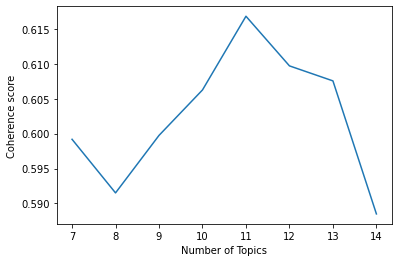

In [19]:
# Show graph
limit=15; start=7; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence score")
#plt.savefig('20240221_PhD_MalletLDALtr-Coherence')
plt.show()

In [9]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, 
                                                        corpus=corpus, 
                                                        texts=data, 
                                                        start=1, 
                                                        limit=24, 
                                                        step=1)

Mallet LDA: 1 topics, 0 topic bits, 0 topic mask
Data loaded.
max tokens: 93
total tokens: 56712
<10> LL/token: -7.02748
<20> LL/token: -7.02748
<30> LL/token: -7.02748
<40> LL/token: -7.02748

0	50	horse call send work afternoon home breakfast town thing rain today bring letter find port sleep man drive pound write 

<50> LL/token: -7.02748
<60> LL/token: -7.02748
<70> LL/token: -7.02748
<80> LL/token: -7.02748
<90> LL/token: -7.02748

0	50	horse call send work afternoon home breakfast town thing rain today bring letter find port sleep man drive pound write 

<100> LL/token: -7.02748
<110> LL/token: -7.02748
<120> LL/token: -7.02748
<130> LL/token: -7.02748
<140> LL/token: -7.02748

0	50	horse call send work afternoon home breakfast town thing rain today bring letter find port sleep man drive pound write 

<150> LL/token: -7.02748
<160> LL/token: -7.02748
<170> LL/token: -7.02748
<180> LL/token: -7.02748
<190> LL/token: -7.02748

0	50	horse call send work afternoon home breakfast town

<420> LL/token: -6.98676
<430> LL/token: -6.98675
<440> LL/token: -6.98283

0	25	horse work afternoon breakfast thing rain today bring send cook start weather man wind wash dress water tom child sleep 
1	25	call town letter port home pound write read meet club hear return mill wheat talk miss office train dine pay 

<450> LL/token: -6.98202
<460> LL/token: -6.98129
<470> LL/token: -6.98066
<480> LL/token: -6.98178
<490> LL/token: -6.98379

0	25	horse work afternoon breakfast thing today rain bring send cook weather start wind wash dress water man tom child stay 
1	25	call town letter home port pound write read meet club hear return mill find wheat talk miss office train dine 

<500> LL/token: -6.98435
<510> LL/token: -6.98074
<520> LL/token: -6.9818
<530> LL/token: -6.98156
<540> LL/token: -6.98097

0	25	horse work afternoon breakfast thing rain today bring send cook weather start wind wash dress man water sleep tom child 
1	25	call town letter port pound write read home meet club hear

<410> LL/token: -7.00642
<420> LL/token: -7.01247
<430> LL/token: -7.01108
<440> LL/token: -7.00924

0	16.66667	call find send drive man arrive afternoon return place put talk miss meet ride play hour thing garden room hand 
1	16.66667	home town letter port pound read write club mill wheat office train dine pay wife remain buy stop bank oclock 
2	16.66667	horse breakfast rain work today cook wind bring wash dress weather water thing tom child afternoon boy finish bread tonight 

<450> LL/token: -7.00355
<460> LL/token: -6.99982
<470> LL/token: -6.99962
<480> LL/token: -7.0035
<490> LL/token: -7.01089

0	16.66667	call find drive man send arrive afternoon return place talk miss home start ride play hour room hear thing work 
1	16.66667	town letter port pound read home write club mill wheat office train dine pay wife remain buy stop bank oclock 
2	16.66667	horse breakfast today rain work cook bring wind wash dress water thing tom child afternoon weather boy finish bread send 

<500> LL/to

<210> LL/token: -6.99424
<220> LL/token: -6.99956
<230> LL/token: -6.99504
<240> LL/token: -6.99439

0	12.5	horse breakfast cook wash tom boy mail bread tonight today bay wind set fire bring buggy lot turn road black 
1	12.5	send work afternoon rain sleep man thing put weather child room dress bring start today find people garden hand water 
2	12.5	call home drive hear read arrive talk miss pay ride find hour meet stop place sit church tomorrow hope mill 
3	12.5	town port pound write letter club wheat office train dine wife remain buy bank agree flour rise sell lose question 

<250> LL/token: -6.98426
<260> LL/token: -6.98396
<270> LL/token: -6.98589
<280> LL/token: -6.98285
<290> LL/token: -6.98437

0	12.5	horse breakfast cook wash tom wind boy bread today tonight water mail bay set fire buggy lot turn road black 
1	12.5	send work afternoon rain sleep man thing weather put dress bring child room stay bath start today people find garden 
2	12.5	call home drive hear read find talk miss 

<910> LL/token: -6.98518
<920> LL/token: -6.98298
<930> LL/token: -6.98248
<940> LL/token: -6.98888

0	12.5	horse breakfast cook wash tom boy bread mail bring tonight bay set fire buggy water start lot stay wind today 
1	12.5	send work afternoon thing rain sleep man weather put child find dress today room finish bath bring people place wind 
2	12.5	home call drive hear miss talk ride read stop meet start sit church hope expect hour find truck arrive boat 
3	12.5	port pound town letter club write wheat office train dine wife remain call read bank agree flour sell rise bill 

<950> LL/token: -6.98985
<960> LL/token: -6.99006
<970> LL/token: -6.98636
<980> LL/token: -6.99068
<990> LL/token: -6.98439

0	12.5	horse breakfast cook wash tom boy bread bring tonight water bay stay set fire mail start buggy lot today road 
1	12.5	send work afternoon thing rain sleep man weather put find child today wind room dress finish bath bring people hand 
2	12.5	home call drive hear talk miss read ride sto

<510> LL/token: -7.03566
<520> LL/token: -7.03527
<530> LL/token: -7.0377
<540> LL/token: -7.04079

0	10	port pound town club write wheat letter office train dine wife remain bank agree flour rise sell question connor speak 
1	10	horse man start water breakfast boy room thing sleep tom people fire road arrive rest station place mile fear rain 
2	10	today bring cook wind send wash weather finish bread breakfast tonight afternoon bath set work rain lot dress thing black 
3	10	drive call child stay home talk miss return ride hour dress sit church tomorrow town lunch rain garden arrive polly 
4	10	work afternoon find home hear read send pay letter play put stop sleep call mill oclock truck board boat pass 

<550> LL/token: -7.03783
<560> LL/token: -7.03632
<570> LL/token: -7.03851
<580> LL/token: -7.04337
<590> LL/token: -7.04178

0	10	port pound town club write letter wheat office train dine wife bank remain agree flour rise sell question connor speak 
1	10	horse man start thing water boy

<60> LL/token: -7.22097
<70> LL/token: -7.18919
<80> LL/token: -7.16922
<90> LL/token: -7.1479

0	8.33333	work thing start bring dress water stop turn put afternoon truck fall clock today shoot fire home deal run yesterday 
1	8.33333	afternoon rain wind child stay breakfast send sleep weather bath garden finish home write change today blow beach arrive fish 
2	8.33333	pound port club town write wheat office train dine remain letter bank agree flour wife rise sell question connor speak 
3	8.33333	call drive read home town talk miss ride meet church polly year friend row mama hope return sit spend hour 
4	8.33333	horse cook wash tom bread breakfast tonight boy bay today bring lot thing set black clean clothe buggy station catch 
5	8.33333	find man letter hear pay place send sleep arrive people return pass tomorrow mill lunch expect board lose mail meet 

<100> LL/token: -7.12966
<110> LL/token: -7.11863
<120> LL/token: -7.10905
<130> LL/token: -7.09535
<140> LL/token: -7.08008

0	8.33333

<560> LL/token: -7.02137
<570> LL/token: -7.01666
<580> LL/token: -7.02517
<590> LL/token: -7.02113

0	8.33333	work home thing afternoon start play stop turn today bring put dress truck clock boat shoot yesterday week deal run 
1	8.33333	rain send weather wind afternoon today breakfast finish sleep wash bath bring put child clean fear tonight begin stay change 
2	8.33333	port pound town club wheat office train dine wife remain bank agree sell question connor speak motion flour govt blyth 
3	8.33333	call drive read home talk miss ride hour town stay church sit garden child polly fall friend part row mama 
4	8.33333	horse cook tom bread breakfast boy water bay set dress road black clothe lot station mile start man mail head 
5	8.33333	letter find write meet return man place arrive mill pay people hear send oclock pass sleep room lose tomorrow lunch 

<600> LL/token: -7.02382
<610> LL/token: -7.02371
<620> LL/token: -7.01398
<630> LL/token: -7.01932
<640> LL/token: -7.01203

0	8.33333	wor


0	7.14286	home garden dress drive child hour ride sit meet read part people return row rain mama hear spend turn miss 
1	7.14286	town port pound mill wheat train dine buy club pay bank flour oclock sell connor land party letter write arrange 
2	7.14286	horse breakfast boy tom water wash stay road thing station mile start buggy fear drink sand head sheep man eat 
3	7.14286	call man talk drive find arrive room bring mail polly rain run friend send job write tomorrow afternoon place change 
4	7.14286	today cook wind work send bread bring tonight bay finish set breakfast weather clean wash bath clothe lot catch afternoon 
5	7.14286	letter wife read write call office remain lose question motion govt return send club paper matter carry agree business hear 
6	7.14286	afternoon work thing sleep stop start place put find home hope truck shoot week beach kill hear side preach water 

<50> LL/token: -7.29607
<60> LL/token: -7.23873
<70> LL/token: -7.20274
<80> LL/token: -7.18131
<90> LL/token: -

<460> LL/token: -7.068
<470> LL/token: -7.0692
<480> LL/token: -7.07059
<490> LL/token: -7.0823

0	7.14286	drive home call miss talk read ride dress sit stay lunch polly child garden fall hour row meet mama church 
1	7.14286	port letter town pound wheat train wife write buy bank flour mill remain sell club dine pay connor meet land 
2	7.14286	horse water boy breakfast start thing fire road station mile buggy rest stay tom drink sand eat bay cup girl 
3	7.14286	rain send man sleep arrive find room weather bring place child hand mail call tomorrow change return wind write shower 
4	7.14286	cook wash today breakfast finish bread tonight afternoon work wind bring set tom dress clean clothe catch lot weather bath 
5	7.14286	office call agree rise bill club question motion govt blyth paper read matter lose pass carry business ayre return cabinet 
6	7.14286	work afternoon stop home thing find today hear truck put play boat shoot start week side preach book half yesterday 

<500> LL/token: -7.

<910> LL/token: -7.05302
<920> LL/token: -7.05618
<930> LL/token: -7.06062
<940> LL/token: -7.06433

0	7.14286	drive home call miss talk read dress stay sit garden polly ride meet friend row hear mama child turn town 
1	7.14286	port town pound letter wheat train wife read write bank club flour sell buy pay dine meet mill connor remain 
2	7.14286	horse boy thing water start breakfast buggy road rest station mile tom bay drink fire stay sand eat cup fall 
3	7.14286	send rain sleep man arrive find weather room mail bring child people place hand wind write return call change bath 
4	7.14286	cook wash today work afternoon breakfast finish bread bring tonight set lot wind dress clean tom clothe catch begin fish 
5	7.14286	office call agree question motion govt club blyth paper bill return matter carry business ayre cabinet pass speak dine remain 
6	7.14286	home work afternoon play stop put thing hear expect find truck today beach boat start shoot week mill yesterday preach 

<950> LL/token: 

<310> LL/token: -7.07129
<320> LL/token: -7.07574
<330> LL/token: -7.07554
<340> LL/token: -7.07152

0	6.25	office wife agree question dine connor motion govt return bill blyth write matter club business ayre cabinet sale price answer 
1	6.25	send today bring weather wind mail breakfast sleep people begin change blow water shower vessel lie finish clock milk trouble 
2	6.25	drive home miss child stay ride dress read return town polly tomorrow arrive row mama talk garden hear church spend 
3	6.25	cook wash afternoon work bread tonight bath set breakfast thing finish clean dress clothe catch lot cake bay fish mesurier 
4	6.25	call find man meet room place put sleep pass sit hope lunch part talk year hold play friend send side 
5	6.25	work home afternoon mill stop thing rain truck start boat shoot find week oclock hear preach half game break wood 
6	6.25	port pound town letter write wheat train read club bank flour buy rise sell remain pay receive meeting land attend 
7	6.25	horse rain bo

<710> LL/token: -7.05346
<720> LL/token: -7.05873
<730> LL/token: -7.06045
<740> LL/token: -7.05991

0	6.25	office agree question motion govt blyth club bill matter carry cabinet ayre vote answer member report write speak treasurer move 
1	6.25	send today bring weather wind rain mail breakfast sleep change blow shower vessel fellow lose sea fall lie dust trouble 
2	6.25	drive home read child dress ride stay miss talk polly turn tomorrow garden friend row mama spend church hear flower 
3	6.25	cook wash afternoon work bread tonight finish bath lot set thing clean dress clothe catch breakfast begin tom cake stay 
4	6.25	call man find meet place room arrive sleep return put pass sit people write lunch part fear hold remain hour 
5	6.25	work home afternoon stop play thing hear truck boat find shoot week mill start pay preach half cut wood game 
6	6.25	port town letter pound wheat train wife read club bank dine flour write sell rise connor mill receive buy land 
7	6.25	horse boy water start 

<110> LL/token: -7.16134
<120> LL/token: -7.15634
<130> LL/token: -7.13913
<140> LL/token: -7.12828

0	5.55556	work afternoon home stop expect thing truck boat shoot week today start yesterday beach mill find preach wood game chapel 
1	5.55556	office question agree motion govt lose blyth meeting paper club matter attend carry bill offer ayre cabinet sale vote price 
2	5.55556	child dress room put garden turn sit fall polly people run buggy deal mama friend trouble papa boy dick fellow 
3	5.55556	call letter write send return read find hear play man mail remain board oclock weather wife talk change note suppose 
4	5.55556	port pound town wheat train dine club flour bank sell mill rise buy speak connor pay party receive wife land 
5	5.55556	drive home miss ride pass town talk read hour lunch tomorrow call row meet place spend hope church stand arrive 
6	5.55556	rain bring thing tonight afternoon weather stay water black rest catch bay hand shower today place store supper girl light 
7	5.

<460> LL/token: -7.08541
<470> LL/token: -7.0857
<480> LL/token: -7.08819
<490> LL/token: -7.0956

0	5.55556	work afternoon stop home thing truck boat today shoot week find start preach half wood game mill yesterday cut chapel 
1	5.55556	office agree question motion govt blyth meeting bill matter club carry ayre cabinet dine vote answer member report move treasurer 
2	5.55556	child dress buggy put garden turn sit polly play fall run room mama hour trouble tomorrow boy deal papa finish 
3	5.55556	write letter find send call sleep return man hear read weather year mail board place oclock pass room remain change 
4	5.55556	port pound town wheat train club buy bank flour mill rise sell dine pay wife speak connor land remain letter 
5	5.55556	drive home call talk miss read ride meet church lunch town arrive friend stay row spend stand life lady poll 
6	5.55556	rain bring afternoon thing weather water today send stay tonight hand black catch bay shower store sheep dress feed put 
7	5.55556	h

<810> LL/token: -7.06738
<820> LL/token: -7.07091
<830> LL/token: -7.07098
<840> LL/token: -7.07514

0	5.55556	work afternoon home stop thing truck hear boat shoot play week today mill start preach wood yesterday game clock chapel 
1	5.55556	office agree question motion govt blyth bill club matter business ayre carry cabinet speak vote answer member report move treasurer 
2	5.55556	child stay dress ride garden turn sit fall buggy polly deal run mama trouble part put papa boy fellow dick 
3	5.55556	write find sleep letter man return call place room send hear people mail year remain weather wife board hope pass 
4	5.55556	port pound town wheat train club bank dine flour buy rise sell mill letter connor pay land wife read arrange 
5	5.55556	drive home call read talk miss meet church town arrive hour lunch friend row spend expect tomorrow stand pass life 
6	5.55556	rain bring send thing afternoon weather put hand black water catch bay dress head shower today vessel begin lot feed 
7	5.5555

<160> LL/token: -7.18694
<170> LL/token: -7.18054
<180> LL/token: -7.17479
<190> LL/token: -7.1761

0	5	letter port pound write town wife flour church lose pay connor buy bank offer paper remain meet walter ship hear 
1	5	call find talk town return arrive sleep receive oclock meeting remain pass order people dine noon room answer settle note 
2	5	horse start stay boy buggy rain turn road mile arrive hour supper meet garden child station wait eat camp woman 
3	5	work afternoon stop home mill truck boat shoot week preach half play wood beach game today thing chapel expect clock 
4	5	drive home read miss dress call child tomorrow polly find ride fall row play afternoon mama spend year hear flower 
5	5	man work mail sleep weather send breakfast room bay tom change bath drink people vessel hand set sea fear head 
6	5	place send put sit hear part run friend hold meet hour carry stand hand read pass willie party month poll 
7	5	bring thing water today breakfast lot wash black clean catch put 

<510> LL/token: -7.11562
<520> LL/token: -7.10865
<530> LL/token: -7.12349
<540> LL/token: -7.11259

0	5	town pound letter port train wheat wife read write bank flour buy pay sell club connor mill land arrange sale 
1	5	call find return arrive remain lose year home sleep dine rise receive meeting board oclock port write noon note order 
2	5	horse boy start fire road rain water station mile buggy arrive rest supper light pack camp woman travel lead head 
3	5	work afternoon home stop truck boat shoot week mill thing play start preach half wood game yesterday chapel beach lend 
4	5	drive stay child home read miss dress ride polly garden row town mama hope church call flower fall papa deal 
5	5	man breakfast room mail sleep send tom bay weather today people write bath vessel blow letter fear finish hand drink 
6	5	talk hear rain place meet sit tomorrow hour part run friend pass put party hold stand hand book lunch glass 
7	5	bring wind thing send put today lot water black clean weather san

<860> LL/token: -7.09658
<870> LL/token: -7.08941
<880> LL/token: -7.07647
<890> LL/token: -7.07924

0	5	port town pound wheat train letter wife club bank flour mill buy dine sell pay write connor land arrange offer 
1	5	call find return write letter remain lose pass year receive arrive oclock meeting sleep attend board rise order settle noon 
2	5	horse boy start water rain road station mile buggy fire sand eat rest cup scrub light wait camp pack head 
3	5	work afternoon stop home truck boat shoot week start find hear preach mill wood game place side chapel yesterday lend 
4	5	home stay ride dress child garden call turn polly run row mama town drive flower papa dick hope poll fall 
5	5	man breakfast sleep weather mail tom room bay arrive today people change bath vessel drink break sister fear finish heat 
6	5	drive meet read talk miss rain hear place sit lunch play party hold friend point spend hour tomorrow part church 
7	5	send bring thing wind put today lot child blow black water gi

<160> LL/token: -7.16883
<170> LL/token: -7.15411
<180> LL/token: -7.16361
<190> LL/token: -7.15563

0	4.54545	cook work finish bread bath clean breakfast catch thing set fish mesurier black job today beach afternoon turn kitchen clock 
1	4.54545	hear read home arrive drive people miss find church return hope lunch tomorrow boat part town year expect pass midnight 
2	4.54545	drive ride call talk stay meet dress garden polly home child friend sit row mama turn flower papa dick poll 
3	4.54545	man sleep room call place find child thing fall hour put girl deal lie fellow fear woman rest care door 
4	4.54545	rain send wind dress wash hand put begin water bring change cake blow play thing note weather lead dust hold 
5	4.54545	port club town train wife bank dine sell speak pound blyth land party meeting attend ayre order noon settle price 
6	4.54545	letter write pound wheat remain buy mill flour pay town receive meet call oclock rise read offer connor dine sale 
7	4.54545	horse start boy ro

<460> LL/token: -7.11564
<470> LL/token: -7.12201
<480> LL/token: -7.11594
<490> LL/token: -7.12318

0	4.54545	cook bread work bath set clean afternoon catch fire fish mesurier lot finish thing job kitchen clock meat turn black 
1	4.54545	call drive hear home read miss arrive find return church hope tomorrow lunch friend people expect lose stand fall ride 
2	4.54545	dress talk stay sit polly home garden ride row mama hour child turn papa drive dick poll willie estrange deal 
3	4.54545	man sleep room place child find put thing call hour girl people store rest glass enjoy care fear fellow change 
4	4.54545	send rain wind bring weather thing put hand water begin blow play shower trouble feed dust wash sleep change yesterday 
5	4.54545	port club train wife remain town bank dine speak rise blyth meeting party land receive attend pound year board order 
6	4.54545	letter write pound wheat town buy flour mill sell read meet connor pay oclock arrange offer sale walter ton paper 
7	4.54545	horse

<760> LL/token: -7.08969
<770> LL/token: -7.09117
<780> LL/token: -7.09912
<790> LL/token: -7.10694

0	4.54545	cook bread bath set work thing clean catch fish mesurier black cake lot job fire kitchen cut dress finish meat 
1	4.54545	call read drive return miss hear find church arrive hope lunch friend tomorrow expect spend ride home stand meet lose 
2	4.54545	home talk sit child polly dress stay garden ride row mama turn drive papa dick poll buggy willie flower estrange 
3	4.54545	man sleep room place thing people child find fear arrive fall girl fellow rest hour lie drink telegraph enjoy put 
4	4.54545	send rain weather wind put bring hand play water blow shower sleep trouble yesterday feed run dust change note lend 
5	4.54545	port club train town wife remain bank rise party receive meeting land attend order speak ship board account month whist 
6	4.54545	letter pound write wheat town buy flour pay sell mill dine connor meet oclock arrange offer sale hold walter price 
7	4.54545	horse

<60> LL/token: -7.37219
<70> LL/token: -7.32182
<80> LL/token: -7.29172
<90> LL/token: -7.27433

0	4.16667	work stop hope start truck boat mill thing week shoot half today yesterday afternoon river break home oclock chapel dog 
1	4.16667	man meet call people place arrive sit lunch talk child fear expect find run sleep spend tomorrow church pack weather 
2	4.16667	port town pound train letter wife write sell pay bank connor mill dine land bill remain offer walter account club 
3	4.16667	rain tom bath wind bring thing breakfast mail head fire weather bay black hand today vessel send eat sea dust 
4	4.16667	home find afternoon hear rain play book wood game lend lady sleep load kill gun lose beach enjoy door pay 
5	4.16667	horse boy start water road station mile buggy sand drive hour scrub hold camp travel lead mother care harness rest 
6	4.16667	bring breakfast stay garden arrive fall part man drink mail girl thing trouble rest hour cake wait woman poll bake 
7	4.16667	office club questio

<310> LL/token: -7.16357
<320> LL/token: -7.15485
<330> LL/token: -7.16379
<340> LL/token: -7.15492

0	4.16667	work stop afternoon truck shoot week thing boat start preach today half mill wood chapel river oclock put sleep gun 
1	4.16667	call meet arrive man place sleep people miss room find fear drive lunch tomorrow year month board expect wine noon 
2	4.16667	port town pound train wife dine club remain mill pay receive land rise bank business order ship price account settle 
3	4.16667	send tom mail bring bath man bay head rain thing fire begin sleep vessel breakfast sheep hand chop break weather 
4	4.16667	home rain hear find play afternoon hope ride talk shower deal lose book beach game lend sea win borrow ground 
5	4.16667	horse start water boy road station mile buggy sand rest pack fire camp travel lead mother hold cup harness drive 
6	4.16667	stay thing breakfast bring fall cake turn part garden trouble boy supper girl flower wait woman glass yesterday eat cold 
7	4.16667	office 

<560> LL/token: -7.12627
<570> LL/token: -7.1339
<580> LL/token: -7.13224
<590> LL/token: -7.14228

0	4.16667	work stop truck boat shoot week thing mill afternoon start preach wood game pay chapel half gun dog river today 
1	4.16667	call meet drive arrive people miss man place tomorrow fear lunch find sleep year friend room lady expect month wine 
2	4.16667	port town pound train wife remain dine club mill receive pay rise land bank church ship order price account hughe 
3	4.16667	tom mail bring man bath bay today breakfast weather black clock head arrive thing hand fire vessel lot write place 
4	4.16667	home rain find afternoon send hear play shower beach book lose talk ride lend dust deal hope telegraph noon sea 
5	4.16667	horse start water road boy station mile sand rest buggy fire camp hour light travel lead hand pack sheep hold 
6	4.16667	thing stay bring turn part fall breakfast cake run boy girl trouble wait buggy garden glass cold beat fellow flower 
7	4.16667	office agree quest

<810> LL/token: -7.11692
<820> LL/token: -7.13329
<830> LL/token: -7.13086
<840> LL/token: -7.14449

0	4.16667	work afternoon stop truck boat shoot week preach mill thing wood game home start today chapel oclock pay gun dog 
1	4.16667	call drive meet return arrive miss pass people lunch man find sleep friend expect place hear lady room fear wine 
2	4.16667	port pound town train dine pay receive remain rise land mill order wife bank settle ship church year charge attend 
3	4.16667	man tom mail bring bay bath today thing weather black arrive vessel sleep write breakfast clock hand drink begin gaskell 
4	4.16667	rain send home find play afternoon talk ride shower put hope beach lose point part lend tomorrow sea book hear 
5	4.16667	horse start water boy fire road station mile sand rest light head pack camp travel lead fear hour harness thunder 
6	4.16667	thing stay turn breakfast fall buggy run deal eat cup girl trouble bring wait supper fellow cake woman boy glass 
7	4.16667	agree questi

<60> LL/token: -7.34394
<70> LL/token: -7.29638
<80> LL/token: -7.27447
<90> LL/token: -7.24763

0	3.84615	afternoon work home stop truck boat shoot today week mill thing wood hear start chapel preach gun dog yesterday aunt 
1	3.84615	office remain agree club rise question meeting speak govt matter meet year answer member report account treasurer letter state genl 
2	3.84615	drive home miss dress call polly friend mama church sit papa dick poll lady school willie visit estrange door tomorrow 
3	3.84615	letter pound town wife buy wheat write hear read oclock flour mill pay sell pass order bank party sale ton 
4	3.84615	call read bill talk motion paper lose attend spend write note move receive carry notice noon month hour spence book 
5	3.84615	cook afternoon bread work wash finish bath dress breakfast clothe set mesurier mail fish sheep begin job tonight catch iron 
6	3.84615	rain send man bring find weather thing put hand shower store play work hold sea set boil half trouble deal 
7	3.

<310> LL/token: -7.16506
<320> LL/token: -7.16668
<330> LL/token: -7.17171
<340> LL/token: -7.15671

0	3.84615	work stop afternoon home truck shoot week boat preach start game wood today chapel hear pay gun dog mill aunt 
1	3.84615	agree office question meeting matter club govt cabinet answer member report treasurer glyde party ministry genl govr blyth business propose 
2	3.84615	miss drive home dress polly row friend sit mama hear spend papa dick lady poll church school willie hour life 
3	3.84615	letter write wheat wife buy town mill flour read sell remain meet rise oclock hear church sale home ton account 
4	3.84615	read call lose motion bill paper carry talk return lunch vote move receive stand charge notice point spence attend part 
5	3.84615	cook bread wash breakfast finish dress set work afternoon clothe catch bath lot mail fish mesurier begin iron washing job 
6	3.84615	send rain afternoon weather bring man put work hand play thing shower beach store hope boy break back book sh

<560> LL/token: -7.13208
<570> LL/token: -7.13286
<580> LL/token: -7.1295
<590> LL/token: -7.13791

0	3.84615	stop work truck boat home shoot week mill today preach wood game hear pay chapel thing river afternoon gun dog 
1	3.84615	office agree question govt blyth bill matter club ayre cabinet answer member report treasurer glyde ministry genl govr propose reynold 
2	3.84615	drive miss dress home polly friend row mama sit read ride papa church hour dick poll life flower willie estrange 
3	3.84615	letter write wheat wife read buy flour meet hear mill remain town sell offer walter ton rise church hughe news 
4	3.84615	call lose motion meeting read paper return talk carry lunch vote rise move month notice part remain order charge spence 
5	3.84615	cook wash bread breakfast finish dress clean clothe lot catch bath set fish mesurier iron washing afternoon begin job meat 
6	3.84615	send afternoon work put rain bring weather play hand shower beach store point note hope thing boy back showery 

<810> LL/token: -7.10777
<820> LL/token: -7.11772
<830> LL/token: -7.11639
<840> LL/token: -7.12169

0	3.84615	stop work afternoon home truck boat shoot week mill preach wood today chapel game start yesterday gun pay dog clock 
1	3.84615	office agree question govt blyth club bill matter ayre cabinet answer member report treasurer glyde join dine intend business ministry 
2	3.84615	drive home dress read polly town row mama sit miss friend hear papa church dick ride poll spend life willie 
3	3.84615	letter write wheat wife flour buy sell read mill connor remain meet offer sale walter ton hear church hughe news 
4	3.84615	call lose motion talk meeting paper read rise noon remain vote return month carry move attend lunch notice charge spence 
5	3.84615	cook breakfast bread wash finish dress bath clean clothe lot catch work set begin afternoon fish mesurier iron washing job 
6	3.84615	send rain bring afternoon work weather put play hand thing beach shower store hope break note hear back sho

<60> LL/token: -7.33583
<70> LL/token: -7.29922
<80> LL/token: -7.27181
<90> LL/token: -7.26217

0	3.57143	child garden turn ride rain run mama store hope home flower papa poll tomorrow willie cold buggy end pick pair 
1	3.57143	pound town port wheat train pay mill flour buy sell bank connor land arrange oclock offer receive ship dine price 
2	3.57143	tom bay man boy sleep rain breakfast catch mail tonight water head send arrive child sister today supper gather boil 
3	3.57143	letter write send wife call return note meet answer play move sale dine govr weather walter tomorrow approve appoint refuse 
4	3.57143	read club remain town church rise port party meeting hear attend spend dine talk account noon report news doctor spence 
5	3.57143	afternoon home work rain truck cut place preach wood chapel lend sea beach load oclock put deal game enjoy estrange 
6	3.57143	horse start water mile sand cup fire fear station scrub rest boy camp feed travel lead sheep harness pack tank 
7	3.57143	sto

<310> LL/token: -7.18118
<320> LL/token: -7.18194
<330> LL/token: -7.17909
<340> LL/token: -7.17193

0	3.57143	garden home polly dress ride stay row child mama sit town turn papa dick flower poll willie read estrange door 
1	3.57143	pound port town wheat train flour mill buy bank sell pay connor land arrange offer sale ship meeting price ton 
2	3.57143	breakfast tom bring bay man boy mail rain sleep today tonight vessel head supper weather cup sheep mother arrive thunder 
3	3.57143	letter write call wife send note mail pass family midnight dine receive morrow walter point appoint fear bath effect prevent 
4	3.57143	read club remain church rise hear dine port party talk town office attend order account paper whist speak news spend 
5	3.57143	rain afternoon home play put sleep weather cut beach place thing wood oclock lend yesterday sea load ride change beat 
6	3.57143	horse start mile water buggy road sand boy station fire fear wait rest pack camp travel scrub lead harness tank 
7	3.571

<560> LL/token: -7.14515
<570> LL/token: -7.14946
<580> LL/token: -7.15288
<590> LL/token: -7.15231

0	3.57143	home dress polly talk garden sit row mama ride turn read child papa dick stay poll flower willie estrange door 
1	3.57143	pound town port train wheat bank buy flour sell mill connor pay land arrange offer oclock sale ship price ton 
2	3.57143	tom breakfast man bay bring mail today sleep boy cup tonight fear head girl sheep arrive vessel station mother sister 
3	3.57143	letter write send wife call point note mail walter pass bath promise room meet charge receive dine midnight country morrow 
4	3.57143	read club hear remain dine church town rise port party talk speak attend order office whist account spend doctor paper 
5	3.57143	rain afternoon weather put play thing beach cut place shower home book hand load lend lie cold beat sea repair 
6	3.57143	horse start water road boy mile sand rest buggy scrub pack camp hold lead light station travel ride mare harness 
7	3.57143	stop wo

<810> LL/token: -7.13181
<820> LL/token: -7.13461
<830> LL/token: -7.13331
<840> LL/token: -7.13352

0	3.57143	home sit talk polly row ride mama read child garden dress town papa dick hour poll willie stay estrange door 
1	3.57143	pound port town wheat train bank flour buy sell pay mill land connor oclock arrange offer meeting price ton ship 
2	3.57143	breakfast tom today bay man mail bring station arrive sleep cup vessel tonight boy mother girl sheep care sister police 
3	3.57143	letter write call wife send note hope walter pass mail paper midnight business receive fear tomorrow bath hear promise remain 
4	3.57143	read club dine rise church remain party town port talk attend order office speak account lose whist noon doctor point 
5	3.57143	rain weather put afternoon play hand thing cut shower place lend yesterday load beach cold beat set repair back wood 
6	3.57143	horse start boy water mile road sand buggy head pack camp travel supper lead fear rest harness thunder ride scrub 
7	3.5

<60> LL/token: -7.40895
<70> LL/token: -7.35357
<80> LL/token: -7.33427
<90> LL/token: -7.30551

0	3.33333	man arrive find sleep mail hand fear drink room girl station weather lady miss note board woman police harrison draw 
1	3.33333	work afternoon sleep today weather people place hope wood yesterday send lend load finish enjoy mare repair open oclock kill 
2	3.33333	cook bread dress set breakfast bring afternoon lot finish catch bath tonight fish mesurier mama washing today bake water iron 
3	3.33333	thing call home boat garden dress afternoon side fire start care aunt today clock die pain pick find show child 
4	3.33333	tom wash breakfast horse bay clothe mile cook rest head clean sheep kitchen meat tonight milk cake sand travel fold 
5	3.33333	agree motion govt receive land bill carry club answer vote year move notice hughe genl paper lose govr propose port 
6	3.33333	send rain wind bring put work blow mail shower black tomorrow store room vessel begin change flower breakfast find 

<290> LL/token: -7.18391

0	3.33333	man arrive meet room find miss sleep breakfast people return mail lunch part girl station lady woman road pass police 
1	3.33333	bring weather today sleep afternoon work hope finish trouble send wood yesterday lend change cut load turn lose break repair 
2	3.33333	cook bread set dress afternoon work today bath tonight catch finish fish mesurier iron weather lot mail washing beach breakfast 
3	3.33333	thing call home place find afternoon boat clock fire lot side fellow point die beat year promise trip money burn 
4	3.33333	tom wash breakfast clean bay head cake cook sheep begin kitchen milk tonight feed boy clothe scrub kill fire job 
5	3.33333	agree club motion govt bill rise business pound receive paper vote move lose land carry notice year govr charge month 
6	3.33333	rain send wind put blow shower bring vessel black store play dust deal care light clear arm cut change knock 
7	3.33333	letter write read wife remain call hear ship price church board

<510> LL/token: -7.17502
<520> LL/token: -7.17249
<530> LL/token: -7.18068
<540> LL/token: -7.17187

0	3.33333	arrive man meet breakfast room people miss pass road sleep find part woman lunch board lady wine station police girl 
1	3.33333	send sleep bring weather work finish afternoon hope hand change today yesterday lend load bird north bottle repair line draw 
2	3.33333	cook bread breakfast afternoon set bath dress catch lot clothe tonight mesurier fish iron finish washing weather today garden frank 
3	3.33333	find thing home place tomorrow afternoon return side fellow sea point beach die trip boat fire beat ground burn lot 
4	3.33333	wash tom today mail work bay clean cake breakfast begin tonight job kitchen milk cook room boy clock sheep kill 
5	3.33333	club motion govt bill land oclock question lose business vote move receive notice attend carry govr paper charge agree rise 
6	3.33333	rain wind put send black fire man blow bring shower vessel light play wash cut dust store clear c

<710> LL/token: -7.15376
<720> LL/token: -7.1596
<730> LL/token: -7.16794
<740> LL/token: -7.15912

0	3.33333	arrive meet man people breakfast room miss lunch pass road woman lady part wine board bay girl lose station police 
1	3.33333	send sleep weather bring work finish hand hope change store yesterday break lend bird showery bottle repair line message heart 
2	3.33333	cook bread breakfast dress afternoon clothe bath catch set wash fish mesurier iron washing meat finish bake tonight weather garden 
3	3.33333	thing find home afternoon place return beach side tomorrow fellow sea expect point die year telegraph ground burn trip lot 
4	3.33333	today work mail wash tom tonight cook clean bay room cake child job kitchen breakfast clock milk lot begin sheep 
5	3.33333	motion govt call club port bill paper lose oclock vote pound land rise move attend notice carry govr read bank 
6	3.33333	rain wind put fire black bring man cut blow shower vessel send light dust set thunder clear fill care no

<920> LL/token: -7.1671
<930> LL/token: -7.16562
<940> LL/token: -7.17062

0	3.33333	arrive man meet breakfast room people miss lunch sleep pass girl find lady board station lose road wine woman police 
1	3.33333	send weather sleep bring work put afternoon change hand finish break yesterday store hope lay lend north bottle repair showery 
2	3.33333	cook bread wash dress bath breakfast clothe catch afternoon set fish iron washing finish begin tonight meat mesurier lot bake 
3	3.33333	thing find home place return afternoon lot beach tomorrow side fellow part point die expect telegraph year ground trip month 
4	3.33333	today work bay bring tom mail child clean tonight cook breakfast wash job kitchen milk sheep room feed bird goat 
5	3.33333	call club motion pound land attend bill govt paper rise read vote lose move oclock notice carry bank govr receive 
6	3.33333	rain wind fire blow black man shower cut put vessel send light dust care thunder set fill clear noon sea 
7	3.33333	letter writ

<110> LL/token: -7.26073
<120> LL/token: -7.26021
<130> LL/token: -7.23595
<140> LL/token: -7.2265

0	3.125	bring weather thing put hand today work shower tonight cook rain afternoon milk bake bay chop goat point sit knock 
1	3.125	call sleep child find miss breakfast people arrive friend play lady enjoy telegraph repair change bishop family dance ther music 
2	3.125	wind today wash finish clean breakfast dress iron blow washing bread bath fish kitchen send cook store change dust north 
3	3.125	letter home place write send board hope beach tomorrow year hear expect school money college fall meet walter rain sermon 
4	3.125	polly town read row mama home dress church ride papa stay dick poll garden willie sit talk life estrange pick 
5	3.125	water room rest station fear head arrive drink eat cup girl supper put wait fall part mother heat woman sun 
6	3.125	rain tom fire thing boy clothe sand wash wind scrub bay camp travel lie fold boil thunder tank sheep clear 
7	3.125	drive meet talk m

<310> LL/token: -7.17984
<320> LL/token: -7.17881
<330> LL/token: -7.17379
<340> LL/token: -7.1739

0	3.125	afternoon weather bring put rain work thing hand shower vessel milk sit goat knock showery point foot cat sew sight 
1	3.125	sleep call child arrive miss breakfast find friend people lady family enjoy change bishop dance die music cake sister ball 
2	3.125	today wash wind clean dress finish tom clothe fish iron washing cook bath breakfast kitchen blow dust fold change pain 
3	3.125	letter write home send place hope tomorrow board beach lend walter money paper finish country school load ride offer bag 
4	3.125	home dress town polly read row mama sit garden ride papa dick talk poll church willie stay estrange pick hour 
5	3.125	water rest bring fear room drink head eat cup people girl fall arrive lie wait woman mother station lay heat 
6	3.125	fire boy rain thing tom sand bay scrub hour pack light camp wind thunder chop tank sheep supper clear feed 
7	3.125	meet drive find man talk

<510> LL/token: -7.16001
<520> LL/token: -7.15414
<530> LL/token: -7.15175
<540> LL/token: -7.14643

0	3.125	weather afternoon put rain thing work hand shower sit vessel man milk bring yesterday knock goat point showery foot sew 
1	3.125	call sleep child man arrive miss find people breakfast friend fellow lady family die bishop sister brandy music cry ball 
2	3.125	wash finish wind today dress tom clean clothe breakfast fish iron washing cook blow job change bath kitchen frank fold 
3	3.125	letter write home send place hope note mail sleep tomorrow paper money ride lend telegraph walter country load beach bag 
4	3.125	dress read polly town home row mama papa dick poll willie garden church estrange show pick ride sit plant stay 
5	3.125	water rest station fall drink fear run girl eat cup lie woman deal supper mother part room trouble heat gather 
6	3.125	thing fire rain boy black wind tom sand bay scrub light pack camp feed sheep thunder head chop tank clear 
7	3.125	drive meet find tal

<710> LL/token: -7.15119
<720> LL/token: -7.14835
<730> LL/token: -7.15011
<740> LL/token: -7.14401

0	3.125	weather rain afternoon put thing work hand shower vessel man sit point yesterday knock bring finish showery foot alter sew 
1	3.125	call sleep man child find arrive miss breakfast friend return fellow lady family die mother half people bishop board trip 
2	3.125	wash today wind finish dress clean clothe tom breakfast blow iron cook washing job clock kitchen change fold fish pain 
3	3.125	letter write home send mail place hope note paper hear news telegraph beach book fear country midnight ride lend brandy 
4	3.125	read dress polly row mama home ride papa dick poll town church sit garden willie miss estrange pick show deal 
5	3.125	water stay station fall people girl drink run trouble fear wait woman lie cake cup rest eat heat police gather 
6	3.125	thing fire boy black tom bay sand sheep rest head scrub light pack camp wind rain kill supper chop tank 
7	3.125	drive meet talk roo

<910> LL/token: -7.14883
<920> LL/token: -7.15634
<930> LL/token: -7.15552
<940> LL/token: -7.17012

0	3.125	rain weather work afternoon thing put bring hand shower yesterday sit knock vessel showery point foot wake blow play leg 
1	3.125	sleep call child arrive breakfast miss man find friend people lady mother fellow return half family bishop die tom music 
2	3.125	wash today finish wind dress clean tom clothe change washing iron job kitchen bath clock dust fold blow pain sleep 
3	3.125	letter write send place mail hope home hear note find lend paper fear telegraph news book ride midnight country tomorrow 
4	3.125	dress town read polly row mama stay sit papa dick poll garden willie estrange pick show church store school deal 
5	3.125	man station stay water drink fall cup girl trouble people woman run cake fear care road heat gather police wait 
6	3.125	thing fire boy black bay sand wind rest tom supper scrub rain pack light camp feed sheep head eat hour 
7	3.125	drive meet home talk r

<110> LL/token: -7.29423
<120> LL/token: -7.2737
<130> LL/token: -7.25649
<140> LL/token: -7.25349

0	2.94118	child dress bring garden stay turn polly sit bake cold estrange rest deal buggy cook cooking plant begin husband stand 
1	2.94118	office speak govt blyth agree attend call meet talk report party meeting join ministry genl share tender propose offer railway 
2	2.94118	man breakfast meet station fear people fall drink stay arrive girl miss bay lady pack mother sister telegraph tom police 
3	2.94118	cook wind fire thing sleep put cut blow wash wood bath play send clock chop beach beat half open breakfast 
4	2.94118	place room send find hour boy home trouble hold sea dust fellow side run set son break sit baby bishop 
5	2.94118	town port train club dine flour sell pound connor bank arrange wife ayre write letter sale walter account hughe doctor 
6	2.94118	question motion bill cabinet vote answer club move treasurer whist glyde member carry govr charge agree business reynold strange

<310> LL/token: -7.22247
<320> LL/token: -7.21693
<330> LL/token: -7.21871
<340> LL/token: -7.21467

0	2.94118	child bring stay dress garden turn sit bake meat cold estrange flower buggy heart stand cooking egg cry chair beef 
1	2.94118	office club dine speak meet blyth call bank ayre attend party talk agree join ministry tender railway appoint baker refuse 
2	2.94118	man breakfast meet miss station drink bay people girl tom arrive stay lady road mother sister wait heat police woman 
3	2.94118	wind sleep fire room put thing cut bath wash begin clock set play chop half open blow breakfast burn line 
4	2.94118	place find lot beach send trouble break fear boy hold run fellow sea dust blow note side hour son telegraph 
5	2.94118	town port train pound mill flour sell connor write letter arrange club wife dine sale walter church account hughe doctor 
6	2.94118	question motion bill govt agree cabinet carry vote answer member report move treasurer glyde matter intend genl govr propose prepare 

<510> LL/token: -7.18571
<520> LL/token: -7.17823
<530> LL/token: -7.17675
<540> LL/token: -7.1721

0	2.94118	bring child stay dress turn garden sit cake flower bake buggy trouble cold cooking stand egg heart beach plant meat 
1	2.94118	office club bank meet speak call blyth ayre dine party attend join tender matter meeting reynold ministry railway refuse refreshment 
2	2.94118	breakfast man tom meet station miss drink bay girl arrive drive lady lunch mother road heat police stay rest baby 
3	2.94118	wind sleep put fire thing change cut blow bath room clock begin wash set sea fear half burn fill line 
4	2.94118	send find lot place hour note fellow fear side dust telegraph hand boy break back beat die bishop alter clear 
5	2.94118	town train port write letter dine mill connor wife arrange sale church club walter account offer hughe doctor flour business 
6	2.94118	question agree motion govt bill cabinet vote answer member report treasurer carry glyde move genl govr propose intend strang

<710> LL/token: -7.17743
<720> LL/token: -7.17696
<730> LL/token: -7.18073
<740> LL/token: -7.17635

0	2.94118	child bring turn stay garden sit trouble buggy deal dress cake flower cold pain supper son arm cooking begin heart 
1	2.94118	club office bank blyth party speak meet ayre whist dine join call read share tender reynold attend railway meeting refreshment 
2	2.94118	breakfast meet station tom miss man people road stay drink girl bay arrive lady mother sister police woman bottle beer 
3	2.94118	wind sleep thing fire cut wash blow put clock change room fall enjoy half dust open bath set begin fear 
4	2.94118	send find man fear hour place lot fellow beach care boy die sea back beat note telegraph bishop message sewing 
5	2.94118	town train write port dine mill letter connor arrange offer wife walter account flour settle church business hughe doctor news 
6	2.94118	question motion agree govt cabinet bill vote answer member report treasurer carry glyde move govr genl propose strangewa

<910> LL/token: -7.1612
<920> LL/token: -7.15928
<930> LL/token: -7.16479
<940> LL/token: -7.16594

0	2.94118	child bring stay turn garden buggy trouble cake sit deal cold pain son pair arm plant flower cup supper boy 
1	2.94118	club office speak call meet blyth party ayre whist join dine share tender meeting spence reynold agree railway matter bank 
2	2.94118	man breakfast meet station miss drink tom arrive woman lady people horse road girl mother sister bay stay heat police 
3	2.94118	thing wind sleep today fire cut change put blow wash fear set sun enjoy fill room draw repair open live 
4	2.94118	send afternoon find lot beach man break fellow play telegraph dust care sea breakfast die beat back fear bishop trip 
5	2.94118	town letter train port write mill connor dine arrange church wife settle walter account hughe doctor business news rise flour 
6	2.94118	question motion govt agree cabinet bill vote member report answer move treasurer carry glyde office genl govr propose matter pap

<110> LL/token: -7.30442
<120> LL/token: -7.29677
<130> LL/token: -7.28054
<140> LL/token: -7.28041

0	2.77778	town port letter wheat train pound flour mill dine connor club pay write sell arrange sale walter price doctor news 
1	2.77778	work room afternoon send letter dress finish arrive bath breakfast write sleep clock sister cooking manage sewing tomorrow dance meat 
2	2.77778	breakfast tom wind tonight thing man boy bring head mother stay thunder trip kill child send telegraph bedroom police dust 
3	2.77778	stop work truck boat shoot week home today afternoon mill wood game chapel start gun dog half river aunt pay 
4	2.77778	water thing fire black sand bring sheep rest supper scrub eat light cut lie wind boil head send tank boy 
5	2.77778	today bay mail sleep drink wash change cup job wind vessel stay feed bath bird bottle open gather tom sea 
6	2.77778	horse start road mile buggy boy station arrive meet girl ride camp travel lead pack harness chop distance run hour 
7	2.77778	home

<310> LL/token: -7.2277
<320> LL/token: -7.2279
<330> LL/token: -7.22768
<340> LL/token: -7.22621

0	2.77778	town letter port pound train wheat mill flour pay arrange sell sale price walter dine doctor employ midnight ride connor 
1	2.77778	room afternoon breakfast bath work dress sleep finish begin send clock rest letter write sister floor sewing dance thing writing 
2	2.77778	breakfast tom child tonight wind stay change station head mother wait boy trip set kill heat thunder dust man telegraph 
3	2.77778	stop truck work shoot week boat home game today wood chapel preach start afternoon mill gun dog pay aunt load 
4	2.77778	fire water black wind thing sand sheep cut scrub light supper boy fall head lie rest chop side tank fear 
5	2.77778	today bay mail man cup wind vessel wash tom drink sleep feed bird stay gaskell open water change baby bottle 
6	2.77778	horse start road mile buggy boy camp travel station lead girl pack harness pair distance manage higgin ride meet woman 
7	2.77778	h

<510> LL/token: -7.18519
<520> LL/token: -7.18905
<530> LL/token: -7.18576
<540> LL/token: -7.18066

0	2.77778	town port pound wheat train flour pay sell mill dine arrange sale price offer doctor news employ ship purchase arrangement 
1	2.77778	room dress bath finish sleep lot afternoon breakfast begin thing cake clock send lie rest write work floor gentleman beach 
2	2.77778	breakfast child tom head tonight wait boy arrive mother sister heat kill gather station trip wind police telegraph change bishop 
3	2.77778	stop truck home shoot week boat mill work today game chapel preach start afternoon gun dog aunt wood pay oclock 
4	2.77778	thing fire water black sand boy wind rest cut scrub put light supper sheep side chop tank sun arm eat 
5	2.77778	today bay wash man mail stay wind cup vessel tom change drink deal gaskell bottle feed murray baby job open 
6	2.77778	horse start road mile buggy station camp boy travel girl ride harness water pack manage distance son higgin drink face 
7	2.77

<710> LL/token: -7.16415
<720> LL/token: -7.16804
<730> LL/token: -7.19262
<740> LL/token: -7.17675

0	2.77778	town port pound train wheat flour mill sell pay dine arrange offer sale price ton ship news doctor employ settle 
1	2.77778	dress finish bath thing afternoon breakfast sleep begin cake room clock meat stay lot beach floor job sheep sewing dance 
2	2.77778	breakfast child sleep tom head arrive turn wait boy stay mother fellow trip tonight gather woman garden station police care 
3	2.77778	stop truck boat shoot week work mill game preach chapel today pay home gun dog aunt thing river start borrow 
4	2.77778	water fire thing black rest sand cut side scrub lie light supper eat fear put boy wind tank chop sheep 
5	2.77778	today mail bay tom wash man vessel cup change drink gaskell bottle baby lubra wind beer streaky cloud bring murray 
6	2.77778	horse start road mile buggy boy station camp pack girl travel ride lead harness mare hold son distance hour drink 
7	2.77778	home drive re

<910> LL/token: -7.16377
<920> LL/token: -7.17613
<930> LL/token: -7.18006
<940> LL/token: -7.18054

0	2.77778	town pound wheat port train mill sell pay flour arrange dine offer price ton sale news paper doctor settle ride 
1	2.77778	finish dress afternoon bath breakfast room lot begin sleep job clock thing beach cake stay rest floor meat sewing dance 
2	2.77778	breakfast child tom head stay sleep arrive wait woman station mother trip gather police care boy home cake bishop sister 
3	2.77778	stop truck shoot week boat home mill today preach wood work chapel start gun dog afternoon pay aunt game hear 
4	2.77778	thing water fire put sand eat sheep black cut rest side light scrub fear supper hour wind chop tank sun 
5	2.77778	today mail bay tom man wash cup tonight drink wind vessel change gaskell bottle deal beer feed streaky lie cloud 
6	2.77778	horse start boy road mile buggy pack camp travel station ride mare hold harness girl lead distance higgin face son 
7	2.77778	home read drive t

<110> LL/token: -7.33004
<120> LL/token: -7.31193
<130> LL/token: -7.29745
<140> LL/token: -7.27803

0	2.63158	letter write wife agree matter arrange offer business dine walter glyde bill connor hughe talk paper propose morrow speak prepare 
1	2.63158	work afternoon truck week today mill row yesterday load thing rain dog preach expect aunt bring pay buy turn goolwa 
2	2.63158	drive read talk home lunch church spend miss life expect sit willie estrange end school plant reach meet tomorrow sermon 
3	2.63158	port town meeting land oclock rise pound attend move pass ministry share charge college paper club governor midnight notice support 
4	2.63158	thing put sleep water find room supper rest hour enjoy scrub boy floor sun clock cover woman dance yesterday butter 
5	2.63158	tonight cook afternoon set lot wash mesurier fish washing bath catch frank beach shower bay work meat boil finish kill 
6	2.63158	call hear send remain letter home find hope stand point part order state family showery w

<310> LL/token: -7.26889
<320> LL/token: -7.26214
<330> LL/token: -7.26879
<340> LL/token: -7.26258

0	2.63158	letter write wife business walter agree matter hughe propose connor paper note intend arrange prepare approve appoint speak effect dine 
1	2.63158	work afternoon truck today week mill preach wood chapel load yesterday pay dog clock aunt win suppose thing cut expect 
2	2.63158	drive read talk church home friend sit spend miss book school life lunch estrange expect tomorrow alter reach sermon college 
3	2.63158	port town oclock pound rise meeting land lose year pass notice train charge employ attend telegram committee bank paper steamer 
4	2.63158	thing put sleep place room find hand rest hour water stand supper enjoy yesterday boy cover noon dance draw expect 
5	2.63158	tonight cook afternoon lot catch set fish mesurier washing bread weather beach frank bird wash sea gaskell work mend fold 
6	2.63158	find home call hear rain send hope remain part afternoon weather change tomorr

<510> LL/token: -7.23726
<520> LL/token: -7.23081
<530> LL/token: -7.23599
<540> LL/token: -7.22408

0	2.63158	letter write wife paper business walter connor hughe matter dine refuse note effect mill pass prepare arrange propose accept morrow 
1	2.63158	work stop afternoon truck week today preach mill wood chapel load dog yesterday aunt oclock hear half pay buy cut 
2	2.63158	drive read talk church hear miss friend spend life lunch school estrange home college book expect alter stand ride tomorrow 
3	2.63158	port rise town land meeting lose oclock pound ship charge employ notice buy train attend person committee sell month continue 
4	2.63158	put thing sleep room find hour place water boy rest hand yesterday wake clear draw expect scrub floor cover open 
5	2.63158	tonight bread cook afternoon catch set wash dress lot mesurier fish washing garden frank fold bake mend meat mutton harrison 
6	2.63158	rain send call afternoon home find hope part tomorrow shower hear place remain country fa

<710> LL/token: -7.21655
<720> LL/token: -7.21991
<730> LL/token: -7.23311
<740> LL/token: -7.2155

0	2.63158	letter write wife business pass paper walter remain hughe connor year effect matter receive bath agree arrange prepare accept dean 
1	2.63158	work stop truck week afternoon mill wood today preach chapel load pay gun dog half buy aunt oclock start suppose 
2	2.63158	read drive hear talk church miss friend spend home sit book hour estrange expect college alter sermon enjoy lunch life 
3	2.63158	port town rise pound land oclock meeting lose bank money charge year employ attend meet train person mail telegram month 
4	2.63158	thing put sleep room rest place hour hand find talk hold cake clear water boy draw cover dance yesterday scrub 
5	2.63158	bread cook set afternoon catch tonight wash fish clothe breakfast bath washing mesurier dress meat bake cut frank fold garden 
6	2.63158	rain send afternoon home find call hope tomorrow part shower place showery country note ground close re

<910> LL/token: -7.22216
<920> LL/token: -7.22188
<930> LL/token: -7.22442
<940> LL/token: -7.23281

0	2.63158	letter write wife remain paper connor business walter hughe pass expect prepare matter purchase morrow state service end prevent note 
1	2.63158	work stop truck week afternoon mill preach wood shoot chapel start hear load gun dog yesterday today aunt oclock buy 
2	2.63158	read drive talk hear church call spend friend miss sit lunch estrange hour expect book life mind alter college sermon 
3	2.63158	port pound rise town meeting land oclock lose meet year attend train bank remain employ month notice ship person charge 
4	2.63158	thing put sleep place room hour rest find water hold fire scrub hand clear wake half enjoy draw cake cover 
5	2.63158	bread cook wash set catch afternoon breakfast lot mesurier fish bath tonight washing meat dress bake fold clothe garden mend 
6	2.63158	rain send afternoon home find hope tomorrow shower call lend noon showery note close thunder write bag

<110> LL/token: -7.32305
<120> LL/token: -7.31147
<130> LL/token: -7.28934
<140> LL/token: -7.29099

0	2.5	work afternoon today thing wind yesterday clock bring send lie finish kill blow knock foot break message kid cricket wake 
1	2.5	drive miss hear church town people stand lady pass ride suppose school mind oblige fall hour jump ball bury week 
2	2.5	cook bread set catch wind breakfast wash mesurier fish bath milk clothe frank tonight fold send goat kitchen clean garden 
3	2.5	call return room send bill pass receive put party prepare ground hour lunch settle lay promise breakfast tomorrow follow person 
4	2.5	letter write wife remain read mail send walter find midnight ride note family state money death brother chat sum reading 
5	2.5	pound train wheat town bank pay arrange year lose attend doctor share charge spence employ club paper college company oclock 
6	2.5	water horse mile stay sand black rest breakfast road supper wind feed camp travel sun pack clear dust open thunder 
7	2.

<310> LL/token: -7.23984
<320> LL/token: -7.24512
<330> LL/token: -7.24227
<340> LL/token: -7.23761

0	2.5	wind afternoon today put thing work send yesterday blow finish bring weather dust knock lie deal kill wake lose message 
1	2.5	drive miss hear ride church home people meet fall lady stand town mind school dress pair music steamer ball wedding 
2	2.5	cook bread wash breakfast catch bath clean fish mesurier set begin milk washing garden finish frank fold clothe bake kitchen 
3	2.5	return call room pass meeting tomorrow oclock receive hour heat order promise ground put send breakfast lunch dance continue follow 
4	2.5	letter write wife remain hear read note hope walter mail news state charge death family midnight end brother month prevent 
5	2.5	train pound town pay bank attend arrange party ship year share spence settle board account affair land employ paper interest 
6	2.5	horse water mile sand boy camp wait travel breakfast supper stay black rest thunder harness pack eat head hill

<510> LL/token: -7.23079
<520> LL/token: -7.2188
<530> LL/token: -7.21671
<540> LL/token: -7.21794

0	2.5	afternoon wind thing rain put today weather send blow finish yesterday lie work dust knock deal wake foot message bring 
1	2.5	drive miss hear home people church arrive meet ride tomorrow lady wine school town mind party sermon dance ball fall 
2	2.5	cook bread breakfast wash bath catch set mesurier fish washing clothe milk finish frank garden kitchen fold bake goat begin 
3	2.5	call return room pass find hour noon oclock order meeting lunch put lay heat send ground tomorrow promise continue bower 
4	2.5	letter write wife remain read hear mail walter hughe news hope note family receive rise intend fear purchase death expect 
5	2.5	pound train town pay bank land attend ship account arrange lose share party board spence employ paper receive settle meeting 
6	2.5	horse start mile water boy sand bay fear camp travel lead rest harness road pack buggy supper wait tank distance 
7	2.5	wor

<710> LL/token: -7.22169
<720> LL/token: -7.22142
<730> LL/token: -7.23243
<740> LL/token: -7.22094

0	2.5	afternoon wind rain work thing weather put blow lie send yesterday today dust deal finish knock wake message cloud window 
1	2.5	drive miss home hear meet church town arrive ride wine pair tomorrow school alter mind sermon dance person hope college 
2	2.5	cook bread wash breakfast catch set bath fish clothe washing mesurier finish meat milk garden frank fold bake goat north 
3	2.5	call return pass find room lunch part meeting noon lose promise receive order tomorrow ground send oclock put continue bower 
4	2.5	letter write wife remain read hear hope walter hughe mail news family fear connor midnight expect note death state end 
5	2.5	pound town train pay bank land party ship receive board share year attend spence settle employ paper account lose meeting 
6	2.5	horse start boy mile water sand camp buggy travel lead fear black harness wait pack tank distance scrub thunder rest 
7	2.

<910> LL/token: -7.22079
<920> LL/token: -7.22046
<930> LL/token: -7.22474
<940> LL/token: -7.2255

0	2.5	rain wind afternoon weather send put thing blow lie yesterday dust store knock fear wake thunder article message cloud finish 
1	2.5	drive miss church town hear meet arrive home lunch wine pair school tomorrow pass mind alter hold sermon dance hour 
2	2.5	cook bread wash clothe catch bath clean breakfast fish mesurier washing finish meat set milk frank bake fold iron garden 
3	2.5	call return room find pass order put meeting noon settle receive lunch state lose ground part ride send continue bower 
4	2.5	letter write wife remain read connor hear walter news hughe account hope mail purchase rise note family fear death stock 
5	2.5	pound port town train pay bank land ship attend midnight year board share receive spence employ lose meet interest arrange 
6	2.5	horse start boy mile sand buggy pack camp water travel ride sheep wait lead harness tank fear rest distance road 
7	2.5	work a

<60> LL/token: -7.48708
<70> LL/token: -7.42512
<80> LL/token: -7.3998
<90> LL/token: -7.38385

0	2.38095	office agree matter blyth cabinet answer year move treasurer glyde genl govr propose intend report strangeway appoint promise business effect 
1	2.38095	stop work truck shoot week mill wood game home chapel start pay gun dog preach afternoon load oclock cut boat 
2	2.38095	rain afternoon weather wind room work blow shower sea beach thing dust sleep repair bath put murray begin showery bedroom 
3	2.38095	wash cook clothe tonight set fish afternoon bath cup iron washing catch breakfast job cut bay goat frank gaskell harrison 
4	2.38095	bread tom cook bring breakfast mail cake tonight fire work kitchen set meat sheep milk begin vessel today floor mutton 
5	2.38095	home polly garden store hour fall trouble papa dick deal willie door road pick cold boy end live school tree 
6	2.38095	letter send write home find return talk note buy suppose stand mail money oblige bag pass school stock c

<210> LL/token: -7.28737
<220> LL/token: -7.2908
<230> LL/token: -7.27934
<240> LL/token: -7.27972

0	2.38095	agree office blyth matter cabinet answer treasurer glyde year genl govr report propose ministry intend governor strangeway appoint charge committee 
1	2.38095	work stop truck shoot home week mill wood preach chapel pay gun dog aunt game borrow afternoon goolwa rate start 
2	2.38095	rain wind afternoon weather sleep blow shower beach bath dust sea clear showery murray repair noon cloud north room find 
3	2.38095	wash cook tonight clothe breakfast set fish mesurier iron washing bath job today bay afternoon lot frank cup gaskell bread 
4	2.38095	work bread cook finish bring breakfast begin cake kitchen meat milk sheep set boil goat bake boy today floor mutton 
5	2.38095	home talk polly row mama papa dick poll dress willie estrange garden pick ride plant show round end stand boy 
6	2.38095	send home find letter write return mail vessel note trouble hope suppose promise month fear y

<360> LL/token: -7.26483
<370> LL/token: -7.26615
<380> LL/token: -7.26713
<390> LL/token: -7.26656

0	2.38095	office agree blyth question matter cabinet answer report treasurer glyde genl propose business govr intend governor strangeway approve appoint committee 
1	2.38095	stop work truck shoot week afternoon mill boat chapel today preach home gun dog aunt pay game borrow wood goolwa 
2	2.38095	rain wind afternoon weather blow shower yesterday find sleep bath part sea dust noon thunder clear murray showery hour repair 
3	2.38095	breakfast cook wash clothe bath today tonight bay mesurier fish afternoon iron lot washing job set frank fold mend gaskell 
4	2.38095	bread cook work finish breakfast set cake tonight meat mail milk bake tom kitchen bring boil sheep goat begin mutton 
5	2.38095	home polly talk row mama papa dress dick poll willie estrange show garden pick deal boy hour round end oblige 
6	2.38095	send find home letter return write vessel note hope mail telegraph tomorrow beach

<510> LL/token: -7.2554
<520> LL/token: -7.25469
<530> LL/token: -7.25775
<540> LL/token: -7.25629

0	2.38095	office agree cabinet question answer report treasurer glyde genl govr business propose matter intend governor strangeway appoint approve charge resolution 
1	2.38095	stop work truck shoot afternoon week home boat preach mill chapel today gun dog aunt wood start game yesterday borrow 
2	2.38095	rain weather afternoon wind blow find shower bath hour sea yesterday dust thunder clear showery sleep lend message cloud repair 
3	2.38095	wash today cook clothe breakfast mesurier tonight fish iron bath washing dress finish job afternoon set frank fold bay gaskell 
4	2.38095	bread work cook breakfast cake set begin tonight hand boy meat milk bake sheep feed goat floor boil mutton cooking 
5	2.38095	home dress polly row mama papa dick poll willie hour garden estrange show pick round turn ride talk door river 
6	2.38095	find send home write return letter board vessel mail tomorrow note par

<660> LL/token: -7.23425
<670> LL/token: -7.2322
<680> LL/token: -7.24007
<690> LL/token: -7.25006

0	2.38095	agree question office bill cabinet answer report treasurer glyde genl matter propose blyth business governor strangeway approve appoint committee intend 
1	2.38095	stop work truck shoot boat week home today mill afternoon chapel game gun dog preach wood aunt pay borrow river 
2	2.38095	rain afternoon wind weather blow shower yesterday find dust sea thunder clear showery noon murray sleep lend cloud message hour 
3	2.38095	wash dress breakfast clothe finish bath cook lot mesurier fish afternoon iron set washing tonight today fold tom mend gaskell 
4	2.38095	bread cook work breakfast hand tonight cake set meat milk bake feed sheep goat boil mutton cup begin potato kid 
5	2.38095	dress polly row mama garden papa dick home town poll willie estrange pick show stay ride hour end bill store 
6	2.38095	home send find return write letter beach tomorrow note vessel board part mail hope t

<810> LL/token: -7.22512
<820> LL/token: -7.24633
<830> LL/token: -7.24082
<840> LL/token: -7.23576

0	2.38095	agree question office bill cabinet answer report treasurer glyde genl matter business intend governor propose approve appoint effect committee resolution 
1	2.38095	stop work truck boat shoot week afternoon mill home preach chapel today gun dog aunt wood pay game oclock river 
2	2.38095	rain wind weather find afternoon blow shower hour sea dust yesterday thunder showery change clear message home cloud cold point 
3	2.38095	breakfast wash dress finish cook clothe afternoon bath tonight today fish iron washing work clock mesurier set fold lot gaskell 
4	2.38095	bread cook work cake hand tonight breakfast set meat milk stay bake feed begin bring sheep boil goat finish mutton 
5	2.38095	polly dress home row mama papa dick town poll willie ride estrange talk pick garden stay round show hour deal 
6	2.38095	send home find return letter afternoon write vessel tomorrow lend note hope 

<960> LL/token: -7.24169
<970> LL/token: -7.23946
<980> LL/token: -7.24248
<990> LL/token: -7.23563

0	2.38095	office agree question bill cabinet report treasurer answer glyde genl matter propose governor strangeway approve appoint business resolution blyth estimate 
1	2.38095	stop work truck boat shoot week home chapel preach mill afternoon gun wood dog aunt today start pay borrow clock 
2	2.38095	rain wind weather afternoon blow shower fear point yesterday dust thunder put change clear showery sea cold cloud find coast 
3	2.38095	wash dress breakfast finish bath cook clothe afternoon fish today iron washing catch clock lot fold mesurier tonight set mend 
4	2.38095	bread cook tonight breakfast work cake hand bring set meat milk bake feed begin finish stay goat sheep mutton mesurier 
5	2.38095	home polly dress row mama papa ride dick poll stay willie estrange town pick hour plant round tree bill deal 
6	2.38095	send home find letter write afternoon beach hope vessel return note tomorro

<110> LL/token: -7.35876
<120> LL/token: -7.35525
<130> LL/token: -7.33537
<140> LL/token: -7.33243

0	2.27273	thing water fire put place find supper rest light side lady sister harness trouble feed boy tree cover care carry 
1	2.27273	work home afternoon week hear today wood load start gun dog clock tomorrow aunt expect lend beach borrow buy kill 
2	2.27273	find year sleep send write place cabinet hold wife hope rise call expect state employ bill noon stow service death 
3	2.27273	rain afternoon set dress weather today shower girl wind wash thunder tonight clothe cut iron lubra mother tom frank thing 
4	2.27273	breakfast work bring cook finish sleep meat milk mail afternoon begin clock cup boil chop goat play stew lot trouble 
5	2.27273	today black catch tonight drink fish breakfast bath washing mesurier bay wash fear send bottle gaskell weather arm kill harrison 
6	2.27273	call meet people miss pass friend home hear stand visit part wine hour order note hand spite trap disappoint bro

<260> LL/token: -7.29021
<270> LL/token: -7.29081
<280> LL/token: -7.28789
<290> LL/token: -7.28689

0	2.27273	thing water fire put place light boy side scrub supper half turn set trouble care sun burn hill draw cover 
1	2.27273	work home today week start hear clock wood afternoon beach load dog suppose lend borrow kill buy book expect stone 
2	2.27273	send call find year hope hold expect place remain promise family end state country understand death suffer master enquire gale 
3	2.27273	rain afternoon wind weather shower dress tonight blow wash cut thunder point clear murray cold showery change thing knock set 
4	2.27273	breakfast work bring cook finish begin mail milk hand meat head play lot goat floor cup stew clock heart washing 
5	2.27273	today black tonight tom catch fish wash mesurier breakfast bay bath finish drink pain washing gaskell fall arm lubra bottle 
6	2.27273	call meet home pass people part friend stand lady wine sleep fear spend enjoy order tomorrow visit chair trap g

<410> LL/token: -7.26433
<420> LL/token: -7.26689
<430> LL/token: -7.25832
<440> LL/token: -7.25864

0	2.27273	thing water put fire head place cut light scrub side chop sun care set burn draw cover ache half tent 
1	2.27273	home work afternoon today start wood clock hear lend expect load yesterday tomorrow book beach suppose hope sea promise stone 
2	2.27273	call find year send remain sleep hold noon part state expect family change order prevent country put end place death 
3	2.27273	rain wind afternoon weather blow shower tonight thunder cold clear point murray showery black knock wake cloud jug sea ellershaw 
4	2.27273	work cook breakfast bring finish mesurier begin today hand meat milk feed mail goat turn stew yesterday heart sewing play 
5	2.27273	tom today bath catch tonight finish afternoon wash fish black breakfast lot kill change beach pain washing gaskell bay arm 
6	2.27273	call meet home pass miss arrive place lady wine people friend tomorrow spend glass music visit enjoy lun

<560> LL/token: -7.23544
<570> LL/token: -7.23979
<580> LL/token: -7.23301
<590> LL/token: -7.24944

0	2.27273	thing water put fire light boy cut place scrub head set chop side wake burn begin month cover sun draw 
1	2.27273	afternoon work home today yesterday clock beach lend load expect hear tomorrow start suppose buy turn wood cut hope stone 
2	2.27273	call find remain year part change noon expect place state end family country prevent enjoy order settle lay sleep death 
3	2.27273	rain wind weather afternoon blow shower point tonight dust cold thunder clear sea showery murray bring knock cloud billy care 
4	2.27273	work cook finish breakfast bring mesurier today hand meat mail milk feed begin washing goat boil buggy play head heart 
5	2.27273	today tom weather black bath tonight catch breakfast fish lot afternoon wash finish kill gaskell pain change garden lubra harrison 
6	2.27273	call meet arrive home place people pass miss friend breakfast lady wine glass visit stand music trap g

<710> LL/token: -7.23613
<720> LL/token: -7.23759
<730> LL/token: -7.24067
<740> LL/token: -7.23335

0	2.27273	thing put fire water cut place scrub light side boy head set chop half begin sun burn draw cover hand 
1	2.27273	work afternoon home start hear today yesterday expect load clock buy lend beach suppose tomorrow wood line stone turn mare 
2	2.27273	call find year part remain return noon month family state enjoy order expect rise settle place change end country death 
3	2.27273	rain wind weather afternoon blow shower point tonight thunder cold fear sea clear dust showery murray cloud billy north bring 
4	2.27273	work breakfast cook bring finish mail mesurier meat milk hand begin today goat frank feed yesterday washing heart sewing head 
5	2.27273	today black tom tonight catch bath weather fish wash dress breakfast water lot change beach washing gaskell pain arm bay 
6	2.27273	call meet pass arrive breakfast home friend miss place lady people wine glass visit tomorrow music mother

<860> LL/token: -7.25714
<870> LL/token: -7.24243
<880> LL/token: -7.24502
<890> LL/token: -7.23554

0	2.27273	thing put fire cut water side scrub place light chop set boy sun hand burn head half hold cover draw 
1	2.27273	work home today afternoon hear start hope lend clock load yesterday mare expect beach buy tomorrow suppose book stone lie 
2	2.27273	call return find year remain part month state noon expect family end place rise order board country money ship hear 
3	2.27273	rain wind weather afternoon blow shower dust point thunder fear clear showery murray cold sea knock cloud bring thing window 
4	2.27273	breakfast cook work bring mail tonight finish mesurier begin hand meat milk feed today washing goat pain stew heart head 
5	2.27273	tom afternoon today catch dress bath fish black tonight water lot weather finish change beach wash breakfast gaskell arm lubra 
6	2.27273	call meet home pass place arrive miss breakfast lady wine glass friend visit mother lunch people music trap sis

Mallet LDA: 23 topics, 5 topic bits, 11111 topic mask
Data loaded.
max tokens: 93
total tokens: 56712
<10> LL/token: -8.74195
<20> LL/token: -8.08393
<30> LL/token: -7.79772
<40> LL/token: -7.63868

0	2.17391	lose call hear vote pass stand find genl carry move govr attend feeling room point continue squatter case bring debate 
1	2.17391	call town drive church home arrange find lunch read return sermon morrow service adelaide note reading defence tomorrow disappoint mine 
2	2.17391	horse rain start today road drink water trouble dust thunder harness wind mare tank blow sleep child wash care cake 
3	2.17391	send wind rain breakfast afternoon weather sea lead work bird deal shower door north arm clear blow lot eat beat 
4	2.17391	dress polly hope child read row mama papa stay poll clock aunt pick life deal friend gentleman ride start expect 
5	2.17391	wash catch clothe bath bread iron finish lot job dress set bay fold mail breakfast clean gaskell manage black afternoon 
6	2.17391	stop tru

<160> LL/token: -7.32031
<170> LL/token: -7.31584
<180> LL/token: -7.31094
<190> LL/token: -7.30853

0	2.17391	call lose find bring return hear play stand send vote pass point oclock ground charge win lay chair understand carry 
1	2.17391	call drive town miss read church home ride oblige hour find sermon beach disappoint wedding adelaide fact bride arrange sound 
2	2.17391	horse road station drink start trouble lead thunder harness girl son mare police water wait back music beat jug message 
3	2.17391	rain send wind weather afternoon blow wash shower today dust lot north clear arm bishop care billy dress fly sea 
4	2.17391	dress polly child row mama stay papa hope dick poll garden estrange pick life plant sit willie grow deal ride 
5	2.17391	breakfast wash dress finish clothe catch bath lot fish iron job set beach bread afternoon clean fold mend repair clock 
6	2.17391	stop truck boat shoot week home mill chapel preach gun today dog aunt afternoon river kill wood goolwa rate fetch 
7	2

<310> LL/token: -7.27005
<320> LL/token: -7.27698
<330> LL/token: -7.26
<340> LL/token: -7.26739

0	2.17391	call lose bring return find play point stand send vote hear pass carry ground beat order win bag word chair 
1	2.17391	call drive miss town read church home hour ride book visit party person sermon disappoint settle ball dance wedding end 
2	2.17391	horse start road station stay mile girl boy harness cup wait son lead police distance drink woman trouble supper drop 
3	2.17391	send wind rain weather afternoon blow shower dust thunder north clear showery care bishop message cat coast repair sail fly 
4	2.17391	polly row mama dress papa dick poll stay hope child willie estrange talk pick life garden deal turn show oblige 
5	2.17391	wash dress breakfast finish afternoon clothe catch lot bath fish iron job clean beach fold mend cake wemyss change bake 
6	2.17391	stop truck shoot week today chapel mill preach boat gun dog aunt home pay game borrow goolwa rate thing fetch 
7	2.17391	fir

<460> LL/token: -7.25961
<470> LL/token: -7.26717
<480> LL/token: -7.25494
<490> LL/token: -7.27472

0	2.17391	call lose find return bring point receive stand order play ground life send carry lay word chair hand pass hear 
1	2.17391	drive miss call town read church home hear end ride arrive sermon book ball person party rest preach fact bride 
2	2.17391	horse start road station stay mile drink girl police bay boy son meet harness wait woman cup buggy distance manage 
3	2.17391	rain wind send weather blow afternoon shower dust thunder vessel north clear showery bishop message bird sleep cat coast sea 
4	2.17391	polly row mama dress garden papa dick poll talk turn estrange pick stay willie show sit deal spend hope child 
5	2.17391	wash dress lot breakfast bath catch finish afternoon clothe fish iron clean cake fold job washing beach mend thing wemyss 
6	2.17391	stop truck shoot boat week mill chapel gun preach today dog aunt pay afternoon duck river kill goolwa rate game 
7	2.17391	fire

<610> LL/token: -7.25095
<620> LL/token: -7.24983
<630> LL/token: -7.25413
<640> LL/token: -7.24298

0	2.17391	send call lose bring find return point pass beat note play receive ground carry life oclock order win bag chair 
1	2.17391	drive miss read town call church hear home party ride arrive sermon book mind stand pass person wedding end chat 
2	2.17391	horse road station start stay meet mile harness boy cup girl police son drink distance manage wait woman trouble journey 
3	2.17391	rain wind weather send afternoon blow shower vessel dust thunder north sea bishop showery clear message coast article fly sail 
4	2.17391	polly row mama dress garden papa dick poll child willie estrange sit show pick stay talk plant spend turn grow 
5	2.17391	dress finish wash lot clothe catch afternoon breakfast bath fish iron beach job washing cake fold mend clean sewing wemyss 
6	2.17391	stop truck shoot week boat mill today chapel pay preach gun dog aunt borrow home duck goolwa load fetch yesterday 
7

<760> LL/token: -7.2413
<770> LL/token: -7.23871
<780> LL/token: -7.23193
<790> LL/token: -7.24587

0	2.17391	call send find return bring point lose pass oclock note play order ground afternoon life chair word bag receive parcel 
1	2.17391	miss town drive read church hear party call home stand pass arrive dance ride sermon hour death ball alter end 
2	2.17391	horse road station start stay mile boy woman girl harness drink police son cup meet distance travel man breakfast gather 
3	2.17391	rain wind weather afternoon send blow shower vessel sea dust thunder north repair showery bishop message article table coast bath 
4	2.17391	polly dress row mama stay dick garden papa poll child willie estrange pick hope show plant sit round flower life 
5	2.17391	wash dress lot finish breakfast clothe bath catch afternoon iron fish washing job cake beach fold clean mend sewing begin 
6	2.17391	stop truck shoot boat week today chapel home mill gun preach dog aunt afternoon pay yesterday goolwa rate fe

<910> LL/token: -7.24482
<920> LL/token: -7.24312
<930> LL/token: -7.23991
<940> LL/token: -7.25549

0	2.17391	call send bring lose pass find return order point note part receive boat life lay oclock win word parcel medicine 
1	2.17391	drive miss read church town hear party stand ride call home mind arrive sermon steamer alter book dance hour person 
2	2.17391	horse road station stay start girl woman mile harness cup police meet son distance cake arrive drink man manage journey 
3	2.17391	rain wind send weather afternoon blow shower vessel dust thunder north showery repair bishop care article message point trip fly 
4	2.17391	polly dress row stay mama garden papa dick poll willie estrange pick show child deal sit turn hope round plant 
5	2.17391	wash finish dress lot afternoon clothe catch fish iron washing breakfast job bath fold beach clean mend begin sewing thing 
6	2.17391	stop truck shoot week today chapel mill boat preach home gun dog aunt afternoon pay river borrow start yesterd

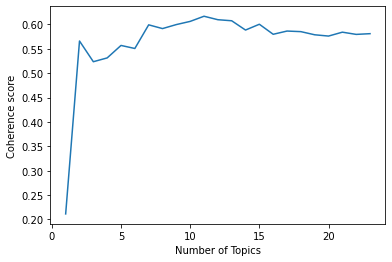

In [10]:
# Show graph
limit=24; start=1; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence score")
#plt.savefig('20240221_PhD_MalletLDALtr-Coherence')
plt.show()

In [11]:
# Print the coherence and perplexity scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, 'Coherence: ', round(cv, 4))

Num Topics = 1 Coherence:  0.2113
Num Topics = 2 Coherence:  0.566
Num Topics = 3 Coherence:  0.5235
Num Topics = 4 Coherence:  0.5313
Num Topics = 5 Coherence:  0.5569
Num Topics = 6 Coherence:  0.5507
Num Topics = 7 Coherence:  0.5992
Num Topics = 8 Coherence:  0.5915
Num Topics = 9 Coherence:  0.5997
Num Topics = 10 Coherence:  0.6063
Num Topics = 11 Coherence:  0.6168
Num Topics = 12 Coherence:  0.6097
Num Topics = 13 Coherence:  0.6076
Num Topics = 14 Coherence:  0.5885
Num Topics = 15 Coherence:  0.6004
Num Topics = 16 Coherence:  0.5798
Num Topics = 17 Coherence:  0.5864
Num Topics = 18 Coherence:  0.5852
Num Topics = 19 Coherence:  0.5788
Num Topics = 20 Coherence:  0.5762
Num Topics = 21 Coherence:  0.5841
Num Topics = 22 Coherence:  0.5796
Num Topics = 23 Coherence:  0.5811


In [12]:
# Coherence
print(coherence_values[10])

# Topics
malletModel = model_list[10]
model_topics = malletModel.show_topics(formatted=False)
pprint(sorted(malletModel.print_topics(num_words=20)))

0.6168165764725745
[(0,
  '0.057*"cook" + 0.038*"bread" + 0.031*"wash" + 0.030*"set" + 0.029*"bath" + '
  '0.024*"clean" + 0.023*"finish" + 0.023*"work" + 0.022*"catch" + '
  '0.019*"thing" + 0.019*"dress" + 0.018*"cake" + 0.018*"begin" + 0.017*"fish" '
  '+ 0.015*"job" + 0.014*"lot" + 0.014*"black" + 0.014*"kitchen" + '
  '0.013*"meat" + 0.013*"iron"'),
 (1,
  '0.099*"call" + 0.061*"drive" + 0.045*"meet" + 0.043*"miss" + 0.035*"return" '
  '+ 0.035*"hear" + 0.033*"find" + 0.033*"arrive" + 0.033*"home" + '
  '0.028*"church" + 0.026*"pass" + 0.025*"lunch" + 0.020*"expect" + '
  '0.019*"friend" + 0.018*"spend" + 0.016*"stand" + 0.015*"lose" + '
  '0.014*"part" + 0.013*"read" + 0.013*"wine"'),
 (2,
  '0.030*"talk" + 0.028*"home" + 0.026*"ride" + 0.024*"read" + 0.023*"dress" + '
  '0.022*"stay" + 0.022*"garden" + 0.021*"sit" + 0.021*"polly" + 0.019*"row" + '
  '0.018*"mama" + 0.018*"turn" + 0.018*"hope" + 0.016*"child" + 0.015*"hour" + '
  '0.014*"papa" + 0.013*"dick" + 0.013*"life" + 0.01

In [13]:
# Convert results to lda model format for visualization.
MalletLDA = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(malletModel)

# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(MalletLDA, corpus, id2word, sort_topics=False)
vis

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.206400  0.052593       1        1   9.428863
1     -0.141023 -0.293733       2        1   8.569085
2     -0.043401 -0.129595       3        1   8.694809
3      0.010799 -0.234945       4        1   8.605035
4      0.133942  0.019669       5        1   8.472986
5     -0.210761  0.224390       6        1   9.526566
6     -0.213470  0.169607       7        1   9.659144
7      0.155659  0.025393       8        1   9.298791
8     -0.232247  0.053901       9        1  10.128140
9      0.253170  0.144809      10        1   8.874377
10     0.080932 -0.032089      11        1   8.742205, topic_info=      Term        Freq       Total Category  logprob  loglift
123   send  550.000000  550.000000  Default  30.0000  30.0000
58   horse  532.000000  532.000000  Default  29.0000  29.0000
325   call  555.000000  555.000000  Default  28.0000  28.0000
23    rain  432.000000  432.000000  Default  27.0000  27.0000
289    man  374.000000  374.000000  Default  26.0000  26.0000
..     ...         ...         ...      ...      ...      ...
68   start   74.181137  315.592376  Topic11  -4.2686   0.9891
252    pay   62.355159  184.395558  Topic11  -4.4422   1.3528
499  clock   54.829536  121.300546  Topic11  -4.5709   1.6430
37   thing   70.955870  446.576623  Topic11  -4.3130   0.5975
323   book   47.303913   85.819428  Topic11  -4.7185   1.8414

[766 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
236       1  0.978619       abie
1720      6  1.004336    account
454      10  0.999602        ace
0        10  0.990677       ache
647       3  1.009872        add
...     ...       ...        ...
882       5  1.017250     yalata
421       2  0.539358       year
421       6  0.458857       year
134       5  0.632936  yesterday
134      11  0.366436  yesterday

[906 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])

In [38]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(MalletLDA, corpus, id2word, sort_topics=False)
vis

NameError: name 'MalletLDA' is not defined

In [14]:
MalletLDA.save('20240924_PhD_TopDiaChk_ATM11t')
pyLDAvis.save_html(vis, '20240924_PhD_TopDiaChk_ATM11t.html')

## 2. Range of alphas

In [7]:
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for alpha in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=11, id2word=id2word, alpha=alpha, random_seed=100)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [8]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, 
                                                        corpus=corpus, 
                                                        texts=data, 
                                                        start=6, 
                                                        limit=12, 
                                                        step=1)

Mallet LDA: 11 topics, 4 topic bits, 1111 topic mask
Data loaded.
max tokens: 93
total tokens: 56712
<10> LL/token: -7.87501
<20> LL/token: -7.44077
<30> LL/token: -7.31253
<40> LL/token: -7.24935

0	0.54545	rain drive child call find write hope hear letter shower weather home bring talk read friend bath beach arrive tomorrow 
1	0.54545	horse start mile boy water rain fire road buggy station scrub breakfast camp travel side rest thing sand ride black 
2	0.54545	port town pound train letter wheat bank dine mill club pay wife sell buy write flour rise connor land read 
3	0.54545	room sleep man home call send find people rain drive breakfast thing miss arrive afternoon weather return lunch station meet 
4	0.54545	cook bread work afternoon wash bring breakfast send dress tonight finish today thing clean clothe catch set fish mesurier weather 
5	0.54545	work stop afternoon truck shoot home week mill today boat chapel thing gun dog preach start aunt game pay oclock 
6	0.54545	question motion

<310> LL/token: -7.12125
<320> LL/token: -7.12374
<330> LL/token: -7.12455
<340> LL/token: -7.1179

0	0.54545	rain weather find send afternoon shower return arrive hope drive beach hear man tomorrow child letter die fellow read home 
1	0.54545	horse start boy water mile buggy thing rain fire camp travel road sand ride tank rest hold hour cup pack 
2	0.54545	port town pound letter train write wheat wife mill flour sell connor pay dine bank buy rise read find home 
3	0.54545	breakfast horse man miss arrive room sleep station people call stay home drive meet girl drink dress start fall wife 
4	0.54545	cook bread work afternoon breakfast wash send dress tonight finish today clothe weather clean bring tom bath mesurier iron catch 
5	0.54545	work stop truck afternoon home shoot today week mill thing chapel boat pay gun dog start oclock game wood aunt 
6	0.54545	question motion govt agree bill cabinet office vote send treasurer glyde move carry genl govr matter return answer member business 


<610> LL/token: -7.11685
<620> LL/token: -7.11392
<630> LL/token: -7.1161
<640> LL/token: -7.11033

0	0.54545	rain weather afternoon hope arrive letter write send shower hear man return people beach die find child call part showery 
1	0.54545	horse start boy mile water rain thing buggy fire camp travel sand black hour rest ride tank road hold sheep 
2	0.54545	port town pound train letter wife mill write sell pay find dine home connor rise buy wheat flour bank church 
3	0.54545	horse breakfast drive arrive miss station meet call man people stay road start room sleep find mother girl home friend 
4	0.54545	cook bread breakfast afternoon work finish dress send wash today bath thing clean clothe tonight bring set mesurier iron tom 
5	0.54545	stop work truck afternoon shoot home today mill week boat thing chapel pay start sleep gun dog oclock aunt preach 
6	0.54545	question motion govt agree call cabinet vote bill treasurer glyde answer move office genl carry govr member report matter send 

<910> LL/token: -7.12069
<920> LL/token: -7.11079
<930> LL/token: -7.11493
<940> LL/token: -7.11985

0	0.54545	rain weather letter hear find arrive afternoon return hope send write man people drive shower mail read expect beach showery 
1	0.54545	horse start boy thing water mile buggy rain drive camp ride sand travel bring scrub rest hour road tank sheep 
2	0.54545	port town pound train wife letter mill pay sell dine write home bank connor remain church land call rise wheat 
3	0.54545	horse breakfast miss meet call station people stay drive road man tom mother girl arrive start home sleep fall bay 
4	0.54545	cook bread breakfast work afternoon send wash finish dress clothe set today bring clean tonight bath mesurier weather catch iron 
5	0.54545	stop work truck afternoon shoot home week today thing mill boat chapel pay gun dog start oclock preach aunt wood 
6	0.54545	question motion govt agree cabinet call bill vote report send treasurer office glyde genl move carry answer dine intend 

<210> LL/token: -7.13281
<220> LL/token: -7.14877
<230> LL/token: -7.13857
<240> LL/token: -7.13231

0	0.63636	work stop truck shoot home today afternoon mill week thing chapel start boat pay game gun wood dog preach aunt 
1	0.63636	horse start boy drive mile water road breakfast buggy ride camp meet travel station arrive fire fear man stay bring 
2	0.63636	office read return club port bank hear blyth remain ayre send speak year whist lunch work join man spend find 
3	0.63636	mail breakfast man today tom bay sleep send stay arrive bring place drink wash vessel dress cup work room sister 
4	0.63636	cook bread work wash today send afternoon bring breakfast tonight weather finish set clean wind clothe mesurier tom iron black 
5	0.63636	town port pound train letter wheat write dine mill sell flour pay wife connor home buy club read church sale 
6	0.63636	question agree motion govt bill cabinet call vote office member move treasurer dine answer glyde matter report ministry carry letter 
7	0

<510> LL/token: -7.11974
<520> LL/token: -7.10941
<530> LL/token: -7.11539
<540> LL/token: -7.10994

0	0.63636	work stop truck afternoon shoot home today mill week start thing chapel boat preach game gun dog aunt pay wood 
1	0.63636	horse start mile road drive boy water breakfast buggy station sand camp travel ride bring fear meet arrive harness pack 
2	0.63636	read club office return remain ayre year meet hear whist blyth speak join play call bank afternoon send dine room 
3	0.63636	mail today man breakfast tom sleep bay wash stay arrive people drink place call tonight vessel send dress write room 
4	0.63636	cook bread work afternoon wash breakfast bring send today weather set dress finish tonight lot clothe clean bath wind mesurier 
5	0.63636	town pound port letter train flour mill write pay wheat buy wife sell dine connor home rise arrange sale church 
6	0.63636	agree question motion govt cabinet club office bill vote report member treasurer send glyde carry ministry genl move govr 

<810> LL/token: -7.11272
<820> LL/token: -7.11532
<830> LL/token: -7.1167
<840> LL/token: -7.11686

0	0.63636	work stop truck home shoot today afternoon mill week boat thing chapel pay preach gun dog aunt start wood game 
1	0.63636	horse start mile drive road boy water station buggy breakfast camp travel sand meet arrive eat fear ride harness cup 
2	0.63636	club read office remain dine weather blyth ayre afternoon meet talk whist play join speak call bank year bath write 
3	0.63636	breakfast mail man today call sleep tom stay arrive bay miss letter wash bring people drink girl clock place dress 
4	0.63636	cook bread wash work today breakfast bring afternoon tonight send finish weather clothe dress clean set wind bath tom mesurier 
5	0.63636	pound town port letter wheat train mill flour write sell buy pay wife connor home sale arrange walter price ton 
6	0.63636	question agree motion govt cabinet send bill vote office member report treasurer glyde call move matter answer genl govr carry

<110> LL/token: -7.171
<120> LL/token: -7.17622
<130> LL/token: -7.15756
<140> LL/token: -7.15937

0	0.72727	cook today work bread afternoon wash breakfast bring tonight finish wind set clean dress catch tom weather fish mesurier iron 
1	0.72727	horse start water mile boy drive rain buggy road fire sand ride camp travel bay scrub bring rest cup thing 
2	0.72727	port town pound train wheat letter flour mill sell bank pay dine buy connor club write wife home sale arrange 
3	0.72727	find call room meet sleep place man put arrive talk hour work tomorrow breakfast send life thing visit people year 
4	0.72727	call child sleep stay breakfast miss home horse wind station today girl lot pass send lady man find put thing 
5	0.72727	drive home read town polly dress row mama church papa dick miss child poll call stay talk willie sit estrange 
6	0.72727	question motion agree bill govt cabinet office lose paper answer dine treasurer move notice business ship hughe genl return matter 
7	0.72727	stop 

<410> LL/token: -7.13239
<420> LL/token: -7.1387
<430> LL/token: -7.12955
<440> LL/token: -7.12815

0	0.72727	cook afternoon work wash breakfast bread send today finish dress clothe bring wind weather clean bath tonight mesurier tom iron 
1	0.72727	horse start rain water mile buggy boy fire drive ride camp travel road hour breakfast sand put room black rest 
2	0.72727	port town pound train wheat letter mill flour buy pay sell write bank home wife connor dine church land arrange 
3	0.72727	call find arrive man meet drive breakfast year return place talk sleep friend hear visit expect people room lunch tomorrow 
4	0.72727	horse stay breakfast call miss station child home today mother tom girl people wash man thing lady road sleep dress 
5	0.72727	home read town drive polly dress row mama stay papa child dick talk poll church willie miss ride garden estrange 
6	0.72727	question motion govt agree office cabinet bill vote answer treasurer glyde report genl govr propose carry move matter bus

<710> LL/token: -7.1407
<720> LL/token: -7.1361
<730> LL/token: -7.13923
<740> LL/token: -7.13163

0	0.72727	cook afternoon breakfast wash work bread today send finish dress wind weather tonight clothe clean bath bring mesurier iron fish 
1	0.72727	horse rain start boy mile water fire camp buggy travel ride sand put sheep road rest black tank hold lead 
2	0.72727	town port pound train letter wheat flour mill sell write pay bank dine home buy connor party wife land arrange 
3	0.72727	call find drive arrive sleep breakfast hear friend man return place meet year people lunch port read expect room tomorrow 
4	0.72727	horse stay station breakfast home drive miss tom girl meet road call mother today thing lady start dress people man 
5	0.72727	home polly town drive dress row mama read stay papa child dick ride poll talk willie church turn estrange miss 
6	0.72727	question motion agree govt office cabinet bill vote report treasurer glyde answer genl matter govr carry move pound club strangewa

Mallet LDA: 11 topics, 4 topic bits, 1111 topic mask
Data loaded.
max tokens: 93
total tokens: 56712
<10> LL/token: -7.97871
<20> LL/token: -7.49093
<30> LL/token: -7.3495
<40> LL/token: -7.283

0	0.81818	thing man child sleep find room fear garden bring turn sand boil sea scrub work water today deal clear road 
1	0.81818	horse start boy water mile fire station rain bay buggy tom milk breakfast road cup camp travel arrive drive man 
2	0.81818	letter find town hear write pay read port drive wife expect spend return remain arrive share home propose meet win 
3	0.81818	cook today wash afternoon send work bread breakfast tonight tom wind finish bring dress clothe set weather bath clean catch 
4	0.81818	work stop afternoon truck shoot today mill home week start thing boat chapel game gun dog wood preach aunt find 
5	0.81818	train town port bank pound mill connor motion govt agree club dine wife business cabinet meeting party call ton arrange 
6	0.81818	wheat pound buy sell flour port read o

<310> LL/token: -7.13408
<320> LL/token: -7.1393
<330> LL/token: -7.14107
<340> LL/token: -7.13986

0	0.81818	thing bring sleep child find turn room supper fire fear call place tom cup today lie rest sand cake trouble 
1	0.81818	horse start boy mile water road buggy station rain camp travel bay wash pack harness tank drive arrive head ride 
2	0.81818	letter write find wife read town hear church remain drive afternoon ride port arrive receive place pay walter home expect 
3	0.81818	cook afternoon work today wash send bread breakfast tonight finish weather tom dress bring clothe bath clean set rain mail 
4	0.81818	work stop afternoon truck today shoot home week thing mill start chapel boat game gun hear dog find aunt preach 
5	0.81818	town call train port dine pound return meeting office agree cabinet lose year bill party speak settle hold business attend 
6	0.81818	pound port wheat club flour mill sell buy read bank meet pay oclock connor sleep sale ship ton rise dine 
7	0.81818	polly h

<610> LL/token: -7.13562
<620> LL/token: -7.13921
<630> LL/token: -7.14666
<640> LL/token: -7.14878

0	0.81818	thing fire bring sleep find room tom man put child turn rain call place trouble tonight today cook rest cup 
1	0.81818	horse start boy mile water road station breakfast buggy drive rain camp sand travel stay bay harness wash tom ride 
2	0.81818	letter write wife find read mail afternoon remain home hope walter hear arrive place sleep ride return call drive note 
3	0.81818	cook work today afternoon breakfast bread wash send dress finish bring clothe weather bath set tonight wind clean tom black 
4	0.81818	work stop afternoon truck today shoot home mill week thing chapel boat game start gun dog preach find pay aunt 
5	0.81818	port town train pound dine land party call meeting year receive bank rise attend lose church hold oclock agree man 
6	0.81818	wheat town port club pound buy sell flour read mill connor bank sale ton rain office meet dine speak hear 
7	0.81818	home polly rea

<910> LL/token: -7.13764
<920> LL/token: -7.13429
<930> LL/token: -7.14038
<940> LL/token: -7.14693

0	0.81818	thing bring child room turn stay fire put find sleep tonight today tom place bread call trouble rain arm send 
1	0.81818	horse start water boy rain mile road buggy station tom drive camp travel sand ride breakfast harness rest tank sheep 
2	0.81818	letter write wife find read home mail hear return afternoon arrive call walter remain place receive fear send sleep expect 
3	0.81818	cook work breakfast wash afternoon bread send finish weather dress wind clothe set today bath tonight clean bring tom lot 
4	0.81818	work stop afternoon truck home shoot thing week today mill boat chapel start gun dog preach game pay aunt oclock 
5	0.81818	port town train pound land pay dine oclock mill call church meeting order bank year receive party board spence business 
6	0.81818	wheat club sell flour town buy read port pound remain connor weather office bank meet offer sale ton blyth talk 
7	0.8

<210> LL/token: -7.15274
<220> LL/token: -7.15932
<230> LL/token: -7.15357
<240> LL/token: -7.1547

0	0.90909	wind thing wash today work put tom child bring kitchen clock bay turn sleep finish breakfast black clean job fear 
1	0.90909	horse start road mile boy station drive buggy stay water breakfast camp ride travel rain drink pack eat harness bay 
2	0.90909	call drive miss arrive meet breakfast find people hear church port man rise friend expect lady sleep year place visit 
3	0.90909	call office send matter agree cabinet write put return meet treasurer join glyde blyth talk remain genl hour reynold hand 
4	0.90909	work stop truck afternoon shoot today mill home boat week pay chapel game start thing gun dog preach aunt half 
5	0.90909	man afternoon sleep room letter mail arrive find send place bath write water dress people tomorrow hear return rest child 
6	0.90909	question motion govt club bill land vote ship speak move agree lose notice ministry dine pound bring carry receive propos

<510> LL/token: -7.14294
<520> LL/token: -7.13454
<530> LL/token: -7.13631
<540> LL/token: -7.13419

0	0.90909	thing child today wind put tom work sleep bring wash finish kitchen clock tonight breakfast job room cook change clean 
1	0.90909	horse start water mile boy road drive stay buggy station camp travel breakfast sand thing pack meet drink harness ride 
2	0.90909	call miss drive find breakfast arrive hear people year read sleep friend place lady man board meet port church mother 
3	0.90909	office send blyth talk matter agree write ayre call treasurer read glyde cabinet genl govr put join pass intend reynold 
4	0.90909	work stop afternoon truck home shoot week boat today mill thing chapel start preach gun dog game aunt pay oclock 
5	0.90909	man send letter mail write room arrive sleep return find afternoon place weather call people home dress hope bath tomorrow 
6	0.90909	question motion govt club bill call speak return vote meeting agree lose move notice carry pound charge paper r

<810> LL/token: -7.13705
<820> LL/token: -7.14469
<830> LL/token: -7.14029
<840> LL/token: -7.14822

0	0.90909	today child wind thing tom sleep work bring wash bay put kitchen room clock breakfast job clean black rest cook 
1	0.90909	horse start mile water boy road drive station buggy thing stay breakfast camp travel sand eat bring bay cup harness 
2	0.90909	call miss drive meet breakfast arrive people place friend find sleep hear board expect lady spend family year lunch man 
3	0.90909	office send blyth agree matter ayre write cabinet glyde call join genl put govr remain pass talk hand reynold governor 
4	0.90909	stop work afternoon truck home shoot today week mill boat chapel thing preach pay gun dog start aunt game wood 
5	0.90909	man send letter write mail arrive room home find return afternoon people sleep place bath hope dress drink vessel wife 
6	0.90909	question motion call bill club govt pound vote lose attend move bring dine port notice meeting agree charge return rise 
7	0.9

<110> LL/token: -7.19936
<120> LL/token: -7.19692
<130> LL/token: -7.17563
<140> LL/token: -7.17696

0	1	horse start drink buggy drive mile girl cup water cake travel ride head fear boy hand scrub thing rest trouble 
1	1	rain thing fire put place water boy find hour light bring side start chop tank rest begin son home mare 
2	1	port pound town train pay bank land drive rise receive ton ship lose board arrange meeting attend home share year 
3	1	cook bread bring work afternoon set dress breakfast tonight wash tom send clean finish catch today mesurier weather fish clothe 
4	1	work stop afternoon truck shoot today home week mill boat start chapel thing preach game pay gun dog oclock hear 
5	1	read letter club write wheat wife dine flour town mill buy connor sell port paper church remain talk sale price 
6	1	office question agree motion govt blyth matter bill business cabinet vote answer member report speak treasurer glyde move ministry genl 
7	1	dress home polly read drive town row mama 

<410> LL/token: -7.14317
<420> LL/token: -7.14261
<430> LL/token: -7.13724
<440> LL/token: -7.14199

0	1	horse start mile buggy boy ride breakfast drive head travel wait room water drink cake harness hand fear fall thing 
1	1	fire rain water thing bring find put sand hour boy black light camp supper man scrub tank sheep clear cut 
2	1	pound port town train pay oclock land bank meet drive board receive ship rise find pass hear meeting year share 
3	1	cook bread work breakfast send tonight bring dress afternoon set weather finish catch wash clothe mesurier clean fish washing today 
4	1	work stop truck afternoon home shoot today mill week thing boat chapel start game hear gun dog wood yesterday aunt 
5	1	club wheat read letter write wife dine buy flour mill port connor sell town office remain call arrange bank sale 
6	1	question motion govt office agree cabinet club bill vote answer member report treasurer glyde send ministry carry genl govr move 
7	1	home read drive town polly dress row 

<710> LL/token: -7.12698
<720> LL/token: -7.12633
<730> LL/token: -7.13894
<740> LL/token: -7.1307

0	1	horse start mile buggy drive ride boy head breakfast travel water fear hold harness lead arrive pack road wash drink 
1	1	rain fire thing water put boy black bring sand light rest hour find man wind cut scrub tank supper tom 
2	1	pound port town train pay land receive ship oclock church board find bank meeting mill rise meet drive pass year 
3	1	cook bread work breakfast wash afternoon send tonight dress finish clothe set clean weather wind today catch mesurier bath iron 
4	1	work stop truck afternoon shoot home today week mill thing game chapel boat pay hear start preach gun dog aunt 
5	1	club wheat dine read letter write flour town connor port wife buy office sell bank remain call ayre arrange party 
6	1	question motion govt office agree call cabinet vote bill member report treasurer glyde send ministry genl move answer govr carry 
7	1	home read polly drive dress row mama town talk

In [17]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, 
                                                        corpus=corpus, 
                                                        texts=data, 
                                                        start=1, 
                                                        limit=60, 
                                                        step=4)

Mallet LDA: 11 topics, 4 topic bits, 1111 topic mask
Data loaded.
max tokens: 93
total tokens: 56712
<10> LL/token: -7.73482
<20> LL/token: -7.34464
<30> LL/token: -7.21301
<40> LL/token: -7.14896

0	0.09091	port board drive find man breakfast miss arrive sleep receive pay land boat ship vessel pass oclock meeting lunch place 
1	0.09091	child rain stay river hour horse start hope boy work send side return arrive man garden bring ride talk lunch 
2	0.09091	pound town port train wheat bank club mill flour read letter buy sell connor wife dine pay weather ayre meet 
3	0.09091	horse breakfast call meet start send man dress tom station rain work thing miss people bay find girl bring play 
4	0.09091	sleep cook thing begin send breakfast boy wind cut put rain scrub meat child floor fire bring turn find chop 
5	0.09091	letter write dine town call afternoon read rain club wife remain mail talk home office settle miss school port hear 
6	0.09091	agree question office motion govt send bill cabine

<310> LL/token: -7.02268
<320> LL/token: -7.01323
<330> LL/token: -7.01166
<340> LL/token: -7.01395

0	0.09091	port drive find town board rise church arrive train ship land breakfast receive pay miss people boat room water meeting 
1	0.09091	child rain drive man call hope bring work afternoon find arrive hour stay return pair note room meet fire fellow 
2	0.09091	pound town port wheat club train mill call flour buy dine sell bank letter read meet write connor wife ayre 
3	0.09091	horse call breakfast miss station man stay start meet home arrive people sleep drive dress mother girl thing road lady 
4	0.09091	thing bring cook work meat child cake call send turn start put chop rain set bread trouble boy cup stay 
5	0.09091	letter write read remain wife afternoon call home town port miss send business walter hear connor church office settle return 
6	0.09091	question motion agree govt office club vote bill send treasurer glyde report cabinet ministry member blyth call bring govr move 
7	0.

<610> LL/token: -7.00009
<620> LL/token: -6.99799
<630> LL/token: -7.00139
<640> LL/token: -6.99839

0	0.09091	port town drive train find church board rise pay breakfast ship arrive oclock land receive man sleep pound school miss 
1	0.09091	rain child man drive hope work arrive bring room hour call return meet side stay note start find pair shower 
2	0.09091	pound wheat town port mill letter club flour sell buy read train bank write dine call connor home wife office 
3	0.09091	horse home miss man call breakfast stay meet tom station drive start people mother arrive road girl lady place sleep 
4	0.09091	thing bring cook turn find put work send rain child trouble cake bread call breakfast meat chop tonight lie cup 
5	0.09091	write letter call remain wife read afternoon town club office mail hear return settle connor bath dine miss weather church 
6	0.09091	question agree motion govt office cabinet call send club vote treasurer glyde move govr bring report member answer bill carry 
7	0.09

<910> LL/token: -7.00048
<920> LL/token: -7.0075
<930> LL/token: -7.01189
<940> LL/token: -7.00812

0	0.09091	port town drive train pound land board find pay breakfast man church arrive ship receive rise bath college school bank 
1	0.09091	rain man child room call hour start arrive drive meet road arm hope pair jug clear fellow side fire door 
2	0.09091	pound town wheat port club mill letter flour train buy sell dine bank write call read connor office meet home 
3	0.09091	horse breakfast miss call meet home station people man tom stay road start today fall bay arrive girl drive mother 
4	0.09091	thing work bring turn child send cake rain call cup bread find trouble meat cook catch stay lie put head 
5	0.09091	letter write call wife remain read afternoon port send town mail return connor club settle hear home weather business miss 
6	0.09091	question motion agree govt office cabinet vote treasurer glyde member bill ministry club report send call move carry govr blyth 
7	0.09091	home tow

<210> LL/token: -7.127
<220> LL/token: -7.12377
<230> LL/token: -7.11882
<240> LL/token: -7.12259

0	0.45455	horse start man road station water bay play fear today drink room breakfast hand stay wash police boy cup cut 
1	0.45455	rain horse fire boy thing buggy start water mile put bring camp hour find light sand sheep cook lead tank 
2	0.45455	write letter wheat club connor wife read flour office buy remain weather afternoon walter offer hear ton mill bank speak 
3	0.45455	cook work afternoon today bread breakfast tom wash send tonight bring dress finish mail weather bath wind clothe set clean 
4	0.45455	question motion govt agree cabinet vote office blyth treasurer glyde answer send move carry genl govr bill put lose strangeway 
5	0.45455	port town pound train pay land rise dine church mill bank sell home find drive doctor meeting letter read oclock 
6	0.45455	call club read room pound member receive return pass ministry speak matter dine office spence oclock man write reynold hand 


<510> LL/token: -7.10952
<520> LL/token: -7.10248
<530> LL/token: -7.10554
<540> LL/token: -7.10597

0	0.45455	horse start man station road play bay wash buggy water people drink today run fear stay thing police meet fall 
1	0.45455	horse rain boy fire find thing mile sand start light water head put camp hour breakfast bring drive tank black 
2	0.45455	letter wheat write flour read connor buy wife pound club remain weather town port sale bank walter ton mill offer 
3	0.45455	cook work today afternoon bread breakfast send tom bring wash finish dress mail tonight weather clothe set clean bath wind 
4	0.45455	question motion agree govt bill cabinet vote office treasurer send glyde club answer carry genl move govr call bring matter 
5	0.45455	port town train pound pay dine land church drive find mill sleep return oclock doctor people sell meet employ meeting 
6	0.45455	call read club room office write receive pass ayre man hear bank speak noon spence send reynold party remain find 
7	0.454

<810> LL/token: -7.10647
<820> LL/token: -7.1071
<830> LL/token: -7.10396
<840> LL/token: -7.11577

0	0.45455	horse man start station road wash water stay people drink play fall bay arrive police fear room weather today set 
1	0.45455	horse rain boy start fire mile water buggy camp sand thing drive find hour put thunder black breakfast ride eat 
2	0.45455	letter wheat write flour sell club buy connor read wife port remain rain speak weather sale town office walter price 
3	0.45455	cook work breakfast afternoon bread send bring today tom wash finish tonight dress weather clothe clean set bath mesurier iron 
4	0.45455	question motion govt agree bill cabinet vote treasurer glyde move answer genl govr carry office pound matter send call propose 
5	0.45455	port town train pound pay mill church land dine find call home drive rise ride receive bank doctor midnight employ 
6	0.45455	read club call office write dine room blyth send ayre man remain return party wife reynold whist noon year meeti

<110> LL/token: -7.16253
<120> LL/token: -7.16191
<130> LL/token: -7.14923
<140> LL/token: -7.14596

0	0.81818	thing bring fear sleep room fire sand breakfast girl turn child place rest wind cup supper find man lie today 
1	0.81818	horse start water boy mile buggy road tom bay rain arrive drive stay camp travel ride station wash black harness 
2	0.81818	letter town find write remain read hear pay wife port home spend sleep mill drive arrive ride offer win talk 
3	0.81818	cook afternoon today work wash bread send breakfast tom tonight dress finish bring set weather clothe wind lot clean bath 
4	0.81818	work stop afternoon truck shoot today home mill week start boat thing chapel game play preach gun dog find pay 
5	0.81818	train town call govt connor pound dine agree meeting return bill business letter church cabinet arrange write mill report question 
6	0.81818	port pound wheat club flour buy sell read bank oclock rise land dine weather sale rain ship price ton board 
7	0.81818	home dre

<410> LL/token: -7.13533
<420> LL/token: -7.13386
<430> LL/token: -7.13207
<440> LL/token: -7.13228

0	0.81818	bring thing find fire child sleep place trouble turn today room cup fear man supper call lie put garden tom 
1	0.81818	horse start boy rain mile water road buggy station breakfast tom camp ride travel drive bay harness tank hold run 
2	0.81818	letter write wife read find hear church remain afternoon town home pay drive mail walter receive ride midnight place offer 
3	0.81818	cook work today afternoon wash breakfast bread send tonight finish dress set weather bath clothe bring tom wind clean catch 
4	0.81818	work stop afternoon truck shoot week home today mill thing start chapel boat gun dog aunt play game hear oclock 
5	0.81818	town port train call pound return meeting dine attend cabinet agree lose settle land receive bank speak office bill charge 
6	0.81818	port wheat pound flour club mill buy sell read meet bank connor dine sale ton ship price paper rise rain 
7	0.81818	hom

<710> LL/token: -7.1397
<720> LL/token: -7.14228
<730> LL/token: -7.14143
<740> LL/token: -7.14534

0	0.81818	thing bring child room fire sleep turn today put tom call find trouble cook man place cup stay rest lie 
1	0.81818	horse start boy rain mile water station road breakfast buggy camp travel tom drive ride harness sheep rest tank head 
2	0.81818	letter write wife find read sleep hear home mail afternoon walter miss drive ride arrive pay remain hope call note 
3	0.81818	cook work afternoon today breakfast bread wash send bring dress finish tonight clothe set tom weather clean bath catch mesurier 
4	0.81818	work stop truck afternoon shoot today week home thing mill chapel boat start game gun dog wood preach find aunt 
5	0.81818	port town train pound land meeting call party dine receive year mill bank hold spence oclock attend ship lose employ 
6	0.81818	club wheat pound flour sell town port read buy meet dine office bank connor mill sale ton blyth speak remain 
7	0.81818	home polly 

Mallet LDA: 11 topics, 4 topic bits, 1111 topic mask
Data loaded.
max tokens: 93
total tokens: 56712
<10> LL/token: -8.08298
<20> LL/token: -7.58678
<30> LL/token: -7.41245
<40> LL/token: -7.33989

0	1.18182	thing wind cook work bread rain sleep room tonight set man send mail weather afternoon today shower wash tom breakfast 
1	1.18182	horse start boy mile black station rain water fire buggy road meet pack tom camp travel stay sand thing mother 
2	1.18182	pound port train town wheat club bank mill pay sell buy connor land dine meet rise ayre arrange wife walter 
3	1.18182	office question agree send blyth call club matter govt dine cabinet answer talk report treasurer glyde join member ministry genl 
4	1.18182	breakfast wash dress cook today afternoon bay clothe bring finish tom weather mesurier washing horse bath send catch milk cake 
5	1.18182	town read church drive remain write home miss spend rain afternoon hear find wife call ride river pass wine lunch 
6	1.18182	read bill motion t

<310> LL/token: -7.14882
<320> LL/token: -7.1499
<330> LL/token: -7.149
<340> LL/token: -7.15298

0	1.18182	wind rain thing today tom child sleep bring room put set blow work tonight place wash bay bread man rest 
1	1.18182	horse start boy station mile water road breakfast buggy stay meet rain pack camp thing travel tom drive drink rest 
2	1.18182	port pound town train letter wheat club write dine mill bank flour wife connor sell buy pay meet land office 
3	1.18182	agree question office motion govt blyth club ayre call cabinet send matter vote answer member report treasurer glyde carry join 
4	1.18182	cook breakfast afternoon dress wash bread today weather finish tonight bath clothe fish mesurier washing cake lot clock work meat 
5	1.18182	call drive read miss church home afternoon rain town hear spend remain talk ride lady party wine family arrive glass 
6	1.18182	return bill room read hear find lose pass lunch receive friend bath stand man rise talk part bring charge shower 
7	1.1818

<610> LL/token: -7.14554
<620> LL/token: -7.14821
<630> LL/token: -7.14467
<640> LL/token: -7.14742

0	1.18182	wind rain thing today room sleep child tom wash tonight work blow bay breakfast rest shower place put call find 
1	1.18182	horse start boy station mile water road thing stay buggy man tom drive arrive camp breakfast travel drink ride sand 
2	1.18182	town pound port train letter wheat club bank flour mill write sell buy wife connor pay dine read arrange land 
3	1.18182	office agree question motion govt club blyth ayre cabinet send matter vote member report call treasurer glyde answer carry ministry 
4	1.18182	cook bread breakfast afternoon dress finish wash today weather clothe work tonight bath fish mesurier iron washing lot water stay 
5	1.18182	call drive miss meet afternoon talk friend arrive church spend hear find breakfast lady read place people wine play glass 
6	1.18182	return call port hear lose find read man room receive rise bill bath put pass lunch part month life b

<910> LL/token: -7.14094
<920> LL/token: -7.13667
<930> LL/token: -7.13921
<940> LL/token: -7.13692

0	1.18182	wind thing room today child sleep tom work put blow wash black bay rest tonight rain find bring shower kitchen 
1	1.18182	horse start boy water mile station road stay thing buggy tom drive rain bay camp man travel ride sand breakfast 
2	1.18182	town pound port train letter wheat club write mill wife flour sell connor bank dine pay read buy remain arrange 
3	1.18182	office question agree motion govt blyth club send cabinet vote matter answer member report bill treasurer glyde ministry ayre speak 
4	1.18182	cook breakfast bread wash afternoon today dress bath finish clothe tonight weather lot work fish mesurier iron washing set send 
5	1.18182	miss call drive meet breakfast afternoon arrive place sleep hear friend people expect find lady year home spend visit talk 
6	1.18182	call return port read hear find receive pass room attend lunch month charge lose man noon part dine board

<210> LL/token: -7.15838
<220> LL/token: -7.15349
<230> LL/token: -7.15948
<240> LL/token: -7.15436

0	1.54545	cook wash bread work breakfast finish set today tonight clothe lot afternoon tom weather clean catch bay fish dress mesurier 
1	1.54545	stop work truck home today shoot afternoon mill week thing game boat chapel start wood gun dog oclock preach pay 
2	1.54545	pound town port letter wheat train bank dine write sell flour buy mill connor meet club oclock wife arrange office 
3	1.54545	breakfast play call room meet people fall trouble find put sleep man station lady drink send beat pass glass place 
4	1.54545	bring today child water man send sleep hand tom head black dress boy thing feed tonight bird breakfast kill sheep 
5	1.54545	port read town remain pay rise call meeting club church talk find receive land drive return attend lose ship order 
6	1.54545	office question agree motion govt cabinet vote ayre answer member report call move treasurer carry glyde matter send bill club

<510> LL/token: -7.14969
<520> LL/token: -7.15633
<530> LL/token: -7.15223
<540> LL/token: -7.15413

0	1.54545	cook bread breakfast work wash finish today set clothe dress clean afternoon lot tonight bath mesurier fish tom mail iron 
1	1.54545	work stop home truck afternoon shoot today boat mill week thing start chapel game oclock gun dog wood preach pay 
2	1.54545	pound wheat letter town flour port buy write mill train bank connor sell club read dine wife office oclock arrange 
3	1.54545	breakfast people play stay man drink sleep fall room home miss run meet trouble station wash supper place find glass 
4	1.54545	child man bring tom room sleep today thing water send tonight boy wind fire hand head return bay pain begin 
5	1.54545	port town pay read receive remain drive call land meeting church rise return lose train find order attend club ship 
6	1.54545	agree question office motion govt bill ayre club cabinet vote member report treasurer answer carry glyde ministry call genl move 
7	

<810> LL/token: -7.13551
<820> LL/token: -7.15094
<830> LL/token: -7.15917
<840> LL/token: -7.15736

0	1.54545	cook breakfast bread wash work finish tonight clothe today dress clean afternoon set mail tom weather bath fish mesurier catch 
1	1.54545	work stop truck afternoon home shoot today boat mill week thing game chapel preach pay start wood gun dog aunt 
2	1.54545	pound wheat town letter flour club sell buy mill connor port bank write office meet dine wife read ayre arrange 
3	1.54545	breakfast meet man place people miss play fall stay home call lady drink eat station dress sleep board room supper 
4	1.54545	thing child today sleep man room tom send bring water boy hand bay head fire rest return put find wash 
5	1.54545	port town train pay read meeting land remain drive receive return church find order rise pound dine ship board pass 
6	1.54545	question agree motion govt office cabinet club bill vote answer call report move carry treasurer glyde matter ministry genl govr 
7	1.54545

<110> LL/token: -7.18806
<120> LL/token: -7.17665
<130> LL/token: -7.1651
<140> LL/token: -7.15733

0	1.90909	rain thing wind fire water weather black wash today fall iron tonight shower sand cut hand head light put set 
1	1.90909	horse start boy drive mile station buggy road fear breakfast cup girl rest bay arrive stay pack camp water travel 
2	1.90909	town port pound train pay flour mill read church arrange drive offer buy ship ton board settle price rain news 
3	1.90909	call return send pass miss meet hold man place bring tomorrow hour stand remain find point talk friend part put 
4	1.90909	work stop afternoon home truck boat shoot mill start week thing preach wood game chapel gun dog find aunt river 
5	1.90909	hear sleep afternoon send home find letter weather expect beach place hope year call people buy change family money put 
6	1.90909	letter write dine wheat wife sell connor bank land club bill pound meet remain business oclock paper answer speak walter 
7	1.90909	home drive re

<410> LL/token: -7.13966
<420> LL/token: -7.14434
<430> LL/token: -7.14368
<440> LL/token: -7.1359

0	1.90909	rain thing water fire wind put bring hand set shower weather cut light head fall boy pain trip thunder cold 
1	1.90909	horse start boy road station mile buggy tom drive breakfast cup wait pack water camp travel rest ride harness lead 
2	1.90909	port town train pound mill pay club dine rise read call arrange bank church meeting receive land attend ship doctor 
3	1.90909	call arrive miss meet return man pass find breakfast play bring send point hour hold put stand tomorrow place remain 
4	1.90909	work stop afternoon home truck shoot boat today week mill wood start game chapel yesterday preach gun pay dog half 
5	1.90909	find send home afternoon sleep weather write letter expect hear thing place child hope fear people year book beach note 
6	1.90909	letter write wheat wife pound buy sell read connor flour remain dine office bill offer party sale walter price bank 
7	1.90909	home d

<710> LL/token: -7.13901
<720> LL/token: -7.13665
<730> LL/token: -7.14668
<740> LL/token: -7.13866

0	1.90909	rain thing fire put water boy wind hand set head fall cut weather light shower begin sand lie cold trip 
1	1.90909	horse start road station mile boy rest water stay buggy fear tom pack camp travel ride bay arrive harness lead 
2	1.90909	port town pound train pay dine land call rise mill receive order church ship club meeting board bank doctor read 
3	1.90909	call drive arrive meet miss play breakfast room people lunch return man pass sleep friend place run lady stand find 
4	1.90909	work stop afternoon truck shoot week boat home today mill wood game thing chapel pay preach gun start dog hear 
5	1.90909	send find home afternoon write letter sleep child place weather call hope hear tomorrow part remain lend return thing note 
6	1.90909	letter write wife wheat flour read sell club buy connor office pound remain party bank dine offer speak sale walter 
7	1.90909	home read dress dr

Mallet LDA: 11 topics, 4 topic bits, 1111 topic mask
Data loaded.
max tokens: 93
total tokens: 56712
<10> LL/token: -8.19919
<20> LL/token: -7.63617
<30> LL/token: -7.44853
<40> LL/token: -7.35556

0	2.27273	cook wash bread today tonight work set bring wind finish clothe afternoon clean catch breakfast bath weather lot fish send 
1	2.27273	work stop afternoon truck start shoot week home mill today boat thing wood chapel river preach load yesterday gun pay 
2	2.27273	drive town home read garden dress child row ride mama stay hear papa church dick turn poll miss hope show 
3	2.27273	call question put polly hour carry pass place miss return lunch life play room bring glyde meet estrange read talk 
4	2.27273	home afternoon find send rain run tomorrow game play deal bird lose shower write wait lend hold lot water ride 
5	2.27273	port town pound letter train write read wife sell pay buy remain dine club land flour mill rise meeting wheat 
6	2.27273	office club bank agree connor motion govt b

<310> LL/token: -7.11364
<320> LL/token: -7.11705
<330> LL/token: -7.11817
<340> LL/token: -7.11487

0	2.27273	cook wash bread work tonight breakfast finish bring today dress clothe bath afternoon clean tom lot wind fish mesurier set 
1	2.27273	work stop truck home shoot week start today afternoon thing mill hear wood game boat chapel pay yesterday preach gun 
2	2.27273	dress town polly drive home row mama garden stay child ride papa dick poll church talk hour willie estrange read 
3	2.27273	call read meet miss hear place lunch friend bring play pass talk order stand expect lady hand book bath glass 
4	2.27273	rain send afternoon weather home sleep run shower ride beach tomorrow part find remain store lose bird sea cold lay 
5	2.27273	port town pound train wheat club dine flour buy mill bank sell connor pay rise remain land arrange read oclock 
6	2.27273	office agree question motion govt blyth club matter bill ayre cabinet speak party vote answer member report move treasurer join 
7	2.

<610> LL/token: -7.09567
<620> LL/token: -7.09909
<630> LL/token: -7.1027
<640> LL/token: -7.09536

0	2.27273	cook bread wash finish work breakfast today dress tonight tom clothe afternoon clean bath set catch fish mesurier iron washing 
1	2.27273	work stop afternoon truck shoot week mill today boat home game pay thing wood start chapel oclock preach gun dog 
2	2.27273	home dress town polly read drive row garden mama child ride turn papa stay dick sit hour poll church willie 
3	2.27273	call meet miss drive read lunch place talk people friend man pass hear play bath stand expect year lady fear 
4	2.27273	rain send weather afternoon sleep home wind find bring beach shower point blow remain part bird tomorrow cold lay play 
5	2.27273	port town pound train wheat club bank flour sell dine buy mill connor remain pay rise read land oclock arrange 
6	2.27273	office agree question motion govt blyth club matter bill business ayre cabinet vote dine answer member report treasurer speak join 
7	2.2

<910> LL/token: -7.11064
<920> LL/token: -7.10659
<930> LL/token: -7.10931
<940> LL/token: -7.11685

0	2.27273	cook breakfast bread wash work finish afternoon dress today clothe tom tonight set lot catch clean wind mesurier fish bath 
1	2.27273	work stop truck home shoot week mill afternoon today boat hear game oclock pay start chapel thing preach gun dog 
2	2.27273	home dress town polly drive stay row garden mama child read papa dick ride poll sit church life willie estrange 
3	2.27273	call meet miss talk drive read room place lunch people friend arrive pass find spend breakfast expect stand bath lady 
4	2.27273	rain send weather afternoon sleep bring beach home shower wind find put play turn point tomorrow cold run store beat 
5	2.27273	port town pound train wheat club bank sell dine flour buy mill connor read pay land remain party church sale 
6	2.27273	office question agree motion govt blyth club bill matter ayre cabinet business vote dine member report answer treasurer glyde notic

<210> LL/token: -7.16182
<220> LL/token: -7.16817
<230> LL/token: -7.15956
<240> LL/token: -7.16026

0	2.63636	cook wash bread tonight breakfast set finish today clothe work cake tom clean afternoon mesurier iron washing weather thing kitchen 
1	2.63636	thing home today put work boat shoot week hear clock yesterday find gun run water aunt die game point break 
2	2.63636	send bring afternoon hand lot letter catch turn bath dress fish garden tomorrow work write mail find bird cold child 
3	2.63636	man breakfast sleep arrive tom mail today room people bay put drink weather vessel water eat stay bath supper miss 
4	2.63636	rain wind fire thing black water bring child sand sheep shower boy bay fear weather fall blow light milk feed 
5	2.63636	office rise question agree motion govt matter bill cabinet lose vote answer member report move treasurer glyde carry blyth ministry 
6	2.63636	town pound club letter port train wheat dine bank flour sell connor buy mill meet land pay write ayre arrange

<510> LL/token: -7.13423
<520> LL/token: -7.13665
<530> LL/token: -7.13478
<540> LL/token: -7.13567

0	2.63636	cook wash bread breakfast today finish set clean clothe thing tonight fish mesurier cake iron washing work dress job kitchen 
1	2.63636	work stop home thing truck today boat shoot week mill hear game chapel river pay gun dog aunt die clock 
2	2.63636	send bring afternoon work lot hand write catch tomorrow letter bath dress beach room store begin bird tonight yesterday turn 
3	2.63636	man tom breakfast arrive mail people room bay today sleep vessel drink bath place change lady water weather sister board 
4	2.63636	rain wind child thing fire water boy black weather shower sand blow bring scrub fear light supper feed dust rest 
5	2.63636	office agree question motion govt club blyth bill matter ayre cabinet vote answer member report treasurer carry glyde ministry move 
6	2.63636	pound town letter port train wheat bank club flour sell buy dine write pay connor mill meet wife arrang

<810> LL/token: -7.11729
<820> LL/token: -7.12411
<830> LL/token: -7.12652
<840> LL/token: -7.12661

0	2.63636	cook bread wash today tonight breakfast finish set clothe clean dress thing tom fish mesurier iron work washing weather job 
1	2.63636	work stop truck thing boat mill shoot home today week hear preach start game chapel clock pay gun dog aunt 
2	2.63636	send afternoon bring work write hand letter catch beach tomorrow lot bath hope run store bird turn yesterday buggy note 
3	2.63636	man breakfast mail room arrive people sleep bay tom today vessel eat drink put weather lady rest telegraph sister child 
4	2.63636	wind rain thing fire water black boy bring blow sand shower man child wash scrub light bay supper feed dust 
5	2.63636	office agree question motion govt bill blyth club ayre cabinet vote answer matter member report move treasurer glyde carry ministry 
6	2.63636	town pound port letter train wheat club bank dine flour sell buy connor pay meet mill write land rise speak 
7	2

<110> LL/token: -7.23454
<120> LL/token: -7.2118
<130> LL/token: -7.19321
<140> LL/token: -7.1864

0	3	cook wash bread set work afternoon send breakfast finish today wind lot clothe weather dress clean bath tonight fish mesurier 
1	3	horse water start station stay mile road rest boy buggy drink sand sheep girl arrive cup camp travel head breakfast 
2	3	dress turn home garden stay ride child polly row mama hour friend flower papa dick poll buggy sit cake deal 
3	3	tom thing bring man breakfast mail bay black sleep weather put find hand eat tonight today light feed boy meat 
4	3	work afternoon stop find today yesterday boat home shoot week play bring thing mill game put chapel hear river load 
5	3	port pound town wheat train dine buy club bank flour mill sell pay meeting land lose church rise sale ship 
6	3	office agree question motion govt connor club bill matter business cabinet answer account member report treasurer glyde talk notice carry 
7	3	rain wind start place fire sleep truck h

<410> LL/token: -7.1198
<420> LL/token: -7.12299
<430> LL/token: -7.12186
<440> LL/token: -7.11922

0	3	cook work wash bread finish set breakfast afternoon send dress clothe lot catch weather clean today bath mesurier fish tonight 
1	3	horse start water boy road station mile buggy rest sand head cup fear pack drink camp travel feed wait harness 
2	3	dress stay polly garden read row town child mama ride home run flower papa dick deal turn poll sit church 
3	3	bring tom man today mail bay breakfast weather stay tonight thing sleep vessel black clock room board trouble lose sister 
4	3	work stop afternoon home truck boat shoot week today mill bring play start wood game yesterday chapel pay gun dog 
5	3	port town pound wheat train dine club flour bank sell mill pay buy connor rise meeting land church sale ton 
6	3	office agree question motion govt blyth bill club matter business cabinet answer vote member report carry move treasurer glyde ministry 
7	3	rain thing wind afternoon put fire fi

<710> LL/token: -7.11378
<720> LL/token: -7.11217
<730> LL/token: -7.11865
<740> LL/token: -7.11862

0	3	cook work bread finish wash dress set afternoon tonight breakfast clothe catch clean weather lot fish iron today washing job 
1	3	horse start boy station mile water buggy road sand bring fear black head stay tom rest camp travel drink supper 
2	3	dress polly ride stay read row turn garden mama home town church papa dick poll run child willie talk hour 
3	3	today man bring bay breakfast mail tom sleep send weather vessel clock room wash eat stay tonight change board sister 
4	3	work stop afternoon home truck boat shoot week today preach mill wood game pay chapel hear start gun load dog 
5	3	port town pound train wheat club dine bank flour mill sell pay land arrange rise connor buy sale ship price 
6	3	office agree question motion govt blyth club bill matter ayre cabinet carry vote answer member report business speak treasurer move 
7	3	rain thing wind put send fire afternoon water bl

Mallet LDA: 11 topics, 4 topic bits, 1111 topic mask
Data loaded.
max tokens: 93
total tokens: 56712
<10> LL/token: -8.43429
<20> LL/token: -7.78991
<30> LL/token: -7.53149
<40> LL/token: -7.41484

0	3.36364	wash cook dress set tonight wind work bring thing clothe rain afternoon begin breakfast fish iron finish weather fire kitchen 
1	3.36364	horse start boy road man station mile water room rain fire cup fear buggy arrive wait rest camp travel tom 
2	3.36364	drive stay sit hour home child talk polly row hope mama ride papa dick poll dress buggy supper door pick 
3	3.36364	bread today breakfast tom bay lot cook mail clean wind catch black sand mesurier eat job weather send finish wash 
4	3.36364	bank send question agree call lose bill hold pass hear cabinet talk return put year report treasurer glyde intend genl 
5	3.36364	afternoon work stop truck today shoot week mill play put preach hear start game wood oclock thing chapel river home 
6	3.36364	club letter office dine write pound por

<310> LL/token: -7.17488
<320> LL/token: -7.1696
<330> LL/token: -7.17372
<340> LL/token: -7.16397

0	3.36364	afternoon work cook tonight finish set dress send breakfast bath catch wash begin fish mesurier washing kitchen clock hand meat 
1	3.36364	horse start boy water road buggy mile station fire drink fear rest wait pack camp head travel sand lead thing 
2	3.36364	home dress ride polly row drive mama sit stay town talk papa garden dick poll turn willie deal estrange door 
3	3.36364	wind today tom bread weather bring wash mail bay black cook breakfast clean lot clothe job vessel feed thing bird 
4	3.36364	office agree question bill blyth govt cabinet answer return report matter talk treasurer glyde meeting business year intend move genl 
5	3.36364	work afternoon stop home truck today shoot week start preach game hear mill chapel wood river play break gun pay 
6	3.36364	pound port town wheat wife club train dine remain flour mill sell letter connor write land oclock arrange sale price

<610> LL/token: -7.14352
<620> LL/token: -7.14151
<630> LL/token: -7.14466
<640> LL/token: -7.14174

0	3.36364	work breakfast finish tonight cook dress wash afternoon catch send hand bath bring set fish mesurier begin washing today meat 
1	3.36364	horse start boy road water station mile buggy rest thing eat drink tom fire sand pack camp fear travel ride 
2	3.36364	home talk polly garden dress turn drive row mama ride sit child papa read dick poll hour deal willie stay 
3	3.36364	wind bread bring today mail tom bay cook clean black wash weather fire blow vessel job change set lot clothe 
4	3.36364	agree office question motion govt blyth bill club matter business ayre cabinet vote answer report move dine treasurer glyde ministry 
5	3.36364	work stop afternoon home truck today boat shoot week mill hear game start chapel wood preach yesterday gun pay dog 
6	3.36364	pound port town train wheat club bank flour wife buy dine sell mill letter connor write rise land arrange offer 
7	3.36364	tow

<910> LL/token: -7.13921
<920> LL/token: -7.13669
<930> LL/token: -7.15096
<940> LL/token: -7.14679

0	3.36364	work cook breakfast bread finish wash afternoon dress bath catch set begin hand tonight fish mesurier send washing cake meat 
1	3.36364	horse boy start water road mile buggy sand fire rest tom pack light camp travel hour ride cup head station 
2	3.36364	home drive dress polly garden read row stay mama sit turn child ride talk papa town dick poll willie hour 
3	3.36364	bring today mail wind tom bay black lot clean wash change tonight vessel clothe job cook kitchen room turn frank 
4	3.36364	office question agree motion govt blyth club bill matter ayre cabinet vote answer member report speak move treasurer dine glyde 
5	3.36364	work home stop afternoon truck boat shoot week mill today wood game start preach chapel pay hear gun dog half 
6	3.36364	pound port town train wheat wife club flour bank sell dine mill buy letter connor pay write land oclock arrange 
7	3.36364	read find t

<210> LL/token: -7.13384
<220> LL/token: -7.14231
<230> LL/token: -7.132
<240> LL/token: -7.13363

0	3.72727	cook wash bread work tonight finish set afternoon today breakfast dress clothe catch clean tom fish mesurier iron lot washing 
1	3.72727	ride garden dress child home stay fall polly sit mama row turn part hour papa dick life poll hope willie 
2	3.72727	call read drive miss hear home talk arrive town church find meet lunch friend spend return hand expect wine pass 
3	3.72727	mail boy thing tom bay breakfast rest stay head arrive sand cup eat find supper scrub pack bring lead water 
4	3.72727	office agree question motion govt bill return cabinet vote answer member report carry move treasurer glyde matter paper ministry genl 
5	3.72727	port town train club pound remain bank dine sell rise speak pay connor land attend party meet meeting receive read 
6	3.72727	sleep man room weather breakfast put call bath change water send beach clock lie sea cut board tomorrow enjoy heat 
7	3.7272

<510> LL/token: -7.11633
<520> LL/token: -7.10945
<530> LL/token: -7.10886
<540> LL/token: -7.1112

0	3.72727	cook wash work finish bread set breakfast dress today clean lot clothe catch begin tonight fish mesurier cake iron afternoon 
1	3.72727	dress sit home child polly garden stay row mama turn return run ride flower papa hope deal dick poll willie 
2	3.72727	call read drive talk miss hear church home town hour play friend meet arrive spend pass find hand lunch expect 
3	3.72727	tom mail bay fire thing breakfast water rest boy bring head sand eat cup arrive black supper scrub light place 
4	3.72727	agree office question motion govt bill carry cabinet club vote answer member report move treasurer glyde ministry genl govr blyth 
5	3.72727	port pound town train club bank dine pay remain rise receive return land sell speak meet attend sale ship settle 
6	3.72727	sleep man find room put thing breakfast change weather bath tomorrow fellow dust board fear cut lunch heat wash bottle 
7	3.72

<810> LL/token: -7.09009
<820> LL/token: -7.10107
<830> LL/token: -7.10329
<840> LL/token: -7.09767

0	3.72727	cook wash bread breakfast finish set work tonight afternoon today clean clothe catch dress lot fish mesurier iron washing job 
1	3.72727	dress child sit home polly garden row stay turn mama ride deal papa dick poll hope willie fall flower buggy 
2	3.72727	call drive read talk miss meet hear church arrive home find friend expect town pass spend stand place lunch lady 
3	3.72727	tom thing bay mail fire bring water black rest head place arrive sand sheep eat boy cup hour supper scrub 
4	3.72727	agree question motion office govt bill cabinet club vote answer member report carry move treasurer glyde intend ministry matter genl 
5	3.72727	port pound town train club bank pay receive rise meeting land return attend oclock dine ship whist party sell midnight 
6	3.72727	sleep man find room put weather thing bath breakfast home change fear fellow sea dust enjoy board heat telegraph lose 

<110> LL/token: -7.2335
<120> LL/token: -7.22481
<130> LL/token: -7.20001
<140> LL/token: -7.19609

0	4.09091	cook bread tonight work breakfast set tom wash afternoon finish clean clothe bring today lot black fish mesurier send washing 
1	4.09091	call home read find hear letter hope drive hold ride town rain stand fall hour miss lunch write school part 
2	4.09091	child drive find tomorrow return polly afternoon home expect friend row mama meet arrive spend fellow dick lady stay family 
3	4.09091	man sleep room mail place arrive send put weather people fear pass change bath meet store vessel eat write drink 
4	4.09091	dress bring garden turn miss stay begin put shower send talk girl thing flower play yesterday papa trouble deal iron 
5	4.09091	port club remain dine town church rise motion read land lose attend train wife ship vote whist move treasurer account 
6	4.09091	office call bill question agree return talk paper govt send cabinet note answer receive member report write glyde year

<410> LL/token: -7.12752
<420> LL/token: -7.1267
<430> LL/token: -7.12674
<440> LL/token: -7.11948

0	4.09091	cook work bread wash tonight finish set afternoon breakfast dress clean today clothe mesurier fish iron washing job kitchen meat 
1	4.09091	call find home letter hear read write hope drive fall hour ride part people stand miss year lunch sleep note 
2	4.09091	drive child dress return stay miss polly home friend row mama run talk papa dick lady poll family willie door 
3	4.09091	man sleep arrive room mail place breakfast weather meet bath vessel people send drink board change eat store telegraph break 
4	4.09091	send bring put thing turn play buggy garden begin lot sit trouble talk deal tomorrow flower fellow cold beat point 
5	4.09091	port remain read rise church town lose motion train receive land club attend wife speak ship account move midnight notice 
6	4.09091	office agree question govt bill return matter carry dine paper cabinet blyth answer vote member report treasurer g

<710> LL/token: -7.10772
<720> LL/token: -7.11138
<730> LL/token: -7.11714
<740> LL/token: -7.11143

0	4.09091	cook work wash bread tonight afternoon set finish dress breakfast clean clothe today catch bath fish mesurier tom iron washing 
1	4.09091	call find drive miss hear return home read letter write lunch hope people friend part ride lady stand fall estrange 
2	4.09091	home talk dress polly row drive mama sit stay garden ride papa pass dick poll church willie town door life 
3	4.09091	man sleep breakfast mail arrive room place change bay weather tom vessel bath people drink beach send meet telegraph sister 
4	4.09091	send bring child put turn play thing find tomorrow lot deal buggy trouble run stay fellow flower cold trip finish 
5	4.09091	port town remain read rise lose club train dine party meeting wife land attend receive church year ship month midnight 
6	4.09091	agree office question motion govt bill carry cabinet blyth vote answer member report matter treasurer move glyde min

Mallet LDA: 11 topics, 4 topic bits, 1111 topic mask
Data loaded.
max tokens: 93
total tokens: 56712
<10> LL/token: -8.47262
<20> LL/token: -7.83412
<30> LL/token: -7.57311
<40> LL/token: -7.4467

0	4.45455	cook wash tom bread today tonight set wind breakfast clean bay clothe black catch sand fish iron cup washing weather 
1	4.45455	dress boy garden mile turn drive mama rain child rest weather man lend arrive hour wait thunder tank breakfast pick 
2	4.45455	work afternoon sleep bring breakfast rain clock finish play today change preach begin shower send wind weather chapel break cut 
3	4.45455	letter hear arrive call return write man hour miss find expect year weather papa sleep read remain put part lunch 
4	4.45455	call send bill question return govt hold motion pass carry noon cabinet agree answer report treasurer glyde intend state receive 
5	4.45455	port club town pound office rise bank train lose land party dine arrange agree meet wheat ship walter price ton 
6	4.45455	find drive 

<310> LL/token: -7.13484
<320> LL/token: -7.13519
<330> LL/token: -7.13352
<340> LL/token: -7.12459

0	4.45455	cook wash tom bread today tonight set breakfast clean clothe catch lot fish mesurier iron cake washing wind job kitchen 
1	4.45455	bring rain child thing dress turn boy bay black fire rest supper sheep garden wait thunder hour run mare fellow 
2	4.45455	send work afternoon weather finish wind put rain mail today begin beach hand shower vessel change clock break hope cut 
3	4.45455	call meet arrive return miss hear tomorrow pass part send year home lunch spend note stand expect store write family 
4	4.45455	agree question motion govt office bill cabinet carry vote answer member report paper move treasurer club glyde intend matter ministry 
5	4.45455	port pound town train club bank rise pay party read land oclock meeting remain attend church order lose ship settle 
6	4.45455	man find sleep breakfast room place drive people play stay bath home talk friend lady wine telegraph girl

<610> LL/token: -7.10205
<620> LL/token: -7.1016
<630> LL/token: -7.1039
<640> LL/token: -7.09647

0	4.45455	cook wash bread tonight breakfast set today tom lot clothe catch clean cake mesurier fish iron washing job finish kitchen 
1	4.45455	bring rain thing fire black boy tom bay child sheep turn rest hour supper scrub put light fellow run care 
2	4.45455	send weather work afternoon wind mail put dress finish today begin hand beach change shower blow hope vessel rain clock 
3	4.45455	call meet return home hear find pass arrive tomorrow part friend expect write note stand miss lunch year letter month 
4	4.45455	agree question office motion govt club bill carry cabinet vote answer member report treasurer glyde move intend matter ministry genl 
5	4.45455	port pound town train rise pay receive meeting lose party land oclock attend church dine bank ship order state remain 
6	4.45455	man sleep breakfast room find place people stay drive miss arrive play bath girl fall board lady dust break 

<910> LL/token: -7.09574
<920> LL/token: -7.09909
<930> LL/token: -7.11371
<940> LL/token: -7.11535

0	4.45455	cook wash bread tonight set breakfast lot tom clothe catch clean today cake mesurier fish iron washing job kitchen meat 
1	4.45455	rain thing boy fire bring put black tom bay begin turn supper scrub hour wait light child rest shower care 
2	4.45455	send afternoon weather work wind mail bring today finish dress hand beach change put vessel blow break bay bird dust 
3	4.45455	call meet return home find hear pass miss arrive lunch people friend tomorrow expect part spend year letter mother glass 
4	4.45455	office question agree motion govt bill cabinet club vote member report move business treasurer speak carry glyde intend ministry matter 
5	4.45455	pound port town train pay bank meeting land dine receive oclock attend party order church lose ship board remain settle 
6	4.45455	sleep man breakfast drive room place find stay bath play arrive girl lady miss people lose telegraph h

<210> LL/token: -7.13098
<220> LL/token: -7.1374
<230> LL/token: -7.12855
<240> LL/token: -7.12579

0	4.81818	cook wash bread tonight finish breakfast black clean catch clothe set dress today fish mesurier iron washing mail work job 
1	4.81818	horse start boy road station mile water buggy cup rest supper eat scrub girl pack camp head travel sand mother 
2	4.81818	breakfast tom today wind lot weather water bay fire bring man change sleep drink fear vessel beach break light arrive 
3	4.81818	office agree rise question motion govt blyth matter business bill ayre cabinet settle vote answer member report move dine treasurer 
4	4.81818	work stop home truck today boat mill shoot week preach half wood yesterday pay chapel river hear gun dog kill 
5	4.81818	port town pound club wheat train wife bank flour dine sell buy connor speak mill land read arrange offer sale 
6	4.81818	man return room find call people hear pass lose lunch meet board hand shower weather note bath noon ship hope 
7	4.81818

<510> LL/token: -7.09746
<520> LL/token: -7.09787
<530> LL/token: -7.09917
<540> LL/token: -7.09453

0	4.81818	cook wash bread tonight breakfast finish clean black clothe catch today dress bath set fish mesurier iron begin washing job 
1	4.81818	horse start boy road station mile water rest buggy sand wait girl camp pack travel head lead mother scrub lie 
2	4.81818	tom breakfast today bay lot sleep man water fire weather wind vessel arrive change drink blow cut beach light shower 
3	4.81818	office agree question motion govt blyth club bill matter ayre cabinet carry vote answer member report move business treasurer join 
4	4.81818	home work stop afternoon truck boat shoot week mill start preach wood today game chapel oclock river load pay gun 
5	4.81818	port pound town train wheat club bank flour dine sell buy rise mill pay connor speak land arrange offer meeting 
6	4.81818	call return hear room find man people pass meet lose lunch board bath noon note fellow sleep ship wine receive 
7	4

<810> LL/token: -7.09327
<820> LL/token: -7.10737
<830> LL/token: -7.10055
<840> LL/token: -7.10412

0	4.81818	cook wash bread tonight finish dress breakfast set clothe clean catch bath work fish mesurier iron washing mail job black 
1	4.81818	horse start boy water road station mile sand buggy girl supper rest pack camp woman fire travel lead cup wait 
2	4.81818	today breakfast tom man bay wind weather lot water arrive sleep bring vessel fear light eat fire drink dust sea 
3	4.81818	office agree question motion govt blyth bill matter club ayre cabinet speak vote answer member report carry move treasurer glyde 
4	4.81818	afternoon stop home truck work boat shoot mill week today preach half start wood game yesterday chapel pay kill river 
5	4.81818	port pound town train wheat club bank dine flour rise sell buy connor mill pay meeting land oclock arrange read 
6	4.81818	find sleep return room call man hear pass meet lose people lunch board noon hope note hand shower bath receive 
7	4.8181

<110> LL/token: -7.19716
<120> LL/token: -7.1937
<130> LL/token: -7.1788
<140> LL/token: -7.17817

0	5.18182	cook wash tom bread breakfast tonight today set wind dress clean clothe bay weather lot cake mesurier fish iron washing 
1	5.18182	horse rain boy start fire buggy mile head stay rest sand sheep black cup sit scrub light pack camp travel 
2	5.18182	drive ride dress stay garden home polly row fall mama hour child hope papa dick friend poll miss flower school 
3	5.18182	man call sleep breakfast room arrive people meet place miss lunch find return girl store supper tomorrow woman point lady 
4	5.18182	agree office question return motion govt bill cabinet carry meeting answer member report matter move speak treasurer glyde intend ministry 
5	5.18182	club town port train dine wife write flour rise connor remain blyth wheat letter arrange business ayre office vote walter 
6	5.18182	pound pay buy mill port call oclock sell lose wheat bank receive land hear play weather attend read life 

<410> LL/token: -7.12882
<420> LL/token: -7.14667
<430> LL/token: -7.13651
<440> LL/token: -7.13981

0	5.18182	cook wash bread breakfast tonight set lot clean clothe today dress catch tom cake mesurier fish iron black washing job 
1	5.18182	horse start boy buggy mile road rest sand eat tom head supper cup pack camp drink travel scrub dust lead 
2	5.18182	dress stay home child drive garden ride polly hope row hour mama fall flower papa dick poll turn talk deal 
3	5.18182	man sleep arrive room call breakfast people miss meet return station fear girl tomorrow woman find lady wait mother family 
4	5.18182	agree question office motion govt bill carry paper cabinet club answer vote member report move treasurer glyde intend ministry genl 
5	5.18182	letter town write wife club wheat dine train flour port connor remain rise office arrange speak bank ayre blyth sale 
6	5.18182	pound call port pay buy mill oclock sell board receive meeting land lose order play attend bank ship remain noon 
7	5.18

<710> LL/token: -7.10789
<720> LL/token: -7.10596
<730> LL/token: -7.11906
<740> LL/token: -7.10902

0	5.18182	cook wash bread tonight breakfast set dress lot clean clothe catch fish today iron black washing tom mesurier job cake 
1	5.18182	horse boy start buggy water mile stay sand eat head supper road scrub light pack camp hour put travel lead 
2	5.18182	stay sit dress turn garden home polly row mama child ride hour talk flower drive papa run dick hope deal 
3	5.18182	man sleep arrive breakfast room place people call tom station fear find girl trouble rest return woman lady store mother 
4	5.18182	agree question office motion govt bill carry cabinet club blyth return vote answer member report move treasurer glyde notice matter 
5	5.18182	letter town write wheat wife club dine flour connor rise remain port speak office arrange offer ayre sale ton walter 
6	5.18182	pound port buy train pay sell lose mill receive meeting bank oclock land attend order board call year ship price 
7	5.1818

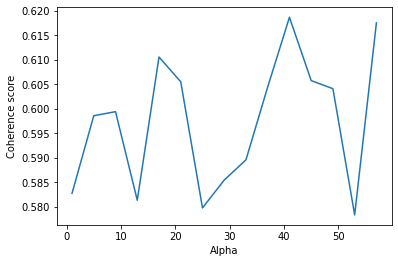

In [18]:
# Show graph
limit=60; start=1; step=4;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Alpha")
plt.ylabel("Coherence score")
#plt.savefig('20240221_PhD_MalletLDALtr-Coherence')
plt.show()

In [19]:
# Print the coherence and perplexity scores
for m, cv in zip(x, coherence_values):
    print("Alpha =", m, 'Coherence: ', round(cv, 4))

Alpha = 1 Coherence:  0.5827
Alpha = 5 Coherence:  0.5986
Alpha = 9 Coherence:  0.5994
Alpha = 13 Coherence:  0.5813
Alpha = 17 Coherence:  0.6105
Alpha = 21 Coherence:  0.6055
Alpha = 25 Coherence:  0.5797
Alpha = 29 Coherence:  0.5854
Alpha = 33 Coherence:  0.5895
Alpha = 37 Coherence:  0.6044
Alpha = 41 Coherence:  0.6187
Alpha = 45 Coherence:  0.6057
Alpha = 49 Coherence:  0.6041
Alpha = 53 Coherence:  0.5783
Alpha = 57 Coherence:  0.6175


In [20]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, 
                                                        corpus=corpus, 
                                                        texts=data, 
                                                        start=40, 
                                                        limit=51, 
                                                        step=1)

Mallet LDA: 11 topics, 4 topic bits, 1111 topic mask
Data loaded.
max tokens: 93
total tokens: 56712
<10> LL/token: -8.4413
<20> LL/token: -7.78809
<30> LL/token: -7.53499
<40> LL/token: -7.41415

0	3.63636	cook bread wash set work bring finish tonight clean today clothe send tom breakfast mesurier wind washing dress begin black 
1	3.63636	horse start boy buggy rain water road mile sheep fear man stay drink sand travel drive black light harness hour 
2	3.63636	letter write town read wheat buy mill hear flour oclock meet pound offer ayre home sale party walter price ton 
3	3.63636	breakfast tom room thing station bay dress bath stay rest eat put wash cup clock place mail weather today thunder 
4	3.63636	send put bring find work talk hour hold yesterday point board year report gun dog suppose note side glyde answer 
5	3.63636	office agree question club speak motion meeting dine matter business blyth bill remain return receive vote rise member move wife 
6	3.63636	port pound town train ba

<310> LL/token: -7.12788
<320> LL/token: -7.12703
<330> LL/token: -7.12806
<340> LL/token: -7.11357

0	3.63636	cook work wash bread breakfast set finish dress clean clothe tonight lot bring cake begin catch mesurier iron washing black 
1	3.63636	horse boy start water buggy road mile sand sheep station fear pack camp travel rest fire lead wait thunder supper 
2	3.63636	letter write read wheat buy mill flour pound home oclock hear speak offer order office meet town sale price ton 
3	3.63636	tom today bay mail child breakfast bring stay thing eat cup sleep turn clock vessel tonight cut wash room scrub 
4	3.63636	call send find pass bring talk return put hold part tomorrow year run paper point hour remain note yesterday book 
5	3.63636	agree office question motion govt blyth bill club matter ayre cabinet vote answer member report move treasurer glyde carry ministry 
6	3.63636	port town train pound wife club dine bank rise sell pay land remain attend arrange meeting party connor ship church

<610> LL/token: -7.11762
<620> LL/token: -7.1193
<630> LL/token: -7.12317
<640> LL/token: -7.11143

0	3.63636	cook work bread finish breakfast wash dress set clean clothe catch tonight fish mesurier black lot iron washing job kitchen 
1	3.63636	horse start boy road water thing mile buggy station sand fear pack camp rest travel scrub supper harness mare head 
2	3.63636	letter write pound wheat read buy flour sell wife mill town oclock connor home bank hear offer speak meet rise 
3	3.63636	today tom mail bay child stay bring man breakfast wash tonight cup vessel change eat rest drink room turn care 
4	3.63636	send call find place put bring return tomorrow write pass part run hope letter hour point fellow note die year 
5	3.63636	agree office question motion govt blyth bill club ayre matter cabinet vote answer member report move treasurer glyde notice join 
6	3.63636	port town train club dine remain pound pay receive meeting land party attend church return lose ship account bank year 
7	3

<910> LL/token: -7.09953
<920> LL/token: -7.10282
<930> LL/token: -7.11481
<940> LL/token: -7.11251

0	3.63636	cook work wash bread finish set dress breakfast clothe catch lot tonight clean mesurier fish iron washing begin job today 
1	3.63636	horse boy start road buggy station mile water sand thing fire pack camp scrub travel rest ride sheep fear black 
2	3.63636	letter wheat read write pound wife flour buy sell hear connor mill oclock arrange offer order speak sale walter price 
3	3.63636	tom today mail bay child bring stay breakfast sleep drink tonight man turn wash room clock cup eat rest vessel 
4	3.63636	send find call return place bring put write tomorrow pass point year hope letter note part thing hour remain run 
5	3.63636	office agree question motion govt blyth club matter bill ayre business cabinet dine vote member report answer move treasurer join 
6	3.63636	port town train club pound dine pay remain receive meeting land attend party church bank call ship settle account mid

<210> LL/token: -7.13384
<220> LL/token: -7.14231
<230> LL/token: -7.132
<240> LL/token: -7.13363

0	3.72727	cook wash bread work tonight finish set afternoon today breakfast dress clothe catch clean tom fish mesurier iron lot washing 
1	3.72727	ride garden dress child home stay fall polly sit mama row turn part hour papa dick life poll hope willie 
2	3.72727	call read drive miss hear home talk arrive town church find meet lunch friend spend return hand expect wine pass 
3	3.72727	mail boy thing tom bay breakfast rest stay head arrive sand cup eat find supper scrub pack bring lead water 
4	3.72727	office agree question motion govt bill return cabinet vote answer member report carry move treasurer glyde matter paper ministry genl 
5	3.72727	port town train club pound remain bank dine sell rise speak pay connor land attend party meet meeting receive read 
6	3.72727	sleep man room weather breakfast put call bath change water send beach clock lie sea cut board tomorrow enjoy heat 
7	3.7272

<510> LL/token: -7.11633
<520> LL/token: -7.10945
<530> LL/token: -7.10886
<540> LL/token: -7.1112

0	3.72727	cook wash work finish bread set breakfast dress today clean lot clothe catch begin tonight fish mesurier cake iron afternoon 
1	3.72727	dress sit home child polly garden stay row mama turn return run ride flower papa hope deal dick poll willie 
2	3.72727	call read drive talk miss hear church home town hour play friend meet arrive spend pass find hand lunch expect 
3	3.72727	tom mail bay fire thing breakfast water rest boy bring head sand eat cup arrive black supper scrub light place 
4	3.72727	agree office question motion govt bill carry cabinet club vote answer member report move treasurer glyde ministry genl govr blyth 
5	3.72727	port pound town train club bank dine pay remain rise receive return land sell speak meet attend sale ship settle 
6	3.72727	sleep man find room put thing breakfast change weather bath tomorrow fellow dust board fear cut lunch heat wash bottle 
7	3.72

<810> LL/token: -7.09009
<820> LL/token: -7.10107
<830> LL/token: -7.10329
<840> LL/token: -7.09767

0	3.72727	cook wash bread breakfast finish set work tonight afternoon today clean clothe catch dress lot fish mesurier iron washing job 
1	3.72727	dress child sit home polly garden row stay turn mama ride deal papa dick poll hope willie fall flower buggy 
2	3.72727	call drive read talk miss meet hear church arrive home find friend expect town pass spend stand place lunch lady 
3	3.72727	tom thing bay mail fire bring water black rest head place arrive sand sheep eat boy cup hour supper scrub 
4	3.72727	agree question motion office govt bill cabinet club vote answer member report carry move treasurer glyde intend ministry matter genl 
5	3.72727	port pound town train club bank pay receive rise meeting land return attend oclock dine ship whist party sell midnight 
6	3.72727	sleep man find room put weather thing bath breakfast home change fear fellow sea dust enjoy board heat telegraph lose 

<110> LL/token: -7.19682
<120> LL/token: -7.18884
<130> LL/token: -7.16768
<140> LL/token: -7.15789

0	3.81818	cook wash bread breakfast tom dress black clean clothe mail set cake tonight thing today fish mesurier iron bay cup 
1	3.81818	rain water man road fire station drive rest room boy fear tom child wind stay bay shower sheep bring tank 
2	3.81818	stop afternoon home truck boat shoot week mill work thing oclock preach pay game chapel find lend river gun dog 
3	3.81818	send put return weather home hand arrive find hold vessel lunch point hour dust run mail telegraph beat sea lay 
4	3.81818	office agree question speak motion govt bill ayre cabinet vote answer member report whist move join treasurer glyde oclock state 
5	3.81818	port pound town club wheat train dine bank flour sell read buy connor mill pay blyth rise land remain arrange 
6	3.81818	letter write wife call hear man meet year board receive people arrive return room home pass miss note school midnight 
7	3.81818	horse sta

<410> LL/token: -7.11061
<420> LL/token: -7.11053
<430> LL/token: -7.10701
<440> LL/token: -7.10985

0	3.81818	cook wash bread breakfast set dress thing black clothe mail tom clean tonight mesurier fish begin iron washing job kitchen 
1	3.81818	rain water fire road rest bay man drive thing shower station fear wind tom room bring lie sit cup care 
2	3.81818	work afternoon stop truck boat home shoot week mill thing preach oclock wood game pay play chapel expect today gun 
3	3.81818	find home send arrive put return part hand hold run lunch remain hour point vessel lose break weather place sea 
4	3.81818	office agree question motion govt blyth matter bill business ayre club cabinet answer vote member report join treasurer glyde notice 
5	3.81818	port town pound train wheat club read dine bank flour buy sell mill connor pay rise land arrange remain offer 
6	3.81818	letter write call wife hear miss year board meet mail pass note hope return settle state receive people midnight morrow 
7	3.81

<710> LL/token: -7.10337
<720> LL/token: -7.11376
<730> LL/token: -7.10592
<740> LL/token: -7.09917

0	3.81818	cook wash breakfast bread set dress tonight clean tom clothe mail fish mesurier iron washing black finish job kitchen bay 
1	3.81818	rain thing fire rest boy drive water wind shower cut bring fear hour lie room light man care gather tank 
2	3.81818	work stop home afternoon truck boat shoot week mill pay thing preach wood game chapel start oclock buy load hear 
3	3.81818	send find put home place return lunch part arrive board hold pass run man remain vessel lose hand point fellow 
4	3.81818	office agree question motion govt blyth club matter bill business ayre cabinet vote answer member report treasurer join glyde notice 
5	3.81818	port town pound train wheat club bank dine flour sell mill connor buy land pay party remain arrange speak offer 
6	3.81818	letter write call hear wife read year mail return weather note rise settle meet hope drive expect state midnight receive 
7	3.8

Mallet LDA: 11 topics, 4 topic bits, 1111 topic mask
Data loaded.
max tokens: 93
total tokens: 56712
<10> LL/token: -8.42841
<20> LL/token: -7.77561
<30> LL/token: -7.52845
<40> LL/token: -7.41521

0	3.90909	wash cook set tonight wind mail clean weather clothe bay catch finish dress today sheep rain fish black work iron 
1	3.90909	read drive hour man rain arrive hear write dick party mail find send part meet room pick sea propose north 
2	3.90909	child dress garden stay turn ride polly drive row mama papa lend deal buggy willie bring cold show home son 
3	3.90909	breakfast bread thing bring tom send today cook put room mesurier work washing fire bath sleep lot meat clock vessel 
4	3.90909	work home stop thing truck boat shoot week mill afternoon preach hear play game chapel river find oclock gun beach 
5	3.90909	port town pound letter train wife pay write connor mill church read bank land dine rise receive club wheat sale 
6	3.90909	office agree bill question motion govt blyth matter b

<310> LL/token: -7.14527
<320> LL/token: -7.13766
<330> LL/token: -7.14495
<340> LL/token: -7.13819

0	3.90909	wash work cook finish clean dress clothe catch wind bath set begin fish iron bread bay black afternoon job kitchen 
1	3.90909	man arrive room find meet sleep people hear lunch drive part pass write note mail year tomorrow lady fear expect 
2	3.90909	child garden home dress stay read polly friend row mama turn town flower papa talk dick poll willie deal life 
3	3.90909	bring breakfast tom today tonight thing mail lot bread cake cook mesurier fire washing sleep clock hand trouble head meat 
4	3.90909	work stop afternoon home truck thing boat today shoot week hear start preach game chapel mill river find load kill 
5	3.90909	port town pound train wife mill pay rise letter land church order receive party sell connor ship price account board 
6	3.90909	agree question motion govt office bill carry cabinet return vote answer member report matter move treasurer glyde business intend m

<610> LL/token: -7.11659
<620> LL/token: -7.11078
<630> LL/token: -7.11356
<640> LL/token: -7.10598

0	3.90909	wash cook finish dress bread today work afternoon clothe catch clean black fish iron washing set job mesurier kitchen bath 
1	3.90909	man find sleep arrive room meet people hear fear lunch letter write bath pass mail breakfast year lady part expect 
2	3.90909	home read talk child dress stay polly garden turn row mama flower friend sit papa dick town ride poll deal 
3	3.90909	bring breakfast thing tonight tom lot today work mail fire cook cake hand set eat trouble meat head stay trip 
4	3.90909	work stop afternoon thing truck boat shoot week today mill home preach game wood pay chapel start clock gun dog 
5	3.90909	port town pound train wife rise mill pay dine land church letter receive board ship walter order price attend bank 
6	3.90909	agree question motion govt bill return cabinet carry vote office member report answer move treasurer lose glyde ministry club matter 
7	3.909

<910> LL/token: -7.11666
<920> LL/token: -7.12111
<930> LL/token: -7.13095
<940> LL/token: -7.13511

0	3.90909	cook wash work finish bread dress clothe catch clean mesurier fish begin afternoon iron black washing bath bay job today 
1	3.90909	man find arrive sleep room meet people hear fear write mail letter bath breakfast expect lunch return lady part visit 
2	3.90909	read dress child polly garden turn home stay row mama town flower ride papa dick poll hour willie church friend 
3	3.90909	breakfast bring thing today tonight lot tom child mail hand set work send cake trouble drink sleep head stay meat 
4	3.90909	work afternoon stop home truck boat shoot week mill thing today preach wood game start chapel half find oclock load 
5	3.90909	port pound town train wife letter mill pay land dine remain order rise receive church meeting ship walter settle attend 
6	3.90909	question agree office motion govt bill cabinet vote answer member report carry move treasurer glyde pass intend matter min

<210> LL/token: -7.14148
<220> LL/token: -7.15133
<230> LL/token: -7.14519
<240> LL/token: -7.14472

0	4	today tom bring bay breakfast mail wash send sleep room weather iron child finish vessel work job girl people put 
1	4	horse start boy breakfast road water station mile man sand stay cup buggy drink fear pack camp woman eat travel 
2	4	read drive call miss town church lunch friend pass row spend arrange hour party board hope paper wine visit bill 
3	4	cook bread tonight work set wash afternoon dress clothe catch breakfast begin weather finish fish mesurier clean lot black bath 
4	4	find hear call arrive home sleep send expect tomorrow talk boat meet shower people oclock return fellow lend point thing 
5	4	office agree question motion govt meeting blyth club ayre cabinet lose matter bill vote answer member report move treasurer glyde 
6	4	port pound town train wheat club bank dine flour sell connor mill rise receive land pay sale walter price ton 
7	4	work afternoon stop home truck t

<510> LL/token: -7.10004
<520> LL/token: -7.10052
<530> LL/token: -7.09991
<540> LL/token: -7.09889

0	4	today tom breakfast bay sleep wind bring room finish child mail iron girl blow wash change job clock rest lie 
1	4	horse start boy road station mile water breakfast sand buggy eat drink stay pack rest supper camp travel head lead 
2	4	drive read call miss talk town church lunch hour friend spend party lady wine school visit family book enjoy estrange 
3	4	cook bread work wash tonight set breakfast dress clothe clean catch weather begin black thing fish afternoon mesurier finish bath 
4	4	find man meet hear arrive home people call sleep place tomorrow year point fall fellow expect month sea die heat 
5	4	office agree question motion govt club blyth meeting matter ayre bill cabinet vote answer member report carry treasurer glyde notice 
6	4	port pound town train wheat bank club flour dine sell pay buy connor mill rise land arrange oclock speak sale 
7	4	work home stop afternoon truck 

<810> LL/token: -7.09212
<820> LL/token: -7.10009
<830> LL/token: -7.10053
<840> LL/token: -7.10434

0	4	today breakfast tom bring wind bay mail wash child weather stay iron girl job thing blow sleep change cup rest 
1	4	horse start boy water road station mile sand buggy eat drink black rest wait fear pack breakfast camp travel lead 
2	4	drive call read talk miss meet town church friend spend hour pass stand home lady lunch wine party play estrange 
3	4	cook work bread wash dress finish afternoon tonight set clean breakfast catch clothe bath weather fish lot mesurier washing hand 
4	4	find man sleep arrive hear people home room tomorrow year meet expect place fall fellow return lend month beach die 
5	4	office agree club question motion govt blyth matter bill ayre cabinet speak vote answer member report move treasurer glyde join 
6	4	port pound town train wheat bank dine flour sell club buy connor mill pay meeting land rise oclock arrange offer 
7	4	work afternoon stop home truck boat 

<110> LL/token: -7.2335
<120> LL/token: -7.22481
<130> LL/token: -7.20001
<140> LL/token: -7.19609

0	4.09091	cook bread tonight work breakfast set tom wash afternoon finish clean clothe bring today lot black fish mesurier send washing 
1	4.09091	call home read find hear letter hope drive hold ride town rain stand fall hour miss lunch write school part 
2	4.09091	child drive find tomorrow return polly afternoon home expect friend row mama meet arrive spend fellow dick lady stay family 
3	4.09091	man sleep room mail place arrive send put weather people fear pass change bath meet store vessel eat write drink 
4	4.09091	dress bring garden turn miss stay begin put shower send talk girl thing flower play yesterday papa trouble deal iron 
5	4.09091	port club remain dine town church rise motion read land lose attend train wife ship vote whist move treasurer account 
6	4.09091	office call bill question agree return talk paper govt send cabinet note answer receive member report write glyde year

<410> LL/token: -7.12752
<420> LL/token: -7.1267
<430> LL/token: -7.12674
<440> LL/token: -7.11948

0	4.09091	cook work bread wash tonight finish set afternoon breakfast dress clean today clothe mesurier fish iron washing job kitchen meat 
1	4.09091	call find home letter hear read write hope drive fall hour ride part people stand miss year lunch sleep note 
2	4.09091	drive child dress return stay miss polly home friend row mama run talk papa dick lady poll family willie door 
3	4.09091	man sleep arrive room mail place breakfast weather meet bath vessel people send drink board change eat store telegraph break 
4	4.09091	send bring put thing turn play buggy garden begin lot sit trouble talk deal tomorrow flower fellow cold beat point 
5	4.09091	port remain read rise church town lose motion train receive land club attend wife speak ship account move midnight notice 
6	4.09091	office agree question govt bill return matter carry dine paper cabinet blyth answer vote member report treasurer g

<710> LL/token: -7.10772
<720> LL/token: -7.11138
<730> LL/token: -7.11714
<740> LL/token: -7.11143

0	4.09091	cook work wash bread tonight afternoon set finish dress breakfast clean clothe today catch bath fish mesurier tom iron washing 
1	4.09091	call find drive miss hear return home read letter write lunch hope people friend part ride lady stand fall estrange 
2	4.09091	home talk dress polly row drive mama sit stay garden ride papa pass dick poll church willie town door life 
3	4.09091	man sleep breakfast mail arrive room place change bay weather tom vessel bath people drink beach send meet telegraph sister 
4	4.09091	send bring child put turn play thing find tomorrow lot deal buggy trouble run stay fellow flower cold trip finish 
5	4.09091	port town remain read rise lose club train dine party meeting wife land attend receive church year ship month midnight 
6	4.09091	agree office question motion govt bill carry cabinet blyth vote answer member report matter treasurer move glyde min

Mallet LDA: 11 topics, 4 topic bits, 1111 topic mask
Data loaded.
max tokens: 93
total tokens: 56712
<10> LL/token: -8.43008
<20> LL/token: -7.81892
<30> LL/token: -7.57715
<40> LL/token: -7.45135

0	4.18182	tom today wind set tonight wash cook black bay water weather bread job scrub blow bring mesurier change iron work 
1	4.18182	horse start boy garden road mile buggy turn water hour drink rest sand drive flower side camp travel stay lead 
2	4.18182	afternoon finish breakfast cook today work bread clean bath wash clothe clock catch begin fish lot thing washing send cake 
3	4.18182	dress child send stay work put bring room afternoon arrive thing eat mail breakfast sea supper people store weather expect 
4	4.18182	sleep man thing find rain station hand send fire head wind cup bring breakfast hold weather child place north feed 
5	4.18182	club wife office bank port town sell remain wheat read connor flour meeting train matter arrange speak offer motion rise 
6	4.18182	letter port pound w

<310> LL/token: -7.13133
<320> LL/token: -7.12648
<330> LL/token: -7.1243
<340> LL/token: -7.12389

0	4.18182	today tom wind tonight bring weather bay black lot water set blow job drink vessel trouble dust yesterday sheep sleep 
1	4.18182	horse start boy road buggy station mile water sand drive fire rest breakfast camp travel mother pack hour lead harness 
2	4.18182	cook breakfast wash bread finish afternoon dress work clean clothe catch begin bath cake fish iron set washing kitchen clock 
3	4.18182	send child stay mail bring arrive letter work afternoon home store supper fellow feed eat sea hour bird note girl 
4	4.18182	man sleep put find room thing send hand breakfast head hold cup lie weather bath change heat wind telegraph back 
5	4.18182	port town club letter write train wife wheat dine bank flour buy sell remain connor mill office rise blyth read 
6	4.18182	pound agree question motion govt land bill office business cabinet return answer member report matter move treasurer oclock

<610> LL/token: -7.11237
<620> LL/token: -7.1045
<630> LL/token: -7.10753
<640> LL/token: -7.10292

0	4.18182	today wind bay tom weather black tonight wash change bring blow water vessel job lot fear sea set dust drink 
1	4.18182	horse start water boy fire road mile station buggy sand tom breakfast pack camp travel lead scrub rest light mother 
2	4.18182	cook finish bread breakfast dress wash work clean clothe catch afternoon set fish iron washing mesurier beach bath begin lot 
3	4.18182	send bring mail child home work letter write stay arrive afternoon turn eat fellow feed bird girl note cold lay 
4	4.18182	sleep man thing put room find breakfast head hand bath cup lie hold people rest supper heat pair back baby 
5	4.18182	port town letter train wife wheat club write bank flour sell dine buy read connor remain mill rise meeting arrange 
6	4.18182	pound agree office question motion govt bill club business matter cabinet dine vote member report answer blyth move treasurer return 
7	4.18

<910> LL/token: -7.10187
<920> LL/token: -7.09581
<930> LL/token: -7.10121
<940> LL/token: -7.09888

0	4.18182	today wind bring bay tom lot weather black change tonight blow vessel job drink fear wash water dust telegraph sea 
1	4.18182	horse start water boy road station mile fire buggy tom rest sand pack breakfast camp cup travel scrub mother woman 
2	4.18182	cook wash bread breakfast finish set work dress afternoon clothe catch clean fish iron washing begin tonight kitchen meat cake 
3	4.18182	send letter mail child bring write arrive return work stay afternoon girl note buggy home tomorrow cold fellow bird hour 
4	4.18182	sleep man put thing room breakfast find hand weather head bath people store lie hold noon pain rest lay heat 
5	4.18182	port town pound train wheat write club bank flour letter dine wife sell connor buy pay land mill attend offer 
6	4.18182	office agree question motion govt blyth club matter bill ayre business cabinet vote answer member report move treasurer speak 

<210> LL/token: -7.13597
<220> LL/token: -7.14605
<230> LL/token: -7.13537
<240> LL/token: -7.13982

0	4.27273	cook wash bread tonight work set bring breakfast today clothe lot weather send catch fish iron washing kitchen shower tom 
1	4.27273	horse start stay boy road station water mile buggy fear girl scrub meet bring camp woman drink travel lead mother 
2	4.27273	afternoon finish bath dress breakfast mail clean hand begin cake tom turn bay eat room job people clock thing beach 
3	4.27273	agree question motion govt office matter business cabinet vote answer member report carry move bill treasurer glyde blyth return genl 
4	4.27273	man wind thing put rain fire bring black water weather blow today tom bay find light change pack cut dust 
5	4.27273	call read hear talk drive hope church year friend people expect note write party stand paper family lunch estrange mail 
6	4.27273	send sleep find place arrive rain ride home breakfast child hour run room store point vessel play oclock hold f

<510> LL/token: -7.10795
<520> LL/token: -7.10237
<530> LL/token: -7.10535
<540> LL/token: -7.10502

0	4.27273	cook wash bread tonight bring breakfast set lot today tom clothe catch send mesurier fish iron washing weather work kitchen 
1	4.27273	horse start boy road station mile breakfast meet water stay supper tom drink pack camp travel arrive rest head buggy 
2	4.27273	afternoon finish mail dress work bath thing clean breakfast begin cake eat hand clock beach job lie meat rest turn 
3	4.27273	agree question motion govt office bill carry cabinet club vote answer member report move treasurer glyde ministry intend genl govr 
4	4.27273	man wind weather bay fire thing water bring today black fear blow put cut change light sea dust rain board 
5	4.27273	call drive hear miss read people talk church tomorrow year friend hope party lunch place stand family expect book estrange 
6	4.27273	send find rain sleep arrive home return put room place hour play pass vessel child note fellow shower wine

<810> LL/token: -7.09486
<820> LL/token: -7.09637
<830> LL/token: -7.09818
<840> LL/token: -7.10001

0	4.27273	cook wash bread tonight bring set breakfast lot clean afternoon clothe catch weather work today fish mesurier tom iron washing 
1	4.27273	horse start boy road stay station mile water buggy meet breakfast girl supper drink pack camp sand travel cup mother 
2	4.27273	finish mail work breakfast dress bath room afternoon thing begin cake hand turn clock rest meat eat beach sister sit 
3	4.27273	agree question motion govt office bill cabinet carry vote answer member report move treasurer paper glyde intend ministry genl govr 
4	4.27273	man wind today bay fire thing water bring weather put tom blow change black vessel cut fall fear light sea 
5	4.27273	call drive miss read hear church hope lunch arrive people friend tomorrow expect spend year place stand lady family visit 
6	4.27273	send rain find sleep home put place return play arrive child hour shower pass point fellow part break

<110> LL/token: -7.20343
<120> LL/token: -7.19623
<130> LL/token: -7.18776
<140> LL/token: -7.17495

0	4.36364	cook wash bread set fire tonight boy clothe breakfast black bath sand mesurier fish iron cup today washing job catch 
1	4.36364	stay turn road mile buggy hour ride polly dress home boy row mama child start sit flower papa dick travel 
2	4.36364	work afternoon send bring garden finish thing find lot clock beach sleep store breakfast bath today letter meat ride lend 
3	4.36364	horse man start place people station fear arrive drink breakfast find meet eat rest supper girl pack woman play put 
4	4.36364	send mail wind child bring breakfast bay today sleep weather man change write clean board blow arrive milk dust note 
5	4.36364	office remain agree question motion govt bill return attend lose club carry hear member report meeting whist move treasurer glyde 
6	4.36364	letter town write port train wife connor pound pay mill church paper dine arrange offer cabinet call walter answer 

<410> LL/token: -7.12087
<420> LL/token: -7.1227
<430> LL/token: -7.12018
<440> LL/token: -7.11847

0	4.36364	cook wash bread tonight set boy breakfast today fire clothe bath dress catch mesurier fish sheep iron lot washing black 
1	4.36364	dress stay ride garden home child polly talk sit row mama boy turn hour flower papa dick start poll drive 
2	4.36364	work afternoon send bring breakfast finish sleep clean beach play people trouble find break place turn lot lend clock store 
3	4.36364	horse start road station breakfast mile buggy drink fear stay meet girl man supper wait pack arrive camp people travel 
4	4.36364	man wind mail bay bring send weather child tom today sleep change blow vessel run room board note milk fellow 
5	4.36364	agree office question motion govt bill cabinet carry answer vote member report move treasurer glyde matter ministry genl govr propose 
6	4.36364	town letter write port train wife pound mill pay connor arrange attend dine paper walter ship meeting church mi

<710> LL/token: -7.09616
<720> LL/token: -7.10481
<730> LL/token: -7.11798
<740> LL/token: -7.11037

0	4.36364	cook wash bread tonight breakfast today set lot dress black clean clothe catch fish mesurier tom iron washing finish job 
1	4.36364	talk stay dress home turn ride garden polly sit row run mama child flower papa dick poll deal buggy life 
2	4.36364	send work afternoon sleep room find breakfast bring play finish bath beach place trouble part clock hope write put store 
3	4.36364	horse start road station mile stay boy buggy sand arrive tom girl water breakfast wait pack camp travel man drink 
4	4.36364	wind man bring mail child weather bay send today change blow vessel fear fellow sea dust sleep lose board bird 
5	4.36364	agree question motion govt office bill matter cabinet lose carry vote answer blyth member report treasurer glyde notice move ministry 
6	4.36364	letter town write port train wife mill pound pay arrange order connor dine remain ship meeting settle walter church a

Mallet LDA: 11 topics, 4 topic bits, 1111 topic mask
Data loaded.
max tokens: 93
total tokens: 56712
<10> LL/token: -8.47262
<20> LL/token: -7.83412
<30> LL/token: -7.57311
<40> LL/token: -7.4467

0	4.45455	cook wash tom bread today tonight set wind breakfast clean bay clothe black catch sand fish iron cup washing weather 
1	4.45455	dress boy garden mile turn drive mama rain child rest weather man lend arrive hour wait thunder tank breakfast pick 
2	4.45455	work afternoon sleep bring breakfast rain clock finish play today change preach begin shower send wind weather chapel break cut 
3	4.45455	letter hear arrive call return write man hour miss find expect year weather papa sleep read remain put part lunch 
4	4.45455	call send bill question return govt hold motion pass carry noon cabinet agree answer report treasurer glyde intend state receive 
5	4.45455	port club town pound office rise bank train lose land party dine arrange agree meet wheat ship walter price ton 
6	4.45455	find drive 

<310> LL/token: -7.13484
<320> LL/token: -7.13519
<330> LL/token: -7.13352
<340> LL/token: -7.12459

0	4.45455	cook wash tom bread today tonight set breakfast clean clothe catch lot fish mesurier iron cake washing wind job kitchen 
1	4.45455	bring rain child thing dress turn boy bay black fire rest supper sheep garden wait thunder hour run mare fellow 
2	4.45455	send work afternoon weather finish wind put rain mail today begin beach hand shower vessel change clock break hope cut 
3	4.45455	call meet arrive return miss hear tomorrow pass part send year home lunch spend note stand expect store write family 
4	4.45455	agree question motion govt office bill cabinet carry vote answer member report paper move treasurer club glyde intend matter ministry 
5	4.45455	port pound town train club bank rise pay party read land oclock meeting remain attend church order lose ship settle 
6	4.45455	man find sleep breakfast room place drive people play stay bath home talk friend lady wine telegraph girl

<610> LL/token: -7.10205
<620> LL/token: -7.1016
<630> LL/token: -7.1039
<640> LL/token: -7.09647

0	4.45455	cook wash bread tonight breakfast set today tom lot clothe catch clean cake mesurier fish iron washing job finish kitchen 
1	4.45455	bring rain thing fire black boy tom bay child sheep turn rest hour supper scrub put light fellow run care 
2	4.45455	send weather work afternoon wind mail put dress finish today begin hand beach change shower blow hope vessel rain clock 
3	4.45455	call meet return home hear find pass arrive tomorrow part friend expect write note stand miss lunch year letter month 
4	4.45455	agree question office motion govt club bill carry cabinet vote answer member report treasurer glyde move intend matter ministry genl 
5	4.45455	port pound town train rise pay receive meeting lose party land oclock attend church dine bank ship order state remain 
6	4.45455	man sleep breakfast room find place people stay drive miss arrive play bath girl fall board lady dust break 

<910> LL/token: -7.09574
<920> LL/token: -7.09909
<930> LL/token: -7.11371
<940> LL/token: -7.11535

0	4.45455	cook wash bread tonight set breakfast lot tom clothe catch clean today cake mesurier fish iron washing job kitchen meat 
1	4.45455	rain thing boy fire bring put black tom bay begin turn supper scrub hour wait light child rest shower care 
2	4.45455	send afternoon weather work wind mail bring today finish dress hand beach change put vessel blow break bay bird dust 
3	4.45455	call meet return home find hear pass miss arrive lunch people friend tomorrow expect part spend year letter mother glass 
4	4.45455	office question agree motion govt bill cabinet club vote member report move business treasurer speak carry glyde intend ministry matter 
5	4.45455	pound port town train pay bank meeting land dine receive oclock attend party order church lose ship board remain settle 
6	4.45455	sleep man breakfast drive room place find stay bath play arrive girl lady miss people lose telegraph h

<210> LL/token: -7.15025
<220> LL/token: -7.15622
<230> LL/token: -7.14605
<240> LL/token: -7.14745

0	4.54545	cook work thing bread bath afternoon clean finish catch breakfast beach lot fish mesurier turn black clock job stay set 
1	4.54545	hear drive read arrive miss people find return home church tomorrow hope lunch part year expect pass stand life midnight 
2	4.54545	ride home call talk dress garden meet polly stay drive friend sit row mama child flower papa dick poll lady 
3	4.54545	man sleep room call place child put find hour thing fall girl rest fellow store care lie door heat clear 
4	4.54545	rain send wind weather bring hand dress put play begin change blow cake trouble break water feed milk lead dust 
5	4.54545	port town club train pound wife bank sell speak party dine blyth meeting land attend ayre order ship settle price 
6	4.54545	letter write wheat remain buy pound flour meet mill pay town connor receive rise read dine oclock arrange call offer 
7	4.54545	horse start boy

<510> LL/token: -7.12402
<520> LL/token: -7.11324
<530> LL/token: -7.11492
<540> LL/token: -7.11471

0	4.54545	cook work bread bath set clean fire catch thing black cake mesurier fish afternoon job kitchen turn meat finish beach 
1	4.54545	call drive hear read miss return find arrive home church tomorrow hope lunch friend part town lose expect stand end 
2	4.54545	stay home talk dress sit polly ride row garden mama run turn hour papa deal dick poll flower willie estrange 
3	4.54545	man sleep room child place people find put girl hour thing change lie fall fear rest glass family care call 
4	4.54545	send rain wind put weather bring thing hand play begin blow water shower trouble feed sleep cut dust yesterday thunder 
5	4.54545	port club train wife remain bank rise speak town year meeting land attend order pound party board receive ship account 
6	4.54545	letter pound write town wheat buy flour pay mill sell connor read dine oclock meet arrange offer port sale walter 
7	4.54545	horse boy

<810> LL/token: -7.08396
<820> LL/token: -7.09544
<830> LL/token: -7.09205
<840> LL/token: -7.1014

0	4.54545	cook bread bath set work thing clean wash catch fire fish mesurier lot dress turn cake job kitchen black clothe 
1	4.54545	call drive miss find meet read hear return home church lunch hope arrive friend pass hour expect tomorrow spend part 
2	4.54545	home ride dress sit talk stay polly child row mama garden flower papa dick deal poll drive turn town buggy 
3	4.54545	man sleep room place thing child people arrive find fear girl rest fellow fall put drink family care supper telegraph 
4	4.54545	send rain weather bring wind put play hand water blow shower trouble change feed dust yesterday break boy note beat 
5	4.54545	port club town train wife remain rise bank party receive meeting land pound attend order speak settle ship year board 
6	4.54545	letter write pound wheat town dine flour buy sell pay mill connor read arrange offer oclock talk paper walter price 
7	4.54545	horse sta

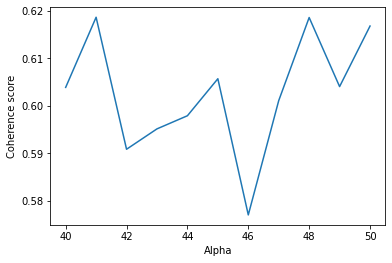

In [29]:
# Show graph
limit=51; start=40; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Alpha")
plt.ylabel("Coherence score")
#plt.savefig('20240221_PhD_MalletLDALtr-Coherence')
plt.show()

In [30]:
# Print the coherence and perplexity scores
for m, cv in zip(x, coherence_values):
    print("Alpha =", m, 'Coherence: ', round(cv, 4))

Alpha = 40 Coherence:  0.6039
Alpha = 41 Coherence:  0.6187
Alpha = 42 Coherence:  0.5909
Alpha = 43 Coherence:  0.5952
Alpha = 44 Coherence:  0.5979
Alpha = 45 Coherence:  0.6057
Alpha = 46 Coherence:  0.5771
Alpha = 47 Coherence:  0.6011
Alpha = 48 Coherence:  0.6186
Alpha = 49 Coherence:  0.6041
Alpha = 50 Coherence:  0.6168


In [42]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, 
                                                        corpus=corpus, 
                                                        texts=data, 
                                                        start=17, 
                                                        limit=40, 
                                                        step=1)

Mallet LDA: 11 topics, 4 topic bits, 1111 topic mask
Data loaded.
max tokens: 93
total tokens: 56712
<10> LL/token: -8.13796
<20> LL/token: -7.58975
<30> LL/token: -7.41154
<40> LL/token: -7.32952

0	1.54545	cook wash today bread wind tonight black dress clothe breakfast set work clean finish tom bay fire catch weather mail 
1	1.54545	work stop today truck shoot afternoon home week mill boat start preach thing chapel gun dog hear aunt half buy 
2	1.54545	pound port letter town wheat dine club flour train mill office connor sell bank buy meet arrange sale price ton 
3	1.54545	call send sand room play put weather find hour fall change treasurer man lady sleep return run breakfast bring meet 
4	1.54545	bring water man breakfast send mile sleep drink rain work shower hand rest find child tom tonight heat kill hold 
5	1.54545	town read call church pay talk meeting find drive hear port return train remain party spend ship doctor lunch morrow 
6	1.54545	agree question motion club govt land of

<310> LL/token: -7.16336
<320> LL/token: -7.16177
<330> LL/token: -7.16007
<340> LL/token: -7.16149

0	1.54545	cook bread breakfast wash work finish today clothe set bath tom dress catch afternoon clean tonight mesurier fish iron mail 
1	1.54545	work stop afternoon truck shoot today home week mill boat chapel start thing game pay gun dog preach aunt hear 
2	1.54545	pound town wheat letter port train write bank flour mill sell buy connor club meet oclock wife office speak party 
3	1.54545	breakfast find room meet play trouble people fall man lady tomorrow call put place run station police glass open mother 
4	1.54545	bring child man today thing water hand tom tonight bay send sleep sit black fire feed head return pain room 
5	1.54545	port remain read call town pay rise dine find club receive church attend drive land meeting board home ride return 
6	1.54545	question motion govt office agree cabinet bill vote member report matter move carry treasurer glyde club blyth ministry answer genl

<610> LL/token: -7.14179
<620> LL/token: -7.14489
<630> LL/token: -7.14042
<640> LL/token: -7.13494

0	1.54545	cook bread breakfast wash work finish dress today tonight clothe afternoon set clean mesurier catch black iron fish washing job 
1	1.54545	work stop afternoon home truck shoot mill today boat week wood thing start chapel pay gun dog preach hear aunt 
2	1.54545	pound town letter wheat write buy flour sell mill wife connor port dine bank meet oclock office read train club 
3	1.54545	breakfast miss man play call people stay meet drink place room trouble lady station find fall eat glass mother run 
4	1.54545	thing child bring today man room water hand tom fire put sleep bay boy head wash fellow begin bath send 
5	1.54545	port town read train pay receive call club land drive rise meeting church lose order attend return ship dine board 
6	1.54545	question agree office motion govt bill cabinet club vote call member report matter return treasurer answer glyde carry ministry move 
7	1.

<910> LL/token: -7.15717
<920> LL/token: -7.15582
<930> LL/token: -7.15603
<940> LL/token: -7.1549

0	1.54545	cook bread wash breakfast finish work afternoon clothe today set dress tonight mail lot clean mesurier catch fish tom iron 
1	1.54545	work stop afternoon truck home shoot today week mill thing boat start chapel preach water play wood gun game dog 
2	1.54545	pound wheat town club letter mill flour sell write connor buy bank dine port meet read speak wife arrange office 
3	1.54545	breakfast meet place drive miss fall people stay man play drink tom home call lady station trouble mother sleep heat 
4	1.54545	child thing man today room sleep put wind bay hand tom tonight bring head sit send boy find water rest 
5	1.54545	port town train pay receive pound land return read church call board meeting ship order attend dine club ride drive 
6	1.54545	office question motion govt agree cabinet send vote member report bill call treasurer move glyde club carry matter genl govr 
7	1.54545	hom

<210> LL/token: -7.1485
<220> LL/token: -7.15247
<230> LL/token: -7.15014
<240> LL/token: -7.14253

0	1.63636	cook work bread wash breakfast tonight today afternoon finish dress clothe bath wind set clean weather fish mesurier catch bring 
1	1.63636	water horse wind boy black tom rain bay head today sand rest start buggy eat sleep thing scrub camp feed 
2	1.63636	port town pound train wheat bank flour letter sell mill pay meet buy land ayre offer arrange receive party ton 
3	1.63636	agree question send office return matter call bill cabinet govt answer report treasurer glyde blyth carry genl propose hold strangeway 
4	1.63636	thing bring child send find put place fire room begin hour set sit break garden hand play clear flower breakfast 
5	1.63636	club read dine wife write connor speak motion rise office remain meeting church sale settle price vote account business whist 
6	1.63636	dress read polly town home drive row mama child talk sit papa stay dick poll garden miss church willie ho

<510> LL/token: -7.11758
<520> LL/token: -7.11772
<530> LL/token: -7.12105
<540> LL/token: -7.11705

0	1.63636	cook bread wash today breakfast finish tom tonight afternoon work dress clothe lot bath clean bring catch wind weather set 
1	1.63636	horse water start boy buggy sand mile thing rest black tom light pack lie camp travel supper eat hour scrub 
2	1.63636	port pound town train wheat flour bank sell buy mill pay letter meet dine land arrange offer sale price ton 
3	1.63636	agree question office motion govt blyth ayre cabinet bill matter vote answer member report return treasurer glyde club ministry genl 
4	1.63636	child thing find work bring fire garden boy put sit place turn rain begin send run set side trouble clear 
5	1.63636	call read club remain write wife rise connor speak dine talk meeting office church hear attend account whist move lunch 
6	1.63636	home drive town read polly dress row mama stay papa talk dick miss poll ride willie call estrange friend show 
7	1.63636	lett

<810> LL/token: -7.11742
<820> LL/token: -7.1331
<830> LL/token: -7.12867
<840> LL/token: -7.12571

0	1.63636	cook today bread breakfast wash tonight work afternoon finish dress tom clothe bath set weather clean mesurier bring iron fish 
1	1.63636	horse start water boy mile rain sand eat thing rest buggy tom black head camp scrub travel fire hour wash 
2	1.63636	town pound port train wheat letter bank flour sell mill pay buy land meet party oclock connor arrange sale walter 
3	1.63636	office question agree motion govt blyth ayre cabinet vote answer club matter member report move treasurer bill glyde ministry genl 
4	1.63636	thing child bring work put fire turn garden buggy find begin place trouble boy sit rain trip deal clear beat 
5	1.63636	call read club remain wife dine rise port write meeting church receive speak attend office settle account hear whist hughe 
6	1.63636	read dress polly town home row mama drive talk sit papa dick hear stay poll call willie ride miss hour 
7	1.63636	

<110> LL/token: -7.21413
<120> LL/token: -7.19857
<130> LL/token: -7.18257
<140> LL/token: -7.17973

0	1.72727	cook bread afternoon breakfast work tonight finish wash dress set clothe clean weather bath catch bring send fish mesurier iron 
1	1.72727	horse water boy road mile meet sand rest buggy hour supper rain stay start girl put camp head travel mother 
2	1.72727	letter write send return home wife hear mail year board remain receive find pass arrive hope afternoon note bath order 
3	1.72727	thing horse tom man today breakfast start bay drink stay station people fear vessel pack hand eat boy fall cup 
4	1.72727	work afternoon stop home truck boat shoot week today mill start wood game pay chapel preach thing sleep half gun 
5	1.72727	port train office club town rise read pay meeting bill lose dine attend church speak treasurer put notice account intend 
6	1.72727	call drive miss place find room sleep rain lunch tomorrow friend breakfast play people man expect talk lady return wine 
7	

<410> LL/token: -7.16485
<420> LL/token: -7.16233
<430> LL/token: -7.15784
<440> LL/token: -7.1605

0	1.72727	cook bread afternoon breakfast finish bath wash set today dress work tonight send weather clean clothe catch tom mesurier fish 
1	1.72727	horse water boy start mile road drive station buggy sand hour supper camp travel fear head rest ride stay tom 
2	1.72727	letter write send home call return afternoon board remain hear wife mail find hope place weather year put note pass 
3	1.72727	thing man today breakfast bay horse tom wash start black lot stay fall people wind lie tonight drink cut trouble 
4	1.72727	work stop afternoon truck shoot week home thing today boat mill wood game chapel find start river pay gun dog 
5	1.72727	port town train pay read rise meeting attend church lose dine call bank speak paper midnight party receive doctor land 
6	1.72727	call find miss meet arrive breakfast drive tomorrow sleep room home talk people lunch play man expect friend stand place 
7	1.727

<710> LL/token: -7.14905
<720> LL/token: -7.15241
<730> LL/token: -7.16175
<740> LL/token: -7.14904

0	1.72727	cook bread work breakfast afternoon finish wash tonight bring send clean set clothe catch bath fish mesurier today iron dress 
1	1.72727	horse start boy mile water road buggy stay drive camp travel head arrive rest tom hour ride fear sand supper 
2	1.72727	send letter write home afternoon call find mail weather remain arrive return hope year board part wife hear note tomorrow 
3	1.72727	today man bay tom wash mail thing wind child black cut change sleep breakfast clock stay drink set tonight dress 
4	1.72727	work stop afternoon truck home shoot today week mill boat wood game chapel pay start preach thing gun dog half 
5	1.72727	port town train pound rise pay land party receive read meeting dine church bank call attend settle drive doctor man 
6	1.72727	call meet breakfast find miss drive lunch place room home people sleep arrive friend play pass return expect talk station 
7	1

Mallet LDA: 11 topics, 4 topic bits, 1111 topic mask
Data loaded.
max tokens: 93
total tokens: 56712
<10> LL/token: -8.17781
<20> LL/token: -7.62653
<30> LL/token: -7.45215
<40> LL/token: -7.36226

0	1.81818	thing work rain bring sleep put set tonight boy water bay send kitchen wind room scrub milk child sea head 
1	1.81818	horse start mile road garden water station buggy fire sand arrive boy rest flower pack camp bring travel turn cup 
2	1.81818	train town pound port office club land dine business cabinet find bank connor whist sell speak notice intend receive board 
3	1.81818	man tom breakfast today weather horse mesurier tonight black beach lot find drink send fear set thing place vessel rain 
4	1.81818	work stop afternoon home truck shoot boat thing today start week find game wood chapel hear river mill play half 
5	1.81818	agree bill question motion carry govt send office report put move treasurer glyde call pass hand tomorrow hour remain lose 
6	1.81818	letter read call home town

<310> LL/token: -7.1608
<320> LL/token: -7.15801
<330> LL/token: -7.16016
<340> LL/token: -7.16037

0	1.81818	rain thing work put child bring sleep girl water shower set boy kitchen room hand turn sit tonight send thunder 
1	1.81818	horse start water road mile boy buggy station breakfast fire supper sand camp travel rest wait cup pack hold harness 
2	1.81818	pound port town train letter pay wife dine bank land attend party receive meeting order hughe sell board account charge 
3	1.81818	bay man today tom send mail bring wind change beach thing vessel breakfast cut stay people dust drink fall play 
4	1.81818	work stop afternoon truck shoot week home today mill thing boat game start chapel load gun wood dog pay expect 
5	1.81818	agree question motion govt office bill cabinet vote answer member report move carry matter treasurer send glyde club paper ministry 
6	1.81818	call drive miss meet read church home lunch talk find tomorrow friend breakfast spend arrive lose lady hear expect schoo

<610> LL/token: -7.15384
<620> LL/token: -7.14687
<630> LL/token: -7.14492
<640> LL/token: -7.13899

0	1.81818	rain thing bring work put child fire shower send hand set kitchen room begin turn wash boy tonight cake cold 
1	1.81818	horse start water boy mile road buggy tom station stay sand black camp travel rest hour cup eat head arrive 
2	1.81818	pound port town train pay receive land dine party attend bank meeting church ship order letter rise charge board affair 
3	1.81818	bay man send wind breakfast today mail weather change sleep tom wash vessel play stay drink bath fall board people 
4	1.81818	work afternoon stop home truck shoot mill week today boat thing wood game chapel start find water pay gun dog 
5	1.81818	agree question motion govt office send bill cabinet club vote member report carry treasurer move glyde answer return ministry call 
6	1.81818	drive call meet miss home talk friend lunch breakfast arrive find expect read hear tomorrow lady spend wine church visit 
7	1.8181

<910> LL/token: -7.15179
<920> LL/token: -7.15254
<930> LL/token: -7.15136
<940> LL/token: -7.15734

0	1.81818	rain thing bring work put child fire send turn shower room begin kitchen set sit cold boy pair light clear 
1	1.81818	horse start water boy mile buggy tom road station cup camp sand rest travel head ride thing arrive eat harness 
2	1.81818	port pound town train pay oclock land meeting order church ship receive board rise attend mill dine bank settle spence 
3	1.81818	bay man breakfast today wind weather change sleep tom send fall mail drink bath wash stay bring play vessel people 
4	1.81818	work stop afternoon truck home shoot week today boat mill start chapel preach find game thing gun dog pay sleep 
5	1.81818	question office agree motion govt cabinet call vote send member report club treasurer move bill glyde ministry answer carry business 
6	1.81818	drive call miss meet home find arrive talk friend breakfast lunch people place pass lady tomorrow visit enjoy stand estrange 


<210> LL/token: -7.14617
<220> LL/token: -7.15703
<230> LL/token: -7.1486
<240> LL/token: -7.15228

0	1.90909	rain thing fire water wind black weather hand head set put fall dress wash bring boy light cut cake shower 
1	1.90909	horse start drive breakfast road mile boy station buggy cup water stay fear rest pack camp bay travel girl hour 
2	1.90909	port town train pound mill read pay rise call arrange offer bank church drive ton price receive buy flour meeting 
3	1.90909	call return send man arrive miss meet find pass tomorrow place bring hold part stand year put hour point talk 
4	1.90909	work stop truck afternoon home boat shoot week mill wood game half chapel thing preach gun dog pay oclock play 
5	1.90909	hear sleep afternoon home send find weather letter expect write beach hope today child place people change family lend enjoy 
6	1.90909	letter write dine club pound wheat wife sell connor remain land bill read flour party sale meet walter bank answer 
7	1.90909	home drive read dre

<510> LL/token: -7.13238
<520> LL/token: -7.13454
<530> LL/token: -7.13993
<540> LL/token: -7.1358

0	1.90909	rain thing fire put water weather hand bring boy fall wind set cut black light head shower man cold pain 
1	1.90909	horse start station road mile boy buggy water stay breakfast tom camp travel drive pack bay ride harness wait cup 
2	1.90909	port town pound train pay rise call receive land dine arrange meeting church order attend mill ship account club return 
3	1.90909	call miss drive arrive man return pass meet find send breakfast lunch place hour play bring stand friend sleep lady 
4	1.90909	work afternoon stop truck boat home shoot week today wood game start mill chapel river preach gun dog pay aunt 
5	1.90909	send find home write sleep afternoon letter thing people hear expect hope year place tomorrow weather child part fear beach 
6	1.90909	letter wheat read write wife buy remain sell connor flour pound club bank office speak party mill dine offer sale 
7	1.90909	home read

<810> LL/token: -7.12475
<820> LL/token: -7.14069
<830> LL/token: -7.13152
<840> LL/token: -7.13124

0	1.90909	rain thing fire put bring wind water set hand head weather cut shower fall light boy sand find cold thunder 
1	1.90909	horse start road station mile boy stay breakfast buggy water pack camp eat travel fear cup wait supper harness tom 
2	1.90909	port town pound train dine pay rise receive land mill read order church meeting ship bank call attend board doctor 
3	1.90909	call arrive drive meet miss room sleep breakfast find play return people lunch man pass place stand lady wine friend 
4	1.90909	work stop afternoon truck home shoot week boat today mill game preach chapel start pay gun dog hear thing oclock 
5	1.90909	send home write find afternoon letter place hope thing weather tomorrow part call hour expect return lend child note change 
6	1.90909	letter wheat write wife flour buy read connor sell club remain office party bank ayre speak blyth sale pound walter 
7	1.90909	home

<110> LL/token: -7.20158
<120> LL/token: -7.19478
<130> LL/token: -7.17851
<140> LL/token: -7.18075

0	2	cook today breakfast tonight bread work afternoon finish weather wash set mail bath wind mesurier fish iron tom washing sleep 
1	2	rain thing room wind wash black tom fire clean head bring sand send put boy scrub kitchen lot hand dress 
2	2	drive home miss read town row mama church dress hear hope call papa dick ride life poll willie family spend 
3	2	question call send office meeting carry motion agree cabinet return answer matter move hold join treasurer glyde genl govr propose 
4	2	home thing boat shoot find play deal side game rain water river polly clock gun book tomorrow die fire put 
5	2	work afternoon stop today truck mill sleep week send preach hear wood pay start chapel load yesterday oclock dog cut 
6	2	club bank rise read meet office pound blyth attend speak bill dine oclock ayre ship vote ton agree party report 
7	2	port town letter write train wife pound wheat flour bu

<410> LL/token: -7.13766
<420> LL/token: -7.14118
<430> LL/token: -7.1355
<440> LL/token: -7.13445

0	2	cook bread breakfast today afternoon wash dress tonight set bath work finish tom clothe lot mesurier fish iron weather mail 
1	2	rain thing wind black fire wash clean shower weather room head scrub boy kitchen put change light tom sand cut 
2	2	drive read home dress miss polly town row mama talk papa dick ride poll garden church willie sit estrange hope 
3	2	agree question motion govt matter call paper cabinet office answer send vote write member report move treasurer glyde ministry genl 
4	2	home thing find play water shoot place deal put boat clock game book rain fall expect gun die lot side 
5	2	work afternoon stop today truck week hear mill start preach yesterday wood sleep chapel pay send load dog aunt bring 
6	2	read club meet pound bank rise office oclock attend party dine ayre pass talk blyth ship receive order board whist 
7	2	port town letter train write wheat wife pound fl

<710> LL/token: -7.12128
<720> LL/token: -7.12632
<730> LL/token: -7.13028
<740> LL/token: -7.11944

0	2	cook breakfast today bread wash tonight afternoon dress bath finish clothe work set tom weather clean bay iron fish lot 
1	2	rain wind thing fire black put sleep blow sand room weather hour shower wash boy scrub rest light lie today 
2	2	read dress home drive polly talk row mama town church papa garden miss dick ride stay poll willie sit call 
3	2	question call agree motion govt office bill cabinet vote member report answer matter treasurer send glyde carry ministry business move 
4	2	home thing find put play place water clock fall beach game side deal run knock kill die boat point lot 
5	2	work afternoon stop truck today shoot week mill pay wood hear chapel buy preach yesterday load gun half start dog 
6	2	club read bank meet rise office dine remain party attend oclock hear receive ayre speak ship blyth whist order pass 
7	2	port town pound letter train wife write flour sell wheat 

Mallet LDA: 11 topics, 4 topic bits, 1111 topic mask
Data loaded.
max tokens: 93
total tokens: 56712
<10> LL/token: -8.25843
<20> LL/token: -7.72302
<30> LL/token: -7.48864
<40> LL/token: -7.39336

0	2.09091	child thing stay polly work afternoon sit ride bake poll change rain store water dick turn buggy put estrange hand 
1	2.09091	bring horse black fire drink mesurier wind start boy today scrub sand camp thing wash put head milk lend rest 
2	2.09091	port pound town train wheat letter flour sell buy bank meet club mill arrange pay ayre offer sale price ton 
3	2.09091	afternoon home put truck send week find people today preach stop thing place yesterday work chapel expect rain letter suppose 
4	2.09091	work sleep mill boat shoot pay bring play point stop lose game half pass river gun dog oclock cut pound 
5	2.09091	call read town church remain hear meeting party return spend rise drive miss port dine order carry hope news doctor 
6	2.09091	office agree wife club dine write question conn

<310> LL/token: -7.13897
<320> LL/token: -7.14063
<330> LL/token: -7.14578
<340> LL/token: -7.13375

0	2.09091	child sit polly home part read turn place tomorrow poll store hope hand flower buggy estrange play find supper garden 
1	2.09091	rain fire bring cook black water boy sand mesurier sheep thing rest wind light eat milk stay meat camp feed 
2	2.09091	port pound town train wheat club bank flour dine mill sell buy pay land meet oclock office ayre arrange year 
3	2.09091	afternoon home find put send thing rain place today truck work lie beach people expect buy finish sea clock deal 
4	2.09091	work stop shoot boat week sleep mill start preach game wood pay chapel river play load gun oclock half dog 
5	2.09091	letter call write read wife return remain hear connor meeting rise drive lose talk attend find settle miss man order 
6	2.09091	agree question office motion govt blyth bill business club matter cabinet vote answer member report move treasurer glyde ministry carry 
7	2.09091	wash

<610> LL/token: -7.11833
<620> LL/token: -7.12162
<630> LL/token: -7.12195
<640> LL/token: -7.11431

0	2.09091	child sit talk call turn run bring room find trouble tomorrow place part year play buggy flower estrange supper hand 
1	2.09091	fire water bring rain black thing stay sand sheep wash boy wind eat hand scrub rest put light milk camp 
2	2.09091	port town pound train wheat club bank flour sell buy mill dine pay oclock land receive party meet arrange sale 
3	2.09091	afternoon home find thing rain send put place work weather beach people finish hope call expect fall enjoy lie buy 
4	2.09091	stop work truck boat shoot week mill today start wood game play pay chapel hear preach gun dog sleep half 
5	2.09091	letter write call wife remain read return hear sleep arrive lose rise church meeting settle walter connor account attend hughe 
6	2.09091	agree office question motion govt blyth club bill matter ayre cabinet vote dine member report answer treasurer move return glyde 
7	2.09091	coo

<910> LL/token: -7.11874
<920> LL/token: -7.12163
<930> LL/token: -7.13058
<940> LL/token: -7.12741

0	2.09091	call child talk sit place bring turn run find buggy flower tomorrow part play hope year trouble glass room side 
1	2.09091	thing fire water boy black rain bring sand sheep head rest wind scrub put light camp feed eat hour stay 
2	2.09091	port town pound train wheat club bank sell mill dine flour buy pay meet land oclock speak rise arrange party 
3	2.09091	afternoon send rain home find thing put weather work place sleep beach fall shower ride people expect finish hope enjoy 
4	2.09091	stop work truck shoot week today home boat mill wood game start chapel preach pay half play gun hear dog 
5	2.09091	letter write read wife call remain hear return connor church settle walter miss account man arrive rise hughe drive news 
6	2.09091	office question agree motion govt blyth club bill matter ayre cabinet vote member report answer treasurer join send glyde move 
7	2.09091	cook wash brea

<210> LL/token: -7.16167
<220> LL/token: -7.16651
<230> LL/token: -7.16026
<240> LL/token: -7.16102

0	2.18182	thing rain bring sleep cake boy hand find supper black scrub meat eat put camp light rest feed trouble head 
1	2.18182	home drive child dress read polly talk garden row mama sit stay ride papa dick poll turn willie hour estrange 
2	2.18182	port town pound wheat train flour buy bank mill sell pay connor land dine arrange wife offer meet letter sale 
3	2.18182	man miss call place room arrive meet play people fall find return afternoon stand lady year sleep lunch run tomorrow 
4	2.18182	wind wash cook finish work clothe lot catch fire today put bread clean breakfast send afternoon begin iron washing dress 
5	2.18182	read club call rise return hear motion party meeting pass attend church remain ayre put town ship carry dine spend 
6	2.18182	office agree question govt matter bill cabinet blyth vote answer member report move send treasurer glyde speak ministry genl business 
7	2.181

<510> LL/token: -7.14387
<520> LL/token: -7.14479
<530> LL/token: -7.14886
<540> LL/token: -7.15208

0	2.18182	rain thing fire put sleep wind boy black bring scrub cake supper rest lie turn cut hour light shower deal 
1	2.18182	home dress talk child polly read row mama town sit ride stay drive papa garden dick poll hour willie estrange 
2	2.18182	pound town port train wheat flour buy sell mill pay letter connor bank write land arrange wife meet dine speak 
3	2.18182	drive call miss man room meet people place arrive play return fall run pass find stand friend lady afternoon lunch 
4	2.18182	cook wash finish bread breakfast wind lot work afternoon clean thing clothe catch today send dress fish iron begin washing 
5	2.18182	read club remain call rise return meeting party attend hear dine church ayre port talk account ship noon whist board 
6	2.18182	office agree question motion govt bill cabinet matter vote answer member report treasurer glyde blyth ministry move carry genl govr 
7	2.1818

<810> LL/token: -7.15074
<820> LL/token: -7.15842
<830> LL/token: -7.15454
<840> LL/token: -7.15864

0	2.18182	rain thing fire put boy wind bring shower black cut scrub find begin light rest lie hour thunder care tank 
1	2.18182	read home dress child polly talk stay row mama town sit garden ride papa drive dick hour poll willie estrange 
2	2.18182	town pound port train wheat letter flour buy sell mill pay connor wife write land bank arrange receive sale walter 
3	2.18182	call drive miss meet arrive play place people room pass afternoon man find sleep girl stand fall lunch lady friend 
4	2.18182	cook bread wash work finish breakfast wind clothe clean dress catch afternoon send bring lot fish weather thing iron washing 
5	2.18182	club read rise remain call dine port office meeting attend church talk party ayre ship town whist hear board doctor 
6	2.18182	agree question motion govt office bill cabinet vote answer blyth member report treasurer matter move glyde speak ministry carry genl 
7

<110> LL/token: -7.16309
<120> LL/token: -7.15639
<130> LL/token: -7.14302
<140> LL/token: -7.12939

0	2.27273	cook work wash bread today tonight finish breakfast set wind clothe clean send bring dress lot weather afternoon fish bath 
1	2.27273	work afternoon stop truck shoot week today mill home boat start thing wood pay chapel preach oclock game gun dog 
2	2.27273	drive home town dress polly row mama stay garden ride turn read papa child dick poll hear willie church miss 
3	2.27273	call read place meet miss lunch pass year bath talk bring friend stand carry life move hand suppose play put 
4	2.27273	rain home afternoon send weather drive run shower tomorrow mail ride lose beach deal play hear find bird remain lot 
5	2.27273	port town pound train wheat club dine flour sell rise buy mill remain pay wife read land letter write church 
6	2.27273	office agree question connor motion bank govt club blyth matter bill oclock business ayre cabinet party paper speak vote price 
7	2.27273	thing 

<410> LL/token: -7.10779
<420> LL/token: -7.10559
<430> LL/token: -7.10895
<440> LL/token: -7.10647

0	2.27273	cook wash work bread bring dress breakfast finish tonight clothe today set afternoon bath clean catch tom mesurier fish iron 
1	2.27273	work stop afternoon truck shoot home today week thing mill start wood boat game yesterday chapel preach gun pay dog 
2	2.27273	home dress town polly row mama stay read child drive garden papa dick talk poll sit church ride willie hour 
3	2.27273	call meet hear miss read drive pass lunch place friend talk order expect bath stand year spend people lady play 
4	2.27273	rain send afternoon weather home find shower run beach sleep part play ride remain tomorrow sea lose lend point cold 
5	2.27273	port town pound train wheat club dine buy flour sell mill bank pay connor land oclock rise read remain church 
6	2.27273	office agree question motion govt blyth club speak matter bill business ayre cabinet paper vote answer member report party join 
7	2.27

<710> LL/token: -7.10196
<720> LL/token: -7.09786
<730> LL/token: -7.10564
<740> LL/token: -7.10113

0	2.27273	cook bread wash work breakfast finish dress tonight today clothe bring tom bath clean set wind catch fish afternoon mesurier 
1	2.27273	work stop afternoon truck shoot week thing mill home boat today wood game pay preach chapel buy gun dog oclock 
2	2.27273	dress home polly row town mama stay turn ride sit child garden papa read church dick drive poll willie talk 
3	2.27273	call meet miss drive place people lunch read talk play friend spend expect arrive stand lady bath breakfast hear pass 
4	2.27273	rain send afternoon weather sleep find home bring beach shower part run remain tomorrow bird blow cold beat lend wind 
5	2.27273	port town pound train wheat club bank dine read sell mill flour connor buy pay remain land rise party arrange 
6	2.27273	office agree question motion govt blyth club bill matter ayre cabinet vote answer member report business treasurer move join glyde 
7

Mallet LDA: 11 topics, 4 topic bits, 1111 topic mask
Data loaded.
max tokens: 93
total tokens: 56712
<10> LL/token: -8.22408
<20> LL/token: -7.64555
<30> LL/token: -7.44494
<40> LL/token: -7.34699

0	2.36364	cook wash bread today tonight set breakfast work clean finish tom clothe bring bath wind bay catch fish mesurier dress 
1	2.36364	horse boy fire buggy turn water stay rest mile sand rain hour thing start fear wind camp light bring travel 
2	2.36364	work stop afternoon truck start play shoot home today week mill wood game chapel hear preach gun dog half aunt 
3	2.36364	office agree club question govt call dine motion meeting rise bill matter port answer move member treasurer glyde notice intend 
4	2.36364	lose return send find pass hear man carry cabinet life vote noon state point note write propose genl govr paper 
5	2.36364	thing afternoon put dress child find garden home wind today yesterday board boat fall load rain place vessel die end 
6	2.36364	pound town train bank pay mill 

<310> LL/token: -7.14465
<320> LL/token: -7.14157
<330> LL/token: -7.14412
<340> LL/token: -7.13917

0	2.36364	cook bread tonight wash breakfast tom today bath finish dress clothe work set clean afternoon catch fish mesurier iron washing 
1	2.36364	horse boy fire water start thing buggy mile sand head black scrub light camp travel rest eat set thunder supper 
2	2.36364	work afternoon stop home truck boat shoot week today mill game wood start chapel hear thing preach pay gun dog 
3	2.36364	agree question motion govt bill office cabinet vote answer report matter treasurer member move glyde notice ministry genl govr propose 
4	2.36364	call return place man pass year find lose part carry hand note stand talk fear hear point friend hour noon 
5	2.36364	thing wind afternoon send put child today bring change vessel trouble lot begin wash blow find deal dust water board 
6	2.36364	port town pound train dine flour mill sell pay meet land rise oclock sale ton church meeting ship receive club 
7	

<610> LL/token: -7.13495
<620> LL/token: -7.1283
<630> LL/token: -7.13565
<640> LL/token: -7.12495

0	2.36364	cook bread tonight breakfast wash dress afternoon finish set clothe work today catch clean tom fish mesurier iron bring washing 
1	2.36364	horse boy fire thing water start buggy mile sand tom scrub bring rest head black light camp travel wash cut 
2	2.36364	work stop home afternoon truck shoot week boat today mill wood game chapel play hear preach gun dog thing pay 
3	2.36364	agree question motion govt office bill cabinet club vote member report treasurer carry glyde move answer ministry genl govr matter 
4	2.36364	call return send find man place year hear pass part lose room fear hand noon note stand remain family state 
5	2.36364	wind send put bring thing today child afternoon water sleep blow work vessel trouble change board begin run dust bath 
6	2.36364	port town pound train mill pay receive call meet church land dine oclock bank ship attend meeting sell doctor share 
7	2.

<910> LL/token: -7.14774
<920> LL/token: -7.14046
<930> LL/token: -7.14884
<940> LL/token: -7.15118

0	2.36364	cook bread wash breakfast afternoon finish set tonight dress work clothe catch bath clean lot tom today mesurier fish iron 
1	2.36364	horse boy water start thing fire buggy sand mile head scrub bring light camp cut travel tom rest rain put 
2	2.36364	work afternoon stop home truck shoot week boat mill today wood thing game start chapel preach yesterday gun hear dog 
3	2.36364	question agree motion govt office cabinet vote answer member report bill move call treasurer carry glyde ministry genl club speak 
4	2.36364	call return find place hear pass year man send remain point lose hand sleep noon stand friend room part glass 
5	2.36364	wind thing send today child put bring afternoon blow sleep bay turn change vessel wash trouble dust pain care tonight 
6	2.36364	port pound town train pay meet land oclock receive church bank meeting call ship dine settle board mill attend order 
7

<210> LL/token: -7.16385
<220> LL/token: -7.17159
<230> LL/token: -7.16345
<240> LL/token: -7.16313

0	2.45455	cook wash bread afternoon breakfast finish dress tonight work clothe wind today catch tom lot clean fish mesurier iron washing 
1	2.45455	thing water fire wind rain boy rest head put fear tom sand supper light part place lead hand care gather 
2	2.45455	drive read dress home town miss polly row garden mama call ride papa dick life church stay sit poll child 
3	2.45455	office agree return letter call blyth meeting write bill talk send matter dine oclock pass cabinet question answer join glyde 
4	2.45455	motion govt club lose hear ayre read year vote paper report attend move call treasurer question notice speak ministry carry 
5	2.45455	port town pound train wife wheat letter write club flour bank sell connor buy dine mill pay rise read remain 
6	2.45455	sleep man find call arrive place room send breakfast home letter sea hope weather lady change wine friend hold glass 
7	2.4545

<510> LL/token: -7.13176
<520> LL/token: -7.13962
<530> LL/token: -7.12979
<540> LL/token: -7.12716

0	2.45455	cook wash breakfast bread work dress today finish lot clothe clean catch set afternoon tonight mesurier fish iron washing job 
1	2.45455	thing water rain fire tom boy head wind rest put sand place hour supper scrub man lie find light sleep 
2	2.45455	drive dress town read talk home polly row mama miss stay garden papa church dick poll willie ride hope hour 
3	2.45455	agree write send pass meeting office return matter letter dine party cabinet receive talk answer bill blyth business join intend 
4	2.45455	club motion govt office call read ayre hear question vote member report attend treasurer speak carry remain lose notice move 
5	2.45455	port town pound train wife wheat letter flour sell buy club bank pay read connor mill write dine remain arrange 
6	2.45455	call sleep man find arrive room letter return place people weather home breakfast year tomorrow meet lady wine glass fri

<810> LL/token: -7.12296
<820> LL/token: -7.13456
<830> LL/token: -7.13504
<840> LL/token: -7.14129

0	2.45455	cook breakfast bread wash dress finish clothe work clean today tom afternoon bath catch tonight set lot fish mesurier iron 
1	2.45455	thing rain water fire boy rest wind head sand sleep find hour bring man wash scrub put hand light eat 
2	2.45455	drive read home town polly talk dress row mama miss papa stay church dick child garden poll life willie hear 
3	2.45455	agree question dine office bill send write talk meeting party matter business cabinet receive return answer pass call glyde intend 
4	2.45455	club motion govt office read remain ayre speak lose rise vote member report blyth move year treasurer carry hear ministry 
5	2.45455	port town pound train wheat letter write wife flour sell buy club connor pay mill bank read dine arrange walter 
6	2.45455	call sleep find arrive man letter return place meet room weather expect people hope hear breakfast friend home lady bath 
7	

<110> LL/token: -7.18422
<120> LL/token: -7.1825
<130> LL/token: -7.16948
<140> LL/token: -7.15758

0	2.54545	cook wash bread set today clean wind lot clothe bring tonight put weather black breakfast iron mesurier washing shower tom 
1	2.54545	horse start fire water boy road buggy mile rain thing sand breakfast light rest pack station fear travel camp scrub 
2	2.54545	home read talk polly town child row drive mama garden hear church ride friend papa dick life poll dress call 
3	2.54545	breakfast man mail bay sleep today tom weather child bath wind drink fish eat people tonight wash send lie cup 
4	2.54545	question motion call govt bill agree send talk cabinet vote answer member report carry move glyde state put lose intend 
5	2.54545	work stop afternoon home truck boat shoot week mill today hear preach game pay chapel play thing put gun dog 
6	2.54545	letter write office dine club wife connor remain read blyth matter arrange offer business ayre speak walter price settle account 
7	2.54

<410> LL/token: -7.11979
<420> LL/token: -7.12456
<430> LL/token: -7.12056
<440> LL/token: -7.12775

0	2.54545	cook bread wash set tonight today clothe breakfast clean bring tom wind mesurier fish weather iron lot washing job black 
1	2.54545	horse start water boy mile road station fire buggy sand hour tom thing rest wait pack fear camp breakfast travel 
2	2.54545	home read polly drive town row mama talk ride hear garden dress papa church dick poll child willie sit estrange 
3	2.54545	man mail breakfast bay today bath send sleep child vessel wash tom drink clock lie board rest play tonight sister 
4	2.54545	agree question motion govt call bill office cabinet answer vote club member report move carry treasurer glyde ministry send genl 
5	2.54545	work stop afternoon home truck shoot week boat hear today mill thing game preach chapel play yesterday pay start gun 
6	2.54545	letter write read wife remain club office connor dine blyth arrange speak offer party ayre settle walter account bank

<710> LL/token: -7.12592
<720> LL/token: -7.13252
<730> LL/token: -7.1317
<740> LL/token: -7.13265

0	2.54545	cook bread wash set today tonight clothe breakfast work clean finish fish lot iron wind black mesurier washing kitchen milk 
1	2.54545	horse start boy mile water fire thing rest road buggy head fear sand hour camp supper travel wait station scrub 
2	2.54545	home read drive polly talk row mama ride town hear sit papa church dick garden dress poll call willie life 
3	2.54545	man mail breakfast bay tom today weather sleep child bath arrive clock vessel wash send room change drink board lie 
4	2.54545	agree question motion govt bill office cabinet call vote member report carry treasurer move glyde answer ministry club genl govr 
5	2.54545	work stop truck afternoon boat shoot week home mill start today wood game hear play chapel preach thing pay half 
6	2.54545	letter write read club wife remain office connor dine blyth party speak rise arrange offer ayre business flour wheat year 


Mallet LDA: 11 topics, 4 topic bits, 1111 topic mask
Data loaded.
max tokens: 93
total tokens: 56712
<10> LL/token: -8.37935
<20> LL/token: -7.74841
<30> LL/token: -7.51522
<40> LL/token: -7.39379

0	2.63636	cook wash bread set today tonight clothe breakfast clean finish tom thing dress rain put iron cup washing boy room 
1	2.63636	thing home find hear boat shoot week put water yesterday mill stop letter knock gun suppose aunt die clock today 
2	2.63636	bring send catch child turn fish mesurier work afternoon find hand meat change write breakfast bath weather tomorrow thing hour 
3	2.63636	man breakfast mail tom bay water arrive station stay place sleep bath work today horse drink play sea afternoon send 
4	2.63636	wind send fire rain black sand weather shower thing job child fear milk feed return blow light wait care water 
5	2.63636	port town question pound rise train motion return matter attend offer dine sell lose answer pay member whist move carry 
6	2.63636	club letter pound whea

<310> LL/token: -7.16431
<320> LL/token: -7.16319
<330> LL/token: -7.1648
<340> LL/token: -7.15625

0	2.63636	cook wash bread set today tonight breakfast finish clothe thing cake clean dress begin mesurier iron washing work kitchen meat 
1	2.63636	home today hear thing boat shoot week put work truck stop mill yesterday pay gun river water dog aunt die 
2	2.63636	send bring afternoon work bath lot catch letter write hand fish turn find garden dress tomorrow clock beach note mail 
3	2.63636	breakfast man arrive tom mail bay sleep room people stay today vessel drink put lady eat place weather water rest 
4	2.63636	rain wind thing fire water child black weather bring boy sand shower scrub fear light fall feed dust put part 
5	2.63636	agree question office motion govt bill club matter cabinet return carry vote answer member report treasurer move glyde ministry speak 
6	2.63636	town pound letter port train wheat club bank flour dine mill buy sell connor meet land pay write arrange office 
7	

<610> LL/token: -7.13138
<620> LL/token: -7.12767
<630> LL/token: -7.13351
<640> LL/token: -7.12395

0	2.63636	cook bread wash breakfast today tonight finish dress work set clothe clean fish mesurier iron washing weather begin stay kitchen 
1	2.63636	work stop thing truck today boat shoot week mill hear preach pay game clock chapel home gun dog aunt die 
2	2.63636	send bring afternoon work lot write catch hand beach tomorrow letter bath turn room bird dress yesterday store cold mend 
3	2.63636	man breakfast mail bay people room water arrive sleep weather tom place today vessel put change rest drink eat lady 
4	2.63636	wind rain thing fire boy black water child sand blow tom shower fear wash scrub bring light rest feed dust 
5	2.63636	office agree question motion govt club bill matter blyth cabinet ayre vote member report answer lose dine treasurer glyde move 
6	2.63636	town pound letter port train write wheat bank club flour dine buy sell mill connor wife pay meet offer arrange 
7	2.63

<910> LL/token: -7.11089
<920> LL/token: -7.11406
<930> LL/token: -7.12215
<940> LL/token: -7.11929

0	2.63636	cook wash bread today finish breakfast tonight set dress clothe work weather clean mesurier iron fish washing cake kitchen begin 
1	2.63636	work stop home truck boat afternoon shoot week today mill start thing preach hear pay chapel game gun dog aunt 
2	2.63636	send afternoon bring work hand write letter catch turn return tomorrow beach run bath lot hope yesterday room bird store 
3	2.63636	man breakfast mail room people sleep bay arrive tom today put place lady trouble drink bath eat bring telegraph vessel 
4	2.63636	wind thing rain fire water black sand boy tom shower blow scrub rest find child light man wash dust bay 
5	2.63636	office question agree motion govt blyth club bill matter ayre cabinet vote member report move treasurer answer glyde carry ministry 
6	2.63636	town pound port letter train wheat club bank flour sell write dine mill buy connor meet pay land arrange sa

<210> LL/token: -7.16338
<220> LL/token: -7.16938
<230> LL/token: -7.16781
<240> LL/token: -7.16978

0	2.72727	tom bay today breakfast clothe station wash mail road sleep bring cup washing girl stay wind job man head vessel 
1	2.72727	horse start water boy fire thing mile rain buggy put light rest camp travel drink sand supper lead harness chop 
2	2.72727	work home stop afternoon truck thing boat today shoot week mill wood game chapel pay preach half gun dog aunt 
3	2.72727	afternoon rain wind bath lot set cook work weather catch bring breakfast dress black fish mesurier send beach hand fall 
4	2.72727	send find call return tomorrow afternoon year hour write part lose pass run hear note receive change glass lay hold 
5	2.72727	port pound town wheat train club bank flour buy sell mill dine pay connor wife arrange offer write land home 
6	2.72727	office agree question motion govt blyth club matter bill business cabinet dine vote answer account member report letter move treasurer 
7	2.727

<510> LL/token: -7.14721
<520> LL/token: -7.14889
<530> LL/token: -7.15106
<540> LL/token: -7.15172

0	2.72727	tom bay breakfast today stay bring station sleep girl cup drink boy mail vessel change rest lie supper mother clock 
1	2.72727	horse start water boy rain fire mile buggy road thing sand camp travel pack head put light harness lead chop 
2	2.72727	work stop afternoon home truck boat thing shoot week mill start today wood preach game chapel oclock load pay gun 
3	2.72727	afternoon weather set cook breakfast rain wind wash bath lot dress catch today bread thing mesurier fish washing finish tonight 
4	2.72727	send call return find write tomorrow pass afternoon hear hour part year note point run receive hope wine bring family 
5	2.72727	port town pound train letter wheat bank club wife flour write sell mill pay connor dine buy land arrange speak 
6	2.72727	office agree question motion govt club blyth bill matter ayre cabinet vote answer member report move treasurer glyde business m

<810> LL/token: -7.12488
<820> LL/token: -7.13639
<830> LL/token: -7.13223
<840> LL/token: -7.13356

0	2.72727	tom today breakfast mail bay stay sleep cup child girl eat bring man station clock rest vessel mother wash sister 
1	2.72727	horse start boy water rain thing mile road fire buggy sand pack camp travel drink head black harness fear lead 
2	2.72727	work stop afternoon home truck boat shoot mill week thing today start wood game preach chapel oclock pay gun dog 
3	2.72727	cook bread set afternoon breakfast tonight wash dress finish weather clothe wind lot bath catch fish mesurier rain washing today 
4	2.72727	send call write afternoon find return tomorrow hour part bring hope point pass note year fellow put lose hear glass 
5	2.72727	port town pound train wheat club dine bank letter flour sell buy connor pay mill wife land write oclock receive 
6	2.72727	office agree question motion govt blyth bill matter club ayre cabinet speak vote answer member report move treasurer glyde carry

<110> LL/token: -7.18846
<120> LL/token: -7.18685
<130> LL/token: -7.16949
<140> LL/token: -7.16173

0	2.81818	cook wind tonight bread breakfast tom work set wash black mail weather clothe today fire bath finish fish sheep bay 
1	2.81818	home work hear turn today tomorrow clock fall play people afternoon put stand finish lend hope garden load suppose glass 
2	2.81818	rain man find weather send return write drive letter sleep arrive hand shower expect friend spend bath wind people ride 
3	2.81818	call thing place child put room buggy bring hour send meet sand pass rest run part sea care family telegraph 
4	2.81818	stop afternoon work truck boat shoot start sleep mill find preach thing wood game chapel half pay knock yesterday week 
5	2.81818	town port read train motion remain lose meeting paper land club church arrange attend offer meet ship vote price return 
6	2.81818	office club agree question govt blyth bill matter business ayre cabinet dine rise answer settle carry member report tr

<410> LL/token: -7.14466
<420> LL/token: -7.15252
<430> LL/token: -7.14252
<440> LL/token: -7.14423

0	2.81818	cook work bread tonight set wind tom today wash bring weather clean clothe breakfast begin iron black bath washing kitchen 
1	2.81818	home hear find put send play sleep tomorrow today fall change afternoon turn clock trouble people lend finish glass enjoy 
2	2.81818	man rain arrive find sleep weather return mail write drive letter room shower breakfast bath people fellow hope lady fear 
3	2.81818	thing call place child fire rain hour bring put room sand run rest wind side wait part talk mother family 
4	2.81818	work stop afternoon truck home shoot boat week mill start wood game yesterday chapel thing pay load half preach gun 
5	2.81818	port town train meet pay meeting land dine receive read attend board paper church lose remain pass price ship year 
6	2.81818	office agree question motion govt matter ayre bill cabinet blyth club carry vote answer member report call send treasur

<710> LL/token: -7.13059
<720> LL/token: -7.13821
<730> LL/token: -7.14914
<740> LL/token: -7.14117

0	2.81818	cook work today bread tonight wash set tom clean bring clothe finish wind weather breakfast iron black washing kitchen turn 
1	2.81818	home send play sleep hear find put change fall pass clock run trouble tomorrow man thing people glass telegraph finish 
2	2.81818	man sleep weather arrive find write mail breakfast return letter drive room people shower vessel miss fear hope lady lose 
3	2.81818	rain thing child call place wind fire put bring blow rest sand hour room light side care trip point clear 
4	2.81818	work stop afternoon truck boat shoot week home today mill wood game preach thing chapel pay oclock load yesterday half 
5	2.81818	town port train call meet pay pound receive land remain order read year meeting lunch hear ship dine church settle 
6	2.81818	agree question motion govt office bill call cabinet vote answer member report club treasurer blyth glyde move matter c

Mallet LDA: 11 topics, 4 topic bits, 1111 topic mask
Data loaded.
max tokens: 93
total tokens: 56712
<10> LL/token: -8.35425
<20> LL/token: -7.78214
<30> LL/token: -7.54909
<40> LL/token: -7.41983

0	2.90909	rain bring breakfast thing tom today boy set room black water send tonight put scrub shower mail bay lot light 
1	2.90909	start water mile horse ride stay fire turn polly find rain child garden boy deal put travel river lead mother 
2	2.90909	town port pound train wheat buy flour pay club party bank read mill dine offer meet ayre rise arrange remain 
3	2.90909	man horse wind station fear bay drink cup rest sleep wait pack feed change blow girl breakfast sand care thunder 
4	2.90909	send sleep call bring work play yesterday week find game board mail tomorrow point life lose expect note weather hand 
5	2.90909	office question motion club meeting agree dine call hear vote answer member read move lose blyth treasurer receive remain intend 
6	2.90909	letter write wife sell govt connor p

<310> LL/token: -7.13247
<320> LL/token: -7.13804
<330> LL/token: -7.13747
<340> LL/token: -7.13519

0	2.90909	rain bring tom thing mail today black breakfast begin fire put bay tonight shower room vessel light cut feed pain 
1	2.90909	horse start water boy road mile sand arrive hour fire rest ride camp travel lead turn head mare tank supper 
2	2.90909	port town pound train wheat read club bank flour mill buy sell dine pay meet home rise hear arrange sale 
3	2.90909	man breakfast child drive stay sleep fear station drink miss bay wind girl cup wait home horse wash tom mother 
4	2.90909	send call find sleep weather put bring afternoon return play lose oclock point note hand sea change lend noon beach 
5	2.90909	office agree question motion govt blyth bill call club ayre cabinet vote matter answer member carry move treasurer join glyde 
6	2.90909	letter write wife remain receive land year ship settle walter report board business hughe pass rise office connor arrive employ 
7	2.90909	work

<610> LL/token: -7.11691
<620> LL/token: -7.10335
<630> LL/token: -7.11981
<640> LL/token: -7.10695

0	2.90909	rain bring mail thing fire tom wind black breakfast send room set tonight boy shower today put begin garden cut 
1	2.90909	horse start water boy buggy mile road sand rest hour arrive head eat pack thing camp travel station ride hold 
2	2.90909	port town pound train wheat club flour buy read sell bank mill dine pay offer party connor church oclock sale 
3	2.90909	man breakfast child stay bay today tom drink miss wind wash change girl cup sleep station dust mother cake fear 
4	2.90909	send sleep find weather call put afternoon place return bring work beach lose hope point book lend sea telegraph visit 
5	2.90909	office agree question motion govt blyth club matter ayre cabinet vote member report answer treasurer move join glyde call speak 
6	2.90909	letter write wife remain call receive return land home rise year board ship settle walter bath business hughe state dine 
7	2.90909	

<910> LL/token: -7.14463
<920> LL/token: -7.1374
<930> LL/token: -7.13626
<940> LL/token: -7.14396

0	2.90909	rain thing bring room fire black tonight tom set wind work shower mail send cut put trouble begin garden today 
1	2.90909	horse start water boy buggy mile road sand rest pack camp travel ride station head hold eat harness fear hour 
2	2.90909	port town pound train wheat club bank flour mill sell buy pay read dine oclock offer arrange party connor sale 
3	2.90909	man breakfast child bay stay wind today sleep change miss wash girl tom home drink station dust mother sister board 
4	2.90909	send sleep weather find bring afternoon put place man beach call return work point hope play break lose sea lend 
5	2.90909	office question agree motion govt blyth club matter cabinet vote member report answer move speak bill treasurer dine glyde ayre 
6	2.90909	letter write wife remain call return receive read home mail ship settle walter rise year church hear business hughe board 
7	2.90909	wo

<210> LL/token: -7.16755
<220> LL/token: -7.16285
<230> LL/token: -7.16101
<240> LL/token: -7.16053

0	3	cook wash bread work set finish afternoon breakfast dress today bath clothe weather lot send clean bring wind fish mesurier 
1	3	horse start water road station mile boy rest sand buggy sheep stay girl head arrive drink camp travel cup lead 
2	3	dress garden stay polly child row ride mama home turn read sit papa buggy dick poll flower run cake life 
3	3	tom bring thing man breakfast mail today bay find sleep tonight weather black send hand eat trouble supper feed put 
4	3	work stop afternoon truck home today boat shoot week mill game play hear chapel river bird gun pay dog bring 
5	3	town port pound wheat train club bank flour dine mill sell pay rise meeting land buy sale price ton vote 
6	3	office agree question motion govt blyth club bill matter cabinet business answer member report move carry dine treasurer glyde ministry 
7	3	rain wind afternoon thing fire sleep place cut beach w

<510> LL/token: -7.11898
<520> LL/token: -7.12672
<530> LL/token: -7.12505
<540> LL/token: -7.12036

0	3	cook work bread wash set finish breakfast lot dress clothe clean today catch afternoon tonight begin mesurier fish weather iron 
1	3	horse start boy station mile buggy water road sand rest fear camp pack travel bay head sheep cup harness lead 
2	3	dress stay home ride polly town row garden mama read run turn papa dick poll church deal flower talk child 
3	3	bring tom man mail today weather breakfast send sleep thing bay tonight vessel stay drink clock bath boy board room 
4	3	work stop home afternoon truck boat shoot mill week today hear start wood game preach chapel gun dog pay oclock 
5	3	port town pound train wheat bank flour dine club sell pay mill land rise meeting arrange oclock buy church sale 
6	3	office agree question motion club govt blyth bill matter ayre cabinet vote answer carry member report business treasurer glyde notice 
7	3	rain afternoon thing wind put fire find b

<810> LL/token: -7.10413
<820> LL/token: -7.10883
<830> LL/token: -7.10592
<840> LL/token: -7.11037

0	3	cook work bread wash breakfast finish dress tonight afternoon clothe set clean weather catch fish mesurier iron begin washing lot 
1	3	horse start boy water mile station road bring buggy sand stay head black fear rest pack camp travel supper scrub 
2	3	dress read polly home stay ride town row mama child garden sit talk papa turn dick poll church willie door 
3	3	today man tom bay mail breakfast bring sleep weather wash thing vessel clock eat drink tonight fellow board sister trip 
4	3	work stop afternoon home truck boat shoot week mill today preach game wood chapel pay gun dog hear start aunt 
5	3	port town pound train wheat club bank dine flour sell mill pay land arrange buy connor meeting party rise ship 
6	3	office agree question motion govt blyth bill club matter ayre cabinet vote speak answer member report carry move treasurer glyde 
7	3	rain thing wind put fire afternoon send 

<110> LL/token: -7.18528
<120> LL/token: -7.17283
<130> LL/token: -7.15335
<140> LL/token: -7.15566

0	3.09091	cook tom wash today bread tonight wind set clean clothe lot mail bay iron black breakfast washing child fish kitchen 
1	3.09091	horse boy start water road drive mile buggy fire drink rain bay camp travel station hold lead ride arrive head 
2	3.09091	afternoon rain bring send dress finish work turn hand catch weather cake begin mesurier bath breakfast store shower meat garden 
3	3.09091	thing man stay breakfast put bring fall rest sand fear eat meet girl supper scrub woman water lunch station head 
4	3.09091	hear find afternoon stop home send truck play oclock call lose sleep preach deal yesterday pay put chapel expect river 
5	3.09091	office agree question motion govt blyth meeting bill club paper business ayre cabinet vote answer member report move carry join 
6	3.09091	call sleep room place arrive return find send man people board friend breakfast blow change lady rain part 

<410> LL/token: -7.11937
<420> LL/token: -7.12211
<430> LL/token: -7.11385
<440> LL/token: -7.11779

0	3.09091	cook wash wind bread tonight today mail tom clean clothe lot set bay mesurier iron washing work black job child 
1	3.09091	horse start boy water road buggy mile sand fire bay pack camp travel scrub lead hold ride thunder rain harness 
2	3.09091	bring send breakfast afternoon rain work bath finish dress weather catch hand begin shower fish garden room cut beach set 
3	3.09091	thing breakfast stay man station tom rest fall put girl people cake bring drink fear wait eat woman lie today 
4	3.09091	afternoon home hear find put play send sleep rain weather place tomorrow book expect change oclock lend load yesterday kill 
5	3.09091	office agree question motion govt blyth bill matter club paper business ayre cabinet dine answer vote member report move join 
6	3.09091	call arrive man find drive return sleep place board pass room hour people part trouble child fellow lose hope lady 
7	

<710> LL/token: -7.09891
<720> LL/token: -7.10449
<730> LL/token: -7.11137
<740> LL/token: -7.1034

0	3.09091	cook wash today bread tonight wind tom mail clean lot clothe bay black set mesurier iron weather washing thing kitchen 
1	3.09091	horse boy start water buggy mile fire rest hour sand light pack camp head travel lead scrub hold road thunder 
2	3.09091	bring breakfast work send afternoon dress bath finish catch hand begin fish water cut turn set clock room weather garden 
3	3.09091	child breakfast thing man stay station tom drink fear girl lunch arrive road meet horse wait eat woman miss bring 
4	3.09091	rain send afternoon sleep put find home play weather place wind expect shower change hear book load lend sea beach 
5	3.09091	office agree question motion govt blyth club matter bill ayre cabinet vote answer member report carry dine move treasurer join 
6	3.09091	call return drive arrive man room find people pass sleep place lose board part friend lady vessel tomorrow wine glass 

Mallet LDA: 11 topics, 4 topic bits, 1111 topic mask
Data loaded.
max tokens: 93
total tokens: 56712
<10> LL/token: -8.33984
<20> LL/token: -7.75429
<30> LL/token: -7.52528
<40> LL/token: -7.40202

0	3.18182	cook wash bread tonight set wind today breakfast clean work bring clothe finish black send fish mesurier iron tom bath 
1	3.18182	send put home today afternoon find wind thing boat bring place play side blow hope lend load dust die knock 
2	3.18182	home garden drive talk town stay polly ride row hour mama child dress turn papa sit dick poll lady miss 
3	3.18182	breakfast sleep thing rest station tom people arrive place find put meet man child wait mother girl send eat lie 
4	3.18182	stop work truck shoot mill week hear home preach oclock yesterday game chapel river gun carry treasurer dog suppose glyde 
5	3.18182	town port pound wheat train flour buy bank sell pay club mill wife dine land remain meeting rise read offer 
6	3.18182	office agree club bill question govt motion write bl

<310> LL/token: -7.13031
<320> LL/token: -7.13342
<330> LL/token: -7.13501
<340> LL/token: -7.13052

0	3.18182	cook today wash bread tonight breakfast set bath clothe mail wind clean tom bay fish mesurier iron washing weather kitchen 
1	3.18182	rain put send thing find wind bring afternoon weather place blow shower side fire turn home child fellow change dust 
2	3.18182	home drive town read polly ride row dress mama garden child talk sit papa stay friend dick miss turn poll 
3	3.18182	breakfast arrive tom call miss man stay sleep station room rest girl eat talk meet people place find drink lady 
4	3.18182	work stop home afternoon truck today shoot week hear preach start mill game pay yesterday chapel boat expect load play 
5	3.18182	port town pound train club wheat dine bank flour mill buy sell connor speak remain pay land oclock office arrange 
6	3.18182	agree question office motion govt blyth bill matter ayre cabinet club paper vote answer member report carry move treasurer glyde 
7	

<610> LL/token: -7.10765
<620> LL/token: -7.10239
<630> LL/token: -7.10742
<640> LL/token: -7.10495

0	3.18182	cook today wash bread tonight breakfast mail clothe set clean bath bay tom work weather fish mesurier iron washing milk 
1	3.18182	rain thing put send wind weather find afternoon home blow shower fire place point dust telegraph die trip lay yesterday 
2	3.18182	home drive read talk polly town row mama child ride garden dress papa stay dick poll sit hour miss willie 
3	3.18182	breakfast man meet miss stay arrive station call tom rest room eat people girl sleep friend drink lady mother find 
4	3.18182	stop work afternoon home truck today boat shoot week mill pay game wood preach chapel hear expect load gun dog 
5	3.18182	port town pound train wheat club flour buy dine bank sell mill connor pay oclock arrange offer rise land sale 
6	3.18182	office agree question motion govt blyth club bill matter ayre cabinet vote dine answer member report move treasurer glyde meeting 
7	3.18182	

<910> LL/token: -7.10853
<920> LL/token: -7.1098
<930> LL/token: -7.11218
<940> LL/token: -7.11187

0	3.18182	cook today wash bread breakfast bath tonight clothe mail tom clean set mesurier iron fish washing black bay kitchen weather 
1	3.18182	rain thing weather wind put afternoon find change sleep blow fire home send shower yesterday place point knock telegraph dust 
2	3.18182	home drive town dress polly talk row read mama ride papa dick stay poll miss sit garden friend spend willie 
3	3.18182	breakfast meet stay arrive call child miss station people bay man girl rest tom talk lady woman road mother wait 
4	3.18182	work stop home truck mill today shoot week afternoon boat start hear preach wood game chapel pay gun dog oclock 
5	3.18182	port town pound train wheat club bank flour dine sell buy connor pay mill land arrange party offer oclock rise 
6	3.18182	office question agree motion govt blyth club matter bill ayre cabinet vote member report paper answer move treasurer dine speak 
7

<210> LL/token: -7.15319
<220> LL/token: -7.16597
<230> LL/token: -7.15731
<240> LL/token: -7.15504

0	3.27273	bread tonight cook bring mail breakfast tom stay child head cake today mesurier eat washing clothe set meat drink sheep 
1	3.27273	horse start boy water road station mile breakfast buggy sand tom rest pack camp travel bay wait mother lead thunder 
2	3.27273	home child read dress town stay ride drive polly friend row mama garden church papa dick poll hour school buggy 
3	3.27273	wash work bath breakfast afternoon lot finish cook send dress clean catch today wind begin fish black iron set room 
4	3.27273	stop home work truck afternoon boat shoot week mill preach play wood today game start chapel oclock river pay hear 
5	3.27273	read office call rise club motion govt blyth meeting land port attend matter lose bank order pound member move speak 
6	3.27273	agree question bill party letter business cabinet return send vote answer report dine office treasurer year paper receive pass 

<510> LL/token: -7.12781
<520> LL/token: -7.12606
<530> LL/token: -7.13457
<540> LL/token: -7.1342

0	3.27273	bread mail tom tonight child bring today cook breakfast cake mesurier stay wash bay drink set begin garden meat milk 
1	3.27273	horse start boy water buggy station mile road sand breakfast rest tom bay pack camp travel supper arrive mother wait 
2	3.27273	home stay read dress town polly drive hear sit row child mama ride garden papa dick life poll willie church 
3	3.27273	work afternoon finish cook bath wash dress breakfast wind today clean lot catch send clothe black fish iron set job 
4	3.27273	work stop home afternoon truck boat today shoot week mill preach start wood game play chapel gun dog clock thing 
5	3.27273	read club call port rise remain speak motion bank blyth meeting hear attend lose order land office receive vote carry 
6	3.27273	agree office question bill matter year cabinet party business answer return govt report dine treasurer glyde state genl govr intend 
7	

<810> LL/token: -7.11704
<820> LL/token: -7.12784
<830> LL/token: -7.12322
<840> LL/token: -7.12899

0	3.27273	bring bread tonight today tom mail child cook bay cake set drink head stay meat garden milk eat feed begin 
1	3.27273	horse start boy road station mile water breakfast sand buggy rest tom stay wait supper pack camp travel lead mother 
2	3.27273	read child home town polly dress row ride mama stay drive garden papa church dick poll talk hear willie turn 
3	3.27273	wash breakfast work finish cook dress afternoon bath clothe clean catch lot send weather today fish wind iron black washing 
4	3.27273	work stop afternoon home truck boat shoot today week mill preach game wood start chapel pay hear gun dog kill 
5	3.27273	club call read bank rise speak motion port remain lose meeting receive attend order vote hear move office land notice 
6	3.27273	agree office question bill matter blyth ayre cabinet answer report govt treasurer glyde year join intend dine genl propose charge 
7	3.2727

<110> LL/token: -7.21704
<120> LL/token: -7.20837
<130> LL/token: -7.18736
<140> LL/token: -7.19529

0	3.36364	work afternoon cook set finish tonight breakfast bring send dress wash fire weather catch begin mesurier hand fish washing bath 
1	3.36364	horse start boy water station mile road buggy rest cup drink man room rain pack arrive camp travel lead scrub 
2	3.36364	home dress drive talk polly sit stay hour row mama garden ride hope papa dick poll willie deal buggy estrange 
3	3.36364	wind today bread tom lot wash black breakfast thing cook clean bring bay mail sand weather send eat job vessel 
4	3.36364	office send question return agree bill talk year lose cabinet hear report move speak treasurer noon glyde hold business state 
5	3.36364	afternoon work stop truck home start shoot today week mill preach wood game chapel river half gun dog pay bring 
6	3.36364	pound dine club wife letter write town port remain train flour sell mill connor blyth land oclock offer sale ship 
7	3.36364	t

<410> LL/token: -7.15874
<420> LL/token: -7.16582
<430> LL/token: -7.16138
<440> LL/token: -7.15724

0	3.36364	work afternoon tonight finish send dress cook bath breakfast catch bring wash begin today mesurier fish hand washing meat milk 
1	3.36364	horse start boy water road station mile buggy fire drink tom rest fear pack camp sand travel lead head thunder 
2	3.36364	home dress polly sit drive ride stay row mama garden flower turn papa dick talk poll child willie deal hour 
3	3.36364	wind bread mail today wash tom cook bay bring black set weather clean breakfast cake clothe lot vessel job garden 
4	3.36364	office agree question motion govt bill matter business ayre blyth cabinet talk answer report treasurer glyde vote year ministry club 
5	3.36364	work afternoon stop truck today shoot week home mill wood game start yesterday chapel half preach gun dog clock cut 
6	3.36364	pound port town wheat wife train club letter flour dine mill sell buy bank write connor oclock land arrange offer 

<710> LL/token: -7.14656
<720> LL/token: -7.14839
<730> LL/token: -7.15253
<740> LL/token: -7.14724

0	3.36364	work breakfast tonight cook afternoon finish bread dress wash catch bath begin hand fish mesurier water washing today set cake 
1	3.36364	horse start boy road water station mile buggy rest tom fire fear pack head sand camp travel eat ride lead 
2	3.36364	home drive dress talk polly stay ride garden row mama turn sit papa dick poll flower willie buggy child read 
3	3.36364	wind bring today mail tom cook wash black bay clean weather clothe set fire lot job kitchen vessel room change 
4	3.36364	office agree question motion govt blyth club bill business cabinet ayre vote answer matter carry member report treasurer join glyde 
5	3.36364	work stop afternoon home truck boat shoot week today start mill wood game preach chapel pay cut load half thing 
6	3.36364	pound port town train wheat wife club bank flour dine mill sell buy connor land write arrange rise offer speak 
7	3.36364	meet

Mallet LDA: 11 topics, 4 topic bits, 1111 topic mask
Data loaded.
max tokens: 93
total tokens: 56712
<10> LL/token: -8.45067
<20> LL/token: -7.79414
<30> LL/token: -7.53344
<40> LL/token: -7.40805

0	3.45455	thing place man find fall water board sand send supper put hold sea tomorrow boil aunt expect scrub rest woman 
1	3.45455	horse boy tom black station mile start bay rain wind fire iron weather cup fear fish road begin kitchen washing 
2	3.45455	home town read drive polly letter row return mama hour garden lunch ride find bill school friend note expect glyde 
3	3.45455	sleep man breakfast send room dress weather bath mail people change put arrive rest beach find write afternoon wine clock 
4	3.45455	afternoon work today stop thing home boat shoot week find truck yesterday kill wind game bring chapel fellow knock start 
5	3.45455	port town train pound wife buy bank club sell dine speak wheat meeting remain flour party blyth sale offer vote 
6	3.45455	letter office write agree questio

<310> LL/token: -7.13157
<320> LL/token: -7.13981
<330> LL/token: -7.13508
<340> LL/token: -7.1274

0	3.45455	thing man put find place sleep drink eat people change fear fall head hold woman supper boy hour sea gather 
1	3.45455	horse water start boy tom fire mile sand station road girl sheep rain cup rest scrub bay light bring pack 
2	3.45455	read town ride polly hear home drive talk row mama church child papa sit dick life poll school hour willie 
3	3.45455	send bring breakfast afternoon mail today bath room sleep beach bay dress child clock bird tonight arrive sister vessel yesterday 
4	3.45455	work stop afternoon truck home boat shoot week today preach start game wood thing chapel gun dog kill cut yesterday 
5	3.45455	port town pound wheat train wife club dine bank flour buy sell read connor rise land attend arrange office sale 
6	3.45455	agree office question motion govt blyth bill matter ayre cabinet club vote answer member report move treasurer carry glyde notice 
7	3.45455	rain

<610> LL/token: -7.11305
<620> LL/token: -7.10994
<630> LL/token: -7.11101
<640> LL/token: -7.10707

0	3.45455	thing man put place wind find change people water fear head boy eat dust fall drink hold lie hour open 
1	3.45455	horse start water boy fire station mile road sand rest tom cup buggy light pack camp scrub travel bring harness 
2	3.45455	read dress polly row town mama sit home child ride papa dick hear life drive poll church talk willie estrange 
3	3.45455	bring breakfast send bath afternoon mail today sleep tom work weather bay tonight beach room vessel child arrive wash bird 
4	3.45455	work stop afternoon home truck shoot week mill boat today preach game wood clock chapel yesterday play gun start dog 
5	3.45455	port town pound wheat train club flour wife dine buy sell read bank connor mill rise land arrange offer party 
6	3.45455	office agree question motion govt blyth club bill matter ayre cabinet vote member report answer call move treasurer join glyde 
7	3.45455	rain send 

<910> LL/token: -7.10487
<920> LL/token: -7.10808
<930> LL/token: -7.11635
<940> LL/token: -7.12564

0	3.45455	thing man put place sleep wind water hand change find people fall cut drink sea dust blow telegraph head eat 
1	3.45455	horse start boy road water station mile sand tom bring fire cup buggy rest scrub wait pack light camp travel 
2	3.45455	home dress read town polly row stay mama drive ride sit child hope papa dick poll church life hear willie 
3	3.45455	bring today send afternoon bath mail tom breakfast weather bay child sleep work lot tonight room vessel finish yesterday beach 
4	3.45455	work afternoon stop truck mill home shoot week start boat preach today wood game chapel oclock pay gun play hear 
5	3.45455	port town pound train club wheat bank flour dine sell buy connor mill land rise read arrange party offer speak 
6	3.45455	office agree question motion govt blyth matter bill ayre cabinet club vote business answer member report move treasurer join glyde 
7	3.45455	rain s

<210> LL/token: -7.14464
<220> LL/token: -7.16134
<230> LL/token: -7.15961
<240> LL/token: -7.14781

0	3.54545	cook wash work bread set tonight clothe finish today begin tom cake clean breakfast dress black iron turn thing job 
1	3.54545	horse boy start water road station mile fire buggy sand pack rest camp travel turn lead cup bay fear thunder 
2	3.54545	home talk drive dress read child polly row garden mama hour town stay miss hear papa dick church poll ride 
3	3.54545	office agree call question blyth matter cabinet send return carry talk answer year member report treasurer join glyde speak ministry 
4	3.54545	rain thing put find send wind home afternoon start water clock run shower blow knock point expect ride die dust 
5	3.54545	port train pound town sell bank motion govt lose meeting rise land club party bill attend paper ship vote church 
6	3.54545	letter write read town wife wheat pound club port flour buy connor dine mill remain arrange offer ayre receive sale 
7	3.54545	work s

<510> LL/token: -7.12394
<520> LL/token: -7.11639
<530> LL/token: -7.11601
<540> LL/token: -7.10825

0	3.54545	cook wash work bread set thing clothe clean breakfast begin today cake tonight turn wind black iron finish kitchen meat 
1	3.54545	horse boy start road buggy station mile water sand hour bring pack camp wait travel lead rest fear bay harness 
2	3.54545	home read talk dress drive polly sit hear row mama ride miss child garden stay town church papa dick poll 
3	3.54545	office agree question motion govt blyth club ayre cabinet matter vote answer member report carry treasurer join glyde move ministry 
4	3.54545	rain thing put send wind find home fire afternoon blow deal run shower place cut year sleep fellow dust point 
5	3.54545	town port pound train rise pay bank receive lose meeting land oclock attend party order ship board paper church noon 
6	3.54545	letter write read wheat wife club remain flour buy sell dine connor port mill town arrange hear pound offer speak 
7	3.54545	wo

<810> LL/token: -7.10806
<820> LL/token: -7.11802
<830> LL/token: -7.11764
<840> LL/token: -7.11633

0	3.54545	cook wash bread breakfast work set tonight clean clothe today tom cake iron wind washing black begin thing finish kitchen 
1	3.54545	horse start boy water road station mile buggy sand head light fire pack camp travel rest hour lead supper ride 
2	3.54545	home read polly talk town dress drive child row ride sit mama miss hour garden papa dick poll church stay 
3	3.54545	agree office question motion govt blyth club ayre cabinet vote answer bill member report move treasurer matter glyde ministry genl 
4	3.54545	rain thing put wind find home weather afternoon place fire blow send shower trouble deal cut fellow dust run point 
5	3.54545	pound port town train rise lose pay receive meeting bank land party oclock attend church ship order call dine midnight 
6	3.54545	letter write read wheat wife club flour buy sell remain connor mill dine arrange town offer office speak settle walter 

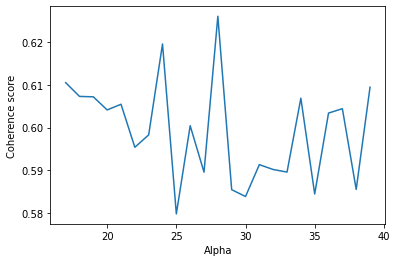

In [45]:
# Show graph
limit=40; start=17; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Alpha")
plt.ylabel("Coherence score")
#plt.savefig('20240221_PhD_MalletLDALtr-Coherence')
plt.show()

In [46]:
# Print the coherence and perplexity scores
for m, cv in zip(x, coherence_values):
    print("Alpha =", m, 'Coherence: ', round(cv, 4))

Alpha = 17 Coherence:  0.6105
Alpha = 18 Coherence:  0.6073
Alpha = 19 Coherence:  0.6072
Alpha = 20 Coherence:  0.6041
Alpha = 21 Coherence:  0.6055
Alpha = 22 Coherence:  0.5954
Alpha = 23 Coherence:  0.5983
Alpha = 24 Coherence:  0.6196
Alpha = 25 Coherence:  0.5797
Alpha = 26 Coherence:  0.6004
Alpha = 27 Coherence:  0.5895
Alpha = 28 Coherence:  0.6261
Alpha = 29 Coherence:  0.5854
Alpha = 30 Coherence:  0.5838
Alpha = 31 Coherence:  0.5913
Alpha = 32 Coherence:  0.5901
Alpha = 33 Coherence:  0.5895
Alpha = 34 Coherence:  0.6069
Alpha = 35 Coherence:  0.5844
Alpha = 36 Coherence:  0.6034
Alpha = 37 Coherence:  0.6044
Alpha = 38 Coherence:  0.5855
Alpha = 39 Coherence:  0.6095


In [47]:
# Coherence for 11-topic, 28-alpha model
print(coherence_values[11])

# Topics
malletModel = model_list[11]
model_topics = malletModel.show_topics(formatted=False)
pprint(sorted(malletModel.print_topics(num_words=20)))

# Convert results to lda model format for visualization.
MalletLDA = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(malletModel)

# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(MalletLDA, corpus, id2word, sort_topics=False)
vis

0.6261396999538377
[(0,
  '0.054*"cook" + 0.035*"bread" + 0.033*"wash" + 0.027*"breakfast" + '
  '0.022*"work" + 0.022*"clothe" + 0.021*"tonight" + 0.020*"set" + '
  '0.020*"clean" + 0.020*"bring" + 0.017*"black" + 0.017*"bath" + '
  '0.016*"today" + 0.016*"fish" + 0.016*"mesurier" + 0.015*"iron" + '
  '0.015*"finish" + 0.014*"washing" + 0.014*"tom" + 0.014*"wind"'),
 (1,
  '0.099*"horse" + 0.039*"start" + 0.029*"boy" + 0.025*"water" + 0.024*"fire" '
  '+ 0.024*"mile" + 0.018*"road" + 0.017*"thing" + 0.016*"rest" + 0.016*"head" '
  '+ 0.016*"buggy" + 0.015*"station" + 0.015*"scrub" + 0.013*"pack" + '
  '0.013*"camp" + 0.013*"sand" + 0.013*"travel" + 0.012*"cup" + '
  '0.012*"breakfast" + 0.012*"fear"'),
 (2,
  '0.033*"home" + 0.028*"read" + 0.024*"town" + 0.021*"polly" + 0.021*"talk" + '
  '0.019*"drive" + 0.019*"row" + 0.018*"mama" + 0.016*"ride" + 0.016*"dress" + '
  '0.016*"call" + 0.016*"garden" + 0.014*"church" + 0.014*"papa" + '
  '0.013*"dick" + 0.013*"poll" + 0.012*"sit" + 0.01

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.226266 -0.036000       1        1   9.940357
1      0.153320  0.135817       2        1   9.102577
2     -0.100281  0.009819       3        1   8.635545
3      0.096456 -0.269555       4        1   8.522424
4     -0.241502  0.028119       5        1  10.070688
5      0.076878  0.160359       6        1   8.591721
6     -0.235281  0.002639       7        1   9.730627
7      0.204499  0.201037       8        1   8.323114
8     -0.053414 -0.280371       9        1   8.523029
9     -0.272376  0.128523      10        1  10.221523
10     0.145434 -0.080386      11        1   8.338394, topic_info=         Term        Freq       Total Category  logprob  loglift
58      horse  545.000000  545.000000  Default  30.0000  30.0000
23       rain  427.000000  427.000000  Default  29.0000  29.0000
123      send  539.000000  539.000000  Default  28.0000  28.0000
491      port  368.000000  368.000000  Default  27.0000  27.0000
193    letter  391.000000  391.000000  Default  26.0000  26.0000
..        ...         ...         ...      ...      ...      ...
133     write   75.154771  345.020672  Topic11  -4.2083   0.9602
110     beach   49.355372  122.909891  Topic11  -4.6288   1.5719
16       hour   49.355372  176.559059  Topic11  -4.6288   1.2097
63       part   43.746807  121.077655  Topic11  -4.7494   1.4663
211  tomorrow   43.746807  132.999272  Topic11  -4.7494   1.3724

[796 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
2269      7  1.019394     accept
1720      7  1.001687    account
454       4  0.978306        ace
2025      7  0.981891        act
1958      5  0.988442     action
...     ...       ...        ...
421       7  0.440675       year
421       9  0.554924       year
134       6  0.326866  yesterday
134       8  0.184386  yesterday
134      11  0.486109  yesterday

[972 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])

In [9]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, 
                                                        corpus=corpus, 
                                                        texts=data, 
                                                        start=1, 
                                                        limit=11, 
                                                        step=1)

Mallet LDA: 11 topics, 4 topic bits, 1111 topic mask
Data loaded.
max tokens: 93
total tokens: 56712
<10> LL/token: -7.73482
<20> LL/token: -7.34464
<30> LL/token: -7.21301
<40> LL/token: -7.14896

0	0.09091	port board drive find man breakfast miss arrive sleep receive pay land boat ship vessel pass oclock meeting lunch place 
1	0.09091	child rain stay river hour horse start hope boy work send side return arrive man garden bring ride talk lunch 
2	0.09091	pound town port train wheat bank club mill flour read letter buy sell connor wife dine pay weather ayre meet 
3	0.09091	horse breakfast call meet start send man dress tom station rain work thing miss people bay find girl bring play 
4	0.09091	sleep cook thing begin send breakfast boy wind cut put rain scrub meat child floor fire bring turn find chop 
5	0.09091	letter write dine town call afternoon read rain club wife remain mail talk home office settle miss school port hear 
6	0.09091	agree question office motion govt send bill cabine

<310> LL/token: -7.02268
<320> LL/token: -7.01323
<330> LL/token: -7.01166
<340> LL/token: -7.01395

0	0.09091	port drive find town board rise church arrive train ship land breakfast receive pay miss people boat room water meeting 
1	0.09091	child rain drive man call hope bring work afternoon find arrive hour stay return pair note room meet fire fellow 
2	0.09091	pound town port wheat club train mill call flour buy dine sell bank letter read meet write connor wife ayre 
3	0.09091	horse call breakfast miss station man stay start meet home arrive people sleep drive dress mother girl thing road lady 
4	0.09091	thing bring cook work meat child cake call send turn start put chop rain set bread trouble boy cup stay 
5	0.09091	letter write read remain wife afternoon call home town port miss send business walter hear connor church office settle return 
6	0.09091	question motion agree govt office club vote bill send treasurer glyde report cabinet ministry member blyth call bring govr move 
7	0.

<610> LL/token: -7.00009
<620> LL/token: -6.99799
<630> LL/token: -7.00139
<640> LL/token: -6.99839

0	0.09091	port town drive train find church board rise pay breakfast ship arrive oclock land receive man sleep pound school miss 
1	0.09091	rain child man drive hope work arrive bring room hour call return meet side stay note start find pair shower 
2	0.09091	pound wheat town port mill letter club flour sell buy read train bank write dine call connor home wife office 
3	0.09091	horse home miss man call breakfast stay meet tom station drive start people mother arrive road girl lady place sleep 
4	0.09091	thing bring cook turn find put work send rain child trouble cake bread call breakfast meat chop tonight lie cup 
5	0.09091	write letter call remain wife read afternoon town club office mail hear return settle connor bath dine miss weather church 
6	0.09091	question agree motion govt office cabinet call send club vote treasurer glyde move govr bring report member answer bill carry 
7	0.09

<910> LL/token: -7.00048
<920> LL/token: -7.0075
<930> LL/token: -7.01189
<940> LL/token: -7.00812

0	0.09091	port town drive train pound land board find pay breakfast man church arrive ship receive rise bath college school bank 
1	0.09091	rain man child room call hour start arrive drive meet road arm hope pair jug clear fellow side fire door 
2	0.09091	pound town wheat port club mill letter flour train buy sell dine bank write call read connor office meet home 
3	0.09091	horse breakfast miss call meet home station people man tom stay road start today fall bay arrive girl drive mother 
4	0.09091	thing work bring turn child send cake rain call cup bread find trouble meat cook catch stay lie put head 
5	0.09091	letter write call wife remain read afternoon port send town mail return connor club settle hear home weather business miss 
6	0.09091	question motion agree govt office cabinet vote treasurer glyde member bill ministry club report send call move carry govr blyth 
7	0.09091	home tow

<210> LL/token: -7.06069
<220> LL/token: -7.05572
<230> LL/token: -7.05289
<240> LL/token: -7.05755

0	0.18182	child call thing man bring home trouble find send cook bay turn put bread arm bishop vessel drive fellow board 
1	0.18182	drive read talk hear arrive estrange room friend start hope sit miss door find party dress rain stand lunch write 
2	0.18182	port town pound train letter wheat read club write mill bank wife dine flour pay sell buy connor rise meet 
3	0.18182	send return dine agree write man room pass meeting find refreshment receive question oclock bower meet report work hour land 
4	0.18182	horse start boy mile water rain fire travel fear ride breakfast road buggy sand tank camp drive thing lead bring 
5	0.18182	send rain place afternoon call home thing wind breakfast weather hour work put year part paper dust people beach child 
6	0.18182	office motion govt blyth club question call agree ayre cabinet matter letter vote treasurer bill ministry genl govr move pound 
7	0.18

<510> LL/token: -7.02606
<520> LL/token: -7.02723
<530> LL/token: -7.02686
<540> LL/token: -7.02137

0	0.18182	child bring call home man drive thing turn bay tonight find put trouble fellow today stay girl vessel work letter 
1	0.18182	drive friend arrive hear estrange start read port miss home sit dress door bring tomorrow find room bill write people 
2	0.18182	port town pound train letter wheat club read mill dine wife flour write pay bank buy connor sell remain rise 
3	0.18182	send return man write pass room receive oclock pound dine meeting meet work bank land report noon refreshment bower agree 
4	0.18182	horse start water mile boy rain buggy fire travel road ride sand breakfast thing drive fear camp tank hour bring 
5	0.18182	rain send find home people place afternoon thing year wind call write child weather hope part paper stop fall put 
6	0.18182	question motion agree govt office club call cabinet vote bill treasurer glyde letter ministry blyth genl govr ayre move carry 
7	0.18

<810> LL/token: -7.02642
<820> LL/token: -7.03273
<830> LL/token: -7.03307
<840> LL/token: -7.03741

0	0.18182	child bring man call work turn home thing bay tonight trouble fellow black put drive boy today vessel stay sleep 
1	0.18182	drive arrive estrange friend port side miss read hear letter talk bill stand receive find home bring post room people 
2	0.18182	port town pound train letter club wheat read mill wife write flour call pay dine sell buy connor home bank 
3	0.18182	send room man pound land find bank oclock receive afternoon write dine meet refreshment hear pass month bill charge bower 
4	0.18182	horse start water rain mile boy fire buggy travel fear breakfast sand thing ride road drive tank hour lead camp 
5	0.18182	rain afternoon send place child call home expect find write thing wind hope hour people note year weather shower boy 
6	0.18182	question motion govt agree office club cabinet call put vote treasurer glyde ministry blyth move ayre genl govr propose send 
7	0.1818

<110> LL/token: -7.15663
<120> LL/token: -7.15219
<130> LL/token: -7.13533
<140> LL/token: -7.12665

0	0.27273	man people call arrive board year road place fall meet miss find hear weather station friend work breakfast drive visit 
1	0.27273	buggy start drive rain mama thing ride row dress hour papa dick water boy stay horse fire home child room 
2	0.27273	port pound wheat town club bank flour sell buy read office rain land sleep rise train mill ayre weather sale 
3	0.27273	horse tom thing breakfast wind boy today water wash sand cup fear find station stay cook hand drink sleep tonight 
4	0.27273	work stop truck afternoon shoot home today mill thing week chapel start gun dog boat oclock preach aunt game pound 
5	0.27273	letter write port town train dine return home wife meeting remain cabinet pound attend call connor church account pay mill 
6	0.27273	question motion govt office agree call send vote member treasurer glyde report ministry bring govr club carry move answer bill 
7	0.2727

<410> LL/token: -7.08153
<420> LL/token: -7.08551
<430> LL/token: -7.08736
<440> LL/token: -7.08528

0	0.27273	breakfast meet call arrive man people road miss board place hear wife lady start station sleep bay pass fall rise 
1	0.27273	row dress mama polly child papa ride dick thing rain start return stay garden fall begin turn home buggy willie 
2	0.27273	wheat club pound bank port read flour buy sell town office ayre dine sale rise ton oclock weather rain call 
3	0.27273	thing horse tom water wind man fire today fear wash sand put find station breakfast sleep rest cup room lie 
4	0.27273	work stop truck afternoon shoot today home mill week chapel thing boat dog gun pay start preach find aunt bring 
5	0.27273	port town letter write train pound mill wife pay church dine land return home connor walter find ship meeting remain 
6	0.27273	question office motion govt agree call send cabinet club bill vote member treasurer glyde report ministry genl matter blyth carry 
7	0.27273	read drive 

<710> LL/token: -7.07043
<720> LL/token: -7.06929
<730> LL/token: -7.07505
<740> LL/token: -7.06845

0	0.27273	call man meet breakfast people station arrive horse road board place miss lady find wife police start pass weather drink 
1	0.27273	town row mama polly dress papa stay dick home ride child thing turn rain start pick return garden call deal 
2	0.27273	club wheat read pound port flour office sell buy dine bank town ayre weather sale speak ton meet rain party 
3	0.27273	thing fire water wind sleep tom fear breakfast man find today rest boy put wash weather sand lie horse tank 
4	0.27273	work stop truck shoot afternoon today thing mill home week chapel start gun dog boat preach pay game aunt half 
5	0.27273	town port train letter pound write mill pay find land wife call walter church home dine receive return hughe bank 
6	0.27273	question motion govt agree office call vote send cabinet member treasurer bill report glyde club ministry genl govr matter answer 
7	0.27273	read talk dr

Mallet LDA: 11 topics, 4 topic bits, 1111 topic mask
Data loaded.
max tokens: 93
total tokens: 56712
<10> LL/token: -7.81749
<20> LL/token: -7.44435
<30> LL/token: -7.31528
<40> LL/token: -7.25868

0	0.36364	thing man work begin find tom set cup room wash horse call clean gather clothe boil boy care bring drive 
1	0.36364	horse rain start thing fire put camp black ride lend wind buggy water light mile arm load side scrub hope 
2	0.36364	pound letter town port wheat write mill buy flour connor train wife sell pay bank dine home ayre meet arrange 
3	0.36364	question send call agree office return glyde ministry room answer member matter move find talk hour reynold treasurer prepare work 
4	0.36364	work stop afternoon truck shoot home today mill week boat chapel pay gun dog game aunt oclock pound preach hear 
5	0.36364	port town club call train read dine remain sleep lose write meeting ship drive church return hear wife spence employ 
6	0.36364	motion govt land club read vote cabinet blyth

<310> LL/token: -7.10467
<320> LL/token: -7.09838
<330> LL/token: -7.10759
<340> LL/token: -7.10148

0	0.36364	thing child sleep man place find room rest put fear call boy cake tom cup talk lie girl wash scrub 
1	0.36364	horse rain start boy water mile fire buggy camp light ride travel bring sand tank head hold black pack hour 
2	0.36364	pound letter town wheat port mill flour buy sell connor bank write club dine wife office train arrange pay sale 
3	0.36364	question call send office agree cabinet matter glyde blyth treasurer return genl govr answer ayre member business reynold strangeway approve 
4	0.36364	work stop afternoon truck shoot home today mill week chapel thing boat gun pay dog game start oclock aunt preach 
5	0.36364	port town train write call read church club drive find return remain ship sleep wife receive miss hear meeting board 
6	0.36364	motion bill govt vote read bring move land bank lose paper rise club speech notice pound agree debate play oclock 
7	0.36364	home pol

<610> LL/token: -7.09994
<620> LL/token: -7.10494
<630> LL/token: -7.11255
<640> LL/token: -7.10554

0	0.36364	thing child man sleep call today work rest cup room tom trouble place wash find fear put tonight drink talk 
1	0.36364	horse rain boy start mile water buggy drive sand camp travel fire ride breakfast thing bring tank arrive lead road 
2	0.36364	pound wheat town letter port write mill flour buy sell club bank train connor read dine wife home meet arrange 
3	0.36364	office send agree question call cabinet matter blyth glyde dine genl govr ayre report return letter business write answer treasurer 
4	0.36364	stop work afternoon truck shoot home mill thing week today chapel boat gun dog start aunt game wood oclock preach 
5	0.36364	port town train church read find drive remain miss ship board wife call return sleep receive dine pay arrive rise 
6	0.36364	motion govt pound bill vote club land move bank speak bring notice attend mail speech receive meeting debate read carry 
7	0.3636

<910> LL/token: -7.10437
<920> LL/token: -7.10528
<930> LL/token: -7.11239
<940> LL/token: -7.11205

0	0.36364	thing child room man sleep place call afternoon find today water rest cup drink put trouble tom pain floor wash 
1	0.36364	horse rain start boy water mile thing fire camp buggy travel breakfast ride drive sand find sheep hold tank stay 
2	0.36364	pound wheat letter town club bank flour port write buy home mill sell call read wife connor speak arrange rain 
3	0.36364	office send agree cabinet call matter question glyde blyth business dine answer letter treasurer genl govr report return write club 
4	0.36364	work stop truck shoot afternoon home today week mill thing chapel boat gun dog oclock aunt game preach pay hear 
5	0.36364	port town train find church dine read drive wife receive pay ship hear return meeting board sleep miss attend ride 
6	0.36364	motion govt pound bill vote question bring move land oclock year carry read speak debate rise paper receive mail resolution 
7	0

<210> LL/token: -7.127
<220> LL/token: -7.12377
<230> LL/token: -7.11882
<240> LL/token: -7.12259

0	0.45455	horse start man road station water bay play fear today drink room breakfast hand stay wash police boy cup cut 
1	0.45455	rain horse fire boy thing buggy start water mile put bring camp hour find light sand sheep cook lead tank 
2	0.45455	write letter wheat club connor wife read flour office buy remain weather afternoon walter offer hear ton mill bank speak 
3	0.45455	cook work afternoon today bread breakfast tom wash send tonight bring dress finish mail weather bath wind clothe set clean 
4	0.45455	question motion govt agree cabinet vote office blyth treasurer glyde answer send move carry genl govr bill put lose strangeway 
5	0.45455	port town pound train pay land rise dine church mill bank sell home find drive doctor meeting letter read oclock 
6	0.45455	call club read room pound member receive return pass ministry speak matter dine office spence oclock man write reynold hand 


<510> LL/token: -7.10952
<520> LL/token: -7.10248
<530> LL/token: -7.10554
<540> LL/token: -7.10597

0	0.45455	horse start man station road play bay wash buggy water people drink today run fear stay thing police meet fall 
1	0.45455	horse rain boy fire find thing mile sand start light water head put camp hour breakfast bring drive tank black 
2	0.45455	letter wheat write flour read connor buy wife pound club remain weather town port sale bank walter ton mill offer 
3	0.45455	cook work today afternoon bread breakfast send tom bring wash finish dress mail tonight weather clothe set clean bath wind 
4	0.45455	question motion agree govt bill cabinet vote office treasurer send glyde club answer carry genl move govr call bring matter 
5	0.45455	port town train pound pay dine land church drive find mill sleep return oclock doctor people sell meet employ meeting 
6	0.45455	call read club room office write receive pass ayre man hear bank speak noon spence send reynold party remain find 
7	0.454

<810> LL/token: -7.10647
<820> LL/token: -7.1071
<830> LL/token: -7.10396
<840> LL/token: -7.11577

0	0.45455	horse man start station road wash water stay people drink play fall bay arrive police fear room weather today set 
1	0.45455	horse rain boy start fire mile water buggy camp sand thing drive find hour put thunder black breakfast ride eat 
2	0.45455	letter wheat write flour sell club buy connor read wife port remain rain speak weather sale town office walter price 
3	0.45455	cook work breakfast afternoon bread send bring today tom wash finish tonight dress weather clothe clean set bath mesurier iron 
4	0.45455	question motion govt agree bill cabinet vote treasurer glyde move answer genl govr carry office pound matter send call propose 
5	0.45455	port town train pound pay mill church land dine find call home drive rise ride receive bank doctor midnight employ 
6	0.45455	read club call office write dine room blyth send ayre man remain return party wife reynold whist noon year meeti

<110> LL/token: -7.15956
<120> LL/token: -7.14684
<130> LL/token: -7.13984
<140> LL/token: -7.14097

0	0.54545	rain drive return send shower write hear home weather find bring arrive friend hope beach letter read bath tomorrow remain 
1	0.54545	horse start mile water boy fire thing road buggy scrub sand camp breakfast travel station rain hour ride rest tom 
2	0.54545	port town pound train letter wheat write wife flour mill bank dine sell pay connor buy club rise church home 
3	0.54545	breakfast room man find miss sleep arrive home station people call drive lunch return dress wind heat send lie meet 
4	0.54545	cook work bread afternoon breakfast bring wash send dress finish clean clothe tonight today weather thing set mesurier wind catch 
5	0.54545	work stop afternoon truck shoot today home mill week boat chapel start pay preach gun dog oclock game wood thing 
6	0.54545	question motion govt agree cabinet bill vote report office treasurer write business genl dine carry govr move return m

<410> LL/token: -7.11267
<420> LL/token: -7.11271
<430> LL/token: -7.1094
<440> LL/token: -7.11181

0	0.54545	rain weather send afternoon find shower hope return hear man write beach arrive drive call home read showery remain point 
1	0.54545	horse start boy water mile thing buggy rain fire camp travel road breakfast sand hour drive tom tank ride bay 
2	0.54545	port town pound letter train wife mill write wheat sell flour pay connor home buy read bank dine land arrange 
3	0.54545	breakfast horse miss man arrive station stay people call meet drive room girl sleep start home tom wife mother fall 
4	0.54545	cook bread breakfast work afternoon send dress finish today bring clothe weather wash bath set clean tonight mesurier iron tom 
5	0.54545	work stop truck afternoon shoot mill today week home thing chapel boat start dog gun preach aunt pay oclock game 
6	0.54545	question motion govt agree cabinet bill office call vote treasurer answer glyde club genl govr carry send move return report 


<710> LL/token: -7.10861
<720> LL/token: -7.10588
<730> LL/token: -7.11519
<740> LL/token: -7.10995

0	0.54545	rain send weather arrive return find hope hear afternoon write man shower drive people die letter part note expect showery 
1	0.54545	horse start boy mile thing water rain buggy camp fire travel sand rest hour sheep black ride lead tank put 
2	0.54545	port town pound train letter wife write mill sell dine wheat pay home flour land rise connor find church read 
3	0.54545	breakfast horse call meet drive miss arrive station people stay road home girl man start sleep lady tom pass room 
4	0.54545	cook bread breakfast afternoon work wash send dress finish bath tonight clothe weather today clean bring thing catch set mesurier 
5	0.54545	work stop truck afternoon shoot home today mill week thing boat chapel pay gun dog start game preach sleep aunt 
6	0.54545	question motion govt agree call cabinet office bill vote treasurer glyde report pound send answer govr genl carry move return 


Mallet LDA: 11 topics, 4 topic bits, 1111 topic mask
Data loaded.
max tokens: 93
total tokens: 56712
<10> LL/token: -7.9689
<20> LL/token: -7.5337
<30> LL/token: -7.37207
<40> LL/token: -7.29795

0	0.63636	stop work truck start shoot week home afternoon boat mill chapel play wood gun game half hear preach pay find 
1	0.63636	horse start boy mile water road rain drink buggy drive station camp travel man eat sand breakfast thing arrive ride 
2	0.63636	office send find ayre return port hear read remain connor club whist pass treasurer price meet join intend carry govr 
3	0.63636	tom breakfast today mail man bay work weather tonight send sleep bring dress find afternoon wash cup write wind people 
4	0.63636	cook today wash wind send bring bread work breakfast afternoon clean thing finish catch weather set fish mesurier iron clothe 
5	0.63636	town port pound letter train wheat mill pay flour dine write wife sell club church read buy drive sale ship 
6	0.63636	question agree motion govt blyt

<310> LL/token: -7.129
<320> LL/token: -7.12844
<330> LL/token: -7.11779
<340> LL/token: -7.12404

0	0.63636	work stop truck afternoon shoot today week mill chapel home start gun pay dog preach thing aunt boat game wood 
1	0.63636	horse start mile road boy water buggy drive station arrive breakfast camp bring travel man sand rest put ride fear 
2	0.63636	port read club return office remain ayre hear weather year man whist speak join lunch afternoon send charge spend blyth 
3	0.63636	man tom today breakfast mail bay stay sleep bring drink tonight room child work vessel wash letter arrive thing cup 
4	0.63636	cook bread wash weather afternoon send work today wind breakfast dress bring tonight clothe clean finish catch set bath fish 
5	0.63636	town pound port letter train write wheat mill buy flour dine pay sell wife home connor bank arrange club church 
6	0.63636	question agree motion govt bill cabinet office vote report treasurer glyde member move ministry carry blyth matter genl govr b

<610> LL/token: -7.1206
<620> LL/token: -7.12089
<630> LL/token: -7.12379
<640> LL/token: -7.1134

0	0.63636	stop work truck afternoon shoot today mill week home start chapel boat thing pay gun dog preach hear game aunt 
1	0.63636	horse start mile boy road drive water breakfast station buggy camp travel ride sand arrive fear meet rest harness tom 
2	0.63636	club read office remain call return ayre blyth rise speak dine hear year whist bank meet join write hand party 
3	0.63636	mail today breakfast bay man tom sleep bring call wash stay miss tonight letter place drink room change arrive dress 
4	0.63636	cook bread work send breakfast today wash afternoon weather bring set dress tonight clean wind clothe bath finish black mesurier 
5	0.63636	pound letter town port wheat write train flour buy mill sell wife pay connor dine home arrange sale walter price 
6	0.63636	question agree motion govt club cabinet office vote member bill call report treasurer glyde matter answer ministry genl move s

<910> LL/token: -7.12103
<920> LL/token: -7.11427
<930> LL/token: -7.11456
<940> LL/token: -7.11454

0	0.63636	stop work truck home afternoon shoot today week mill boat chapel thing pay start gun dog preach game aunt wood 
1	0.63636	horse start boy mile water road drive buggy bring camp travel breakfast scrub tom thing station fear meet sand ride 
2	0.63636	club read office remain blyth ayre talk meet dine rise call weather whist speak play afternoon join hear write send 
3	0.63636	breakfast sleep today man mail call tom arrive stay people bay wash place miss room drink station change dress rest 
4	0.63636	cook bread bring work afternoon breakfast wash today send tonight finish dress set weather clean wind clothe bath lot catch 
5	0.63636	pound town letter port mill train sell wheat write flour pay buy wife connor home bank arrange offer walter price 
6	0.63636	question motion govt agree cabinet bill office vote call member report send treasurer glyde pound ministry genl matter move an

<210> LL/token: -7.15115
<220> LL/token: -7.14443
<230> LL/token: -7.13844
<240> LL/token: -7.13997

0	0.72727	cook wash today work bread afternoon finish tonight dress breakfast weather wind clean tom bring black set mesurier clothe bath 
1	0.72727	horse start water boy drive mile rain fire road buggy camp bring travel ride station sand harness lead bay tank 
2	0.72727	port town pound train letter wheat dine bank mill write flour sell pay buy connor home wife read party church 
3	0.72727	find arrive meet man call place breakfast talk room work hour sleep drive tomorrow year people friend visit expect lunch 
4	0.72727	call miss child stay today breakfast thing man home send horse station mother girl lady wind dust people lot sleep 
5	0.72727	home read town dress polly drive row mama child papa dick poll stay garden church call ride miss sit estrange 
6	0.72727	question agree motion govt office cabinet bill vote report treasurer answer glyde notice move genl govr carry propose matter re

<510> LL/token: -7.125
<520> LL/token: -7.12244
<530> LL/token: -7.12289
<540> LL/token: -7.12421

0	0.72727	cook afternoon work breakfast send wash bread finish today dress wind weather bring clean bath tonight clothe lot mesurier iron 
1	0.72727	horse start rain mile boy water buggy drive fire camp road travel thing sand ride hour hold station tank fear 
2	0.72727	town port pound train letter wheat flour mill pay sell buy bank dine home write wife connor land arrange meet 
3	0.72727	call find drive breakfast arrive meet sleep year friend man return hear people room tomorrow visit place lunch expect port 
4	0.72727	horse stay man breakfast child call home miss girl station thing mother today wash road dress son people tom start 
5	0.72727	home read town polly dress row mama drive stay child papa ride talk dick poll miss turn church estrange garden 
6	0.72727	agree question motion govt office send bill cabinet vote report treasurer glyde answer genl govr move carry propose return pound

<810> LL/token: -7.12125
<820> LL/token: -7.12243
<830> LL/token: -7.12452
<840> LL/token: -7.12622

0	0.72727	cook breakfast wash afternoon send today bread finish dress work weather wind bring clothe tonight clean bath tom mesurier fish 
1	0.72727	horse start rain water boy mile put fire buggy hour camp sand travel ride road drive thing tank black lead 
2	0.72727	port town pound train wheat letter mill flour sell buy pay write home dine bank connor land wife church sale 
3	0.72727	find drive arrive breakfast sleep place call meet friend hear expect return read room man year people talk port visit 
4	0.72727	horse stay call breakfast station man meet miss people road girl drive thing home mother start dress bay tom lady 
5	0.72727	home town polly row read mama dress child stay talk papa miss drive dick poll sit call church estrange garden 
6	0.72727	question motion agree govt bill office cabinet vote report treasurer glyde call move send answer genl carry propose bring approve 
7	0.72

<110> LL/token: -7.16253
<120> LL/token: -7.16191
<130> LL/token: -7.14923
<140> LL/token: -7.14596

0	0.81818	thing bring fear sleep room fire sand breakfast girl turn child place rest wind cup supper find man lie today 
1	0.81818	horse start water boy mile buggy road tom bay rain arrive drive stay camp travel ride station wash black harness 
2	0.81818	letter town find write remain read hear pay wife port home spend sleep mill drive arrive ride offer win talk 
3	0.81818	cook afternoon today work wash bread send breakfast tom tonight dress finish bring set weather clothe wind lot clean bath 
4	0.81818	work stop afternoon truck shoot today home mill week start boat thing chapel game play preach gun dog find pay 
5	0.81818	train town call govt connor pound dine agree meeting return bill business letter church cabinet arrange write mill report question 
6	0.81818	port pound wheat club flour buy sell read bank oclock rise land dine weather sale rain ship price ton board 
7	0.81818	home dre

<410> LL/token: -7.13533
<420> LL/token: -7.13386
<430> LL/token: -7.13207
<440> LL/token: -7.13228

0	0.81818	bring thing find fire child sleep place trouble turn today room cup fear man supper call lie put garden tom 
1	0.81818	horse start boy rain mile water road buggy station breakfast tom camp ride travel drive bay harness tank hold run 
2	0.81818	letter write wife read find hear church remain afternoon town home pay drive mail walter receive ride midnight place offer 
3	0.81818	cook work today afternoon wash breakfast bread send tonight finish dress set weather bath clothe bring tom wind clean catch 
4	0.81818	work stop afternoon truck shoot week home today mill thing start chapel boat gun dog aunt play game hear oclock 
5	0.81818	town port train call pound return meeting dine attend cabinet agree lose settle land receive bank speak office bill charge 
6	0.81818	port wheat pound flour club mill buy sell read meet bank connor dine sale ton ship price paper rise rain 
7	0.81818	hom

<710> LL/token: -7.1397
<720> LL/token: -7.14228
<730> LL/token: -7.14143
<740> LL/token: -7.14534

0	0.81818	thing bring child room fire sleep turn today put tom call find trouble cook man place cup stay rest lie 
1	0.81818	horse start boy rain mile water station road breakfast buggy camp travel tom drive ride harness sheep rest tank head 
2	0.81818	letter write wife find read sleep hear home mail afternoon walter miss drive ride arrive pay remain hope call note 
3	0.81818	cook work afternoon today breakfast bread wash send bring dress finish tonight clothe set tom weather clean bath catch mesurier 
4	0.81818	work stop truck afternoon shoot today week home thing mill chapel boat start game gun dog wood preach find aunt 
5	0.81818	port town train pound land meeting call party dine receive year mill bank hold spence oclock attend ship lose employ 
6	0.81818	club wheat pound flour sell town port read buy meet dine office bank connor mill sale ton blyth speak remain 
7	0.81818	home polly 

Mallet LDA: 11 topics, 4 topic bits, 1111 topic mask
Data loaded.
max tokens: 93
total tokens: 56712
<10> LL/token: -8.04555
<20> LL/token: -7.5425
<30> LL/token: -7.39482
<40> LL/token: -7.3258

0	0.90909	thing work wash man tom water kitchen garden wind put job bring clock fear today child fold scrub rain finish 
1	0.90909	horse start mile station road boy fire mesurier water drive tom rain bay buggy cup sand camp travel pack eat 
2	0.90909	call meet read church drive hear town home arrive find expect friend lunch rise port wine lady remain talk weather 
3	0.90909	send call return room find remain treasurer hand miss glyde cabinet matter meet put work point weather shower join office 
4	0.90909	work stop truck afternoon home shoot week boat mill start today chapel pay preach thing gun game dog oclock half 
5	0.90909	sleep people find today breakfast finish cake mail thing hand beach room letter rest dress head afternoon board supper pain 
6	0.90909	bank agree question motion govt clu

<310> LL/token: -7.14948
<320> LL/token: -7.14688
<330> LL/token: -7.14948
<340> LL/token: -7.14516

0	0.90909	thing wind today wash tom child sleep breakfast bring put kitchen work bay change job fear finish lie begin clock 
1	0.90909	horse start road mile boy station buggy stay drive water camp bring travel girl breakfast pack ride thing sand black 
2	0.90909	call miss drive meet breakfast sleep arrive church port friend find place read people lady hear man year board spend 
3	0.90909	call send office agree matter ayre cabinet blyth join glyde put genl govr business pass reynold governor strangeway talk treasurer 
4	0.90909	stop work afternoon truck shoot home week mill today boat chapel start pay preach thing gun game dog aunt hear 
5	0.90909	man room mail find letter afternoon write arrive sleep return place rest bath drink people hope heat board trouble weather 
6	0.90909	question motion govt bill club vote member dine move lose agree oclock carry ministry notice speak meeting bri

<610> LL/token: -7.13529
<620> LL/token: -7.13569
<630> LL/token: -7.13778
<640> LL/token: -7.12737

0	0.90909	thing child today work wind wash put bring tom bay sleep breakfast room kitchen clock turn change clothe lot cook 
1	0.90909	horse start mile boy water road station buggy stay drive camp travel sand rest ride breakfast harness fear hold eat 
2	0.90909	call drive miss arrive breakfast meet sleep people friend hear board find man place port lady expect year spend lunch 
3	0.90909	office blyth send agree matter talk call ayre write dine remain join glyde cabinet genl govr business reynold governor strangeway 
4	0.90909	work stop afternoon truck shoot mill today week home boat start chapel pay hear oclock thing gun dog preach aunt 
5	0.90909	mail man letter write home afternoon find send room arrive return sleep hope bath place hear call vessel heat beach 
6	0.90909	question motion govt club bill call vote meeting pound receive lose notice move carry return rise speak land agree c

<910> LL/token: -7.14825
<920> LL/token: -7.1458
<930> LL/token: -7.15469
<940> LL/token: -7.16118

0	0.90909	today child thing wind wash bring tom bay work sleep put send breakfast tonight change stay turn trouble room call 
1	0.90909	horse start boy mile road station water buggy drive stay sand camp travel ride rest thing fear breakfast bring scrub 
2	0.90909	call drive miss breakfast meet arrive find friend people hear board sleep lady year family man lunch spend expect place 
3	0.90909	office send blyth agree matter ayre read call write cabinet treasurer join glyde genl govr meet talk ministry letter reynold 
4	0.90909	work stop truck afternoon home shoot today week mill boat chapel start thing pay gun oclock game dog preach aunt 
5	0.90909	man mail write send letter room home arrive afternoon sleep return find people bath drink place dress tom beach weather 
6	0.90909	question motion govt call meeting club pound bill vote port receive move notice carry land bring lose charge retur

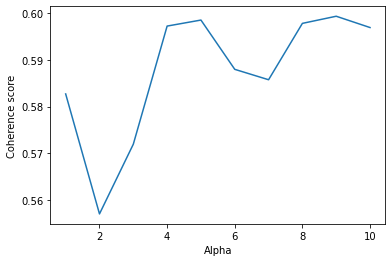

In [11]:
# Show graph
limit=11; start=1; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Alpha")
plt.ylabel("Coherence score")
#plt.savefig('20240221_PhD_MalletLDALtr-Coherence')
plt.show()

In [12]:
# Print the coherence and perplexity scores
for m, cv in zip(x, coherence_values):
    print("Alpha =", m, 'Coherence: ', round(cv, 4))

Alpha = 1 Coherence:  0.5827
Alpha = 2 Coherence:  0.5569
Alpha = 3 Coherence:  0.5719
Alpha = 4 Coherence:  0.5973
Alpha = 5 Coherence:  0.5986
Alpha = 6 Coherence:  0.588
Alpha = 7 Coherence:  0.5857
Alpha = 8 Coherence:  0.5978
Alpha = 9 Coherence:  0.5994
Alpha = 10 Coherence:  0.597


In [48]:
MalletLDA.save('20240924_PhD_TopDiaChk_ATM11t28a')
pyLDAvis.save_html(vis, '20240924_PhD_TopDiaChk_ATM11t28a.html')

## 3. Range of iterations

In [7]:
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_iter in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=11, alpha=28, id2word=id2word, random_seed=100, iterations=num_iter)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, 
                                                        corpus=corpus, 
                                                        texts=data, 
                                                        start=500, 
                                                        limit=5500, 
                                                        step=500)

Mallet LDA: 11 topics, 4 topic bits, 1111 topic mask
Data loaded.
max tokens: 93
total tokens: 56712
<10> LL/token: -8.38082
<20> LL/token: -7.73328
<30> LL/token: -7.49647
<40> LL/token: -7.37846

0	2.54545	cook wash tonight bread today clean set clothe tom black finish work breakfast iron washing lot scrub kitchen weather shower 
1	2.54545	horse rain water boy start fire mile road buggy arrive put breakfast sand hour fear turn travel light lead cup 
2	2.54545	drive read talk call church garden child ride polly town miss row friend mama hope hear papa sit dick expect 
3	2.54545	breakfast man wind bay tom bath thing station drink weather fish mesurier sleep send today child room change mail eat 
4	2.54545	call question motion send lose govt carry report return write whist move glyde intend govr answer pass member party talk 
5	2.54545	work stop hear home truck put mill boat pay shoot week letter preach game river thing gun oclock dog suppose 
6	2.54545	letter club office dine wife writ

<310> LL/token: -7.14312
<320> LL/token: -7.14221
<330> LL/token: -7.13802
<340> LL/token: -7.1331

0	2.54545	cook wash bread breakfast wind tonight today tom send clothe bring lot set clean finish fish mesurier iron washing job 
1	2.54545	horse start boy water road mile buggy station sand fire thing fear rest wait camp pack travel hold supper scrub 
2	2.54545	home read drive ride polly child talk town row mama hear garden church dress papa dick spend poll call stay 
3	2.54545	breakfast man mail bay sleep bath today child drink tom wind weather wash vessel play send sister afternoon people gaskell 
4	2.54545	agree question motion govt office bill call cabinet return vote answer member report carry move treasurer glyde ministry genl govr 
5	2.54545	work afternoon stop home truck boat shoot week today thing hear preach mill play start chapel pay gun dog game 
6	2.54545	letter write wife read remain dine connor speak blyth club office arrange party offer ayre settle year talk walter accou

<110> LL/token: -7.18422
<120> LL/token: -7.1825
<130> LL/token: -7.16948
<140> LL/token: -7.15758

0	2.54545	cook wash bread set today clean wind lot clothe bring tonight put weather black breakfast iron mesurier washing shower tom 
1	2.54545	horse start fire water boy road buggy mile rain thing sand breakfast light rest pack station fear travel camp scrub 
2	2.54545	home read talk polly town child row drive mama garden hear church ride friend papa dick life poll dress call 
3	2.54545	breakfast man mail bay sleep today tom weather child bath wind drink fish eat people tonight wash send lie cup 
4	2.54545	question motion call govt bill agree send talk cabinet vote answer member report carry move glyde state put lose intend 
5	2.54545	work stop afternoon home truck boat shoot week mill today hear preach game pay chapel play thing put gun dog 
6	2.54545	letter write office dine club wife connor remain read blyth matter arrange offer business ayre speak walter price settle account 
7	2.54

<410> LL/token: -7.11979
<420> LL/token: -7.12456
<430> LL/token: -7.12056
<440> LL/token: -7.12775

0	2.54545	cook bread wash set tonight today clothe breakfast clean bring tom wind mesurier fish weather iron lot washing job black 
1	2.54545	horse start water boy mile road station fire buggy sand hour tom thing rest wait pack fear camp breakfast travel 
2	2.54545	home read polly drive town row mama talk ride hear garden dress papa church dick poll child willie sit estrange 
3	2.54545	man mail breakfast bay today bath send sleep child vessel wash tom drink clock lie board rest play tonight sister 
4	2.54545	agree question motion govt call bill office cabinet answer vote club member report move carry treasurer glyde ministry send genl 
5	2.54545	work stop afternoon home truck shoot week boat hear today mill thing game preach chapel play yesterday pay start gun 
6	2.54545	letter write read wife remain club office connor dine blyth arrange speak offer party ayre settle walter account bank

<710> LL/token: -7.12592
<720> LL/token: -7.13252
<730> LL/token: -7.1317
<740> LL/token: -7.13265

0	2.54545	cook bread wash set today tonight clothe breakfast work clean finish fish lot iron wind black mesurier washing kitchen milk 
1	2.54545	horse start boy mile water fire thing rest road buggy head fear sand hour camp supper travel wait station scrub 
2	2.54545	home read drive polly talk row mama ride town hear sit papa church dick garden dress poll call willie life 
3	2.54545	man mail breakfast bay tom today weather sleep child bath arrive clock vessel wash send room change drink board lie 
4	2.54545	agree question motion govt bill office cabinet call vote member report carry treasurer move glyde answer ministry club genl govr 
5	2.54545	work stop truck afternoon boat shoot week home mill start today wood game hear play chapel preach thing pay half 
6	2.54545	letter write read club wife remain office connor dine blyth party speak rise arrange offer ayre business flour wheat year 


Mallet LDA: 11 topics, 4 topic bits, 1111 topic mask
Data loaded.
max tokens: 93
total tokens: 56712
<10> LL/token: -8.38082
<20> LL/token: -7.73328
<30> LL/token: -7.49647
<40> LL/token: -7.37846

0	2.54545	cook wash tonight bread today clean set clothe tom black finish work breakfast iron washing lot scrub kitchen weather shower 
1	2.54545	horse rain water boy start fire mile road buggy arrive put breakfast sand hour fear turn travel light lead cup 
2	2.54545	drive read talk call church garden child ride polly town miss row friend mama hope hear papa sit dick expect 
3	2.54545	breakfast man wind bay tom bath thing station drink weather fish mesurier sleep send today child room change mail eat 
4	2.54545	call question motion send lose govt carry report return write whist move glyde intend govr answer pass member party talk 
5	2.54545	work stop hear home truck put mill boat pay shoot week letter preach game river thing gun oclock dog suppose 
6	2.54545	letter club office dine wife writ

<310> LL/token: -7.14312
<320> LL/token: -7.14221
<330> LL/token: -7.13802
<340> LL/token: -7.1331

0	2.54545	cook wash bread breakfast wind tonight today tom send clothe bring lot set clean finish fish mesurier iron washing job 
1	2.54545	horse start boy water road mile buggy station sand fire thing fear rest wait camp pack travel hold supper scrub 
2	2.54545	home read drive ride polly child talk town row mama hear garden church dress papa dick spend poll call stay 
3	2.54545	breakfast man mail bay sleep bath today child drink tom wind weather wash vessel play send sister afternoon people gaskell 
4	2.54545	agree question motion govt office bill call cabinet return vote answer member report carry move treasurer glyde ministry genl govr 
5	2.54545	work afternoon stop home truck boat shoot week today thing hear preach mill play start chapel pay gun dog game 
6	2.54545	letter write wife read remain dine connor speak blyth club office arrange party offer ayre settle year talk walter accou

<610> LL/token: -7.12267
<620> LL/token: -7.12406
<630> LL/token: -7.13051
<640> LL/token: -7.12347

0	2.54545	cook bread wash set breakfast today clothe work clean tonight tom afternoon wind black fish mesurier iron bath washing lot 
1	2.54545	horse start boy water mile road fire rest station buggy thing sand fear camp wait hour travel scrub hold harness 
2	2.54545	home read talk polly child row town drive mama ride hour garden call papa sit dick poll church willie hear 
3	2.54545	man mail bay breakfast today send sleep wash bath tom vessel arrive clock change tonight board drink room play child 
4	2.54545	agree question motion govt call bill cabinet office vote return member report treasurer move glyde answer carry intend ministry matter 
5	2.54545	work stop afternoon truck shoot week home boat today mill hear game chapel pay play thing preach gun dog start 
6	2.54545	letter write read wife remain club office connor speak blyth buy dine party arrange wheat offer business ayre year wa

<910> LL/token: -7.13196
<920> LL/token: -7.13005
<930> LL/token: -7.14423
<940> LL/token: -7.14501

0	2.54545	cook wash bread set breakfast today clothe afternoon bring work clean tonight lot mesurier fish bath iron wind washing tom 
1	2.54545	horse start boy water mile thing fire road rest scrub tom sand buggy pack station camp ride travel cup black 
2	2.54545	home read town drive polly dress talk row mama ride sit papa dick poll call life stay garden church willie 
3	2.54545	man mail breakfast bay today send tom drink sleep change tonight wash arrive weather vessel people letter clock bath child 
4	2.54545	question motion govt agree bill office call cabinet vote member report move treasurer carry glyde answer ministry genl govr propose 
5	2.54545	work stop afternoon truck home boat shoot week today mill start wood game chapel preach hear gun dog play thing 
6	2.54545	letter write read club wife remain office wheat connor hear buy flour blyth party offer ayre speak walter ton dine 
7

<1210> LL/token: -7.13016
<1220> LL/token: -7.12968
<1230> LL/token: -7.13589
<1240> LL/token: -7.12906

0	2.54545	cook breakfast bread wash work today clothe set finish bring tonight clean fish mesurier bath dress iron washing afternoon wind 
1	2.54545	horse start water mile fire boy sand buggy thing road rest scrub pack wait camp travel breakfast black light cup 
2	2.54545	home read town dress polly ride talk row mama drive hear papa dick poll church garden child call willie life 
3	2.54545	mail sleep bay man today tom send weather arrive wash tonight child vessel change bath clock lot people place board 
4	2.54545	agree question motion call govt bill office cabinet vote answer member report move treasurer glyde carry ministry genl matter govr 
5	2.54545	work stop afternoon home truck shoot boat week today wood game hear mill chapel start gun pay dog play preach 
6	2.54545	letter write club read wife wheat flour remain office connor buy offer speak hear ayre dine party blyth walter t

Mallet LDA: 11 topics, 4 topic bits, 1111 topic mask
Data loaded.
max tokens: 93
total tokens: 56712
<10> LL/token: -8.38082
<20> LL/token: -7.73328
<30> LL/token: -7.49647
<40> LL/token: -7.37846

0	2.54545	cook wash tonight bread today clean set clothe tom black finish work breakfast iron washing lot scrub kitchen weather shower 
1	2.54545	horse rain water boy start fire mile road buggy arrive put breakfast sand hour fear turn travel light lead cup 
2	2.54545	drive read talk call church garden child ride polly town miss row friend mama hope hear papa sit dick expect 
3	2.54545	breakfast man wind bay tom bath thing station drink weather fish mesurier sleep send today child room change mail eat 
4	2.54545	call question motion send lose govt carry report return write whist move glyde intend govr answer pass member party talk 
5	2.54545	work stop hear home truck put mill boat pay shoot week letter preach game river thing gun oclock dog suppose 
6	2.54545	letter club office dine wife writ

<310> LL/token: -7.14312
<320> LL/token: -7.14221
<330> LL/token: -7.13802
<340> LL/token: -7.1331

0	2.54545	cook wash bread breakfast wind tonight today tom send clothe bring lot set clean finish fish mesurier iron washing job 
1	2.54545	horse start boy water road mile buggy station sand fire thing fear rest wait camp pack travel hold supper scrub 
2	2.54545	home read drive ride polly child talk town row mama hear garden church dress papa dick spend poll call stay 
3	2.54545	breakfast man mail bay sleep bath today child drink tom wind weather wash vessel play send sister afternoon people gaskell 
4	2.54545	agree question motion govt office bill call cabinet return vote answer member report carry move treasurer glyde ministry genl govr 
5	2.54545	work afternoon stop home truck boat shoot week today thing hear preach mill play start chapel pay gun dog game 
6	2.54545	letter write wife read remain dine connor speak blyth club office arrange party offer ayre settle year talk walter accou

<610> LL/token: -7.12267
<620> LL/token: -7.12406
<630> LL/token: -7.13051
<640> LL/token: -7.12347

0	2.54545	cook bread wash set breakfast today clothe work clean tonight tom afternoon wind black fish mesurier iron bath washing lot 
1	2.54545	horse start boy water mile road fire rest station buggy thing sand fear camp wait hour travel scrub hold harness 
2	2.54545	home read talk polly child row town drive mama ride hour garden call papa sit dick poll church willie hear 
3	2.54545	man mail bay breakfast today send sleep wash bath tom vessel arrive clock change tonight board drink room play child 
4	2.54545	agree question motion govt call bill cabinet office vote return member report treasurer move glyde answer carry intend ministry matter 
5	2.54545	work stop afternoon truck shoot week home boat today mill hear game chapel pay play thing preach gun dog start 
6	2.54545	letter write read wife remain club office connor speak blyth buy dine party arrange wheat offer business ayre year wa

<910> LL/token: -7.13196
<920> LL/token: -7.13005
<930> LL/token: -7.14423
<940> LL/token: -7.14501

0	2.54545	cook wash bread set breakfast today clothe afternoon bring work clean tonight lot mesurier fish bath iron wind washing tom 
1	2.54545	horse start boy water mile thing fire road rest scrub tom sand buggy pack station camp ride travel cup black 
2	2.54545	home read town drive polly dress talk row mama ride sit papa dick poll call life stay garden church willie 
3	2.54545	man mail breakfast bay today send tom drink sleep change tonight wash arrive weather vessel people letter clock bath child 
4	2.54545	question motion govt agree bill office call cabinet vote member report move treasurer carry glyde answer ministry genl govr propose 
5	2.54545	work stop afternoon truck home boat shoot week today mill start wood game chapel preach hear gun dog play thing 
6	2.54545	letter write read club wife remain office wheat connor hear buy flour blyth party offer ayre speak walter ton dine 
7

<1210> LL/token: -7.13016
<1220> LL/token: -7.12968
<1230> LL/token: -7.13589
<1240> LL/token: -7.12906

0	2.54545	cook breakfast bread wash work today clothe set finish bring tonight clean fish mesurier bath dress iron washing afternoon wind 
1	2.54545	horse start water mile fire boy sand buggy thing road rest scrub pack wait camp travel breakfast black light cup 
2	2.54545	home read town dress polly ride talk row mama drive hear papa dick poll church garden child call willie life 
3	2.54545	mail sleep bay man today tom send weather arrive wash tonight child vessel change bath clock lot people place board 
4	2.54545	agree question motion call govt bill office cabinet vote answer member report move treasurer glyde carry ministry genl matter govr 
5	2.54545	work stop afternoon home truck shoot boat week today wood game hear mill chapel start gun pay dog play preach 
6	2.54545	letter write club read wife wheat flour remain office connor buy offer speak hear ayre dine party blyth walter t

<1510> LL/token: -7.1467
<1520> LL/token: -7.13738
<1530> LL/token: -7.1344
<1540> LL/token: -7.14187

0	2.54545	cook breakfast wash bread work tonight afternoon set finish clothe dress clean black today tom fish mesurier weather iron washing 
1	2.54545	horse start boy water mile fire thing road sand fear station cup tom scrub camp travel breakfast buggy rest hour 
2	2.54545	read home drive dress polly talk row mama town sit papa ride garden dick poll church willie hour estrange call 
3	2.54545	mail today man bay sleep send tom arrive child bath head change vessel drink rest people board sister wash fall 
4	2.54545	agree question motion govt office bill call cabinet carry vote answer member report move treasurer glyde return send ministry genl 
5	2.54545	work stop truck home afternoon shoot week boat today hear mill wood game play start chapel gun half preach dog 
6	2.54545	letter write club read remain wheat wife flour buy connor office bank speak sell offer ayre sale blyth dine walte

<1810> LL/token: -7.12712
<1820> LL/token: -7.12432
<1830> LL/token: -7.12861
<1840> LL/token: -7.12304

0	2.54545	cook wash bread breakfast dress work clean afternoon clothe today set catch finish tonight lot bring weather mesurier iron fish 
1	2.54545	horse start boy water mile fire sand station road thing head rest scrub pack camp ride fear cup travel buggy 
2	2.54545	home drive read talk polly row mama dress town papa sit dick life poll hour ride call willie hope hear 
3	2.54545	mail man bay today tom breakfast tonight put arrive wash sleep drink bath write change people vessel eat telegraph board 
4	2.54545	office question motion govt agree bill cabinet carry call vote answer club member report move treasurer glyde ministry genl paper 
5	2.54545	work stop afternoon home truck boat mill shoot week today wood game thing chapel start play pay preach gun dog 
6	2.54545	letter write read club wife wheat remain flour buy connor dine offer bank hear ayre office sell sale speak walter 
7	

<110> LL/token: -7.18422
<120> LL/token: -7.1825
<130> LL/token: -7.16948
<140> LL/token: -7.15758

0	2.54545	cook wash bread set today clean wind lot clothe bring tonight put weather black breakfast iron mesurier washing shower tom 
1	2.54545	horse start fire water boy road buggy mile rain thing sand breakfast light rest pack station fear travel camp scrub 
2	2.54545	home read talk polly town child row drive mama garden hear church ride friend papa dick life poll dress call 
3	2.54545	breakfast man mail bay sleep today tom weather child bath wind drink fish eat people tonight wash send lie cup 
4	2.54545	question motion call govt bill agree send talk cabinet vote answer member report carry move glyde state put lose intend 
5	2.54545	work stop afternoon home truck boat shoot week mill today hear preach game pay chapel play thing put gun dog 
6	2.54545	letter write office dine club wife connor remain read blyth matter arrange offer business ayre speak walter price settle account 
7	2.54

<410> LL/token: -7.11979
<420> LL/token: -7.12456
<430> LL/token: -7.12056
<440> LL/token: -7.12775

0	2.54545	cook bread wash set tonight today clothe breakfast clean bring tom wind mesurier fish weather iron lot washing job black 
1	2.54545	horse start water boy mile road station fire buggy sand hour tom thing rest wait pack fear camp breakfast travel 
2	2.54545	home read polly drive town row mama talk ride hear garden dress papa church dick poll child willie sit estrange 
3	2.54545	man mail breakfast bay today bath send sleep child vessel wash tom drink clock lie board rest play tonight sister 
4	2.54545	agree question motion govt call bill office cabinet answer vote club member report move carry treasurer glyde ministry send genl 
5	2.54545	work stop afternoon home truck shoot week boat hear today mill thing game preach chapel play yesterday pay start gun 
6	2.54545	letter write read wife remain club office connor dine blyth arrange speak offer party ayre settle walter account bank

<710> LL/token: -7.12592
<720> LL/token: -7.13252
<730> LL/token: -7.1317
<740> LL/token: -7.13265

0	2.54545	cook bread wash set today tonight clothe breakfast work clean finish fish lot iron wind black mesurier washing kitchen milk 
1	2.54545	horse start boy mile water fire thing rest road buggy head fear sand hour camp supper travel wait station scrub 
2	2.54545	home read drive polly talk row mama ride town hear sit papa church dick garden dress poll call willie life 
3	2.54545	man mail breakfast bay tom today weather sleep child bath arrive clock vessel wash send room change drink board lie 
4	2.54545	agree question motion govt bill office cabinet call vote member report carry treasurer move glyde answer ministry club genl govr 
5	2.54545	work stop truck afternoon boat shoot week home mill start today wood game hear play chapel preach thing pay half 
6	2.54545	letter write read club wife remain office connor dine blyth party speak rise arrange offer ayre business flour wheat year 


<1010> LL/token: -7.1412
<1020> LL/token: -7.13327
<1030> LL/token: -7.13689
<1040> LL/token: -7.13607

0	2.54545	cook bread wash breakfast set clothe bring clean tonight work fish mesurier dress iron washing afternoon today lot job black 
1	2.54545	horse start water boy mile fire road sand buggy fear rest thing station wait camp travel cup hour head scrub 
2	2.54545	home read polly talk row mama town ride dress hear papa garden sit dick child call poll drive church willie 
3	2.54545	mail breakfast today man bay tom send sleep bath drink tonight wash vessel letter arrive child change sister weather gaskell 
4	2.54545	question agree motion govt bill call cabinet office vote answer member report move treasurer glyde return carry ministry notice genl 
5	2.54545	work stop home afternoon truck boat shoot week mill today wood game play hear start chapel thing gun dog preach 
6	2.54545	letter write read remain wife club office connor wheat hear dine bank flour speak buy offer party ayre arran

<1310> LL/token: -7.14144
<1320> LL/token: -7.13938
<1330> LL/token: -7.13761
<1340> LL/token: -7.13372

0	2.54545	cook breakfast bread wash bring afternoon set clothe work bath today clean tonight finish fish mesurier iron wind washing job 
1	2.54545	horse start water boy fire mile sand buggy fear tom wait thing camp road hour ride travel rest scrub black 
2	2.54545	home read drive dress polly town talk row mama papa call sit dick poll ride willie church hear child estrange 
3	2.54545	mail today bay man send tom change wash tonight weather vessel child people letter clock arrive drink board place rest 
4	2.54545	agree question motion govt office bill cabinet vote answer carry report member move treasurer glyde club ministry speak genl govr 
5	2.54545	work stop afternoon home truck boat shoot week today mill game wood chapel half start oclock thing play preach gun 
6	2.54545	letter write read club wheat wife remain flour buy connor office dine hear bank ayre party talk sale settle walt

<1610> LL/token: -7.13524
<1620> LL/token: -7.13776
<1630> LL/token: -7.12723
<1640> LL/token: -7.12605

0	2.54545	cook bread wash breakfast dress work set clothe afternoon bring clean bath today finish fish mesurier catch tonight wind iron 
1	2.54545	horse start water boy mile sand fire thing road fear pack breakfast camp travel head black cup station buggy ride 
2	2.54545	home read drive dress polly town row mama talk ride sit papa call dick poll church hour spend garden friend 
3	2.54545	mail today bay tom man send tonight drink breakfast wash vessel sleep place weather arrive letter change eat write board 
4	2.54545	question agree motion govt office bill cabinet carry answer vote member report move treasurer club glyde return ministry genl govr 
5	2.54545	work stop truck afternoon shoot boat week mill home start today wood game play hear chapel pay thing gun preach 
6	2.54545	letter write read club wife wheat remain flour buy connor sell office blyth dine ayre speak offer sale walt

<1910> LL/token: -7.1333
<1920> LL/token: -7.13458
<1930> LL/token: -7.13928
<1940> LL/token: -7.13307

0	2.54545	cook bread wash breakfast dress work clothe catch finish tonight set clean today wind fish afternoon mesurier lot iron washing 
1	2.54545	horse start boy water mile fire rest sand thing station road buggy light pack camp travel hour head black tom 
2	2.54545	home read dress drive polly row mama town ride papa call dick life sit poll garden willie church estrange hour 
3	2.54545	mail man bay today tom breakfast wash send arrive sleep write people drink tonight bath weather vessel letter head set 
4	2.54545	question motion govt agree bill call office club cabinet vote answer member report move carry treasurer glyde ministry genl matter 
5	2.54545	work stop afternoon home truck boat shoot week today mill game chapel hear start pay preach gun dog wood play 
6	2.54545	letter write wheat read wife club remain flour buy connor office dine speak bank sell blyth ayre offer sale walt

<2210> LL/token: -7.13447
<2220> LL/token: -7.14161
<2230> LL/token: -7.13563
<2240> LL/token: -7.12798

0	2.54545	cook bread dress wash work set afternoon today clean finish clothe breakfast catch tonight wind bring fish mesurier iron washing 
1	2.54545	horse start water boy mile fire sand thing head fear buggy camp station travel tom rest cup scrub pack lead 
2	2.54545	home read drive dress polly row mama town talk ride call papa dick poll church life sit willie hour estrange 
3	2.54545	mail man sleep today tom bay breakfast wash room bath tonight lot vessel send drink write change put arrive weather 
4	2.54545	question agree motion govt office bill cabinet answer vote member report carry move treasurer call glyde lose ministry genl govr 
5	2.54545	work stop home truck afternoon shoot week today start mill wood game boat hear chapel preach thing gun dog half 
6	2.54545	letter write club read wheat remain flour buy wife connor office dine offer ayre speak sale walter ton party blyth 


<2500> LL/token: -7.12798

Total time: 1 minutes 30 seconds
Mallet LDA: 11 topics, 4 topic bits, 1111 topic mask
Data loaded.
max tokens: 93
total tokens: 56712
<10> LL/token: -8.38082
<20> LL/token: -7.73328
<30> LL/token: -7.49647
<40> LL/token: -7.37846

0	2.54545	cook wash tonight bread today clean set clothe tom black finish work breakfast iron washing lot scrub kitchen weather shower 
1	2.54545	horse rain water boy start fire mile road buggy arrive put breakfast sand hour fear turn travel light lead cup 
2	2.54545	drive read talk call church garden child ride polly town miss row friend mama hope hear papa sit dick expect 
3	2.54545	breakfast man wind bay tom bath thing station drink weather fish mesurier sleep send today child room change mail eat 
4	2.54545	call question motion send lose govt carry report return write whist move glyde intend govr answer pass member party talk 
5	2.54545	work stop hear home truck put mill boat pay shoot week letter preach game river thing gun ocl

<310> LL/token: -7.14312
<320> LL/token: -7.14221
<330> LL/token: -7.13802
<340> LL/token: -7.1331

0	2.54545	cook wash bread breakfast wind tonight today tom send clothe bring lot set clean finish fish mesurier iron washing job 
1	2.54545	horse start boy water road mile buggy station sand fire thing fear rest wait camp pack travel hold supper scrub 
2	2.54545	home read drive ride polly child talk town row mama hear garden church dress papa dick spend poll call stay 
3	2.54545	breakfast man mail bay sleep bath today child drink tom wind weather wash vessel play send sister afternoon people gaskell 
4	2.54545	agree question motion govt office bill call cabinet return vote answer member report carry move treasurer glyde ministry genl govr 
5	2.54545	work afternoon stop home truck boat shoot week today thing hear preach mill play start chapel pay gun dog game 
6	2.54545	letter write wife read remain dine connor speak blyth club office arrange party offer ayre settle year talk walter accou

<610> LL/token: -7.12267
<620> LL/token: -7.12406
<630> LL/token: -7.13051
<640> LL/token: -7.12347

0	2.54545	cook bread wash set breakfast today clothe work clean tonight tom afternoon wind black fish mesurier iron bath washing lot 
1	2.54545	horse start boy water mile road fire rest station buggy thing sand fear camp wait hour travel scrub hold harness 
2	2.54545	home read talk polly child row town drive mama ride hour garden call papa sit dick poll church willie hear 
3	2.54545	man mail bay breakfast today send sleep wash bath tom vessel arrive clock change tonight board drink room play child 
4	2.54545	agree question motion govt call bill cabinet office vote return member report treasurer move glyde answer carry intend ministry matter 
5	2.54545	work stop afternoon truck shoot week home boat today mill hear game chapel pay play thing preach gun dog start 
6	2.54545	letter write read wife remain club office connor speak blyth buy dine party arrange wheat offer business ayre year wa

<910> LL/token: -7.13196
<920> LL/token: -7.13005
<930> LL/token: -7.14423
<940> LL/token: -7.14501

0	2.54545	cook wash bread set breakfast today clothe afternoon bring work clean tonight lot mesurier fish bath iron wind washing tom 
1	2.54545	horse start boy water mile thing fire road rest scrub tom sand buggy pack station camp ride travel cup black 
2	2.54545	home read town drive polly dress talk row mama ride sit papa dick poll call life stay garden church willie 
3	2.54545	man mail breakfast bay today send tom drink sleep change tonight wash arrive weather vessel people letter clock bath child 
4	2.54545	question motion govt agree bill office call cabinet vote member report move treasurer carry glyde answer ministry genl govr propose 
5	2.54545	work stop afternoon truck home boat shoot week today mill start wood game chapel preach hear gun dog play thing 
6	2.54545	letter write read club wife remain office wheat connor hear buy flour blyth party offer ayre speak walter ton dine 
7

<1210> LL/token: -7.13016
<1220> LL/token: -7.12968
<1230> LL/token: -7.13589
<1240> LL/token: -7.12906

0	2.54545	cook breakfast bread wash work today clothe set finish bring tonight clean fish mesurier bath dress iron washing afternoon wind 
1	2.54545	horse start water mile fire boy sand buggy thing road rest scrub pack wait camp travel breakfast black light cup 
2	2.54545	home read town dress polly ride talk row mama drive hear papa dick poll church garden child call willie life 
3	2.54545	mail sleep bay man today tom send weather arrive wash tonight child vessel change bath clock lot people place board 
4	2.54545	agree question motion call govt bill office cabinet vote answer member report move treasurer glyde carry ministry genl matter govr 
5	2.54545	work stop afternoon home truck shoot boat week today wood game hear mill chapel start gun pay dog play preach 
6	2.54545	letter write club read wife wheat flour remain office connor buy offer speak hear ayre dine party blyth walter t

<1510> LL/token: -7.1467
<1520> LL/token: -7.13738
<1530> LL/token: -7.1344
<1540> LL/token: -7.14187

0	2.54545	cook breakfast wash bread work tonight afternoon set finish clothe dress clean black today tom fish mesurier weather iron washing 
1	2.54545	horse start boy water mile fire thing road sand fear station cup tom scrub camp travel breakfast buggy rest hour 
2	2.54545	read home drive dress polly talk row mama town sit papa ride garden dick poll church willie hour estrange call 
3	2.54545	mail today man bay sleep send tom arrive child bath head change vessel drink rest people board sister wash fall 
4	2.54545	agree question motion govt office bill call cabinet carry vote answer member report move treasurer glyde return send ministry genl 
5	2.54545	work stop truck home afternoon shoot week boat today hear mill wood game play start chapel gun half preach dog 
6	2.54545	letter write club read remain wheat wife flour buy connor office bank speak sell offer ayre sale blyth dine walte

<1810> LL/token: -7.12712
<1820> LL/token: -7.12432
<1830> LL/token: -7.12861
<1840> LL/token: -7.12304

0	2.54545	cook wash bread breakfast dress work clean afternoon clothe today set catch finish tonight lot bring weather mesurier iron fish 
1	2.54545	horse start boy water mile fire sand station road thing head rest scrub pack camp ride fear cup travel buggy 
2	2.54545	home drive read talk polly row mama dress town papa sit dick life poll hour ride call willie hope hear 
3	2.54545	mail man bay today tom breakfast tonight put arrive wash sleep drink bath write change people vessel eat telegraph board 
4	2.54545	office question motion govt agree bill cabinet carry call vote answer club member report move treasurer glyde ministry genl paper 
5	2.54545	work stop afternoon home truck boat mill shoot week today wood game thing chapel start play pay preach gun dog 
6	2.54545	letter write read club wife wheat remain flour buy connor dine offer bank hear ayre office sell sale speak walter 
7	

<2110> LL/token: -7.13572
<2120> LL/token: -7.13195
<2130> LL/token: -7.13152
<2140> LL/token: -7.13023

0	2.54545	cook bread wash dress set breakfast tonight clothe bring clean afternoon catch work finish today fish mesurier iron wind lot 
1	2.54545	horse start water boy mile sand fire head breakfast scrub light camp buggy travel hour hold black thing lead station 
2	2.54545	home read talk polly drive dress town row mama ride papa church hour life dick call poll garden willie estrange 
3	2.54545	mail today man tom bay room sleep breakfast wash write send letter bath vessel drink clock rest arrive tonight lose 
4	2.54545	question office agree motion govt bill call cabinet club vote member carry report move treasurer glyde answer ministry genl govr 
5	2.54545	work stop home afternoon truck boat today shoot week hear mill wood start game chapel play preach oclock gun dog 
6	2.54545	letter write read club wheat remain flour buy connor wife sell office bank offer meet ayre speak blyth sale

<2410> LL/token: -7.12717
<2420> LL/token: -7.12199
<2430> LL/token: -7.11988
<2440> LL/token: -7.1193

0	2.54545	cook bread wash breakfast dress tonight work afternoon today clothe clean finish set weather mesurier fish lot iron catch washing 
1	2.54545	horse start water boy mile thing fire sand head buggy tom rest pack scrub camp light fear travel ride lead 
2	2.54545	read home dress drive polly talk row mama town ride call papa dick poll sit life estrange hour show pick 
3	2.54545	mail bay man today send sleep room bring tom breakfast bath wash vessel drink letter write gaskell people lot bottle 
4	2.54545	agree question motion govt call bill office cabinet speak vote answer carry club member report move treasurer glyde ministry matter 
5	2.54545	stop work truck afternoon boat shoot today week home mill thing hear wood game chapel start pay gun dog half 
6	2.54545	letter write club wheat read wife remain flour buy office connor sell bank offer ayre dine party sale rise blyth 
7	2.54

<2710> LL/token: -7.13064
<2720> LL/token: -7.12662
<2730> LL/token: -7.12241
<2740> LL/token: -7.12107

0	2.54545	cook wash bread breakfast work afternoon tonight finish dress clothe catch clean set fish mesurier today iron weather washing black 
1	2.54545	horse start fire water boy mile sand thing fear head cup scrub road pack camp rest buggy travel light fall 
2	2.54545	dress home read drive polly row mama town ride call papa dick talk poll life willie church estrange sit hear 
3	2.54545	man mail today bay bring tom sleep send breakfast room bath drink people vessel arrive eat letter lot set sister 
4	2.54545	agree question motion govt bill office call cabinet vote return member matter move report treasurer carry glyde club ministry paper 
5	2.54545	work stop home afternoon truck shoot week boat mill today thing wood game hear chapel pay oclock play gun start 
6	2.54545	letter write club read wife wheat flour buy remain connor sell office dine town hear speak offer ayre rise pound 


Mallet LDA: 11 topics, 4 topic bits, 1111 topic mask
Data loaded.
max tokens: 93
total tokens: 56712
<10> LL/token: -8.38082
<20> LL/token: -7.73328
<30> LL/token: -7.49647
<40> LL/token: -7.37846

0	2.54545	cook wash tonight bread today clean set clothe tom black finish work breakfast iron washing lot scrub kitchen weather shower 
1	2.54545	horse rain water boy start fire mile road buggy arrive put breakfast sand hour fear turn travel light lead cup 
2	2.54545	drive read talk call church garden child ride polly town miss row friend mama hope hear papa sit dick expect 
3	2.54545	breakfast man wind bay tom bath thing station drink weather fish mesurier sleep send today child room change mail eat 
4	2.54545	call question motion send lose govt carry report return write whist move glyde intend govr answer pass member party talk 
5	2.54545	work stop hear home truck put mill boat pay shoot week letter preach game river thing gun oclock dog suppose 
6	2.54545	letter club office dine wife writ

<310> LL/token: -7.14312
<320> LL/token: -7.14221
<330> LL/token: -7.13802
<340> LL/token: -7.1331

0	2.54545	cook wash bread breakfast wind tonight today tom send clothe bring lot set clean finish fish mesurier iron washing job 
1	2.54545	horse start boy water road mile buggy station sand fire thing fear rest wait camp pack travel hold supper scrub 
2	2.54545	home read drive ride polly child talk town row mama hear garden church dress papa dick spend poll call stay 
3	2.54545	breakfast man mail bay sleep bath today child drink tom wind weather wash vessel play send sister afternoon people gaskell 
4	2.54545	agree question motion govt office bill call cabinet return vote answer member report carry move treasurer glyde ministry genl govr 
5	2.54545	work afternoon stop home truck boat shoot week today thing hear preach mill play start chapel pay gun dog game 
6	2.54545	letter write wife read remain dine connor speak blyth club office arrange party offer ayre settle year talk walter accou

<610> LL/token: -7.12267
<620> LL/token: -7.12406
<630> LL/token: -7.13051
<640> LL/token: -7.12347

0	2.54545	cook bread wash set breakfast today clothe work clean tonight tom afternoon wind black fish mesurier iron bath washing lot 
1	2.54545	horse start boy water mile road fire rest station buggy thing sand fear camp wait hour travel scrub hold harness 
2	2.54545	home read talk polly child row town drive mama ride hour garden call papa sit dick poll church willie hear 
3	2.54545	man mail bay breakfast today send sleep wash bath tom vessel arrive clock change tonight board drink room play child 
4	2.54545	agree question motion govt call bill cabinet office vote return member report treasurer move glyde answer carry intend ministry matter 
5	2.54545	work stop afternoon truck shoot week home boat today mill hear game chapel pay play thing preach gun dog start 
6	2.54545	letter write read wife remain club office connor speak blyth buy dine party arrange wheat offer business ayre year wa

<910> LL/token: -7.13196
<920> LL/token: -7.13005
<930> LL/token: -7.14423
<940> LL/token: -7.14501

0	2.54545	cook wash bread set breakfast today clothe afternoon bring work clean tonight lot mesurier fish bath iron wind washing tom 
1	2.54545	horse start boy water mile thing fire road rest scrub tom sand buggy pack station camp ride travel cup black 
2	2.54545	home read town drive polly dress talk row mama ride sit papa dick poll call life stay garden church willie 
3	2.54545	man mail breakfast bay today send tom drink sleep change tonight wash arrive weather vessel people letter clock bath child 
4	2.54545	question motion govt agree bill office call cabinet vote member report move treasurer carry glyde answer ministry genl govr propose 
5	2.54545	work stop afternoon truck home boat shoot week today mill start wood game chapel preach hear gun dog play thing 
6	2.54545	letter write read club wife remain office wheat connor hear buy flour blyth party offer ayre speak walter ton dine 
7

<1210> LL/token: -7.13016
<1220> LL/token: -7.12968
<1230> LL/token: -7.13589
<1240> LL/token: -7.12906

0	2.54545	cook breakfast bread wash work today clothe set finish bring tonight clean fish mesurier bath dress iron washing afternoon wind 
1	2.54545	horse start water mile fire boy sand buggy thing road rest scrub pack wait camp travel breakfast black light cup 
2	2.54545	home read town dress polly ride talk row mama drive hear papa dick poll church garden child call willie life 
3	2.54545	mail sleep bay man today tom send weather arrive wash tonight child vessel change bath clock lot people place board 
4	2.54545	agree question motion call govt bill office cabinet vote answer member report move treasurer glyde carry ministry genl matter govr 
5	2.54545	work stop afternoon home truck shoot boat week today wood game hear mill chapel start gun pay dog play preach 
6	2.54545	letter write club read wife wheat flour remain office connor buy offer speak hear ayre dine party blyth walter t

<1510> LL/token: -7.1467
<1520> LL/token: -7.13738
<1530> LL/token: -7.1344
<1540> LL/token: -7.14187

0	2.54545	cook breakfast wash bread work tonight afternoon set finish clothe dress clean black today tom fish mesurier weather iron washing 
1	2.54545	horse start boy water mile fire thing road sand fear station cup tom scrub camp travel breakfast buggy rest hour 
2	2.54545	read home drive dress polly talk row mama town sit papa ride garden dick poll church willie hour estrange call 
3	2.54545	mail today man bay sleep send tom arrive child bath head change vessel drink rest people board sister wash fall 
4	2.54545	agree question motion govt office bill call cabinet carry vote answer member report move treasurer glyde return send ministry genl 
5	2.54545	work stop truck home afternoon shoot week boat today hear mill wood game play start chapel gun half preach dog 
6	2.54545	letter write club read remain wheat wife flour buy connor office bank speak sell offer ayre sale blyth dine walte

<1810> LL/token: -7.12712
<1820> LL/token: -7.12432
<1830> LL/token: -7.12861
<1840> LL/token: -7.12304

0	2.54545	cook wash bread breakfast dress work clean afternoon clothe today set catch finish tonight lot bring weather mesurier iron fish 
1	2.54545	horse start boy water mile fire sand station road thing head rest scrub pack camp ride fear cup travel buggy 
2	2.54545	home drive read talk polly row mama dress town papa sit dick life poll hour ride call willie hope hear 
3	2.54545	mail man bay today tom breakfast tonight put arrive wash sleep drink bath write change people vessel eat telegraph board 
4	2.54545	office question motion govt agree bill cabinet carry call vote answer club member report move treasurer glyde ministry genl paper 
5	2.54545	work stop afternoon home truck boat mill shoot week today wood game thing chapel start play pay preach gun dog 
6	2.54545	letter write read club wife wheat remain flour buy connor dine offer bank hear ayre office sell sale speak walter 
7	

<2110> LL/token: -7.13572
<2120> LL/token: -7.13195
<2130> LL/token: -7.13152
<2140> LL/token: -7.13023

0	2.54545	cook bread wash dress set breakfast tonight clothe bring clean afternoon catch work finish today fish mesurier iron wind lot 
1	2.54545	horse start water boy mile sand fire head breakfast scrub light camp buggy travel hour hold black thing lead station 
2	2.54545	home read talk polly drive dress town row mama ride papa church hour life dick call poll garden willie estrange 
3	2.54545	mail today man tom bay room sleep breakfast wash write send letter bath vessel drink clock rest arrive tonight lose 
4	2.54545	question office agree motion govt bill call cabinet club vote member carry report move treasurer glyde answer ministry genl govr 
5	2.54545	work stop home afternoon truck boat today shoot week hear mill wood start game chapel play preach oclock gun dog 
6	2.54545	letter write read club wheat remain flour buy connor wife sell office bank offer meet ayre speak blyth sale

<2410> LL/token: -7.12717
<2420> LL/token: -7.12199
<2430> LL/token: -7.11988
<2440> LL/token: -7.1193

0	2.54545	cook bread wash breakfast dress tonight work afternoon today clothe clean finish set weather mesurier fish lot iron catch washing 
1	2.54545	horse start water boy mile thing fire sand head buggy tom rest pack scrub camp light fear travel ride lead 
2	2.54545	read home dress drive polly talk row mama town ride call papa dick poll sit life estrange hour show pick 
3	2.54545	mail bay man today send sleep room bring tom breakfast bath wash vessel drink letter write gaskell people lot bottle 
4	2.54545	agree question motion govt call bill office cabinet speak vote answer carry club member report move treasurer glyde ministry matter 
5	2.54545	stop work truck afternoon boat shoot today week home mill thing hear wood game chapel start pay gun dog half 
6	2.54545	letter write club wheat read wife remain flour buy office connor sell bank offer ayre dine party sale rise blyth 
7	2.54

<2710> LL/token: -7.13064
<2720> LL/token: -7.12662
<2730> LL/token: -7.12241
<2740> LL/token: -7.12107

0	2.54545	cook wash bread breakfast work afternoon tonight finish dress clothe catch clean set fish mesurier today iron weather washing black 
1	2.54545	horse start fire water boy mile sand thing fear head cup scrub road pack camp rest buggy travel light fall 
2	2.54545	dress home read drive polly row mama town ride call papa dick talk poll life willie church estrange sit hear 
3	2.54545	man mail today bay bring tom sleep send breakfast room bath drink people vessel arrive eat letter lot set sister 
4	2.54545	agree question motion govt bill office call cabinet vote return member matter move report treasurer carry glyde club ministry paper 
5	2.54545	work stop home afternoon truck shoot week boat mill today thing wood game hear chapel pay oclock play gun start 
6	2.54545	letter write club read wife wheat flour buy remain connor sell office dine town hear speak offer ayre rise pound 


<3010> LL/token: -7.12917
<3020> LL/token: -7.13272
<3030> LL/token: -7.13909
<3040> LL/token: -7.14127

0	2.54545	cook bread breakfast wash work afternoon dress today finish clothe catch tonight clean fish mesurier set weather iron washing lot 
1	2.54545	horse start water mile boy thing sand fire head fear black buggy light supper camp travel road scrub pack rest 
2	2.54545	home read drive dress talk polly row town mama ride papa hear dick life poll willie church call sit estrange 
3	2.54545	mail man bay tom today breakfast write room bring letter wash arrive bath vessel send tonight lot sleep set people 
4	2.54545	agree question motion govt office bill call cabinet vote answer report move member treasurer glyde carry send ministry club blyth 
5	2.54545	work stop home afternoon truck today shoot week boat mill hear wood game chapel preach pay start thing find half 
6	2.54545	letter write club wheat read wife flour buy remain connor dine office bank sell hear offer ayre speak party sal

<3310> LL/token: -7.13663
<3320> LL/token: -7.14123
<3330> LL/token: -7.13389
<3340> LL/token: -7.13829

0	2.54545	cook bread wash breakfast afternoon dress finish tonight clothe today clean set catch weather fish mesurier iron washing lot bath 
1	2.54545	horse start water boy mile sand fear tom rest buggy fire cup supper pack black camp travel thing head lead 
2	2.54545	home dress read polly row drive mama ride call town papa dick sit poll hope talk willie stay church garden 
3	2.54545	man mail bay today bring tom room play write vessel letter sleep change arrive wash send bath breakfast clock tonight 
4	2.54545	agree question motion govt office bill call cabinet club vote report member move treasurer glyde answer carry ministry blyth genl 
5	2.54545	work stop afternoon truck boat shoot week mill home today wood game thing pay chapel start gun preach hear dog 
6	2.54545	letter write wheat club flour wife buy remain read sell connor office dine ayre hear sale pound walter price bank 
7

<110> LL/token: -7.18422
<120> LL/token: -7.1825
<130> LL/token: -7.16948
<140> LL/token: -7.15758

0	2.54545	cook wash bread set today clean wind lot clothe bring tonight put weather black breakfast iron mesurier washing shower tom 
1	2.54545	horse start fire water boy road buggy mile rain thing sand breakfast light rest pack station fear travel camp scrub 
2	2.54545	home read talk polly town child row drive mama garden hear church ride friend papa dick life poll dress call 
3	2.54545	breakfast man mail bay sleep today tom weather child bath wind drink fish eat people tonight wash send lie cup 
4	2.54545	question motion call govt bill agree send talk cabinet vote answer member report carry move glyde state put lose intend 
5	2.54545	work stop afternoon home truck boat shoot week mill today hear preach game pay chapel play thing put gun dog 
6	2.54545	letter write office dine club wife connor remain read blyth matter arrange offer business ayre speak walter price settle account 
7	2.54

<410> LL/token: -7.11979
<420> LL/token: -7.12456
<430> LL/token: -7.12056
<440> LL/token: -7.12775

0	2.54545	cook bread wash set tonight today clothe breakfast clean bring tom wind mesurier fish weather iron lot washing job black 
1	2.54545	horse start water boy mile road station fire buggy sand hour tom thing rest wait pack fear camp breakfast travel 
2	2.54545	home read polly drive town row mama talk ride hear garden dress papa church dick poll child willie sit estrange 
3	2.54545	man mail breakfast bay today bath send sleep child vessel wash tom drink clock lie board rest play tonight sister 
4	2.54545	agree question motion govt call bill office cabinet answer vote club member report move carry treasurer glyde ministry send genl 
5	2.54545	work stop afternoon home truck shoot week boat hear today mill thing game preach chapel play yesterday pay start gun 
6	2.54545	letter write read wife remain club office connor dine blyth arrange speak offer party ayre settle walter account bank

<710> LL/token: -7.12592
<720> LL/token: -7.13252
<730> LL/token: -7.1317
<740> LL/token: -7.13265

0	2.54545	cook bread wash set today tonight clothe breakfast work clean finish fish lot iron wind black mesurier washing kitchen milk 
1	2.54545	horse start boy mile water fire thing rest road buggy head fear sand hour camp supper travel wait station scrub 
2	2.54545	home read drive polly talk row mama ride town hear sit papa church dick garden dress poll call willie life 
3	2.54545	man mail breakfast bay tom today weather sleep child bath arrive clock vessel wash send room change drink board lie 
4	2.54545	agree question motion govt bill office cabinet call vote member report carry treasurer move glyde answer ministry club genl govr 
5	2.54545	work stop truck afternoon boat shoot week home mill start today wood game hear play chapel preach thing pay half 
6	2.54545	letter write read club wife remain office connor dine blyth party speak rise arrange offer ayre business flour wheat year 


<1010> LL/token: -7.1412
<1020> LL/token: -7.13327
<1030> LL/token: -7.13689
<1040> LL/token: -7.13607

0	2.54545	cook bread wash breakfast set clothe bring clean tonight work fish mesurier dress iron washing afternoon today lot job black 
1	2.54545	horse start water boy mile fire road sand buggy fear rest thing station wait camp travel cup hour head scrub 
2	2.54545	home read polly talk row mama town ride dress hear papa garden sit dick child call poll drive church willie 
3	2.54545	mail breakfast today man bay tom send sleep bath drink tonight wash vessel letter arrive child change sister weather gaskell 
4	2.54545	question agree motion govt bill call cabinet office vote answer member report move treasurer glyde return carry ministry notice genl 
5	2.54545	work stop home afternoon truck boat shoot week mill today wood game play hear start chapel thing gun dog preach 
6	2.54545	letter write read remain wife club office connor wheat hear dine bank flour speak buy offer party ayre arran

<1310> LL/token: -7.14144
<1320> LL/token: -7.13938
<1330> LL/token: -7.13761
<1340> LL/token: -7.13372

0	2.54545	cook breakfast bread wash bring afternoon set clothe work bath today clean tonight finish fish mesurier iron wind washing job 
1	2.54545	horse start water boy fire mile sand buggy fear tom wait thing camp road hour ride travel rest scrub black 
2	2.54545	home read drive dress polly town talk row mama papa call sit dick poll ride willie church hear child estrange 
3	2.54545	mail today bay man send tom change wash tonight weather vessel child people letter clock arrive drink board place rest 
4	2.54545	agree question motion govt office bill cabinet vote answer carry report member move treasurer glyde club ministry speak genl govr 
5	2.54545	work stop afternoon home truck boat shoot week today mill game wood chapel half start oclock thing play preach gun 
6	2.54545	letter write read club wheat wife remain flour buy connor office dine hear bank ayre party talk sale settle walt

<1610> LL/token: -7.13524
<1620> LL/token: -7.13776
<1630> LL/token: -7.12723
<1640> LL/token: -7.12605

0	2.54545	cook bread wash breakfast dress work set clothe afternoon bring clean bath today finish fish mesurier catch tonight wind iron 
1	2.54545	horse start water boy mile sand fire thing road fear pack breakfast camp travel head black cup station buggy ride 
2	2.54545	home read drive dress polly town row mama talk ride sit papa call dick poll church hour spend garden friend 
3	2.54545	mail today bay tom man send tonight drink breakfast wash vessel sleep place weather arrive letter change eat write board 
4	2.54545	question agree motion govt office bill cabinet carry answer vote member report move treasurer club glyde return ministry genl govr 
5	2.54545	work stop truck afternoon shoot boat week mill home start today wood game play hear chapel pay thing gun preach 
6	2.54545	letter write read club wife wheat remain flour buy connor sell office blyth dine ayre speak offer sale walt

<1910> LL/token: -7.1333
<1920> LL/token: -7.13458
<1930> LL/token: -7.13928
<1940> LL/token: -7.13307

0	2.54545	cook bread wash breakfast dress work clothe catch finish tonight set clean today wind fish afternoon mesurier lot iron washing 
1	2.54545	horse start boy water mile fire rest sand thing station road buggy light pack camp travel hour head black tom 
2	2.54545	home read dress drive polly row mama town ride papa call dick life sit poll garden willie church estrange hour 
3	2.54545	mail man bay today tom breakfast wash send arrive sleep write people drink tonight bath weather vessel letter head set 
4	2.54545	question motion govt agree bill call office club cabinet vote answer member report move carry treasurer glyde ministry genl matter 
5	2.54545	work stop afternoon home truck boat shoot week today mill game chapel hear start pay preach gun dog wood play 
6	2.54545	letter write wheat read wife club remain flour buy connor office dine speak bank sell blyth ayre offer sale walt

<2210> LL/token: -7.13447
<2220> LL/token: -7.14161
<2230> LL/token: -7.13563
<2240> LL/token: -7.12798

0	2.54545	cook bread dress wash work set afternoon today clean finish clothe breakfast catch tonight wind bring fish mesurier iron washing 
1	2.54545	horse start water boy mile fire sand thing head fear buggy camp station travel tom rest cup scrub pack lead 
2	2.54545	home read drive dress polly row mama town talk ride call papa dick poll church life sit willie hour estrange 
3	2.54545	mail man sleep today tom bay breakfast wash room bath tonight lot vessel send drink write change put arrive weather 
4	2.54545	question agree motion govt office bill cabinet answer vote member report carry move treasurer call glyde lose ministry genl govr 
5	2.54545	work stop home truck afternoon shoot week today start mill wood game boat hear chapel preach thing gun dog half 
6	2.54545	letter write club read wheat remain flour buy wife connor office dine offer ayre speak sale walter ton party blyth 


<2510> LL/token: -7.12913
<2520> LL/token: -7.11741
<2530> LL/token: -7.12566
<2540> LL/token: -7.12008

0	2.54545	cook bread wash work breakfast dress clothe tonight catch clean set today weather finish afternoon fish mesurier lot iron wind 
1	2.54545	horse start water boy fire mile sand thing fear light pack camp rest buggy travel ride head scrub tom black 
2	2.54545	home dress read drive polly row talk mama town ride papa call dick poll sit willie church estrange show hope 
3	2.54545	mail today man bay send tom sleep room breakfast bath bring vessel wash drink arrive tonight set write letter sister 
4	2.54545	question agree govt motion office call club bill cabinet vote answer report member move treasurer glyde matter carry ministry genl 
5	2.54545	work stop home afternoon truck boat shoot week thing start hear wood oclock game mill chapel pay today preach gun 
6	2.54545	letter write read wheat club wife buy remain flour connor bank office dine speak offer ayre hear party sell rise 

<2810> LL/token: -7.11564
<2820> LL/token: -7.11611
<2830> LL/token: -7.12058
<2840> LL/token: -7.12246

0	2.54545	cook wash bread breakfast work dress afternoon today clothe finish tonight catch wind clean set fish mesurier lot iron washing 
1	2.54545	horse start water fire boy mile thing sand cup tom buggy scrub black road camp travel bring light fear pack 
2	2.54545	drive home read dress polly town ride row mama talk hear sit papa dick poll church call willie spend estrange 
3	2.54545	mail man bay today tom send bring breakfast sleep write bath vessel weather tonight drink arrive room letter people lot 
4	2.54545	question agree motion govt office bill cabinet vote answer member report matter move treasurer glyde call ministry business carry genl 
5	2.54545	work stop afternoon truck home boat shoot week mill thing today start wood game hear chapel preach oclock gun dog 
6	2.54545	letter write club read wheat wife flour sell buy connor remain office speak dine offer bank ayre pound pa

<3110> LL/token: -7.13592
<3120> LL/token: -7.1291
<3130> LL/token: -7.13737
<3140> LL/token: -7.13567

0	2.54545	cook bread wash breakfast dress work afternoon finish clothe today catch clean tonight weather fish mesurier set iron washing job 
1	2.54545	horse start water boy mile fear sand buggy fire rest camp black cup travel tom road ride thing lead scrub 
2	2.54545	home read drive dress polly row mama talk ride papa town dick sit life poll hear call willie hour hope 
3	2.54545	mail bay today man bring send tom breakfast wash write bath room tonight drink change letter people lot arrive clock 
4	2.54545	question agree motion govt office bill cabinet carry vote call member report treasurer move glyde ministry answer genl govr propose 
5	2.54545	work stop afternoon truck boat home shoot week today mill wood game chapel start load gun dog preach oclock pay 
6	2.54545	letter write club wheat read wife flour remain buy sell connor office bank hear dine offer ayre pound speak rise 
7	2.54

<3410> LL/token: -7.13041
<3420> LL/token: -7.12859
<3430> LL/token: -7.13002
<3440> LL/token: -7.13987

0	2.54545	cook bread wash work afternoon breakfast dress finish clothe catch clean tonight lot set fish mesurier iron washing wind job 
1	2.54545	horse water start mile boy station sand road fire fear thing buggy pack camp cup travel scrub sheep black tom 
2	2.54545	home read dress drive polly talk row mama town ride sit papa dick stay poll life willie church spend hope 
3	2.54545	mail today tom bay man bring room breakfast bath wash write weather send letter tonight clock vessel arrive drink people 
4	2.54545	agree question motion govt office bill call cabinet vote member report club move carry treasurer answer glyde ministry pass genl 
5	2.54545	work stop afternoon truck home today boat shoot week mill game chapel preach thing hear oclock play wood start gun 
6	2.54545	letter write club wheat read wife flour buy remain connor office dine blyth sell ayre speak party hear offer sale

<3710> LL/token: -7.14584
<3720> LL/token: -7.14331
<3730> LL/token: -7.14396
<3740> LL/token: -7.15125

0	2.54545	cook bread wash work afternoon dress breakfast clothe finish wind catch tonight clean today set fish mesurier bath iron washing 
1	2.54545	horse start water boy mile breakfast sand tom fear fire pack camp travel light rest lead scrub thing buggy road 
2	2.54545	home read dress polly row mama drive ride talk town papa dick miss life poll church willie garden estrange spend 
3	2.54545	man mail bay tom today bring send room sleep breakfast weather vessel tonight drink people finish letter change bath eat 
4	2.54545	agree question motion govt office bill call cabinet vote answer member report move treasurer club glyde ministry send genl business 
5	2.54545	work stop afternoon truck boat shoot week today mill home wood game play start pay chapel half hear preach gun 
6	2.54545	letter write club wheat read buy wife flour connor remain sell pound office hear bank ayre blyth speak

Mallet LDA: 11 topics, 4 topic bits, 1111 topic mask
Data loaded.
max tokens: 93
total tokens: 56712
<10> LL/token: -8.38082
<20> LL/token: -7.73328
<30> LL/token: -7.49647
<40> LL/token: -7.37846

0	2.54545	cook wash tonight bread today clean set clothe tom black finish work breakfast iron washing lot scrub kitchen weather shower 
1	2.54545	horse rain water boy start fire mile road buggy arrive put breakfast sand hour fear turn travel light lead cup 
2	2.54545	drive read talk call church garden child ride polly town miss row friend mama hope hear papa sit dick expect 
3	2.54545	breakfast man wind bay tom bath thing station drink weather fish mesurier sleep send today child room change mail eat 
4	2.54545	call question motion send lose govt carry report return write whist move glyde intend govr answer pass member party talk 
5	2.54545	work stop hear home truck put mill boat pay shoot week letter preach game river thing gun oclock dog suppose 
6	2.54545	letter club office dine wife writ

<310> LL/token: -7.14312
<320> LL/token: -7.14221
<330> LL/token: -7.13802
<340> LL/token: -7.1331

0	2.54545	cook wash bread breakfast wind tonight today tom send clothe bring lot set clean finish fish mesurier iron washing job 
1	2.54545	horse start boy water road mile buggy station sand fire thing fear rest wait camp pack travel hold supper scrub 
2	2.54545	home read drive ride polly child talk town row mama hear garden church dress papa dick spend poll call stay 
3	2.54545	breakfast man mail bay sleep bath today child drink tom wind weather wash vessel play send sister afternoon people gaskell 
4	2.54545	agree question motion govt office bill call cabinet return vote answer member report carry move treasurer glyde ministry genl govr 
5	2.54545	work afternoon stop home truck boat shoot week today thing hear preach mill play start chapel pay gun dog game 
6	2.54545	letter write wife read remain dine connor speak blyth club office arrange party offer ayre settle year talk walter accou

<610> LL/token: -7.12267
<620> LL/token: -7.12406
<630> LL/token: -7.13051
<640> LL/token: -7.12347

0	2.54545	cook bread wash set breakfast today clothe work clean tonight tom afternoon wind black fish mesurier iron bath washing lot 
1	2.54545	horse start boy water mile road fire rest station buggy thing sand fear camp wait hour travel scrub hold harness 
2	2.54545	home read talk polly child row town drive mama ride hour garden call papa sit dick poll church willie hear 
3	2.54545	man mail bay breakfast today send sleep wash bath tom vessel arrive clock change tonight board drink room play child 
4	2.54545	agree question motion govt call bill cabinet office vote return member report treasurer move glyde answer carry intend ministry matter 
5	2.54545	work stop afternoon truck shoot week home boat today mill hear game chapel pay play thing preach gun dog start 
6	2.54545	letter write read wife remain club office connor speak blyth buy dine party arrange wheat offer business ayre year wa

<910> LL/token: -7.13196
<920> LL/token: -7.13005
<930> LL/token: -7.14423
<940> LL/token: -7.14501

0	2.54545	cook wash bread set breakfast today clothe afternoon bring work clean tonight lot mesurier fish bath iron wind washing tom 
1	2.54545	horse start boy water mile thing fire road rest scrub tom sand buggy pack station camp ride travel cup black 
2	2.54545	home read town drive polly dress talk row mama ride sit papa dick poll call life stay garden church willie 
3	2.54545	man mail breakfast bay today send tom drink sleep change tonight wash arrive weather vessel people letter clock bath child 
4	2.54545	question motion govt agree bill office call cabinet vote member report move treasurer carry glyde answer ministry genl govr propose 
5	2.54545	work stop afternoon truck home boat shoot week today mill start wood game chapel preach hear gun dog play thing 
6	2.54545	letter write read club wife remain office wheat connor hear buy flour blyth party offer ayre speak walter ton dine 
7

<1210> LL/token: -7.13016
<1220> LL/token: -7.12968
<1230> LL/token: -7.13589
<1240> LL/token: -7.12906

0	2.54545	cook breakfast bread wash work today clothe set finish bring tonight clean fish mesurier bath dress iron washing afternoon wind 
1	2.54545	horse start water mile fire boy sand buggy thing road rest scrub pack wait camp travel breakfast black light cup 
2	2.54545	home read town dress polly ride talk row mama drive hear papa dick poll church garden child call willie life 
3	2.54545	mail sleep bay man today tom send weather arrive wash tonight child vessel change bath clock lot people place board 
4	2.54545	agree question motion call govt bill office cabinet vote answer member report move treasurer glyde carry ministry genl matter govr 
5	2.54545	work stop afternoon home truck shoot boat week today wood game hear mill chapel start gun pay dog play preach 
6	2.54545	letter write club read wife wheat flour remain office connor buy offer speak hear ayre dine party blyth walter t

<1510> LL/token: -7.1467
<1520> LL/token: -7.13738
<1530> LL/token: -7.1344
<1540> LL/token: -7.14187

0	2.54545	cook breakfast wash bread work tonight afternoon set finish clothe dress clean black today tom fish mesurier weather iron washing 
1	2.54545	horse start boy water mile fire thing road sand fear station cup tom scrub camp travel breakfast buggy rest hour 
2	2.54545	read home drive dress polly talk row mama town sit papa ride garden dick poll church willie hour estrange call 
3	2.54545	mail today man bay sleep send tom arrive child bath head change vessel drink rest people board sister wash fall 
4	2.54545	agree question motion govt office bill call cabinet carry vote answer member report move treasurer glyde return send ministry genl 
5	2.54545	work stop truck home afternoon shoot week boat today hear mill wood game play start chapel gun half preach dog 
6	2.54545	letter write club read remain wheat wife flour buy connor office bank speak sell offer ayre sale blyth dine walte

<1810> LL/token: -7.12712
<1820> LL/token: -7.12432
<1830> LL/token: -7.12861
<1840> LL/token: -7.12304

0	2.54545	cook wash bread breakfast dress work clean afternoon clothe today set catch finish tonight lot bring weather mesurier iron fish 
1	2.54545	horse start boy water mile fire sand station road thing head rest scrub pack camp ride fear cup travel buggy 
2	2.54545	home drive read talk polly row mama dress town papa sit dick life poll hour ride call willie hope hear 
3	2.54545	mail man bay today tom breakfast tonight put arrive wash sleep drink bath write change people vessel eat telegraph board 
4	2.54545	office question motion govt agree bill cabinet carry call vote answer club member report move treasurer glyde ministry genl paper 
5	2.54545	work stop afternoon home truck boat mill shoot week today wood game thing chapel start play pay preach gun dog 
6	2.54545	letter write read club wife wheat remain flour buy connor dine offer bank hear ayre office sell sale speak walter 
7	

<2110> LL/token: -7.13572
<2120> LL/token: -7.13195
<2130> LL/token: -7.13152
<2140> LL/token: -7.13023

0	2.54545	cook bread wash dress set breakfast tonight clothe bring clean afternoon catch work finish today fish mesurier iron wind lot 
1	2.54545	horse start water boy mile sand fire head breakfast scrub light camp buggy travel hour hold black thing lead station 
2	2.54545	home read talk polly drive dress town row mama ride papa church hour life dick call poll garden willie estrange 
3	2.54545	mail today man tom bay room sleep breakfast wash write send letter bath vessel drink clock rest arrive tonight lose 
4	2.54545	question office agree motion govt bill call cabinet club vote member carry report move treasurer glyde answer ministry genl govr 
5	2.54545	work stop home afternoon truck boat today shoot week hear mill wood start game chapel play preach oclock gun dog 
6	2.54545	letter write read club wheat remain flour buy connor wife sell office bank offer meet ayre speak blyth sale

<2410> LL/token: -7.12717
<2420> LL/token: -7.12199
<2430> LL/token: -7.11988
<2440> LL/token: -7.1193

0	2.54545	cook bread wash breakfast dress tonight work afternoon today clothe clean finish set weather mesurier fish lot iron catch washing 
1	2.54545	horse start water boy mile thing fire sand head buggy tom rest pack scrub camp light fear travel ride lead 
2	2.54545	read home dress drive polly talk row mama town ride call papa dick poll sit life estrange hour show pick 
3	2.54545	mail bay man today send sleep room bring tom breakfast bath wash vessel drink letter write gaskell people lot bottle 
4	2.54545	agree question motion govt call bill office cabinet speak vote answer carry club member report move treasurer glyde ministry matter 
5	2.54545	stop work truck afternoon boat shoot today week home mill thing hear wood game chapel start pay gun dog half 
6	2.54545	letter write club wheat read wife remain flour buy office connor sell bank offer ayre dine party sale rise blyth 
7	2.54

<2710> LL/token: -7.13064
<2720> LL/token: -7.12662
<2730> LL/token: -7.12241
<2740> LL/token: -7.12107

0	2.54545	cook wash bread breakfast work afternoon tonight finish dress clothe catch clean set fish mesurier today iron weather washing black 
1	2.54545	horse start fire water boy mile sand thing fear head cup scrub road pack camp rest buggy travel light fall 
2	2.54545	dress home read drive polly row mama town ride call papa dick talk poll life willie church estrange sit hear 
3	2.54545	man mail today bay bring tom sleep send breakfast room bath drink people vessel arrive eat letter lot set sister 
4	2.54545	agree question motion govt bill office call cabinet vote return member matter move report treasurer carry glyde club ministry paper 
5	2.54545	work stop home afternoon truck shoot week boat mill today thing wood game hear chapel pay oclock play gun start 
6	2.54545	letter write club read wife wheat flour buy remain connor sell office dine town hear speak offer ayre rise pound 


<3010> LL/token: -7.12917
<3020> LL/token: -7.13272
<3030> LL/token: -7.13909
<3040> LL/token: -7.14127

0	2.54545	cook bread breakfast wash work afternoon dress today finish clothe catch tonight clean fish mesurier set weather iron washing lot 
1	2.54545	horse start water mile boy thing sand fire head fear black buggy light supper camp travel road scrub pack rest 
2	2.54545	home read drive dress talk polly row town mama ride papa hear dick life poll willie church call sit estrange 
3	2.54545	mail man bay tom today breakfast write room bring letter wash arrive bath vessel send tonight lot sleep set people 
4	2.54545	agree question motion govt office bill call cabinet vote answer report move member treasurer glyde carry send ministry club blyth 
5	2.54545	work stop home afternoon truck today shoot week boat mill hear wood game chapel preach pay start thing find half 
6	2.54545	letter write club wheat read wife flour buy remain connor dine office bank sell hear offer ayre speak party sal

<3310> LL/token: -7.13663
<3320> LL/token: -7.14123
<3330> LL/token: -7.13389
<3340> LL/token: -7.13829

0	2.54545	cook bread wash breakfast afternoon dress finish tonight clothe today clean set catch weather fish mesurier iron washing lot bath 
1	2.54545	horse start water boy mile sand fear tom rest buggy fire cup supper pack black camp travel thing head lead 
2	2.54545	home dress read polly row drive mama ride call town papa dick sit poll hope talk willie stay church garden 
3	2.54545	man mail bay today bring tom room play write vessel letter sleep change arrive wash send bath breakfast clock tonight 
4	2.54545	agree question motion govt office bill call cabinet club vote report member move treasurer glyde answer carry ministry blyth genl 
5	2.54545	work stop afternoon truck boat shoot week mill home today wood game thing pay chapel start gun preach hear dog 
6	2.54545	letter write wheat club flour wife buy remain read sell connor office dine ayre hear sale pound walter price bank 
7

<3610> LL/token: -7.14476
<3620> LL/token: -7.14442
<3630> LL/token: -7.13931
<3640> LL/token: -7.14331

0	2.54545	cook bread afternoon wash breakfast work finish dress tonight today clothe set clean catch weather fish mesurier iron lot washing 
1	2.54545	horse start water boy mile thing buggy sand fire fear road pack camp travel cup tom lead sheep hand thunder 
2	2.54545	home read dress town polly row mama drive talk ride papa dick poll life call hour willie sit estrange spend 
3	2.54545	man mail tom bay sleep today bring breakfast send room wash change vessel drink bath eat arrive letter rest weather 
4	2.54545	agree question motion govt office bill club cabinet vote member report answer paper treasurer move carry glyde matter ministry return 
5	2.54545	work stop afternoon truck home boat shoot week today start mill game wood preach hear chapel pay oclock gun dog 
6	2.54545	letter write read wheat club flour wife buy connor remain office blyth dine sell offer ayre meet rise bank spea

<3910> LL/token: -7.14139
<3920> LL/token: -7.14922
<3930> LL/token: -7.14288
<3940> LL/token: -7.14552

0	2.54545	cook wash bread work breakfast dress afternoon tonight finish clothe catch clean wind set fish mesurier iron washing job lot 
1	2.54545	horse start water boy mile thing sand fear buggy tom rest pack camp sheep scrub travel road black lead head 
2	2.54545	home read drive dress polly talk row mama ride town papa dick poll church call willie stay sit hour estrange 
3	2.54545	today mail bring tom sleep send man bay breakfast bath room letter weather change wash drink vessel clock arrive head 
4	2.54545	question office agree motion govt bill cabinet call vote member report move carry treasurer answer glyde club genl govr ministry 
5	2.54545	work stop afternoon truck shoot week boat home wood mill start hear today chapel game preach pay gun dog play 
6	2.54545	letter write read club wheat wife flour buy sell connor remain speak office offer ayre bank dine hear town rise 
7	2.545

<4210> LL/token: -7.14337
<4220> LL/token: -7.14769
<4230> LL/token: -7.14159
<4240> LL/token: -7.14725

0	2.54545	cook bread breakfast wash dress finish work afternoon clothe clean today set tonight fish mesurier iron catch bath washing black 
1	2.54545	horse start water boy mile sand buggy tom thing rest fear fire pack head camp supper travel ride black road 
2	2.54545	home read dress polly drive town row mama sit stay talk hour papa ride dick poll garden call church hear 
3	2.54545	man mail today bring bay room sleep tom send wash tonight arrive breakfast bath drink letter weather lie eat change 
4	2.54545	question agree motion govt office call bill cabinet vote answer member report move treasurer club glyde carry ministry genl govr 
5	2.54545	work stop afternoon truck home shoot boat thing week mill today wood game hear chapel start preach gun dog aunt 
6	2.54545	letter write club wheat read wife flour buy connor remain office sell hear meet bank offer ayre speak port arrange 
7	2.

Mallet LDA: 11 topics, 4 topic bits, 1111 topic mask
Data loaded.
max tokens: 93
total tokens: 56712
<10> LL/token: -8.38082
<20> LL/token: -7.73328
<30> LL/token: -7.49647
<40> LL/token: -7.37846

0	2.54545	cook wash tonight bread today clean set clothe tom black finish work breakfast iron washing lot scrub kitchen weather shower 
1	2.54545	horse rain water boy start fire mile road buggy arrive put breakfast sand hour fear turn travel light lead cup 
2	2.54545	drive read talk call church garden child ride polly town miss row friend mama hope hear papa sit dick expect 
3	2.54545	breakfast man wind bay tom bath thing station drink weather fish mesurier sleep send today child room change mail eat 
4	2.54545	call question motion send lose govt carry report return write whist move glyde intend govr answer pass member party talk 
5	2.54545	work stop hear home truck put mill boat pay shoot week letter preach game river thing gun oclock dog suppose 
6	2.54545	letter club office dine wife writ

<310> LL/token: -7.14312
<320> LL/token: -7.14221
<330> LL/token: -7.13802
<340> LL/token: -7.1331

0	2.54545	cook wash bread breakfast wind tonight today tom send clothe bring lot set clean finish fish mesurier iron washing job 
1	2.54545	horse start boy water road mile buggy station sand fire thing fear rest wait camp pack travel hold supper scrub 
2	2.54545	home read drive ride polly child talk town row mama hear garden church dress papa dick spend poll call stay 
3	2.54545	breakfast man mail bay sleep bath today child drink tom wind weather wash vessel play send sister afternoon people gaskell 
4	2.54545	agree question motion govt office bill call cabinet return vote answer member report carry move treasurer glyde ministry genl govr 
5	2.54545	work afternoon stop home truck boat shoot week today thing hear preach mill play start chapel pay gun dog game 
6	2.54545	letter write wife read remain dine connor speak blyth club office arrange party offer ayre settle year talk walter accou

<610> LL/token: -7.12267
<620> LL/token: -7.12406
<630> LL/token: -7.13051
<640> LL/token: -7.12347

0	2.54545	cook bread wash set breakfast today clothe work clean tonight tom afternoon wind black fish mesurier iron bath washing lot 
1	2.54545	horse start boy water mile road fire rest station buggy thing sand fear camp wait hour travel scrub hold harness 
2	2.54545	home read talk polly child row town drive mama ride hour garden call papa sit dick poll church willie hear 
3	2.54545	man mail bay breakfast today send sleep wash bath tom vessel arrive clock change tonight board drink room play child 
4	2.54545	agree question motion govt call bill cabinet office vote return member report treasurer move glyde answer carry intend ministry matter 
5	2.54545	work stop afternoon truck shoot week home boat today mill hear game chapel pay play thing preach gun dog start 
6	2.54545	letter write read wife remain club office connor speak blyth buy dine party arrange wheat offer business ayre year wa

<910> LL/token: -7.13196
<920> LL/token: -7.13005
<930> LL/token: -7.14423
<940> LL/token: -7.14501

0	2.54545	cook wash bread set breakfast today clothe afternoon bring work clean tonight lot mesurier fish bath iron wind washing tom 
1	2.54545	horse start boy water mile thing fire road rest scrub tom sand buggy pack station camp ride travel cup black 
2	2.54545	home read town drive polly dress talk row mama ride sit papa dick poll call life stay garden church willie 
3	2.54545	man mail breakfast bay today send tom drink sleep change tonight wash arrive weather vessel people letter clock bath child 
4	2.54545	question motion govt agree bill office call cabinet vote member report move treasurer carry glyde answer ministry genl govr propose 
5	2.54545	work stop afternoon truck home boat shoot week today mill start wood game chapel preach hear gun dog play thing 
6	2.54545	letter write read club wife remain office wheat connor hear buy flour blyth party offer ayre speak walter ton dine 
7

<1210> LL/token: -7.13016
<1220> LL/token: -7.12968
<1230> LL/token: -7.13589
<1240> LL/token: -7.12906

0	2.54545	cook breakfast bread wash work today clothe set finish bring tonight clean fish mesurier bath dress iron washing afternoon wind 
1	2.54545	horse start water mile fire boy sand buggy thing road rest scrub pack wait camp travel breakfast black light cup 
2	2.54545	home read town dress polly ride talk row mama drive hear papa dick poll church garden child call willie life 
3	2.54545	mail sleep bay man today tom send weather arrive wash tonight child vessel change bath clock lot people place board 
4	2.54545	agree question motion call govt bill office cabinet vote answer member report move treasurer glyde carry ministry genl matter govr 
5	2.54545	work stop afternoon home truck shoot boat week today wood game hear mill chapel start gun pay dog play preach 
6	2.54545	letter write club read wife wheat flour remain office connor buy offer speak hear ayre dine party blyth walter t

<1510> LL/token: -7.1467
<1520> LL/token: -7.13738
<1530> LL/token: -7.1344
<1540> LL/token: -7.14187

0	2.54545	cook breakfast wash bread work tonight afternoon set finish clothe dress clean black today tom fish mesurier weather iron washing 
1	2.54545	horse start boy water mile fire thing road sand fear station cup tom scrub camp travel breakfast buggy rest hour 
2	2.54545	read home drive dress polly talk row mama town sit papa ride garden dick poll church willie hour estrange call 
3	2.54545	mail today man bay sleep send tom arrive child bath head change vessel drink rest people board sister wash fall 
4	2.54545	agree question motion govt office bill call cabinet carry vote answer member report move treasurer glyde return send ministry genl 
5	2.54545	work stop truck home afternoon shoot week boat today hear mill wood game play start chapel gun half preach dog 
6	2.54545	letter write club read remain wheat wife flour buy connor office bank speak sell offer ayre sale blyth dine walte

<1810> LL/token: -7.12712
<1820> LL/token: -7.12432
<1830> LL/token: -7.12861
<1840> LL/token: -7.12304

0	2.54545	cook wash bread breakfast dress work clean afternoon clothe today set catch finish tonight lot bring weather mesurier iron fish 
1	2.54545	horse start boy water mile fire sand station road thing head rest scrub pack camp ride fear cup travel buggy 
2	2.54545	home drive read talk polly row mama dress town papa sit dick life poll hour ride call willie hope hear 
3	2.54545	mail man bay today tom breakfast tonight put arrive wash sleep drink bath write change people vessel eat telegraph board 
4	2.54545	office question motion govt agree bill cabinet carry call vote answer club member report move treasurer glyde ministry genl paper 
5	2.54545	work stop afternoon home truck boat mill shoot week today wood game thing chapel start play pay preach gun dog 
6	2.54545	letter write read club wife wheat remain flour buy connor dine offer bank hear ayre office sell sale speak walter 
7	

<2110> LL/token: -7.13572
<2120> LL/token: -7.13195
<2130> LL/token: -7.13152
<2140> LL/token: -7.13023

0	2.54545	cook bread wash dress set breakfast tonight clothe bring clean afternoon catch work finish today fish mesurier iron wind lot 
1	2.54545	horse start water boy mile sand fire head breakfast scrub light camp buggy travel hour hold black thing lead station 
2	2.54545	home read talk polly drive dress town row mama ride papa church hour life dick call poll garden willie estrange 
3	2.54545	mail today man tom bay room sleep breakfast wash write send letter bath vessel drink clock rest arrive tonight lose 
4	2.54545	question office agree motion govt bill call cabinet club vote member carry report move treasurer glyde answer ministry genl govr 
5	2.54545	work stop home afternoon truck boat today shoot week hear mill wood start game chapel play preach oclock gun dog 
6	2.54545	letter write read club wheat remain flour buy connor wife sell office bank offer meet ayre speak blyth sale

<2410> LL/token: -7.12717
<2420> LL/token: -7.12199
<2430> LL/token: -7.11988
<2440> LL/token: -7.1193

0	2.54545	cook bread wash breakfast dress tonight work afternoon today clothe clean finish set weather mesurier fish lot iron catch washing 
1	2.54545	horse start water boy mile thing fire sand head buggy tom rest pack scrub camp light fear travel ride lead 
2	2.54545	read home dress drive polly talk row mama town ride call papa dick poll sit life estrange hour show pick 
3	2.54545	mail bay man today send sleep room bring tom breakfast bath wash vessel drink letter write gaskell people lot bottle 
4	2.54545	agree question motion govt call bill office cabinet speak vote answer carry club member report move treasurer glyde ministry matter 
5	2.54545	stop work truck afternoon boat shoot today week home mill thing hear wood game chapel start pay gun dog half 
6	2.54545	letter write club wheat read wife remain flour buy office connor sell bank offer ayre dine party sale rise blyth 
7	2.54

<2710> LL/token: -7.13064
<2720> LL/token: -7.12662
<2730> LL/token: -7.12241
<2740> LL/token: -7.12107

0	2.54545	cook wash bread breakfast work afternoon tonight finish dress clothe catch clean set fish mesurier today iron weather washing black 
1	2.54545	horse start fire water boy mile sand thing fear head cup scrub road pack camp rest buggy travel light fall 
2	2.54545	dress home read drive polly row mama town ride call papa dick talk poll life willie church estrange sit hear 
3	2.54545	man mail today bay bring tom sleep send breakfast room bath drink people vessel arrive eat letter lot set sister 
4	2.54545	agree question motion govt bill office call cabinet vote return member matter move report treasurer carry glyde club ministry paper 
5	2.54545	work stop home afternoon truck shoot week boat mill today thing wood game hear chapel pay oclock play gun start 
6	2.54545	letter write club read wife wheat flour buy remain connor sell office dine town hear speak offer ayre rise pound 


<3010> LL/token: -7.12917
<3020> LL/token: -7.13272
<3030> LL/token: -7.13909
<3040> LL/token: -7.14127

0	2.54545	cook bread breakfast wash work afternoon dress today finish clothe catch tonight clean fish mesurier set weather iron washing lot 
1	2.54545	horse start water mile boy thing sand fire head fear black buggy light supper camp travel road scrub pack rest 
2	2.54545	home read drive dress talk polly row town mama ride papa hear dick life poll willie church call sit estrange 
3	2.54545	mail man bay tom today breakfast write room bring letter wash arrive bath vessel send tonight lot sleep set people 
4	2.54545	agree question motion govt office bill call cabinet vote answer report move member treasurer glyde carry send ministry club blyth 
5	2.54545	work stop home afternoon truck today shoot week boat mill hear wood game chapel preach pay start thing find half 
6	2.54545	letter write club wheat read wife flour buy remain connor dine office bank sell hear offer ayre speak party sal

<3310> LL/token: -7.13663
<3320> LL/token: -7.14123
<3330> LL/token: -7.13389
<3340> LL/token: -7.13829

0	2.54545	cook bread wash breakfast afternoon dress finish tonight clothe today clean set catch weather fish mesurier iron washing lot bath 
1	2.54545	horse start water boy mile sand fear tom rest buggy fire cup supper pack black camp travel thing head lead 
2	2.54545	home dress read polly row drive mama ride call town papa dick sit poll hope talk willie stay church garden 
3	2.54545	man mail bay today bring tom room play write vessel letter sleep change arrive wash send bath breakfast clock tonight 
4	2.54545	agree question motion govt office bill call cabinet club vote report member move treasurer glyde answer carry ministry blyth genl 
5	2.54545	work stop afternoon truck boat shoot week mill home today wood game thing pay chapel start gun preach hear dog 
6	2.54545	letter write wheat club flour wife buy remain read sell connor office dine ayre hear sale pound walter price bank 
7

<3610> LL/token: -7.14476
<3620> LL/token: -7.14442
<3630> LL/token: -7.13931
<3640> LL/token: -7.14331

0	2.54545	cook bread afternoon wash breakfast work finish dress tonight today clothe set clean catch weather fish mesurier iron lot washing 
1	2.54545	horse start water boy mile thing buggy sand fire fear road pack camp travel cup tom lead sheep hand thunder 
2	2.54545	home read dress town polly row mama drive talk ride papa dick poll life call hour willie sit estrange spend 
3	2.54545	man mail tom bay sleep today bring breakfast send room wash change vessel drink bath eat arrive letter rest weather 
4	2.54545	agree question motion govt office bill club cabinet vote member report answer paper treasurer move carry glyde matter ministry return 
5	2.54545	work stop afternoon truck home boat shoot week today start mill game wood preach hear chapel pay oclock gun dog 
6	2.54545	letter write read wheat club flour wife buy connor remain office blyth dine sell offer ayre meet rise bank spea

<3910> LL/token: -7.14139
<3920> LL/token: -7.14922
<3930> LL/token: -7.14288
<3940> LL/token: -7.14552

0	2.54545	cook wash bread work breakfast dress afternoon tonight finish clothe catch clean wind set fish mesurier iron washing job lot 
1	2.54545	horse start water boy mile thing sand fear buggy tom rest pack camp sheep scrub travel road black lead head 
2	2.54545	home read drive dress polly talk row mama ride town papa dick poll church call willie stay sit hour estrange 
3	2.54545	today mail bring tom sleep send man bay breakfast bath room letter weather change wash drink vessel clock arrive head 
4	2.54545	question office agree motion govt bill cabinet call vote member report move carry treasurer answer glyde club genl govr ministry 
5	2.54545	work stop afternoon truck shoot week boat home wood mill start hear today chapel game preach pay gun dog play 
6	2.54545	letter write read club wheat wife flour buy sell connor remain speak office offer ayre bank dine hear town rise 
7	2.545

<4210> LL/token: -7.14337
<4220> LL/token: -7.14769
<4230> LL/token: -7.14159
<4240> LL/token: -7.14725

0	2.54545	cook bread breakfast wash dress finish work afternoon clothe clean today set tonight fish mesurier iron catch bath washing black 
1	2.54545	horse start water boy mile sand buggy tom thing rest fear fire pack head camp supper travel ride black road 
2	2.54545	home read dress polly drive town row mama sit stay talk hour papa ride dick poll garden call church hear 
3	2.54545	man mail today bring bay room sleep tom send wash tonight arrive breakfast bath drink letter weather lie eat change 
4	2.54545	question agree motion govt office call bill cabinet vote answer member report move treasurer club glyde carry ministry genl govr 
5	2.54545	work stop afternoon truck home shoot boat thing week mill today wood game hear chapel start preach gun dog aunt 
6	2.54545	letter write club wheat read wife flour buy connor remain office sell hear meet bank offer ayre speak port arrange 
7	2.

<4510> LL/token: -7.12553
<4520> LL/token: -7.13828
<4530> LL/token: -7.12197
<4540> LL/token: -7.14042

0	2.54545	cook bread wash breakfast finish afternoon work dress tonight clothe today clean set fish mesurier wind weather iron washing black 
1	2.54545	horse start water boy mile buggy sand fear fire rest thing head camp pack travel station road thunder cup harness 
2	2.54545	home town read dress polly row drive talk mama ride papa dick poll sit willie church estrange show hour life 
3	2.54545	mail bring bay today tom man room breakfast sleep send bath vessel arrive clock drink letter eat wash change sister 
4	2.54545	question motion govt office agree bill call club cabinet paper vote answer member report move pass treasurer glyde matter carry 
5	2.54545	work stop afternoon truck shoot boat week mill today hear home start game wood chapel pay gun dog preach half 
6	2.54545	letter write read club wheat flour wife buy remain connor office sell meet bank offer speak ayre sale walter pr

<4810> LL/token: -7.12776
<4820> LL/token: -7.12713
<4830> LL/token: -7.13273
<4840> LL/token: -7.12994

0	2.54545	cook bread breakfast tonight wash dress finish work afternoon clothe weather clean set today fish mesurier lot iron washing job 
1	2.54545	horse water start boy buggy mile sand fear head pack eat thing camp rest black tom travel ride lead fire 
2	2.54545	drive home dress read polly row mama town sit ride church papa talk dick poll garden call willie hear start 
3	2.54545	mail today bay bring sleep send tom room man wash bath breakfast change vessel stay letter clock drink board gaskell 
4	2.54545	agree question motion office govt bill cabinet call vote answer member report move treasurer glyde ministry genl govr propose business 
5	2.54545	work stop afternoon truck home shoot boat week today mill wood game play hear chapel start pay thing gun dog 
6	2.54545	letter write read club wife wheat flour remain buy sell connor office hear bank ayre offer dine sale walter ton 
7	2.

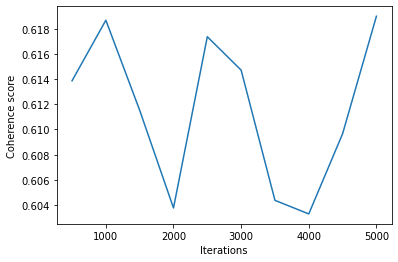

In [9]:
# Show graph
limit=5500; start=500; step=500;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Iterations")
plt.ylabel("Coherence score")
#plt.savefig('20240221_PhD_MalletLDALtr-Coherence')
plt.show()

In [10]:
# Print the coherence and perplexity scores
for m, cv in zip(x, coherence_values):
    print("Iterations =", m, 'Coherence: ', round(cv, 4))

Iterations = 500 Coherence:  0.6139
Iterations = 1000 Coherence:  0.6187
Iterations = 1500 Coherence:  0.6115
Iterations = 2000 Coherence:  0.6038
Iterations = 2500 Coherence:  0.6174
Iterations = 3000 Coherence:  0.6147
Iterations = 3500 Coherence:  0.6044
Iterations = 4000 Coherence:  0.6033
Iterations = 4500 Coherence:  0.6097
Iterations = 5000 Coherence:  0.619


In [11]:
# Coherence for 11-topic, 41-alpha, 1k-iteration model
print(coherence_values[1])

# Topics
malletModel = model_list[1]
model_topics = malletModel.show_topics(formatted=False)
pprint(sorted(malletModel.print_topics(num_words=20)))

# Convert results to lda model format for visualization.
MalletLDA = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(malletModel)

# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(MalletLDA, corpus, id2word, sort_topics=False)
vis

0.6186700345317068
[(0,
  '0.053*"cook" + 0.046*"wash" + 0.034*"breakfast" + 0.034*"bread" + '
  '0.034*"work" + 0.029*"finish" + 0.028*"today" + 0.027*"tonight" + '
  '0.025*"dress" + 0.025*"set" + 0.022*"clean" + 0.021*"clothe" + '
  '0.020*"catch" + 0.017*"lot" + 0.016*"fish" + 0.016*"mesurier" + '
  '0.015*"iron" + 0.015*"begin" + 0.014*"washing" + 0.014*"afternoon"'),
 (1,
  '0.026*"dress" + 0.025*"garden" + 0.025*"home" + 0.023*"child" + '
  '0.023*"stay" + 0.022*"polly" + 0.019*"row" + 0.019*"ride" + 0.019*"mama" + '
  '0.018*"turn" + 0.017*"hope" + 0.015*"sit" + 0.015*"papa" + 0.014*"dick" + '
  '0.014*"flower" + 0.014*"life" + 0.013*"poll" + 0.013*"fall" + '
  '0.012*"willie" + 0.011*"store"'),
 (2,
  '0.091*"call" + 0.050*"drive" + 0.043*"read" + 0.042*"talk" + 0.042*"miss" + '
  '0.034*"hear" + 0.034*"arrive" + 0.028*"church" + 0.025*"meet" + '
  '0.024*"pass" + 0.021*"town" + 0.021*"friend" + 0.019*"home" + 0.018*"hour" '
  '+ 0.017*"expect" + 0.017*"spend" + 0.016*"place" 

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
0      0.238235 -0.153719       1        1  9.937154
1      0.101809 -0.150497       2        1  8.455986
2     -0.118570  0.205837       3        1  8.550202
3      0.071837  0.247085       4        1  9.156761
4     -0.239569 -0.194874       5        1  9.952039
5     -0.259632  0.022713       6        1  9.812222
6      0.088989  0.010959       7        1  8.453737
7      0.116049  0.121595       8        1  8.697981
8      0.082810  0.139939       9        1  8.948732
9      0.150928 -0.174203      10        1  8.493964
10    -0.232885 -0.074836      11        1  9.541223, topic_info=        Term        Freq       Total Category  logprob  loglift
58     horse  543.000000  543.000000  Default  30.0000  30.0000
123     send  538.000000  538.000000  Default  29.0000  29.0000
325     call  546.000000  546.000000  Default  28.0000  28.0000
23      rain  425.000000  425.000000  Default  27.0000  27.0000
108    sleep  381.000000  381.000000  Default  26.0000  26.0000
...      ...         ...         ...      ...      ...      ...
228   office   84.109579  205.272986  Topic11  -4.2304   1.4573
661     town  100.079752  442.423213  Topic11  -4.0566   0.8632
326     hold   52.169232  105.057863  Topic11  -4.7081   1.6495
1885   blyth   50.039876  101.187414  Topic11  -4.7497   1.6454
114     home   50.039876  505.687060  Topic11  -4.7497   0.0365

[761 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
236       9  0.945383       abie
637       7  1.001543   accident
1720      6  0.999815    account
0         4  0.978301       ache
0         9  0.027175       ache
...     ...       ...        ...
1555      6  0.953670       yarn
1152      1  1.005112     yester
134       8  0.405327  yesterday
134      10  0.540436  yesterday
134      11  0.050666  yesterday

[901 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])

In [12]:
MalletLDA.save('20240924_PhD_TopDiaChk_ATM11t41a1000i')
pyLDAvis.save_html(vis, '20240924_PhD_TopDiaChk_ATM11t41a1000i.html')

## 4. Optimize hyperparameters

In [14]:
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for optimize_interval in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=11, alpha=41, iterations=1000, id2word=id2word, random_seed=100, optimize_interval=optimize_interval)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, 
                                                        corpus=corpus, 
                                                        texts=data, 
                                                        start=50, 
                                                        limit=1020, 
                                                        step=20)

Mallet LDA: 11 topics, 4 topic bits, 1111 topic mask
Data loaded.
max tokens: 93
total tokens: 56712
<10> LL/token: -8.4516
<20> LL/token: -7.80564
<30> LL/token: -7.55859
<40> LL/token: -7.43293

0	3.72727	cook bread wash today set tonight clean work clothe catch finish fish mesurier iron cup black job weather dress kitchen 
1	3.72727	dress child stay garden ride turn polly fall sit drive hour mama rain start boy dick poll deal buggy finish 
2	3.72727	read town home hear drive row hope miss talk expect spend play pay return papa party lunch river meet estrange 
3	3.72727	horse breakfast start mail boy bay tom arrive sand sleep bring rest scrub send pack wait buggy lead eat sister 
4	3.72727	call office agree question govt arrange bill carry lose cabinet write answer year report motion move wine club treasurer dine 
5	3.72727	port town train club pound bank dine sell remain wife connor write rise land business meeting pay sale ship vote 
6	3.72727	man bring put room bath change weather

<310> LL/token: -7.23209
<320> LL/token: -7.24579
<330> LL/token: -7.24434
<340> LL/token: -7.25655

0	2.92235	cook wash bread breakfast work tonight finish afternoon today dress clothe lot catch clean set begin fish mesurier iron washing 
1	2.40271	home polly dress row mama stay child garden ride papa dick sit poll willie hope town pick turn show door 
2	2.75953	call drive read miss talk home find hear arrive church meet lunch friend spend play lady stand town book visit 
3	2.86571	tom thing mail boy breakfast bring bay arrive sand find place stay fire rest supper eat water clock scrub people 
4	2.11068	question motion agree govt office bill cabinet vote treasurer member carry club glyde report move ministry answer govr propose blyth 
5	2.51893	port pound town train sell bank rise club pay remain land receive attend meeting return oclock price ship party meet 
6	2.85572	sleep man room weather put bath change send fear call breakfast tomorrow sea board beach water lose enjoy heat thing

<610> LL/token: -7.21662
<620> LL/token: -7.2188
<630> LL/token: -7.22166
<640> LL/token: -7.21847

0	0.90001	cook breakfast bread today wash dress work afternoon finish clothe tonight set weather clean bath send tom bring mesurier fish 
1	0.35673	polly town mama row dress papa dick home stay poll child read ride drive garden sit hour buggy willie church 
2	0.82469	drive call miss friend read hear talk arrive home meet lady breakfast find afternoon people estrange lunch place return expect 
3	0.80767	fire thing sleep bring man boy tom black room rest sand water today bay find light camp scrub hour supper 
4	0.3715	question motion agree govt office vote cabinet club treasurer glyde call member report carry send bill propose genl move answer 
5	0.54734	port town pound train pay dine mill land letter bank call rise church ship oclock find return meeting ride club 
6	0.86979	mail man letter people work send home put weather arrive board place sleep hope child fall drink change room write 


<910> LL/token: -7.06599
<920> LL/token: -7.057
<930> LL/token: -7.06435
<940> LL/token: -7.06265

0	0.28541	cook work breakfast bread afternoon wash send bring today tonight set finish weather dress wind clothe thing lot clean washing 
1	0.09693	home mama row polly town dress papa dick stay drive read child call garden ride thing poll church talk return 
2	0.1266	estrange friend miss drive read talk hear call dress poll book town find supper home polly dance meet bill start 
3	0.18394	horse start boy mile water rain camp travel buggy fire sand breakfast ride scrub thing road drive meet hour rest 
4	0.11647	question motion agree office govt vote treasurer call send glyde club cabinet bill member move report carry dine write govr 
5	0.14551	port town train pound pay drive land letter call mill find dine ship board church receive home arrive read man 
6	0.20924	today mail man sleep tom letter bring drink child write bay send home arrive weather room afternoon head wind place 
7	0.0922	st

[beta: 0.02908] 
<210> LL/token: -7.09722
<220> LL/token: -7.19355
<230> LL/token: -7.1953
<240> LL/token: -7.20763

0	3.36253	cook work wash bread finish tonight set afternoon breakfast today dress clothe catch clean lot fish mesurier iron black washing 
1	3.03431	ride dress child garden stay home fall polly sit mama papa dick life poll hope turn hour willie part show 
2	3.16923	read drive call miss home hear town arrive talk church find lunch friend row spend meet expect play tomorrow visit 
3	3.29748	mail boy tom thing breakfast bay stay find head bring rest water arrive eat sand cup supper scrub pack lead 
4	2.82542	office agree question motion govt cabinet bill club vote answer member report move treasurer carry glyde matter call ministry paper 
5	3.15005	port town train pound club bank dine remain sell rise pay connor land party meet return attend meeting sale receive 
6	3.39611	sleep man room call put breakfast send weather change bath beach clock water sea talk cut board lie st

<510> LL/token: -7.247
<520> LL/token: -7.24545
<530> LL/token: -7.25273
<540> LL/token: -7.24232

0	1.71499	cook work bread wash afternoon breakfast finish dress set clothe clean today catch lot thing tonight bath mesurier weather wind 
1	0.96528	polly town row mama dress papa stay home dick ride poll garden child read pick willie sit turn start show 
2	1.55601	call drive miss hear read arrive friend meet talk church find home spend lady return write afternoon tomorrow lunch visit 
3	1.61315	bring tom fire breakfast bay today thing mail boy sand rest black head sleep lie eat supper turn scrub arrive 
4	0.84243	question motion agree govt office vote member cabinet bill treasurer call glyde report club govr move carry genl answer blyth 
5	1.24046	port town pound train pay land bank rise oclock mill return meeting ship receive club dine attend order board spence 
6	1.83906	man sleep room put find place home people thing work send letter call arrive year change write hour board tomorrow 


<810> LL/token: -7.19745
<820> LL/token: -7.20169
<830> LL/token: -7.19425
[beta: 0.06454] 
<840> LL/token: -7.19615

0	0.58141	cook work today bread breakfast wash bring afternoon dress finish send clothe tonight clean bath tom set mesurier weather catch 
1	0.21078	polly mama row town papa dick home dress stay poll ride read child drive garden sit pick church buggy willie 
2	0.4436	miss call drive breakfast friend arrive find meet read estrange lady home talk lunch return people dress afternoon stand tomorrow 
3	0.45882	thing sleep tom fire breakfast room water rest boy scrub man find supper bring child stay call hour cook tank 
4	0.22331	question motion govt agree office vote treasurer cabinet club call send glyde move bill member genl ministry govr strangeway answer 
5	0.32738	town port pound train pay dine mill land church call letter receive bank ship find meeting rise wife oclock board 
6	0.63455	man home thing place work people send put letter mail find breakfast drink sleep tro

<110> LL/token: -7.17539
<120> LL/token: -7.16871
<130> LL/token: -7.14402
<140> LL/token: -7.14162

0	3.72727	cook wash bread set finish lot work dress today clean black clothe breakfast catch afternoon mesurier fish tonight iron cup 
1	3.72727	home garden ride dress stay fall polly child mama turn hour sit dick life deal poll glass boy thing pick 
2	3.72727	call read drive town talk miss hear find church home return friend arrive row spend lunch papa expect hope play 
3	3.72727	breakfast tom mail boy thing bay arrive rest stay sand eat place water supper scrub hand pack find lead head 
4	3.72727	office agree question motion govt return bill cabinet carry vote answer member report move treasurer paper glyde ministry year genl 
5	3.72727	port town pound club train dine remain bank rise sell speak connor meeting land attend meet pay ship price ton 
6	3.72727	man sleep room weather send thing bath call change put tomorrow meat light sea cut lose lie sit write breakfast 
7	3.72727	work af

<410> LL/token: -7.25496
<420> LL/token: -7.2615
<430> LL/token: -7.26151
<440> LL/token: -7.25191

0	2.89393	cook work bread wash finish set breakfast dress tonight clothe afternoon catch today clean lot begin mesurier fish iron weather 
1	2.38479	dress stay polly home child row mama garden papa dick ride poll sit willie town door pick show turn hope 
2	2.73855	call drive read miss hear home meet talk church friend lunch return spend expect stand arrive hour lady book people 
3	2.85205	thing tom bay water bring mail fire breakfast today sand sheep black rest eat supper head scrub stay pack clock 
4	2.06822	question motion govt office agree cabinet bill club answer vote member report carry treasurer glyde ministry genl move govr strangeway 
5	2.49818	port pound town train sell pay club bank rise oclock dine land attend meeting receive ship remain party price return 
6	2.86152	man sleep find room place breakfast arrive bath afternoon put send board play call thing sea people lose beach 

<710> LL/token: -7.2663
[beta: 0.05387] 
<720> LL/token: -7.24799
<730> LL/token: -7.24747
<740> LL/token: -7.24384

0	1.38542	cook today bread work wash breakfast tonight dress finish set afternoon clothe clean tom send lot catch bath bring iron 
1	0.68967	polly row dress town mama papa home dick poll stay garden willie ride turn child pick read show start sit 
2	1.20869	call drive miss read hear meet friend talk lunch home spend write lady find arrive letter expect stand life tomorrow 
3	1.27212	fire thing water boy put bring black sand rest sleep breakfast room bay hour light lie scrub rain head tom 
4	0.60329	question motion govt agree office call vote cabinet member treasurer blyth bill glyde report club answer matter govr genl move 
5	0.89421	port town pound train pay land dine mill bank receive ship meeting call attend oclock rise doctor board spence church 
6	1.44867	man sleep mail arrive breakfast people place find weather room home wash thing change put letter board drink wif

Mallet LDA: 11 topics, 4 topic bits, 1111 topic mask
Data loaded.
max tokens: 93
total tokens: 56712
<10> LL/token: -8.4516
<20> LL/token: -7.80564
<30> LL/token: -7.55859
<40> LL/token: -7.43293

0	3.72727	cook bread wash today set tonight clean work clothe catch finish fish mesurier iron cup black job weather dress kitchen 
1	3.72727	dress child stay garden ride turn polly fall sit drive hour mama rain start boy dick poll deal buggy finish 
2	3.72727	read town home hear drive row hope miss talk expect spend play pay return papa party lunch river meet estrange 
3	3.72727	horse breakfast start mail boy bay tom arrive sand sleep bring rest scrub send pack wait buggy lead eat sister 
4	3.72727	call office agree question govt arrange bill carry lose cabinet write answer year report motion move wine club treasurer dine 
5	3.72727	port town train club pound bank dine sell remain wife connor write rise land business meeting pay sale ship vote 
6	3.72727	man bring put room bath change weather

<310> LL/token: -7.22504
<320> LL/token: -7.23148
[beta: 0.04112] 
<330> LL/token: -7.20011
<340> LL/token: -7.25145

0	2.89121	cook work wash bread breakfast tonight set finish dress today clothe catch lot clean afternoon fish mesurier iron begin washing 
1	2.37465	dress home stay polly child row mama hope ride sit garden papa dick poll hour willie town turn show pick 
2	2.74078	call drive read miss talk home hear arrive church friend spend place stand lady meet town wine lunch find visit 
3	2.82508	tom thing breakfast boy bring mail bay arrive stay water sand rest eat place fire head supper clock scrub sheep 
4	2.09397	agree question motion govt office bill cabinet vote club answer member move treasurer carry glyde report ministry genl govr return 
5	2.52559	port pound town train club dine bank rise pay land attend remain meet oclock sell meeting ship lose receive doctor 
6	2.93654	sleep man find room weather send bath play call change beach afternoon put breakfast lie fear sea board

<610> LL/token: -7.26189
<620> LL/token: -7.26141
<630> LL/token: -7.27923
<640> LL/token: -7.26567

0	2.04537	cook bread wash work dress finish today afternoon breakfast clothe clean set tonight lot catch fish mesurier iron washing weather 
1	1.27842	polly row town mama dress read papa dick stay poll ride garden child turn sit show church home pick drive 
2	1.94579	drive call miss home find meet talk friend hear read arrive tomorrow breakfast lady stand place hour visit expect estrange 
3	1.95489	thing tom breakfast fire bring water bay boy put rest sand eat place black scrub head mail light pack cook 
4	1.13771	question agree motion govt office cabinet vote club treasurer glyde bill member ministry genl answer carry govr report move call 
5	1.52666	port town pound train pay receive church call rise oclock dine bank land ship meeting return lose attend spence ride 
6	2.14593	man sleep room send letter home play find people change arrive mail work weather bath board thing fall fear han

<910> LL/token: -7.24339
<920> LL/token: -7.24533
<930> LL/token: -7.2541
<940> LL/token: -7.24641

0	1.12127	cook bread work breakfast wash bring today tonight afternoon finish set dress tom clothe send clean catch lot mesurier iron 
1	0.47278	polly row mama home town stay papa dick dress poll garden drive child read ride pick turn church willie call 
2	0.98567	call miss drive read hear arrive friend meet talk home expect place afternoon lady estrange breakfast find lunch hope town 
3	0.96333	thing fire water rain sand find bring fall rest light scrub boy put hour cut black room wind head man 
4	0.47449	question motion govt agree office cabinet vote member treasurer glyde report bill move club carry send govr genl call strangeway 
5	0.68229	port town train pound pay mill land dine letter meeting church ship find oclock board ride receive attend call bank 
6	1.16235	man mail sleep breakfast room home people letter put send work today place wash drink change tom child dress bath 
7	0.48

<210> LL/token: -7.13384
<220> LL/token: -7.14231
<230> LL/token: -7.132
<240> LL/token: -7.13363

0	3.72727	cook wash bread work tonight finish set afternoon today breakfast dress clothe catch clean tom fish mesurier iron lot washing 
1	3.72727	ride garden dress child home stay fall polly sit mama row turn part hour papa dick life poll hope willie 
2	3.72727	call read drive miss hear home talk arrive town church find meet lunch friend spend return hand expect wine pass 
3	3.72727	mail boy thing tom bay breakfast rest stay head arrive sand cup eat find supper scrub pack bring lead water 
4	3.72727	office agree question motion govt bill return cabinet vote answer member report carry move treasurer glyde matter paper ministry genl 
5	3.72727	port town train club pound remain bank dine sell rise speak pay connor land attend party meet meeting receive read 
6	3.72727	sleep man room weather breakfast put call bath change water send beach clock lie sea cut board tomorrow enjoy heat 
7	3.7272

<510> LL/token: -7.25448
[beta: 0.04597] 
<520> LL/token: -7.22989
<530> LL/token: -7.24616
<540> LL/token: -7.25101

0	2.4606	cook wash bread work finish breakfast dress clean clothe set afternoon lot catch today tonight mesurier fish bath iron washing 
1	1.77647	dress polly home row town mama sit ride stay papa garden dick poll willie estrange show pick child hope start 
2	2.33644	call drive read miss talk hear return meet home arrive friend tomorrow church lunch hour find spend play expect lady 
3	2.35106	tom fire mail breakfast thing water black bring rest boy sand eat bay arrive lie supper light today hour head 
4	1.51496	agree question motion govt office club bill vote cabinet member report treasurer glyde carry ministry answer govr move genl call 
5	1.95552	port pound town train pay rise bank receive land oclock meeting attend ship order meet dine return lose charge board 
6	2.4952	man sleep find place room send weather people write put change letter breakfast bath work fear dri

<810> LL/token: -7.22839
<820> LL/token: -7.24435
<830> LL/token: -7.2443
<840> LL/token: -7.24662

0	1.6861	cook breakfast wash bread today tonight work dress finish afternoon clothe set clean tom bath weather fish mesurier catch washing 
1	0.91812	polly row town mama home dress papa read dick poll sit stay child estrange willie church talk ride pick turn 
2	1.62	call drive miss meet read hear friend lunch expect find spend play arrive breakfast stand talk sleep hour lady return 
3	1.55203	water fire thing bring boy tom rest sand bay black rain eat scrub head light supper lie put hour room 
4	0.80899	question motion agree govt office cabinet vote bill treasurer glyde matter member call ministry move genl report propose club answer 
5	1.12374	port town pound train pay land receive mill dine church meeting rise bank ship call club oclock board employ attend 
6	1.83872	man work send mail letter sleep home put room find people write place arrive child weather change tomorrow hope part 
7	

<110> LL/token: -7.17539
<120> LL/token: -7.16871
<130> LL/token: -7.14402
<140> LL/token: -7.14162

0	3.72727	cook wash bread set finish lot work dress today clean black clothe breakfast catch afternoon mesurier fish tonight iron cup 
1	3.72727	home garden ride dress stay fall polly child mama turn hour sit dick life deal poll glass boy thing pick 
2	3.72727	call read drive town talk miss hear find church home return friend arrive row spend lunch papa expect hope play 
3	3.72727	breakfast tom mail boy thing bay arrive rest stay sand eat place water supper scrub hand pack find lead head 
4	3.72727	office agree question motion govt return bill cabinet carry vote answer member report move treasurer paper glyde ministry year genl 
5	3.72727	port town pound club train dine remain bank rise sell speak connor meeting land attend meet pay ship price ton 
6	3.72727	man sleep room weather send thing bath call change put tomorrow meat light sea cut lose lie sit write breakfast 
7	3.72727	work af

<410> LL/token: -7.22548
<420> LL/token: -7.21867
<430> LL/token: -7.21847
<440> LL/token: -7.21611

0	3.35206	cook wash work bread finish afternoon breakfast dress set clothe catch clean tonight mesurier today fish begin iron washing lot 
1	3.05755	home stay dress child polly row garden town mama hope sit papa return dick ride poll turn willie flower door 
2	3.23353	call read drive miss talk hear find home meet church friend arrive hour play lunch stand expect lady book spend 
3	3.29714	thing water tom bring breakfast fire arrive boy rest bay find mail head sand eat supper scrub light lie pack 
4	2.78335	agree question office motion govt bill cabinet club answer vote report member carry treasurer glyde ministry genl move return govr 
5	3.07518	port pound town train club bank pay rise sell land dine remain attend meeting receive ship price lose share midnight 
6	3.29381	sleep man room place put breakfast bath change weather people today board send sea beach clock thing sit drink cut 
7

<710> LL/token: -7.27401
<720> LL/token: -7.27435
<730> LL/token: -7.28388
<740> LL/token: -7.26848

0	2.46356	cook bread wash breakfast work today afternoon finish dress clothe catch tonight mail clean lot set tom fish mesurier iron 
1	1.75902	polly dress row mama garden ride stay town papa dick poll turn home sit willie pick child deal show buggy 
2	2.342	call drive miss home talk hear read meet friend arrive lunch spend write church lady stand tomorrow book expect estrange 
3	2.34092	thing water fire black put boy rest bring sand hour fear find scrub light man lie cut rain supper wind 
4	1.53086	question motion govt office agree cabinet bill blyth vote member report call treasurer glyde ministry matter dine answer govr genl 
5	1.97899	port town pound train pay attend land receive meeting oclock bank ship party pass board buy lose find meet rise 
6	2.41487	sleep man room home find breakfast play weather people send place bath arrive letter change fall thing drink mail enjoy 
7	1.7049

Mallet LDA: 11 topics, 4 topic bits, 1111 topic mask
Data loaded.
max tokens: 93
total tokens: 56712
<10> LL/token: -8.4516
<20> LL/token: -7.80564
<30> LL/token: -7.55859
<40> LL/token: -7.43293

0	3.72727	cook bread wash today set tonight clean work clothe catch finish fish mesurier iron cup black job weather dress kitchen 
1	3.72727	dress child stay garden ride turn polly fall sit drive hour mama rain start boy dick poll deal buggy finish 
2	3.72727	read town home hear drive row hope miss talk expect spend play pay return papa party lunch river meet estrange 
3	3.72727	horse breakfast start mail boy bay tom arrive sand sleep bring rest scrub send pack wait buggy lead eat sister 
4	3.72727	call office agree question govt arrange bill carry lose cabinet write answer year report motion move wine club treasurer dine 
5	3.72727	port town train club pound bank dine sell remain wife connor write rise land business meeting pay sale ship vote 
6	3.72727	man bring put room bath change weather

<310> LL/token: -7.12975
<320> LL/token: -7.12776
<330> LL/token: -7.13015
[beta: 0.02967] 
<340> LL/token: -7.08508

0	3.35203	cook work wash bread finish set afternoon breakfast today tonight dress clean clothe catch lot begin fish mesurier iron washing 
1	3.04633	home dress ride stay child polly garden row mama sit hope papa fall dick poll tomorrow turn willie deal door 
2	3.23024	call read drive miss talk home hear town church friend arrive return play lunch find spend wine expect visit meet 
3	3.28136	tom breakfast boy mail bay thing arrive head stay sand bring eat cup water rest supper scrub place fire feed 
4	2.78358	agree question motion govt office bill cabinet paper vote answer report club carry member move treasurer glyde blyth business ministry 
5	3.05992	port town pound train club dine remain bank sell rise pay land attend meet speak meeting sale ship price account 
6	3.28544	sleep man room weather find put bath change water beach thing clock sea cut breakfast board dust d

<610> LL/token: -7.24655
<620> LL/token: -7.24717
<630> LL/token: -7.255
<640> LL/token: -7.25486

0	2.87689	cook bread breakfast today finish work dress wash afternoon tonight clothe clean set catch weather fish lot mesurier iron bath 
1	2.3408	polly dress row child mama home town garden stay turn ride papa dick sit poll willie show hour pick read 
2	2.74416	call drive miss read talk home hear arrive friend lunch church find play spend tomorrow meet expect lady wine place 
3	2.78572	thing tom bring fire bay boy water rest black today sand eat sheep head supper scrub arrive light camp feed 
4	2.07428	question agree motion govt office cabinet club vote member report treasurer glyde bill ministry carry call genl move govr answer 
5	2.48645	port pound town train bank rise pay receive oclock land meeting party club attend ship dine return sell remain lose 
6	2.88236	sleep man room mail find send home breakfast change write beach place letter bath people hope vessel board return put 
7	2.26

<910> LL/token: -7.26371
<920> LL/token: -7.26131
<930> LL/token: -7.26383
<940> LL/token: -7.26759

0	2.04441	cook wash bread breakfast today afternoon work dress finish tonight lot clothe set bath tom catch clean mesurier iron washing 
1	1.24593	polly dress row mama town home stay papa dick garden poll ride read turn pick hour child show church hope 
2	1.88285	call drive miss talk hear home read meet lunch find friend expect spend stand lady play tomorrow year place arrive 
3	1.85366	water fire thing boy bay rest sand bring tom eat scrub hand black head light put camp sheep fear supper 
4	1.10597	question motion govt agree office cabinet vote member report bill treasurer glyde carry genl move club call govr ministry strangeway 
5	1.51495	port town pound train pay dine land call oclock mill receive church meeting ship attend party settle order spence doctor 
6	2.16442	send man sleep mail room home letter write find weather return arrive place breakfast people change work hope bring bo

<210> LL/token: -7.13384
<220> LL/token: -7.14231
<230> LL/token: -7.132
<240> LL/token: -7.13363

0	3.72727	cook wash bread work tonight finish set afternoon today breakfast dress clothe catch clean tom fish mesurier iron lot washing 
1	3.72727	ride garden dress child home stay fall polly sit mama row turn part hour papa dick life poll hope willie 
2	3.72727	call read drive miss hear home talk arrive town church find meet lunch friend spend return hand expect wine pass 
3	3.72727	mail boy thing tom bay breakfast rest stay head arrive sand cup eat find supper scrub pack bring lead water 
4	3.72727	office agree question motion govt bill return cabinet vote answer member report carry move treasurer glyde matter paper ministry genl 
5	3.72727	port town train club pound remain bank dine sell rise speak pay connor land attend party meet meeting receive read 
6	3.72727	sleep man room weather breakfast put call bath change water send beach clock lie sea cut board tomorrow enjoy heat 
7	3.7272

<510> LL/token: -7.20946
<520> LL/token: -7.20708
<530> LL/token: -7.21925
<540> LL/token: -7.21454

0	3.34052	cook work bread wash finish dress today set clean breakfast clothe lot catch afternoon tonight mesurier weather fish iron washing 
1	3.03625	home dress stay polly sit row mama garden turn ride child run papa hope dick poll willie deal show pick 
2	3.2376	call drive read miss hear talk home church arrive friend people return town spend meet play stand find lady hour 
3	3.27719	tom fire bring thing water bay black boy breakfast head sand sheep rest eat mail lie hour scrub supper light 
4	2.78652	agree question motion govt office bill club cabinet carry vote member report treasurer answer glyde move intend ministry genl govr 
5	3.05691	port pound town train bank rise pay receive land speak club meeting oclock dine return meet price ship attend account 
6	3.28208	sleep man find room breakfast put change bath thing fear lunch board lose heat dust cut repair open enjoy drink 
7	2.93

<810> LL/token: -7.25195
<820> LL/token: -7.27888
<830> LL/token: -7.26944
<840> LL/token: -7.27205

0	2.44401	cook bread wash today work finish dress breakfast afternoon tonight clothe clean set catch mail bath tom weather fish mesurier 
1	1.71356	polly dress row mama town papa child dick ride poll sit garden stay willie home read show pick hour turn 
2	2.34182	call drive miss read talk home meet hear find friend letter play expect spend arrive church stand lady tomorrow write 
3	2.34116	water bay fire thing tom boy head rest rain sand black bring hour breakfast wash scrub eat mail light supper 
4	1.50959	question motion agree govt office cabinet vote report answer treasurer glyde move bill carry ministry member genl govr propose club 
5	1.92841	port pound town train pay dine land rise receive meeting oclock club bank ship attend return board lose order call 
6	2.429	man sleep find room breakfast place put arrive people home change weather work fear return sea drink repair heat open 


<110> LL/token: -7.17539
<120> LL/token: -7.16871
<130> LL/token: -7.14402
<140> LL/token: -7.14162

0	3.72727	cook wash bread set finish lot work dress today clean black clothe breakfast catch afternoon mesurier fish tonight iron cup 
1	3.72727	home garden ride dress stay fall polly child mama turn hour sit dick life deal poll glass boy thing pick 
2	3.72727	call read drive town talk miss hear find church home return friend arrive row spend lunch papa expect hope play 
3	3.72727	breakfast tom mail boy thing bay arrive rest stay sand eat place water supper scrub hand pack find lead head 
4	3.72727	office agree question motion govt return bill cabinet carry vote answer member report move treasurer paper glyde ministry year genl 
5	3.72727	port town pound club train dine remain bank rise sell speak connor meeting land attend meet pay ship price ton 
6	3.72727	man sleep room weather send thing bath call change put tomorrow meat light sea cut lose lie sit write breakfast 
7	3.72727	work af

<410> LL/token: -7.21031
[beta: 0.0396] 
<420> LL/token: -7.19476
<430> LL/token: -7.22628
<440> LL/token: -7.23428

0	2.92712	cook work wash bread finish dress breakfast afternoon set clothe catch tonight bath clean begin mesurier fish iron today washing 
1	2.34826	home dress child stay polly row mama garden ride papa dick poll sit willie turn pick flower hope show return 
2	2.72197	call drive read miss hear talk church friend lunch remain arrive pass expect stand spend meet people find lady town 
3	2.81228	tom bring breakfast mail bay today arrive water rest stay thing sheep eat black sand head hour supper scrub cup 
4	2.103	question motion govt office agree cabinet club vote answer bill carry member report treasurer glyde ministry genl govr propose move 
5	2.52319	port pound town train sell pay bank club dine land receive rise meeting attend return remain ship price party lose 
6	2.96814	man find sleep room place put home weather people send breakfast thing change fall board sit cal

<710> LL/token: -7.25397
<720> LL/token: -7.2547
<730> LL/token: -7.27078
<740> LL/token: -7.2604

0	2.48109	cook bread wash work breakfast finish afternoon tonight set dress today clothe clean bath catch lot fish mesurier iron weather 
1	1.74226	polly row mama dress town ride stay home papa dick garden sit poll turn child willie pick deal pass church 
2	2.30861	call drive miss hear meet read home talk letter arrive find friend lunch expect spend tomorrow lady stand family write 
3	2.36881	bring fire bay today tom thing child mail water rest breakfast boy black room sheep turn scrub hour sleep light 
4	1.53272	question motion govt agree office bill call blyth vote cabinet member report treasurer glyde carry club move govr genl matter 
5	1.94763	port town pound train pay land meeting dine receive attend oclock ship bank rise mail return mill board church spence 
6	2.55023	man sleep find thing put home place work people breakfast room trouble change drink arrive board sit year fall remai

Mallet LDA: 11 topics, 4 topic bits, 1111 topic mask
Data loaded.
max tokens: 93
total tokens: 56712
<10> LL/token: -8.4516
<20> LL/token: -7.80564
<30> LL/token: -7.55859
<40> LL/token: -7.43293

0	3.72727	cook bread wash today set tonight clean work clothe catch finish fish mesurier iron cup black job weather dress kitchen 
1	3.72727	dress child stay garden ride turn polly fall sit drive hour mama rain start boy dick poll deal buggy finish 
2	3.72727	read town home hear drive row hope miss talk expect spend play pay return papa party lunch river meet estrange 
3	3.72727	horse breakfast start mail boy bay tom arrive sand sleep bring rest scrub send pack wait buggy lead eat sister 
4	3.72727	call office agree question govt arrange bill carry lose cabinet write answer year report motion move wine club treasurer dine 
5	3.72727	port town train club pound bank dine sell remain wife connor write rise land business meeting pay sale ship vote 
6	3.72727	man bring put room bath change weather

<310> LL/token: -7.23027
<320> LL/token: -7.22711
<330> LL/token: -7.21542
<340> LL/token: -7.22525

0	3.3473	cook work wash bread finish dress breakfast set today clean lot clothe catch afternoon tonight begin fish mesurier iron washing 
1	3.03814	home dress child polly ride row garden stay mama sit papa hope dick turn poll part willie return pick show 
2	3.19406	call read drive miss hear talk arrive town church home friend spend people tomorrow wine lunch glass visit find book 
3	3.29394	tom mail thing boy breakfast bay bring black head sand arrive eat fire water place supper rest scrub feed stay 
4	2.79614	agree question motion govt bill office cabinet club vote carry member report move treasurer glyde answer ministry govr speak genl 
5	3.1107	port pound town train club bank sell rise pay remain land attend meet meeting return price ship account speak party 
6	3.3479	sleep man find room put breakfast bath weather change home water call sea play board lunch send enjoy heat beach 
7	2

<610> LL/token: -7.25634
<620> LL/token: -7.24801
<630> LL/token: -7.26623
<640> LL/token: -7.25862

0	2.89159	cook bread finish work breakfast wash dress today afternoon clean tonight clothe catch lot set fish mesurier iron bath washing 
1	2.33668	home polly dress row child mama garden town ride stay papa dick sit read poll willie turn show pick deal 
2	2.72409	call drive miss home talk hear read find meet friend tomorrow arrive expect lunch year spend place lady book hour 
3	2.82532	thing put bring water fire bay tom black mail rest wash sand eat scrub breakfast head turn light boy place 
4	2.08058	question agree motion govt office cabinet club vote member report bill treasurer answer glyde carry matter ministry genl move govr 
5	2.52205	port pound town train pay bank receive rise oclock land party call dine meeting ship attend pass return meet church 
6	2.88561	sleep man room find weather play people breakfast change bath fear fall arrive board place drink send telegraph sit bottle 

<910> LL/token: -7.27582
[beta: 0.04973] 
<920> LL/token: -7.2527
<930> LL/token: -7.25163
<940> LL/token: -7.26477

0	2.03997	cook wash bread breakfast work afternoon finish today dress tonight set lot clothe catch clean wind tom mesurier fish iron 
1	1.24278	dress polly town row mama stay home papa dick ride child poll garden sit pick show turn read hope life 
2	1.89312	call drive miss hear home read talk arrive friend find meet expect place stand lunch tomorrow estrange book lady hour 
3	1.94519	thing water fire rain put find boy rest bring sand hand wind scrub hour place sleep black light cut head 
4	1.10393	question motion agree govt office cabinet club vote member report treasurer glyde bill genl call govr move carry ministry propose 
5	1.53431	port pound town train pay land bank oclock receive call meeting church attend mill party ship board dine meet spence 
6	2.00722	man sleep room breakfast people bath fall change find weather play home drink today arrive send lunch telegraph

<210> LL/token: -7.13384
<220> LL/token: -7.14231
<230> LL/token: -7.132
<240> LL/token: -7.13363

0	3.72727	cook wash bread work tonight finish set afternoon today breakfast dress clothe catch clean tom fish mesurier iron lot washing 
1	3.72727	ride garden dress child home stay fall polly sit mama row turn part hour papa dick life poll hope willie 
2	3.72727	call read drive miss hear home talk arrive town church find meet lunch friend spend return hand expect wine pass 
3	3.72727	mail boy thing tom bay breakfast rest stay head arrive sand cup eat find supper scrub pack bring lead water 
4	3.72727	office agree question motion govt bill return cabinet vote answer member report carry move treasurer glyde matter paper ministry genl 
5	3.72727	port town train club pound remain bank dine sell rise speak pay connor land attend party meet meeting receive read 
6	3.72727	sleep man room weather breakfast put call bath change water send beach clock lie sea cut board tomorrow enjoy heat 
7	3.7272

<510> LL/token: -7.23027
<520> LL/token: -7.23515
<530> LL/token: -7.23817
<540> LL/token: -7.23739

0	2.90841	cook work bread wash finish dress breakfast clean afternoon lot clothe tonight catch set today begin mesurier fish iron washing 
1	2.35037	dress polly home town row mama sit stay garden ride papa dick child poll willie hope estrange show pick flower 
2	2.79043	call drive read miss hear talk home return arrive friend meet church tomorrow year lunch spend find write lady expect 
3	2.81067	tom mail bay thing bring fire breakfast boy black arrive rest sand sheep eat supper clock today scrub light pack 
4	2.08247	agree question motion govt office bill club vote cabinet member report carry treasurer answer glyde ministry blyth genl govr call 
5	2.48574	port pound town train bank remain rise pay receive land meeting oclock order ship dine attend lose party return club 
6	2.86479	sleep man room find weather people change put bath home water send fall hour place fear sea drink hope boa

<810> LL/token: -7.24894
<820> LL/token: -7.26924
<830> LL/token: -7.26777
<840> LL/token: -7.26908

0	2.44644	cook wash bread breakfast work finish dress afternoon today tonight clothe clean set catch bath wind weather fish mesurier lot 
1	1.72941	polly row mama dress town read papa home stay dick sit poll child ride drive estrange willie garden pick show 
2	2.40148	call drive miss meet home talk read lunch arrive find expect friend hear spend play return stand lady visit church 
3	2.34127	tom bring fire water bay thing boy rest head sand black hour eat mail breakfast supper sheep scrub light today 
4	1.52126	question motion govt agree office cabinet club vote report member bill treasurer move glyde answer ministry genl carry govr propose 
5	1.9464	port pound town train pay land meeting oclock receive rise bank attend ship dine pass party mill board church lose 
6	2.45019	man sleep find room weather people breakfast change home letter send fear hope arrive place fall sea thing put boa

<110> LL/token: -7.17539
<120> LL/token: -7.16871
<130> LL/token: -7.14402
<140> LL/token: -7.14162

0	3.72727	cook wash bread set finish lot work dress today clean black clothe breakfast catch afternoon mesurier fish tonight iron cup 
1	3.72727	home garden ride dress stay fall polly child mama turn hour sit dick life deal poll glass boy thing pick 
2	3.72727	call read drive town talk miss hear find church home return friend arrive row spend lunch papa expect hope play 
3	3.72727	breakfast tom mail boy thing bay arrive rest stay sand eat place water supper scrub hand pack find lead head 
4	3.72727	office agree question motion govt return bill cabinet carry vote answer member report move treasurer paper glyde ministry year genl 
5	3.72727	port town pound club train dine remain bank rise sell speak connor meeting land attend meet pay ship price ton 
6	3.72727	man sleep room weather send thing bath call change put tomorrow meat light sea cut lose lie sit write breakfast 
7	3.72727	work af

<410> LL/token: -7.2204
<420> LL/token: -7.21909
<430> LL/token: -7.22115
<440> LL/token: -7.21495

0	3.34888	cook wash bread work finish dress lot set breakfast clean clothe afternoon catch tonight mesurier fish iron begin washing job 
1	3.05394	home dress stay polly garden row ride mama child papa sit dick turn poll return town willie flower show pick 
2	3.21138	call drive read miss hear talk arrive church meet home friend lunch hour pass expect spend stand book year people 
3	3.30037	tom thing water bay mail fire bring head black today sand breakfast rest place supper scrub arrive eat boy pack 
4	2.79305	agree question office motion govt bill cabinet answer vote club report carry member paper treasurer glyde ministry genl move govr 
5	3.08122	port pound town train club sell pay bank receive rise meeting dine land return remain ship attend price whist read 
6	3.29602	sleep man find room breakfast put place weather bath child change board thing sea send beach call sit play heat 
7	2.8

<710> LL/token: -7.2538
<720> LL/token: -7.24618
<730> LL/token: -7.25961
<740> LL/token: -7.23945

0	2.87106	cook bread breakfast work wash tonight finish today dress afternoon set clothe clean catch lot fish iron mesurier washing weather 
1	2.33795	polly dress row mama home ride garden town turn papa stay child dick poll willie sit life pick flower return 
2	2.76197	call drive miss talk home hear read meet lunch arrive find friend church spend tomorrow lady expect stand book estrange 
3	2.82277	thing bring fire bay tom water rest black boy put head sand scrub cut sheep eat light lie wash kill 
4	2.06231	question motion govt agree office bill cabinet vote member report carry club treasurer glyde matter move ministry answer govr genl 
5	2.46443	port town pound train pay land attend receive return dine meeting order rise ship board oclock call mill bank year 
6	2.86992	sleep man room mail find breakfast place people weather play arrive letter bath put change home drink hour enjoy half 


Mallet LDA: 11 topics, 4 topic bits, 1111 topic mask
Data loaded.
max tokens: 93
total tokens: 56712
<10> LL/token: -8.4516
<20> LL/token: -7.80564
<30> LL/token: -7.55859
<40> LL/token: -7.43293

0	3.72727	cook bread wash today set tonight clean work clothe catch finish fish mesurier iron cup black job weather dress kitchen 
1	3.72727	dress child stay garden ride turn polly fall sit drive hour mama rain start boy dick poll deal buggy finish 
2	3.72727	read town home hear drive row hope miss talk expect spend play pay return papa party lunch river meet estrange 
3	3.72727	horse breakfast start mail boy bay tom arrive sand sleep bring rest scrub send pack wait buggy lead eat sister 
4	3.72727	call office agree question govt arrange bill carry lose cabinet write answer year report motion move wine club treasurer dine 
5	3.72727	port town train club pound bank dine sell remain wife connor write rise land business meeting pay sale ship vote 
6	3.72727	man bring put room bath change weather

<310> LL/token: -7.20706
<320> LL/token: -7.22202
<330> LL/token: -7.221
<340> LL/token: -7.21698

0	3.34626	cook work wash bread finish afternoon dress clean clothe catch tonight lot breakfast today set begin fish mesurier iron washing 
1	3.05352	home dress stay polly child ride row mama garden sit turn papa hope dick poll fall part willie flower hour 
2	3.2242	call read drive talk miss hear town church home lunch arrive friend return play spend find pass meet stand book 
3	3.30113	tom mail boy bay breakfast arrive thing head bring sand eat black cup stay water supper fear rest pack scrub 
4	2.7853	agree question motion govt office bill cabinet club vote carry member report move treasurer glyde answer ministry blyth business genl 
5	3.07969	port pound town train club dine bank remain rise pay land attend return meeting meet speak sale ship price receive 
6	3.29745	sleep man room weather find breakfast put bath change thing beach water people drink sea call tomorrow dust noon enjoy 
7	

<610> LL/token: -7.23847
<620> LL/token: -7.24157
<630> LL/token: -7.26052
<640> LL/token: -7.25188

0	2.90624	cook bread wash breakfast finish work dress today afternoon tonight clothe clean set catch weather lot fish mesurier iron washing 
1	2.3546	home dress polly row garden mama town child ride papa dick sit poll willie turn stay pick show fall deal 
2	2.75102	call drive read miss talk home find hear meet lunch friend arrive spend place expect lady stand hour book visit 
3	2.8113	bring thing bay fire tom water black rest mail boy sand sheep eat arrive wash supper scrub light breakfast camp 
4	2.06527	agree question motion govt office cabinet club vote member report treasurer bill glyde matter ministry answer carry genl move govr 
5	2.4526	pound port train town receive pay rise meeting land oclock bank call party dine ship board lose attend return church 
6	2.86133	man sleep room put weather find play people place change bath send fear arrive breakfast tomorrow letter drink break en

<910> LL/token: -7.25807
<920> LL/token: -7.26562
<930> LL/token: -7.26561
<940> LL/token: -7.27197

0	2.47738	cook wash breakfast bread afternoon finish work dress today set tonight clothe lot catch clean mail fish iron mesurier bath 
1	1.73846	dress polly home garden row town mama stay papa dick poll child ride willie turn sit pick read show hope 
2	2.29209	call drive miss hear home talk read meet return lunch arrive friend find expect spend stand lady tomorrow year church 
3	2.33516	thing bay fire bring water boy tom rest black sand rain eat today mail sheep scrub arrive light head feed 
4	1.49769	question motion govt office agree cabinet vote club member report treasurer move bill glyde carry govr genl answer call strangeway 
5	1.91522	port pound town train pay land receive oclock meeting dine attend ship board settle mill party spence church bank ride 
6	2.43481	man sleep room place find put play change work people breakfast weather bath break send fear drink telegraph heat half 


<210> LL/token: -7.13384
<220> LL/token: -7.14231
<230> LL/token: -7.132
<240> LL/token: -7.13363

0	3.72727	cook wash bread work tonight finish set afternoon today breakfast dress clothe catch clean tom fish mesurier iron lot washing 
1	3.72727	ride garden dress child home stay fall polly sit mama row turn part hour papa dick life poll hope willie 
2	3.72727	call read drive miss hear home talk arrive town church find meet lunch friend spend return hand expect wine pass 
3	3.72727	mail boy thing tom bay breakfast rest stay head arrive sand cup eat find supper scrub pack bring lead water 
4	3.72727	office agree question motion govt bill return cabinet vote answer member report carry move treasurer glyde matter paper ministry genl 
5	3.72727	port town train club pound remain bank dine sell rise speak pay connor land attend party meet meeting receive read 
6	3.72727	sleep man room weather breakfast put call bath change water send beach clock lie sea cut board tomorrow enjoy heat 
7	3.7272

<510> LL/token: -7.22506
<520> LL/token: -7.22116
<530> LL/token: -7.21832
<540> LL/token: -7.20755

0	3.3526	cook work bread afternoon wash finish breakfast dress clothe clean catch today set begin tonight bath mesurier fish iron washing 
1	3.05629	home dress sit polly stay row mama child garden hope town ride papa dick turn poll willie estrange show deal 
2	3.23419	call drive miss hear read arrive talk home meet people church friend year hour spend find lady wine expect stand 
3	3.29171	tom breakfast bring bay mail black rest water fire boy thing arrive sand today sheep eat head supper lie scrub 
4	2.78163	agree question office motion govt bill club cabinet vote member report carry call treasurer glyde move ministry answer genl govr 
5	3.07119	port pound town train club bank rise pay receive remain land dine attend meeting ship meet return sell account doctor 
6	3.28776	sleep man find room place put send weather return thing change bath play breakfast hand fear tomorrow lunch board h

<810> LL/token: -7.24853
<820> LL/token: -7.25797
<830> LL/token: -7.25188
<840> LL/token: -7.24927

0	2.90495	cook wash bread breakfast work dress finish tonight afternoon today set clothe clean catch lot fish mesurier iron washing bath 
1	2.33453	home polly row mama dress town child sit garden stay read papa dick poll ride willie estrange turn talk church 
2	2.76848	call drive miss home meet find arrive read hear lunch talk friend expect spend stand breakfast lady year visit people 
3	2.79329	tom bring bay mail fire breakfast water thing black boy rest arrive today sand sheep eat head hour scrub supper 
4	2.0593	question agree motion govt office cabinet vote answer member report bill move treasurer glyde carry ministry genl govr propose club 
5	2.45939	port pound town train pay dine land receive oclock rise meeting bank return club ship order mill church doctor year 
6	2.8717	sleep man room find put place work play thing people send weather change letter fear bath board return enjoy 

<110> LL/token: -7.17539
<120> LL/token: -7.16871
<130> LL/token: -7.14402
<140> LL/token: -7.14162

0	3.72727	cook wash bread set finish lot work dress today clean black clothe breakfast catch afternoon mesurier fish tonight iron cup 
1	3.72727	home garden ride dress stay fall polly child mama turn hour sit dick life deal poll glass boy thing pick 
2	3.72727	call read drive town talk miss hear find church home return friend arrive row spend lunch papa expect hope play 
3	3.72727	breakfast tom mail boy thing bay arrive rest stay sand eat place water supper scrub hand pack find lead head 
4	3.72727	office agree question motion govt return bill cabinet carry vote answer member report move treasurer paper glyde ministry year genl 
5	3.72727	port town pound club train dine remain bank rise sell speak connor meeting land attend meet pay ship price ton 
6	3.72727	man sleep room weather send thing bath call change put tomorrow meat light sea cut lose lie sit write breakfast 
7	3.72727	work af

<410> LL/token: -7.22327
<420> LL/token: -7.22499
<430> LL/token: -7.22722
<440> LL/token: -7.22906

0	3.35372	cook wash work bread finish breakfast set dress afternoon clothe catch clean tonight today mesurier fish iron begin washing lot 
1	3.04899	dress stay child home polly sit row mama garden ride hope papa dick poll turn willie flower town show pick 
2	3.23116	call read drive home miss hear talk arrive meet return friend lunch church spend hour play stand expect people lady 
3	3.2812	tom thing mail water fire breakfast rest bay boy bring sand place eat cup today supper scrub head arrive room 
4	2.78196	agree question office motion govt bill cabinet club answer vote report member carry treasurer glyde ministry call genl paper govr 
5	3.06237	port town pound train club bank sell pay rise oclock dine remain land speak meeting attend party receive ship price 
6	3.28704	man sleep find weather room put breakfast change bath fear board thing sea cut dust year beach lay send bottle 
7	2.9

<710> LL/token: -7.24352
<720> LL/token: -7.25234
<730> LL/token: -7.2636
<740> LL/token: -7.25349

0	2.90075	cook bread breakfast wash work afternoon finish tonight dress today set clothe catch clean fish mesurier bath iron washing weather 
1	2.33294	dress polly row mama town ride home sit garden papa dick stay poll child turn talk hope willie estrange pick 
2	2.78927	call home miss drive hear meet read talk tomorrow play friend find lunch place spend arrive lady stand church expect 
3	2.79245	bring thing fire bay tom water black mail rest boy sand eat sheep hour supper arrive head room light lie 
4	2.0397	question motion govt agree office cabinet bill vote member report carry treasurer glyde blyth ministry move matter govr genl answer 
5	2.46876	port pound town train rise pay land receive club dine meeting mill bank ship oclock attend party order sell doctor 
6	2.84979	sleep man find weather room people arrive breakfast change send fear return put sea board place bath drink year part

Mallet LDA: 11 topics, 4 topic bits, 1111 topic mask
Data loaded.
max tokens: 93
total tokens: 56712
<10> LL/token: -8.4516
<20> LL/token: -7.80564
<30> LL/token: -7.55859
<40> LL/token: -7.43293

0	3.72727	cook bread wash today set tonight clean work clothe catch finish fish mesurier iron cup black job weather dress kitchen 
1	3.72727	dress child stay garden ride turn polly fall sit drive hour mama rain start boy dick poll deal buggy finish 
2	3.72727	read town home hear drive row hope miss talk expect spend play pay return papa party lunch river meet estrange 
3	3.72727	horse breakfast start mail boy bay tom arrive sand sleep bring rest scrub send pack wait buggy lead eat sister 
4	3.72727	call office agree question govt arrange bill carry lose cabinet write answer year report motion move wine club treasurer dine 
5	3.72727	port town train club pound bank dine sell remain wife connor write rise land business meeting pay sale ship vote 
6	3.72727	man bring put room bath change weather

<310> LL/token: -7.12975
<320> LL/token: -7.12776
<330> LL/token: -7.13015
<340> LL/token: -7.12394

0	3.72727	cook wash work bread finish set afternoon tonight breakfast clean today clothe dress catch lot fish mesurier begin iron washing 
1	3.72727	home dress ride stay child polly garden row mama sit hope turn papa dick poll deal family part willie store 
2	3.72727	call read drive talk miss home hear find town church arrive friend play return lunch spend wine party visit book 
3	3.72727	tom breakfast mail boy thing bay arrive head bring sand eat cup stay rest supper fire pack scrub feed water 
4	3.72727	agree question motion office govt bill cabinet club paper carry vote answer member report move treasurer glyde ministry business genl 
5	3.72727	port pound town train club dine bank remain sell pay rise land attend meet sale ship settle price account speak 
6	3.72727	sleep man room weather put bath change water thing beach cut call find clock breakfast sea dust board tomorrow lose 
7	3

<610> LL/token: -7.19719
<620> LL/token: -7.19589
<630> LL/token: -7.1955
<640> LL/token: -7.19616

0	3.35092	cook wash bread finish work tonight dress today breakfast afternoon set clothe clean catch fish mesurier lot iron washing job 
1	3.04147	home dress polly child row mama garden turn ride stay sit town papa dick poll deal willie estrange show buggy 
2	3.23208	call drive read miss talk church hear lunch meet friend arrive spend play stand expect return lady year visit pass 
3	3.27979	bring mail boy bay fire breakfast tom thing black water rest eat sand head hand supper scrub light begin feed 
4	2.78436	agree question motion office govt club cabinet vote bill carry member report treasurer call glyde move ministry blyth genl answer 
5	3.05853	pound port town train club bank pay rise receive meeting land oclock attend dine lose meet board ship return party 
6	3.2834	sleep man find room put place people thing home weather breakfast change beach bath fall fear sea arrive fellow enjoy 


<910> LL/token: -7.24099
<920> LL/token: -7.25636
<930> LL/token: -7.25703
<940> LL/token: -7.26579

0	2.89158	cook wash bread work finish breakfast dress set afternoon clothe lot tonight today catch clean mesurier fish begin iron washing 
1	2.32682	dress polly home town garden stay row mama child read papa ride dick poll turn sit willie estrange hope life 
2	2.75482	call drive miss hear meet arrive return talk lunch read home friend find expect spend stand year breakfast lady play 
3	2.7876	thing bring water bay fire black tom boy breakfast rest sand sheep turn eat scrub today light tonight head supper 
4	2.0489	office question motion agree govt cabinet vote member report bill treasurer move glyde carry genl govr call propose answer club 
5	2.45947	pound port town train pay land oclock receive attend dine meeting ship order mill bank church settle board meet rise 
6	2.8991	sleep man find place room mail people work home put letter change bath breakfast fall send arrive trouble telegra

<210> LL/token: -7.13384
<220> LL/token: -7.14231
<230> LL/token: -7.132
<240> LL/token: -7.13363

0	3.72727	cook wash bread work tonight finish set afternoon today breakfast dress clothe catch clean tom fish mesurier iron lot washing 
1	3.72727	ride garden dress child home stay fall polly sit mama row turn part hour papa dick life poll hope willie 
2	3.72727	call read drive miss hear home talk arrive town church find meet lunch friend spend return hand expect wine pass 
3	3.72727	mail boy thing tom bay breakfast rest stay head arrive sand cup eat find supper scrub pack bring lead water 
4	3.72727	office agree question motion govt bill return cabinet vote answer member report carry move treasurer glyde matter paper ministry genl 
5	3.72727	port town train club pound remain bank dine sell rise speak pay connor land attend party meet meeting receive read 
6	3.72727	sleep man room weather breakfast put call bath change water send beach clock lie sea cut board tomorrow enjoy heat 
7	3.7272

<510> LL/token: -7.21197
<520> LL/token: -7.20476
<530> LL/token: -7.20929
<540> LL/token: -7.20936

0	3.34484	cook work wash bread finish breakfast dress lot clean set today clothe afternoon catch tonight mesurier fish iron bath washing 
1	3.03676	dress home polly sit row town mama stay garden ride child papa run dick poll turn fall willie deal flower 
2	3.23616	call read drive miss talk hear home church lunch friend remain arrive hour year meet spend find place expect wine 
3	3.27625	tom thing bay fire black bring water rest breakfast boy sand eat cup head place supper lie scrub put mail 
4	2.78694	agree question office motion govt club bill cabinet carry vote member report pass treasurer glyde ministry genl move govr answer 
5	3.05625	port pound town train bank rise pay receive land meeting return club attend dine price ship party account order midnight 
6	3.2857	man sleep room find breakfast weather mail people arrive change bath return tomorrow clock beach drink board put heat enj

<810> LL/token: -7.24801
<820> LL/token: -7.26036
<830> LL/token: -7.26151
<840> LL/token: -7.27077

0	2.89253	cook wash bread work breakfast tonight today finish set dress afternoon clothe clean tom catch weather lot fish mesurier bay 
1	2.31986	dress polly child row mama home town ride sit garden papa stay dick poll willie read show turn fall pick 
2	2.76998	call drive miss talk home read find meet church hear friend arrive expect spend lunch stand lady play tomorrow estrange 
3	2.7831	thing water fire bring rest place boy head tom sand rain find put black hour eat scrub light supper lie 
4	2.04357	question agree motion govt office cabinet bill club vote report answer move treasurer glyde ministry member genl govr carry matter 
5	2.44671	port pound town train pay land bank receive call oclock meeting rise return ship party mill meet order dine attend 
6	2.85635	man sleep mail room breakfast arrive letter people home bath find write change weather clock tomorrow drink place sister hea

<110> LL/token: -7.17539
<120> LL/token: -7.16871
<130> LL/token: -7.14402
<140> LL/token: -7.14162

0	3.72727	cook wash bread set finish lot work dress today clean black clothe breakfast catch afternoon mesurier fish tonight iron cup 
1	3.72727	home garden ride dress stay fall polly child mama turn hour sit dick life deal poll glass boy thing pick 
2	3.72727	call read drive town talk miss hear find church home return friend arrive row spend lunch papa expect hope play 
3	3.72727	breakfast tom mail boy thing bay arrive rest stay sand eat place water supper scrub hand pack find lead head 
4	3.72727	office agree question motion govt return bill cabinet carry vote answer member report move treasurer paper glyde ministry year genl 
5	3.72727	port town pound club train dine remain bank rise sell speak connor meeting land attend meet pay ship price ton 
6	3.72727	man sleep room weather send thing bath call change put tomorrow meat light sea cut lose lie sit write breakfast 
7	3.72727	work af

<410> LL/token: -7.18693
<420> LL/token: -7.19859
<430> LL/token: -7.19233
<440> LL/token: -7.19153

0	3.34132	cook wash work bread finish set breakfast afternoon dress clean clothe catch tonight mesurier fish iron lot begin washing job 
1	3.03393	home dress child polly stay ride garden row mama turn sit papa dick hope poll willie flower door show pick 
2	3.23837	call drive read miss talk hear church home arrive find lunch friend play hour expect return stand book spend hand 
3	3.27355	tom thing water boy bay fire mail rest bring head sand stay eat cup today supper scrub black breakfast pack 
4	2.78565	question office motion govt agree bill cabinet answer vote club report paper carry member treasurer glyde ministry genl govr propose 
5	3.05791	port town pound train club bank sell pay remain rise speak land dine return meeting receive attend meet ship price 
6	3.28046	man sleep find room weather breakfast bath change put board thing cut sea lose beach sit call heat repair open 
7	2.9330

<710> LL/token: -7.19033
<720> LL/token: -7.19701
<730> LL/token: -7.20328
<740> LL/token: -7.19109

0	3.34132	cook work wash bread finish today dress set breakfast tonight clothe catch clean afternoon fish mesurier iron washing lot bath 
1	3.03393	dress polly row mama sit ride turn garden home child stay papa dick poll town willie flower estrange pick deal 
2	3.23837	call drive miss home talk read hear meet find lunch arrive friend church spend expect lady tomorrow stand visit wine 
3	3.27355	thing bring fire tom black rest bay put head water boy sand sheep eat cut supper scrub light hour lie 
4	2.78565	question motion govt agree office bill cabinet member report carry treasurer glyde vote matter ministry move answer govr genl club 
5	3.05791	port pound town train rise pay meeting land bank party receive attend dine oclock pass ship return remain board spence 
6	3.28046	sleep man mail room breakfast find people place play weather arrive fall change home beach letter tom drink trouble 

Mallet LDA: 11 topics, 4 topic bits, 1111 topic mask
Data loaded.
max tokens: 93
total tokens: 56712
<10> LL/token: -8.4516
<20> LL/token: -7.80564
<30> LL/token: -7.55859
<40> LL/token: -7.43293

0	3.72727	cook bread wash today set tonight clean work clothe catch finish fish mesurier iron cup black job weather dress kitchen 
1	3.72727	dress child stay garden ride turn polly fall sit drive hour mama rain start boy dick poll deal buggy finish 
2	3.72727	read town home hear drive row hope miss talk expect spend play pay return papa party lunch river meet estrange 
3	3.72727	horse breakfast start mail boy bay tom arrive sand sleep bring rest scrub send pack wait buggy lead eat sister 
4	3.72727	call office agree question govt arrange bill carry lose cabinet write answer year report motion move wine club treasurer dine 
5	3.72727	port town train club pound bank dine sell remain wife connor write rise land business meeting pay sale ship vote 
6	3.72727	man bring put room bath change weather

<310> LL/token: -7.12975
<320> LL/token: -7.12776
<330> LL/token: -7.13015
<340> LL/token: -7.12394

0	3.72727	cook wash work bread finish set afternoon tonight breakfast clean today clothe dress catch lot fish mesurier begin iron washing 
1	3.72727	home dress ride stay child polly garden row mama sit hope turn papa dick poll deal family part willie store 
2	3.72727	call read drive talk miss home hear find town church arrive friend play return lunch spend wine party visit book 
3	3.72727	tom breakfast mail boy thing bay arrive head bring sand eat cup stay rest supper fire pack scrub feed water 
4	3.72727	agree question motion office govt bill cabinet club paper carry vote answer member report move treasurer glyde ministry business genl 
5	3.72727	port pound town train club dine bank remain sell pay rise land attend meet sale ship settle price account speak 
6	3.72727	sleep man room weather put bath change water thing beach cut call find clock breakfast sea dust board tomorrow lose 
7	3

<610> LL/token: -7.20114
<620> LL/token: -7.19726
<630> LL/token: -7.20731
<640> LL/token: -7.20572

0	3.3345	cook wash bread work finish dress breakfast afternoon today tonight clean clothe set catch begin mesurier fish iron washing bath 
1	3.02781	home dress polly child stay garden row mama town turn ride papa dick sit hour poll willie show deal pick 
2	3.2395	call drive read home miss talk hear meet church place friend play arrive spend find expect lady lunch book wine 
3	3.26726	thing bring tom fire bay water black rest boy sand breakfast eat put sheep place supper scrub light head feed 
4	2.78658	question agree motion govt office club bill cabinet call vote member report carry treasurer glyde move blyth ministry genl govr 
5	3.05902	port town pound train club rise bank receive pay land meeting party attend speak dine ship lose account return remain 
6	3.2831	sleep man find room weather breakfast people change arrive mail bath hope beach fear board sea enjoy drink lunch half 
7	2.9

<910> LL/token: -7.26195
<920> LL/token: -7.26674
<930> LL/token: -7.26515
<940> LL/token: -7.25962

0	2.87296	cook wash bread work breakfast finish afternoon dress today set clothe catch clean lot tonight mesurier fish iron begin washing 
1	2.33406	dress home polly town garden stay row mama sit child papa ride dick poll willie pick hope show turn read 
2	2.76066	call drive talk home miss find hear read lunch meet friend place expect year tomorrow stand lady play spend estrange 
3	2.77483	thing fire tom water bring bay black boy rest sand sheep put scrub tonight head find turn hour light eat 
4	2.04429	question office motion agree govt cabinet vote member report treasurer club move bill glyde carry genl govr answer matter propose 
5	2.42993	port pound town train pay land bank dine party receive meeting remain ship attend church settle board return oclock pass 
6	2.85217	man sleep mail room breakfast arrive people bath letter write tom return place change fall find weather drink put tel

<210> LL/token: -7.13384
<220> LL/token: -7.14231
<230> LL/token: -7.132
<240> LL/token: -7.13363

0	3.72727	cook wash bread work tonight finish set afternoon today breakfast dress clothe catch clean tom fish mesurier iron lot washing 
1	3.72727	ride garden dress child home stay fall polly sit mama row turn part hour papa dick life poll hope willie 
2	3.72727	call read drive miss hear home talk arrive town church find meet lunch friend spend return hand expect wine pass 
3	3.72727	mail boy thing tom bay breakfast rest stay head arrive sand cup eat find supper scrub pack bring lead water 
4	3.72727	office agree question motion govt bill return cabinet vote answer member report carry move treasurer glyde matter paper ministry genl 
5	3.72727	port town train club pound remain bank dine sell rise speak pay connor land attend party meet meeting receive read 
6	3.72727	sleep man room weather breakfast put call bath change water send beach clock lie sea cut board tomorrow enjoy heat 
7	3.7272

<510> LL/token: -7.20696
<520> LL/token: -7.20131
<530> LL/token: -7.19949
<540> LL/token: -7.1964

0	3.32952	cook work bread wash finish breakfast dress set clean lot clothe catch afternoon today tonight mesurier bath fish iron washing 
1	3.02796	home dress polly sit row mama ride garden stay child town run papa dick hope poll turn willie return deal 
2	3.24002	call read drive miss talk hear church home find arrive meet friend hour pass return spend lady lunch stand wine 
3	3.26242	tom thing fire bring water mail breakfast black bay head boy sand eat arrive rest supper scrub light put cup 
4	2.78511	agree question office motion govt club bill cabinet vote answer member report carry treasurer glyde ministry genl move govr blyth 
5	3.05901	port pound town train club bank rise pay dine land receive meeting oclock speak meet attend ship order lose account 
6	3.28809	sleep man find room people weather breakfast change play bath year tomorrow place put fear thing drink board lunch lie 
7	2.

<810> LL/token: -7.19795
<820> LL/token: -7.21496
<830> LL/token: -7.21452
<840> LL/token: -7.21138

0	3.32952	cook wash work bread finish breakfast dress tonight afternoon set clothe clean catch today lot fish mesurier iron washing weather 
1	3.02796	child home dress polly talk sit row mama ride town read garden papa dick poll turn stay willie estrange show 
2	3.24002	call drive miss meet hear read return arrive find church lunch friend pass expect home play spend hour stand lady 
3	3.26242	tom bay fire water bring thing mail black head arrive rest breakfast sand boy sheep eat scrub supper light cut 
4	2.78511	question agree motion govt office club bill cabinet vote speak member report answer move treasurer carry glyde ministry genl intend 
5	3.05901	port pound town train pay rise dine meeting receive land oclock bank attend year order ship mill board midnight spence 
6	3.28809	sleep man find room place thing breakfast home people bath fall change weather put drink fear enjoy open let

<110> LL/token: -7.17539
<120> LL/token: -7.16871
<130> LL/token: -7.14402
<140> LL/token: -7.14162

0	3.72727	cook wash bread set finish lot work dress today clean black clothe breakfast catch afternoon mesurier fish tonight iron cup 
1	3.72727	home garden ride dress stay fall polly child mama turn hour sit dick life deal poll glass boy thing pick 
2	3.72727	call read drive town talk miss hear find church home return friend arrive row spend lunch papa expect hope play 
3	3.72727	breakfast tom mail boy thing bay arrive rest stay sand eat place water supper scrub hand pack find lead head 
4	3.72727	office agree question motion govt return bill cabinet carry vote answer member report move treasurer paper glyde ministry year genl 
5	3.72727	port town pound club train dine remain bank rise sell speak connor meeting land attend meet pay ship price ton 
6	3.72727	man sleep room weather send thing bath call change put tomorrow meat light sea cut lose lie sit write breakfast 
7	3.72727	work af

<410> LL/token: -7.11676
<420> LL/token: -7.11749
<430> LL/token: -7.11823
<440> LL/token: -7.11834

0	3.72727	cook wash bread work finish set afternoon today dress clean clothe breakfast catch begin tonight mesurier fish iron washing lot 
1	3.72727	home dress child stay garden polly row sit ride mama run flower turn papa dick poll hope willie door show 
2	3.72727	call read drive talk miss hear arrive church meet friend find home town lunch spend play hour hand stand return 
3	3.72727	tom water boy bay breakfast mail thing rest head fire sand stay eat cup arrive bring supper place scrub trouble 
4	3.72727	agree question office motion govt bill carry paper cabinet club answer vote member report treasurer move glyde ministry genl govr 
5	3.72727	port town pound train club dine remain bank sell pay rise land speak attend return receive sale settle ship meeting 
6	3.72727	sleep man find room thing weather breakfast change bath put board fellow sea dust vessel cut enjoy heat beach bottle 
7

<710> LL/token: -7.20312
<720> LL/token: -7.20644
<730> LL/token: -7.2206
<740> LL/token: -7.20808

0	3.32666	cook wash bread finish dress breakfast work today set clothe catch tonight clean lot fish mesurier iron washing bath afternoon 
1	3.02231	home dress polly town child row mama garden sit stay turn ride papa dick poll willie estrange pick talk show 
2	3.24136	call miss drive hear read meet home talk play lunch friend place arrive find year church spend pass stand lady 
3	3.2588	thing tom fire bay black put water rest bring boy sand sheep eat head supper place scrub light hour lie 
4	2.78514	question agree motion govt office cabinet bill member report carry treasurer vote glyde answer ministry matter move govr genl propose 
5	3.05943	port pound town train rise bank pay land party oclock receive dine meeting return attend club ship buy sell charge 
6	3.2916	sleep man room find breakfast mail people change child weather bath arrive board fellow enjoy drink telegraph fall sit open 
7

Mallet LDA: 11 topics, 4 topic bits, 1111 topic mask
Data loaded.
max tokens: 93
total tokens: 56712
<10> LL/token: -8.4516
<20> LL/token: -7.80564
<30> LL/token: -7.55859
<40> LL/token: -7.43293

0	3.72727	cook bread wash today set tonight clean work clothe catch finish fish mesurier iron cup black job weather dress kitchen 
1	3.72727	dress child stay garden ride turn polly fall sit drive hour mama rain start boy dick poll deal buggy finish 
2	3.72727	read town home hear drive row hope miss talk expect spend play pay return papa party lunch river meet estrange 
3	3.72727	horse breakfast start mail boy bay tom arrive sand sleep bring rest scrub send pack wait buggy lead eat sister 
4	3.72727	call office agree question govt arrange bill carry lose cabinet write answer year report motion move wine club treasurer dine 
5	3.72727	port town train club pound bank dine sell remain wife connor write rise land business meeting pay sale ship vote 
6	3.72727	man bring put room bath change weather

<310> LL/token: -7.12975
<320> LL/token: -7.12776
<330> LL/token: -7.13015
<340> LL/token: -7.12394

0	3.72727	cook wash work bread finish set afternoon tonight breakfast clean today clothe dress catch lot fish mesurier begin iron washing 
1	3.72727	home dress ride stay child polly garden row mama sit hope turn papa dick poll deal family part willie store 
2	3.72727	call read drive talk miss home hear find town church arrive friend play return lunch spend wine party visit book 
3	3.72727	tom breakfast mail boy thing bay arrive head bring sand eat cup stay rest supper fire pack scrub feed water 
4	3.72727	agree question motion office govt bill cabinet club paper carry vote answer member report move treasurer glyde ministry business genl 
5	3.72727	port pound town train club dine bank remain sell pay rise land attend meet sale ship settle price account speak 
6	3.72727	sleep man room weather put bath change water thing beach cut call find clock breakfast sea dust board tomorrow lose 
7	3

<610> LL/token: -7.207
<620> LL/token: -7.20014
<630> LL/token: -7.21152
<640> LL/token: -7.19556

0	3.31958	cook bread finish wash work breakfast dress afternoon today tonight clean clothe catch set black fish mesurier bath lot iron 
1	3.01942	home dress polly child row garden mama sit stay hope turn ride papa dick poll willie estrange flower show pick 
2	3.24533	call drive read miss talk town hear church meet find friend hour play lunch spend home tomorrow arrive stand lady 
3	3.25566	thing tom bay fire water breakfast rest boy bring head put wash sand eat sheep supper scrub begin hour light 
4	2.78568	agree question motion govt office club cabinet bill vote member report answer treasurer move glyde carry ministry genl govr propose 
5	3.05696	port pound town train club bank rise pay receive meeting land attend lose speak party dine ship remain share settle 
6	3.29032	sleep man room mail find people weather breakfast home change place bath arrive fear board year return enjoy drink hea

<910> LL/token: -7.2128
<920> LL/token: -7.20722
<930> LL/token: -7.20744
[beta: 0.04] 
<940> LL/token: -7.18067

0	2.88146	cook wash work bread breakfast afternoon finish dress set lot clothe tonight catch clean today mesurier fish iron washing black 
1	2.27918	dress polly garden town stay row mama papa ride child dick sit poll home willie estrange hope turn pick door 
2	2.77941	call drive home talk miss hear meet church read find lunch friend expect place tomorrow spend stand year lady glass 
3	2.78685	thing bay fire water tom bring boy put today rest sand hand sheep head eat supper scrub place light tonight 
4	2.01932	office question motion govt agree cabinet vote member report bill treasurer answer move glyde club carry genl govr propose matter 
5	2.42043	pound port town train pay meeting bank land oclock receive call party ship dine attend rise mill settle board spence 
6	2.87053	sleep man mail room find arrive breakfast people write letter change return bath weather fall put drin

<210> LL/token: -7.13384
<220> LL/token: -7.14231
<230> LL/token: -7.132
<240> LL/token: -7.13363

0	3.72727	cook wash bread work tonight finish set afternoon today breakfast dress clothe catch clean tom fish mesurier iron lot washing 
1	3.72727	ride garden dress child home stay fall polly sit mama row turn part hour papa dick life poll hope willie 
2	3.72727	call read drive miss hear home talk arrive town church find meet lunch friend spend return hand expect wine pass 
3	3.72727	mail boy thing tom bay breakfast rest stay head arrive sand cup eat find supper scrub pack bring lead water 
4	3.72727	office agree question motion govt bill return cabinet vote answer member report carry move treasurer glyde matter paper ministry genl 
5	3.72727	port town train club pound remain bank dine sell rise speak pay connor land attend party meet meeting receive read 
6	3.72727	sleep man room weather breakfast put call bath change water send beach clock lie sea cut board tomorrow enjoy heat 
7	3.7272

<510> LL/token: -7.18568
<520> LL/token: -7.17879
<530> LL/token: -7.19574
<540> LL/token: -7.20154

0	3.31698	cook work wash bread finish breakfast dress set lot clothe clean today catch tonight afternoon begin mesurier fish bath iron 
1	3.01531	dress child home sit polly stay garden row mama ride run papa turn dick poll hope deal willie flower part 
2	3.24725	call read drive miss talk hear church home town friend arrive meet play spend pass lunch return stand expect lady 
3	3.25346	tom boy fire mail thing breakfast bay rest water bring sand arrive eat cup hour head supper place scrub lie 
4	2.78281	agree office question motion govt bill club cabinet vote member report answer carry treasurer glyde ministry genl move govr blyth 
5	3.05566	port pound town train club dine bank remain pay rise receive land speak meeting attend meet sale return ship account 
6	3.28812	sleep man find room put breakfast change thing weather bath fellow board lose cut call heat dust enjoy tomorrow repair 
7	2

<810> LL/token: -7.19037
<820> LL/token: -7.20686
<830> LL/token: -7.20843
<840> LL/token: -7.21594

0	3.31698	cook wash bread work finish breakfast dress tonight set afternoon clean clothe catch lot today bath fish mesurier iron washing 
1	3.01531	dress child home polly row mama sit garden stay town ride papa dick poll willie deal turn door pick hope 
2	3.24725	call drive read miss talk home meet hear find arrive friend play expect lunch church spend lady stand wine tomorrow 
3	3.25346	tom breakfast bring bay fire today thing water rest boy head sand eat mail hour supper sheep scrub light arrive 
4	2.78281	agree question motion govt office cabinet bill vote answer member report move treasurer carry glyde club matter ministry genl govr 
5	3.05566	port pound town train rise pay dine bank meeting land receive party oclock club ship attend order settle board pass 
6	3.28812	sleep man find put place room thing people weather mail arrive change home fear telegraph board enjoy heat fall repa

<110> LL/token: -7.17539
<120> LL/token: -7.16871
<130> LL/token: -7.14402
<140> LL/token: -7.14162

0	3.72727	cook wash bread set finish lot work dress today clean black clothe breakfast catch afternoon mesurier fish tonight iron cup 
1	3.72727	home garden ride dress stay fall polly child mama turn hour sit dick life deal poll glass boy thing pick 
2	3.72727	call read drive town talk miss hear find church home return friend arrive row spend lunch papa expect hope play 
3	3.72727	breakfast tom mail boy thing bay arrive rest stay sand eat place water supper scrub hand pack find lead head 
4	3.72727	office agree question motion govt return bill cabinet carry vote answer member report move treasurer paper glyde ministry year genl 
5	3.72727	port town pound club train dine remain bank rise sell speak connor meeting land attend meet pay ship price ton 
6	3.72727	man sleep room weather send thing bath call change put tomorrow meat light sea cut lose lie sit write breakfast 
7	3.72727	work af

<410> LL/token: -7.11676
<420> LL/token: -7.11749
<430> LL/token: -7.11823
<440> LL/token: -7.11834

0	3.72727	cook wash bread work finish set afternoon today dress clean clothe breakfast catch begin tonight mesurier fish iron washing lot 
1	3.72727	home dress child stay garden polly row sit ride mama run flower turn papa dick poll hope willie door show 
2	3.72727	call read drive talk miss hear arrive church meet friend find home town lunch spend play hour hand stand return 
3	3.72727	tom water boy bay breakfast mail thing rest head fire sand stay eat cup arrive bring supper place scrub trouble 
4	3.72727	agree question office motion govt bill carry paper cabinet club answer vote member report treasurer move glyde ministry genl govr 
5	3.72727	port town pound train club dine remain bank sell pay rise land speak attend return receive sale settle ship meeting 
6	3.72727	sleep man find room thing weather breakfast change bath put board fellow sea dust vessel cut enjoy heat beach bottle 
7

<710> LL/token: -7.20629
<720> LL/token: -7.20093
<730> LL/token: -7.21001
<740> LL/token: -7.19982

0	3.31553	cook wash bread work breakfast finish set dress today tonight clothe clean afternoon catch lot fish mesurier iron washing kitchen 
1	3.01191	dress polly home row child garden mama town stay ride turn papa dick sit poll flower willie deal return door 
2	3.24325	call drive read home miss talk hear lunch hour friend church find arrive spend lady stand expect play visit estrange 
3	3.25365	tom thing mail fire bring bay black rest water boy head sand eat sheep supper scrub breakfast light arrive lie 
4	2.7816	question agree motion govt office club bill cabinet vote answer member report carry treasurer glyde matter ministry move govr genl 
5	3.05147	port pound town train club rise pay bank land receive meeting meet oclock remain attend ship party order dine midnight 
6	3.28803	sleep man find room breakfast put place thing people change arrive return weather bath tomorrow drink enjoy

Mallet LDA: 11 topics, 4 topic bits, 1111 topic mask
Data loaded.
max tokens: 93
total tokens: 56712
<10> LL/token: -8.4516
<20> LL/token: -7.80564
<30> LL/token: -7.55859
<40> LL/token: -7.43293

0	3.72727	cook bread wash today set tonight clean work clothe catch finish fish mesurier iron cup black job weather dress kitchen 
1	3.72727	dress child stay garden ride turn polly fall sit drive hour mama rain start boy dick poll deal buggy finish 
2	3.72727	read town home hear drive row hope miss talk expect spend play pay return papa party lunch river meet estrange 
3	3.72727	horse breakfast start mail boy bay tom arrive sand sleep bring rest scrub send pack wait buggy lead eat sister 
4	3.72727	call office agree question govt arrange bill carry lose cabinet write answer year report motion move wine club treasurer dine 
5	3.72727	port town train club pound bank dine sell remain wife connor write rise land business meeting pay sale ship vote 
6	3.72727	man bring put room bath change weather

<310> LL/token: -7.12975
<320> LL/token: -7.12776
<330> LL/token: -7.13015
<340> LL/token: -7.12394

0	3.72727	cook wash work bread finish set afternoon tonight breakfast clean today clothe dress catch lot fish mesurier begin iron washing 
1	3.72727	home dress ride stay child polly garden row mama sit hope turn papa dick poll deal family part willie store 
2	3.72727	call read drive talk miss home hear find town church arrive friend play return lunch spend wine party visit book 
3	3.72727	tom breakfast mail boy thing bay arrive head bring sand eat cup stay rest supper fire pack scrub feed water 
4	3.72727	agree question motion office govt bill cabinet club paper carry vote answer member report move treasurer glyde ministry business genl 
5	3.72727	port pound town train club dine bank remain sell pay rise land attend meet sale ship settle price account speak 
6	3.72727	sleep man room weather put bath change water thing beach cut call find clock breakfast sea dust board tomorrow lose 
7	3

<610> LL/token: -7.19997
<620> LL/token: -7.19524
<630> LL/token: -7.20682
<640> LL/token: -7.20669

0	3.31226	cook bread finish wash work dress today breakfast afternoon set clothe catch clean tonight begin fish mesurier iron bath washing 
1	3.0088	home dress stay garden polly child row mama turn ride papa dick sit poll return hour willie deal door show 
2	3.24202	call drive read miss talk town church hear friend meet arrive spend find lunch play lady expect book visit estrange 
3	3.25476	tom bring mail bay fire breakfast water thing black rest sand sheep eat arrive supper scrub head boy wash light 
4	2.77948	agree question motion office govt cabinet bill club vote member report carry treasurer glyde ministry answer matter move genl govr 
5	3.04804	port pound train town club bank rise pay receive dine land meeting party remain speak attend oclock meet lose ship 
6	3.29028	man sleep find room put thing home place call change breakfast weather bath enjoy fear cut open lunch heat half 
7

<910> LL/token: -7.20266
<920> LL/token: -7.20547
<930> LL/token: -7.21583
<940> LL/token: -7.21875

0	3.31226	cook wash bread work finish dress set lot breakfast clothe tonight catch clean today mesurier fish begin iron afternoon washing 
1	3.0088	dress garden child polly stay turn row mama ride sit home papa dick poll willie pick run hope life door 
2	3.24202	call drive read talk miss hear home meet arrive lunch church friend town expect find spend lady stand wine play 
3	3.25476	bring tom mail bay today water fire black breakfast thing rest sand sheep eat head boy scrub arrive light tonight 
4	2.77948	question office motion govt agree bill call cabinet vote member report club treasurer move glyde answer carry genl govr propose 
5	3.04804	port pound town train pay receive bank land party return meeting ship attend dine settle mill board oclock remain share 
6	3.29028	sleep man find thing room place put breakfast people change work bath home return fear telegraph enjoy heat year half 

<210> LL/token: -7.13384
<220> LL/token: -7.14231
<230> LL/token: -7.132
<240> LL/token: -7.13363

0	3.72727	cook wash bread work tonight finish set afternoon today breakfast dress clothe catch clean tom fish mesurier iron lot washing 
1	3.72727	ride garden dress child home stay fall polly sit mama row turn part hour papa dick life poll hope willie 
2	3.72727	call read drive miss hear home talk arrive town church find meet lunch friend spend return hand expect wine pass 
3	3.72727	mail boy thing tom bay breakfast rest stay head arrive sand cup eat find supper scrub pack bring lead water 
4	3.72727	office agree question motion govt bill return cabinet vote answer member report carry move treasurer glyde matter paper ministry genl 
5	3.72727	port town train club pound remain bank dine sell rise speak pay connor land attend party meet meeting receive read 
6	3.72727	sleep man room weather breakfast put call bath change water send beach clock lie sea cut board tomorrow enjoy heat 
7	3.7272

<510> LL/token: -7.11633
<520> LL/token: -7.10945
<530> LL/token: -7.10886
<540> LL/token: -7.1112

0	3.72727	cook wash work finish bread set breakfast dress today clean lot clothe catch begin tonight fish mesurier cake iron afternoon 
1	3.72727	dress sit home child polly garden stay row mama turn return run ride flower papa hope deal dick poll willie 
2	3.72727	call read drive talk miss hear church home town hour play friend meet arrive spend pass find hand lunch expect 
3	3.72727	tom mail bay fire thing breakfast water rest boy bring head sand eat cup arrive black supper scrub light place 
4	3.72727	agree office question motion govt bill carry cabinet club vote answer member report move treasurer glyde ministry genl govr blyth 
5	3.72727	port pound town train club bank dine pay remain rise receive return land sell speak meet attend sale ship settle 
6	3.72727	sleep man find room put thing breakfast change weather bath tomorrow fellow dust board fear cut lunch heat wash bottle 
7	3.72

<810> LL/token: -7.19868
<820> LL/token: -7.21888
<830> LL/token: -7.21209
<840> LL/token: -7.20841

0	3.31348	cook wash bread work finish dress afternoon breakfast tonight set clean clothe catch lot bath fish mesurier today iron washing 
1	3.00696	child polly dress home sit ride row mama garden stay papa deal dick poll willie hope door life pick turn 
2	3.2404	call drive read miss home talk church town meet hour friend find arrive hear spend expect stand lady lunch wine 
3	3.25503	tom bring thing mail bay fire water black head rest sand eat boy supper scrub light sheep cut breakfast today 
4	2.77905	question agree motion govt office bill cabinet vote member report answer move treasurer glyde carry ministry club genl govr propose 
5	3.04408	port pound town train dine pay bank rise land receive club oclock meeting party return ship order attend board meet 
6	3.28917	sleep man find breakfast room place weather put people play arrive thing change fear heat board fall bath enjoy drink 
7	2

<110> LL/token: -7.17539
<120> LL/token: -7.16871
<130> LL/token: -7.14402
<140> LL/token: -7.14162

0	3.72727	cook wash bread set finish lot work dress today clean black clothe breakfast catch afternoon mesurier fish tonight iron cup 
1	3.72727	home garden ride dress stay fall polly child mama turn hour sit dick life deal poll glass boy thing pick 
2	3.72727	call read drive town talk miss hear find church home return friend arrive row spend lunch papa expect hope play 
3	3.72727	breakfast tom mail boy thing bay arrive rest stay sand eat place water supper scrub hand pack find lead head 
4	3.72727	office agree question motion govt return bill cabinet carry vote answer member report move treasurer paper glyde ministry year genl 
5	3.72727	port town pound club train dine remain bank rise sell speak connor meeting land attend meet pay ship price ton 
6	3.72727	man sleep room weather send thing bath call change put tomorrow meat light sea cut lose lie sit write breakfast 
7	3.72727	work af

<410> LL/token: -7.11676
<420> LL/token: -7.11749
<430> LL/token: -7.11823
<440> LL/token: -7.11834

0	3.72727	cook wash bread work finish set afternoon today dress clean clothe breakfast catch begin tonight mesurier fish iron washing lot 
1	3.72727	home dress child stay garden polly row sit ride mama run flower turn papa dick poll hope willie door show 
2	3.72727	call read drive talk miss hear arrive church meet friend find home town lunch spend play hour hand stand return 
3	3.72727	tom water boy bay breakfast mail thing rest head fire sand stay eat cup arrive bring supper place scrub trouble 
4	3.72727	agree question office motion govt bill carry paper cabinet club answer vote member report treasurer move glyde ministry genl govr 
5	3.72727	port town pound train club dine remain bank sell pay rise land speak attend return receive sale settle ship meeting 
6	3.72727	sleep man find room thing weather breakfast change bath put board fellow sea dust vessel cut enjoy heat beach bottle 
7

<710> LL/token: -7.21309
<720> LL/token: -7.22033
<730> LL/token: -7.2247
<740> LL/token: -7.21386

0	3.31373	cook wash bread breakfast work finish today dress set clothe tonight catch afternoon clean bath lot fish mesurier weather iron 
1	3.00412	dress home polly garden row turn child ride mama sit stay papa dick flower poll willie pick door fall show 
2	3.23909	call drive read miss talk hear church town lunch home arrive friend find spend lady stand wine pass book party 
3	3.25477	fire thing tom bay bring mail black rest water boy head sand sheep eat arrive supper scrub hour light pack 
4	2.77973	question agree motion govt office cabinet bill answer member report carry club treasurer blyth vote glyde ministry move pass govr 
5	3.04213	port pound town train club rise pay bank land dine oclock meet meeting remain receive ship attend order sell party 
6	3.29091	sleep man find room place people thing home put breakfast fear change work sea bath drink enjoy board telegraph year 
7	2.92604

Mallet LDA: 11 topics, 4 topic bits, 1111 topic mask
Data loaded.
max tokens: 93
total tokens: 56712
<10> LL/token: -8.4516
<20> LL/token: -7.80564
<30> LL/token: -7.55859
<40> LL/token: -7.43293

0	3.72727	cook bread wash today set tonight clean work clothe catch finish fish mesurier iron cup black job weather dress kitchen 
1	3.72727	dress child stay garden ride turn polly fall sit drive hour mama rain start boy dick poll deal buggy finish 
2	3.72727	read town home hear drive row hope miss talk expect spend play pay return papa party lunch river meet estrange 
3	3.72727	horse breakfast start mail boy bay tom arrive sand sleep bring rest scrub send pack wait buggy lead eat sister 
4	3.72727	call office agree question govt arrange bill carry lose cabinet write answer year report motion move wine club treasurer dine 
5	3.72727	port town train club pound bank dine sell remain wife connor write rise land business meeting pay sale ship vote 
6	3.72727	man bring put room bath change weather

<310> LL/token: -7.12975
<320> LL/token: -7.12776
<330> LL/token: -7.13015
<340> LL/token: -7.12394

0	3.72727	cook wash work bread finish set afternoon tonight breakfast clean today clothe dress catch lot fish mesurier begin iron washing 
1	3.72727	home dress ride stay child polly garden row mama sit hope turn papa dick poll deal family part willie store 
2	3.72727	call read drive talk miss home hear find town church arrive friend play return lunch spend wine party visit book 
3	3.72727	tom breakfast mail boy thing bay arrive head bring sand eat cup stay rest supper fire pack scrub feed water 
4	3.72727	agree question motion office govt bill cabinet club paper carry vote answer member report move treasurer glyde ministry business genl 
5	3.72727	port pound town train club dine bank remain sell pay rise land attend meet sale ship settle price account speak 
6	3.72727	sleep man room weather put bath change water thing beach cut call find clock breakfast sea dust board tomorrow lose 
7	3

<610> LL/token: -7.16367
<620> LL/token: -7.16999
<630> LL/token: -7.18607
<640> LL/token: -7.18453

0	3.31362	cook finish bread work wash today breakfast dress afternoon set clothe tonight clean catch lot fish mesurier iron begin washing 
1	3.00431	home child dress garden polly sit row mama turn stay ride papa dick poll tomorrow buggy hope willie deal return 
2	3.23835	call read drive miss talk town church home hear meet friend arrive spend play find lady lunch party stand book 
3	3.25505	tom mail bay thing fire bring water black rest breakfast boy sand sheep eat cup head supper scrub light arrive 
4	2.78031	agree question motion govt office cabinet club bill call vote member report answer treasurer carry glyde ministry move genl govr 
5	3.03874	port pound town train club bank dine rise pay speak sell receive land meeting attend lose ship account whist party 
6	3.29157	man sleep find room put thing breakfast people weather change bath wash fear board drink enjoy lunch bottle open lose

<910> LL/token: -7.21055
<920> LL/token: -7.20683
<930> LL/token: -7.21602
<940> LL/token: -7.22336

0	3.31362	cook wash work bread finish afternoon dress breakfast lot today set clothe catch tonight clean mesurier iron fish washing begin 
1	3.00431	dress stay polly garden town row mama turn home child ride sit papa dick poll willie pick show hope hour 
2	3.23835	call drive miss talk read hear home arrive place meet find return friend tomorrow expect spend stand letter lady lunch 
3	3.25505	tom mail bay bring thing fire water black breakfast sand sheep rest boy scrub eat arrive tonight hand place light 
4	2.78031	question office motion govt agree bill cabinet vote club answer member report treasurer move glyde carry genl govr matter propose 
5	3.03874	pound port town train pay receive meeting bank land oclock party dine order ship church call settle attend mill meet 
6	3.29157	sleep man find room thing put people change bath breakfast fall home play board lunch fear trouble heat glass 

<210> LL/token: -7.13384
<220> LL/token: -7.14231
<230> LL/token: -7.132
<240> LL/token: -7.13363

0	3.72727	cook wash bread work tonight finish set afternoon today breakfast dress clothe catch clean tom fish mesurier iron lot washing 
1	3.72727	ride garden dress child home stay fall polly sit mama row turn part hour papa dick life poll hope willie 
2	3.72727	call read drive miss hear home talk arrive town church find meet lunch friend spend return hand expect wine pass 
3	3.72727	mail boy thing tom bay breakfast rest stay head arrive sand cup eat find supper scrub pack bring lead water 
4	3.72727	office agree question motion govt bill return cabinet vote answer member report carry move treasurer glyde matter paper ministry genl 
5	3.72727	port town train club pound remain bank dine sell rise speak pay connor land attend party meet meeting receive read 
6	3.72727	sleep man room weather breakfast put call bath change water send beach clock lie sea cut board tomorrow enjoy heat 
7	3.7272

<510> LL/token: -7.11633
<520> LL/token: -7.10945
<530> LL/token: -7.10886
<540> LL/token: -7.1112

0	3.72727	cook wash work finish bread set breakfast dress today clean lot clothe catch begin tonight fish mesurier cake iron afternoon 
1	3.72727	dress sit home child polly garden stay row mama turn return run ride flower papa hope deal dick poll willie 
2	3.72727	call read drive talk miss hear church home town hour play friend meet arrive spend pass find hand lunch expect 
3	3.72727	tom mail bay fire thing breakfast water rest boy bring head sand eat cup arrive black supper scrub light place 
4	3.72727	agree office question motion govt bill carry cabinet club vote answer member report move treasurer glyde ministry genl govr blyth 
5	3.72727	port pound town train club bank dine pay remain rise receive return land sell speak meet attend sale ship settle 
6	3.72727	sleep man find room put thing breakfast change weather bath tomorrow fellow dust board fear cut lunch heat wash bottle 
7	3.72

<810> LL/token: -7.19309
<820> LL/token: -7.20991
<830> LL/token: -7.21067
<840> LL/token: -7.20967

0	3.3137	cook wash bread work today finish tonight breakfast dress afternoon set clothe clean lot catch bath fish mesurier begin iron 
1	3.0055	dress child town polly home row mama ride garden stay papa dick poll deal turn willie sit door show pick 
2	3.238	call drive read miss talk home hear meet arrive church friend hour expect find spend lunch stand lady wine visit 
3	3.2572	tom bring mail bay fire water thing rest black breakfast boy sand eat arrive sheep scrub head light put cut 
4	2.77926	question agree motion govt office club cabinet bill vote speak answer member report move treasurer glyde carry ministry genl govr 
5	3.03648	port pound town train rise pay bank land meeting return receive dine oclock attend party meet ship settle club board 
6	3.29221	man sleep find breakfast room place people thing put change fear fall play weather sea wash board heat open repair 
7	2.92305	work

<110> LL/token: -7.17539
<120> LL/token: -7.16871
<130> LL/token: -7.14402
<140> LL/token: -7.14162

0	3.72727	cook wash bread set finish lot work dress today clean black clothe breakfast catch afternoon mesurier fish tonight iron cup 
1	3.72727	home garden ride dress stay fall polly child mama turn hour sit dick life deal poll glass boy thing pick 
2	3.72727	call read drive town talk miss hear find church home return friend arrive row spend lunch papa expect hope play 
3	3.72727	breakfast tom mail boy thing bay arrive rest stay sand eat place water supper scrub hand pack find lead head 
4	3.72727	office agree question motion govt return bill cabinet carry vote answer member report move treasurer paper glyde ministry year genl 
5	3.72727	port town pound club train dine remain bank rise sell speak connor meeting land attend meet pay ship price ton 
6	3.72727	man sleep room weather send thing bath call change put tomorrow meat light sea cut lose lie sit write breakfast 
7	3.72727	work af

<410> LL/token: -7.11676
<420> LL/token: -7.11749
<430> LL/token: -7.11823
<440> LL/token: -7.11834

0	3.72727	cook wash bread work finish set afternoon today dress clean clothe breakfast catch begin tonight mesurier fish iron washing lot 
1	3.72727	home dress child stay garden polly row sit ride mama run flower turn papa dick poll hope willie door show 
2	3.72727	call read drive talk miss hear arrive church meet friend find home town lunch spend play hour hand stand return 
3	3.72727	tom water boy bay breakfast mail thing rest head fire sand stay eat cup arrive bring supper place scrub trouble 
4	3.72727	agree question office motion govt bill carry paper cabinet club answer vote member report treasurer move glyde ministry genl govr 
5	3.72727	port town pound train club dine remain bank sell pay rise land speak attend return receive sale settle ship meeting 
6	3.72727	sleep man find room thing weather breakfast change bath put board fellow sea dust vessel cut enjoy heat beach bottle 
7

<710> LL/token: -7.1797
<720> LL/token: -7.18559
<730> LL/token: -7.20219
<740> LL/token: -7.19113

0	3.31561	cook work wash bread today finish breakfast set dress lot tonight clothe catch clean fish mesurier bath iron washing afternoon 
1	3.00584	dress polly home garden sit child row mama ride turn stay papa dick poll willie flower deal door hope show 
2	3.23616	call read drive miss hear talk home meet church friend lunch arrive spend find year lady stand expect wine pass 
3	3.25886	tom thing bay fire mail bring water rest boy head black breakfast sheep sand place arrive supper scrub cut eat 
4	2.77959	question office agree motion govt cabinet bill blyth carry member report vote answer treasurer call glyde move ministry club govr 
5	3.03297	port pound town train club rise pay bank dine meeting land party attend remain receive return ship sell whist midnight 
6	3.29336	sleep man find room put thing people change breakfast weather fellow bath fear board wash tomorrow enjoy drink noon op

Mallet LDA: 11 topics, 4 topic bits, 1111 topic mask
Data loaded.
max tokens: 93
total tokens: 56712
<10> LL/token: -8.4516
<20> LL/token: -7.80564
<30> LL/token: -7.55859
<40> LL/token: -7.43293

0	3.72727	cook bread wash today set tonight clean work clothe catch finish fish mesurier iron cup black job weather dress kitchen 
1	3.72727	dress child stay garden ride turn polly fall sit drive hour mama rain start boy dick poll deal buggy finish 
2	3.72727	read town home hear drive row hope miss talk expect spend play pay return papa party lunch river meet estrange 
3	3.72727	horse breakfast start mail boy bay tom arrive sand sleep bring rest scrub send pack wait buggy lead eat sister 
4	3.72727	call office agree question govt arrange bill carry lose cabinet write answer year report motion move wine club treasurer dine 
5	3.72727	port town train club pound bank dine sell remain wife connor write rise land business meeting pay sale ship vote 
6	3.72727	man bring put room bath change weather

<310> LL/token: -7.12975
<320> LL/token: -7.12776
<330> LL/token: -7.13015
<340> LL/token: -7.12394

0	3.72727	cook wash work bread finish set afternoon tonight breakfast clean today clothe dress catch lot fish mesurier begin iron washing 
1	3.72727	home dress ride stay child polly garden row mama sit hope turn papa dick poll deal family part willie store 
2	3.72727	call read drive talk miss home hear find town church arrive friend play return lunch spend wine party visit book 
3	3.72727	tom breakfast mail boy thing bay arrive head bring sand eat cup stay rest supper fire pack scrub feed water 
4	3.72727	agree question motion office govt bill cabinet club paper carry vote answer member report move treasurer glyde ministry business genl 
5	3.72727	port pound town train club dine bank remain sell pay rise land attend meet sale ship settle price account speak 
6	3.72727	sleep man room weather put bath change water thing beach cut call find clock breakfast sea dust board tomorrow lose 
7	3

<610> LL/token: -7.09745
<620> LL/token: -7.08971
<630> LL/token: -7.09479
<640> LL/token: -7.09043

0	3.72727	cook wash finish bread work set today clean clothe breakfast afternoon catch tonight dress lot fish mesurier iron bath begin 
1	3.72727	home dress stay sit garden child polly turn row mama ride flower papa dick deal poll tomorrow willie fall run 
2	3.72727	call read drive miss talk home hear church meet friend arrive play town spend stand hour lunch expect wine visit 
3	3.72727	tom bring bay mail fire thing black rest water head breakfast boy sand sheep eat cup supper scrub arrive light 
4	3.72727	agree question office motion govt bill carry cabinet vote club member report move treasurer answer glyde call matter ministry genl 
5	3.72727	port pound town train club bank dine rise remain pay sell land meeting receive attend lose ship settle board account 
6	3.72727	sleep man find room thing breakfast put change weather bath return fear fellow dust wash enjoy heat sea lunch bottle

<910> LL/token: -7.20983
<920> LL/token: -7.20906
<930> LL/token: -7.20588
<940> LL/token: -7.21403

0	3.31479	cook wash work bread breakfast finish dress clothe set catch clean today tonight lot afternoon bath begin mesurier iron fish 
1	3.00384	dress stay home garden polly child town row turn mama ride papa sit dick poll willie fall hour buggy pick 
2	3.23434	call drive read talk miss home hear meet play friend expect find arrive lunch spend lady church stand glass wine 
3	3.26067	tom bring bay fire thing water today black boy rest mail sand sheep eat supper scrub head hand tonight light 
4	2.77738	question office motion govt agree cabinet vote bill member report answer call treasurer move glyde carry matter genl govr ministry 
5	3.02989	port pound town train pay club bank meeting land oclock receive attend remain rise party church dine ship order settle 
6	3.29417	man sleep find room place thing breakfast put people return arrive change weather bath fear telegraph year enjoy heat bo

<210> LL/token: -7.13384
<220> LL/token: -7.14231
<230> LL/token: -7.132
<240> LL/token: -7.13363

0	3.72727	cook wash bread work tonight finish set afternoon today breakfast dress clothe catch clean tom fish mesurier iron lot washing 
1	3.72727	ride garden dress child home stay fall polly sit mama row turn part hour papa dick life poll hope willie 
2	3.72727	call read drive miss hear home talk arrive town church find meet lunch friend spend return hand expect wine pass 
3	3.72727	mail boy thing tom bay breakfast rest stay head arrive sand cup eat find supper scrub pack bring lead water 
4	3.72727	office agree question motion govt bill return cabinet vote answer member report carry move treasurer glyde matter paper ministry genl 
5	3.72727	port town train club pound remain bank dine sell rise speak pay connor land attend party meet meeting receive read 
6	3.72727	sleep man room weather breakfast put call bath change water send beach clock lie sea cut board tomorrow enjoy heat 
7	3.7272

<510> LL/token: -7.11633
<520> LL/token: -7.10945
<530> LL/token: -7.10886
<540> LL/token: -7.1112

0	3.72727	cook wash work finish bread set breakfast dress today clean lot clothe catch begin tonight fish mesurier cake iron afternoon 
1	3.72727	dress sit home child polly garden stay row mama turn return run ride flower papa hope deal dick poll willie 
2	3.72727	call read drive talk miss hear church home town hour play friend meet arrive spend pass find hand lunch expect 
3	3.72727	tom mail bay fire thing breakfast water rest boy bring head sand eat cup arrive black supper scrub light place 
4	3.72727	agree office question motion govt bill carry cabinet club vote answer member report move treasurer glyde ministry genl govr blyth 
5	3.72727	port pound town train club bank dine pay remain rise receive return land sell speak meet attend sale ship settle 
6	3.72727	sleep man find room put thing breakfast change weather bath tomorrow fellow dust board fear cut lunch heat wash bottle 
7	3.72

<810> LL/token: -7.19095
<820> LL/token: -7.20363
<830> LL/token: -7.21311
<840> LL/token: -7.21008

0	3.31282	cook wash bread work finish breakfast dress afternoon today set tonight clothe clean catch bath lot fish mesurier begin iron 
1	3.00537	dress child sit polly home row mama town ride garden papa stay dick poll deal willie door turn show pick 
2	3.23434	call drive read miss talk home find hear arrive church friend lunch expect meet hour spend stand play lady family 
3	3.26204	tom breakfast bring fire bay water mail rest head arrive thing today black sand eat boy sheep supper light scrub 
4	2.77611	question agree motion govt club bill office cabinet vote member report answer move treasurer glyde carry ministry call genl govr 
5	3.02537	port pound town train rise dine pay receive bank club land meeting oclock attend return party ship meet share board 
6	3.29383	sleep man put find room thing place people weather home change fear wash drink send tomorrow noon enjoy heat open 
7	2.92

<110> LL/token: -7.17539
<120> LL/token: -7.16871
<130> LL/token: -7.14402
<140> LL/token: -7.14162

0	3.72727	cook wash bread set finish lot work dress today clean black clothe breakfast catch afternoon mesurier fish tonight iron cup 
1	3.72727	home garden ride dress stay fall polly child mama turn hour sit dick life deal poll glass boy thing pick 
2	3.72727	call read drive town talk miss hear find church home return friend arrive row spend lunch papa expect hope play 
3	3.72727	breakfast tom mail boy thing bay arrive rest stay sand eat place water supper scrub hand pack find lead head 
4	3.72727	office agree question motion govt return bill cabinet carry vote answer member report move treasurer paper glyde ministry year genl 
5	3.72727	port town pound club train dine remain bank rise sell speak connor meeting land attend meet pay ship price ton 
6	3.72727	man sleep room weather send thing bath call change put tomorrow meat light sea cut lose lie sit write breakfast 
7	3.72727	work af

<410> LL/token: -7.11676
<420> LL/token: -7.11749
<430> LL/token: -7.11823
<440> LL/token: -7.11834

0	3.72727	cook wash bread work finish set afternoon today dress clean clothe breakfast catch begin tonight mesurier fish iron washing lot 
1	3.72727	home dress child stay garden polly row sit ride mama run flower turn papa dick poll hope willie door show 
2	3.72727	call read drive talk miss hear arrive church meet friend find home town lunch spend play hour hand stand return 
3	3.72727	tom water boy bay breakfast mail thing rest head fire sand stay eat cup arrive bring supper place scrub trouble 
4	3.72727	agree question office motion govt bill carry paper cabinet club answer vote member report treasurer move glyde ministry genl govr 
5	3.72727	port town pound train club dine remain bank sell pay rise land speak attend return receive sale settle ship meeting 
6	3.72727	sleep man find room thing weather breakfast change bath put board fellow sea dust vessel cut enjoy heat beach bottle 
7

<710> LL/token: -7.16169
<720> LL/token: -7.17673
<730> LL/token: -7.20218
<740> LL/token: -7.19123

0	3.31249	cook wash bread work today finish breakfast set dress tonight clothe catch clean fish bath lot iron washing mesurier afternoon 
1	3.00421	dress polly home garden sit row mama turn ride stay child papa flower dick poll willie deal return door pick 
2	3.23454	call read drive miss talk home hear church town meet lunch friend arrive play spend pass find lady tomorrow stand 
3	3.26239	thing tom fire bay water bring black rest head place boy sand sheep eat breakfast arrive supper mail hour scrub 
4	2.77496	agree question motion govt office bill cabinet vote carry member report answer call treasurer glyde club ministry move matter govr 
5	3.02147	port pound town train club bank rise pay land attend dine party receive meeting ship account whist remain settle return 
6	3.2933	sleep man find room breakfast put mail change thing weather fear fellow bath dust drink lose board enjoy lend h

Mallet LDA: 11 topics, 4 topic bits, 1111 topic mask
Data loaded.
max tokens: 93
total tokens: 56712
<10> LL/token: -8.4516
<20> LL/token: -7.80564
<30> LL/token: -7.55859
<40> LL/token: -7.43293

0	3.72727	cook bread wash today set tonight clean work clothe catch finish fish mesurier iron cup black job weather dress kitchen 
1	3.72727	dress child stay garden ride turn polly fall sit drive hour mama rain start boy dick poll deal buggy finish 
2	3.72727	read town home hear drive row hope miss talk expect spend play pay return papa party lunch river meet estrange 
3	3.72727	horse breakfast start mail boy bay tom arrive sand sleep bring rest scrub send pack wait buggy lead eat sister 
4	3.72727	call office agree question govt arrange bill carry lose cabinet write answer year report motion move wine club treasurer dine 
5	3.72727	port town train club pound bank dine sell remain wife connor write rise land business meeting pay sale ship vote 
6	3.72727	man bring put room bath change weather

<310> LL/token: -7.12975
<320> LL/token: -7.12776
<330> LL/token: -7.13015
<340> LL/token: -7.12394

0	3.72727	cook wash work bread finish set afternoon tonight breakfast clean today clothe dress catch lot fish mesurier begin iron washing 
1	3.72727	home dress ride stay child polly garden row mama sit hope turn papa dick poll deal family part willie store 
2	3.72727	call read drive talk miss home hear find town church arrive friend play return lunch spend wine party visit book 
3	3.72727	tom breakfast mail boy thing bay arrive head bring sand eat cup stay rest supper fire pack scrub feed water 
4	3.72727	agree question motion office govt bill cabinet club paper carry vote answer member report move treasurer glyde ministry business genl 
5	3.72727	port pound town train club dine bank remain sell pay rise land attend meet sale ship settle price account speak 
6	3.72727	sleep man room weather put bath change water thing beach cut call find clock breakfast sea dust board tomorrow lose 
7	3

<610> LL/token: -7.09745
<620> LL/token: -7.08971
<630> LL/token: -7.09479
<640> LL/token: -7.09043

0	3.72727	cook wash finish bread work set today clean clothe breakfast afternoon catch tonight dress lot fish mesurier iron bath begin 
1	3.72727	home dress stay sit garden child polly turn row mama ride flower papa dick deal poll tomorrow willie fall run 
2	3.72727	call read drive miss talk home hear church meet friend arrive play town spend stand hour lunch expect wine visit 
3	3.72727	tom bring bay mail fire thing black rest water head breakfast boy sand sheep eat cup supper scrub arrive light 
4	3.72727	agree question office motion govt bill carry cabinet vote club member report move treasurer answer glyde call matter ministry genl 
5	3.72727	port pound town train club bank dine rise remain pay sell land meeting receive attend lose ship settle board account 
6	3.72727	sleep man find room thing breakfast put change weather bath return fear fellow dust wash enjoy heat sea lunch bottle

<910> LL/token: -7.21917
<920> LL/token: -7.21771
<930> LL/token: -7.22149
<940> LL/token: -7.23501

0	3.31165	cook wash bread work breakfast finish dress set clothe catch clean today tonight lot bath mesurier iron afternoon fish washing 
1	3.00435	dress home stay garden polly child row turn sit mama ride papa dick poll hour hope willie buggy show pick 
2	3.23349	call drive read talk miss hear arrive home church meet friend town expect year stand lady people find place spend 
3	3.26105	thing tom bring bay fire boy water black rest arrive sand sheep eat supper scrub breakfast light today feed head 
4	2.77527	office question motion govt agree cabinet bill vote member report treasurer matter move carry club answer glyde speak genl govr 
5	3.01914	port pound town train pay bank receive land attend oclock meeting return ship settle board club dine mill lose remain 
6	3.2926	man sleep find room mail breakfast put change return place bath letter fear call fellow lunch telegraph enjoy sea home

<210> LL/token: -7.13384
<220> LL/token: -7.14231
<230> LL/token: -7.132
<240> LL/token: -7.13363

0	3.72727	cook wash bread work tonight finish set afternoon today breakfast dress clothe catch clean tom fish mesurier iron lot washing 
1	3.72727	ride garden dress child home stay fall polly sit mama row turn part hour papa dick life poll hope willie 
2	3.72727	call read drive miss hear home talk arrive town church find meet lunch friend spend return hand expect wine pass 
3	3.72727	mail boy thing tom bay breakfast rest stay head arrive sand cup eat find supper scrub pack bring lead water 
4	3.72727	office agree question motion govt bill return cabinet vote answer member report carry move treasurer glyde matter paper ministry genl 
5	3.72727	port town train club pound remain bank dine sell rise speak pay connor land attend party meet meeting receive read 
6	3.72727	sleep man room weather breakfast put call bath change water send beach clock lie sea cut board tomorrow enjoy heat 
7	3.7272

<510> LL/token: -7.11633
<520> LL/token: -7.10945
<530> LL/token: -7.10886
<540> LL/token: -7.1112

0	3.72727	cook wash work finish bread set breakfast dress today clean lot clothe catch begin tonight fish mesurier cake iron afternoon 
1	3.72727	dress sit home child polly garden stay row mama turn return run ride flower papa hope deal dick poll willie 
2	3.72727	call read drive talk miss hear church home town hour play friend meet arrive spend pass find hand lunch expect 
3	3.72727	tom mail bay fire thing breakfast water rest boy bring head sand eat cup arrive black supper scrub light place 
4	3.72727	agree office question motion govt bill carry cabinet club vote answer member report move treasurer glyde ministry genl govr blyth 
5	3.72727	port pound town train club bank dine pay remain rise receive return land sell speak meet attend sale ship settle 
6	3.72727	sleep man find room put thing breakfast change weather bath tomorrow fellow dust board fear cut lunch heat wash bottle 
7	3.72

<810> LL/token: -7.18545
<820> LL/token: -7.1955
<830> LL/token: -7.20473
<840> LL/token: -7.20272

0	3.30915	cook wash bread breakfast work today finish set tonight clean afternoon clothe dress catch lot fish mesurier iron begin washing 
1	3.00371	dress home child sit polly garden row mama ride stay papa turn dick poll deal willie door buggy show fall 
2	3.23345	call drive read miss talk town church arrive place hear friend expect spend hour stand lunch meet lady play family 
3	3.25992	tom bring mail bay fire thing water black head rest sand arrive eat boy sheep breakfast place scrub light supper 
4	2.77488	agree question motion govt office cabinet bill vote answer member report move treasurer return glyde club ministry matter carry genl 
5	3.01853	port pound town train pay dine club rise bank receive land meeting oclock attend party meet account ship whist remain 
6	3.2917	sleep man find room put breakfast thing weather change bath home lose sea fear fellow board noon wash heat lend 

<110> LL/token: -7.17539
<120> LL/token: -7.16871
<130> LL/token: -7.14402
<140> LL/token: -7.14162

0	3.72727	cook wash bread set finish lot work dress today clean black clothe breakfast catch afternoon mesurier fish tonight iron cup 
1	3.72727	home garden ride dress stay fall polly child mama turn hour sit dick life deal poll glass boy thing pick 
2	3.72727	call read drive town talk miss hear find church home return friend arrive row spend lunch papa expect hope play 
3	3.72727	breakfast tom mail boy thing bay arrive rest stay sand eat place water supper scrub hand pack find lead head 
4	3.72727	office agree question motion govt return bill cabinet carry vote answer member report move treasurer paper glyde ministry year genl 
5	3.72727	port town pound club train dine remain bank rise sell speak connor meeting land attend meet pay ship price ton 
6	3.72727	man sleep room weather send thing bath call change put tomorrow meat light sea cut lose lie sit write breakfast 
7	3.72727	work af

<410> LL/token: -7.11676
<420> LL/token: -7.11749
<430> LL/token: -7.11823
<440> LL/token: -7.11834

0	3.72727	cook wash bread work finish set afternoon today dress clean clothe breakfast catch begin tonight mesurier fish iron washing lot 
1	3.72727	home dress child stay garden polly row sit ride mama run flower turn papa dick poll hope willie door show 
2	3.72727	call read drive talk miss hear arrive church meet friend find home town lunch spend play hour hand stand return 
3	3.72727	tom water boy bay breakfast mail thing rest head fire sand stay eat cup arrive bring supper place scrub trouble 
4	3.72727	agree question office motion govt bill carry paper cabinet club answer vote member report treasurer move glyde ministry genl govr 
5	3.72727	port town pound train club dine remain bank sell pay rise land speak attend return receive sale settle ship meeting 
6	3.72727	sleep man find room thing weather breakfast change bath put board fellow sea dust vessel cut enjoy heat beach bottle 
7

<710> LL/token: -7.08946
<720> LL/token: -7.09376
<730> LL/token: -7.09841
<740> LL/token: -7.09673

0	3.72727	cook wash bread work breakfast finish set today dress clothe tonight catch clean lot fish mesurier iron bath washing job 
1	3.72727	home sit dress child garden stay polly turn row mama ride flower papa dick poll fall run willie door deal 
2	3.72727	call read drive miss talk hear church home town meet friend arrive lunch spend pass stand play lady expect hour 
3	3.72727	tom mail thing fire bring bay water rest black boy head sand breakfast sheep place eat arrive hour scrub cut 
4	3.72727	agree office question motion govt bill cabinet blyth carry vote answer member report treasurer glyde club move ministry matter genl 
5	3.72727	port pound town train club bank rise receive pay meeting land dine attend return sell meet remain party ship settle 
6	3.72727	sleep man find room breakfast thing put change weather bath fellow dust board sea enjoy begin heat lend fear bottle 
7	3.72727	

Mallet LDA: 11 topics, 4 topic bits, 1111 topic mask
Data loaded.
max tokens: 93
total tokens: 56712
<10> LL/token: -8.4516
<20> LL/token: -7.80564
<30> LL/token: -7.55859
<40> LL/token: -7.43293

0	3.72727	cook bread wash today set tonight clean work clothe catch finish fish mesurier iron cup black job weather dress kitchen 
1	3.72727	dress child stay garden ride turn polly fall sit drive hour mama rain start boy dick poll deal buggy finish 
2	3.72727	read town home hear drive row hope miss talk expect spend play pay return papa party lunch river meet estrange 
3	3.72727	horse breakfast start mail boy bay tom arrive sand sleep bring rest scrub send pack wait buggy lead eat sister 
4	3.72727	call office agree question govt arrange bill carry lose cabinet write answer year report motion move wine club treasurer dine 
5	3.72727	port town train club pound bank dine sell remain wife connor write rise land business meeting pay sale ship vote 
6	3.72727	man bring put room bath change weather

<310> LL/token: -7.12975
<320> LL/token: -7.12776
<330> LL/token: -7.13015
<340> LL/token: -7.12394

0	3.72727	cook wash work bread finish set afternoon tonight breakfast clean today clothe dress catch lot fish mesurier begin iron washing 
1	3.72727	home dress ride stay child polly garden row mama sit hope turn papa dick poll deal family part willie store 
2	3.72727	call read drive talk miss home hear find town church arrive friend play return lunch spend wine party visit book 
3	3.72727	tom breakfast mail boy thing bay arrive head bring sand eat cup stay rest supper fire pack scrub feed water 
4	3.72727	agree question motion office govt bill cabinet club paper carry vote answer member report move treasurer glyde ministry business genl 
5	3.72727	port pound town train club dine bank remain sell pay rise land attend meet sale ship settle price account speak 
6	3.72727	sleep man room weather put bath change water thing beach cut call find clock breakfast sea dust board tomorrow lose 
7	3

<610> LL/token: -7.09745
<620> LL/token: -7.08971
<630> LL/token: -7.09479
<640> LL/token: -7.09043

0	3.72727	cook wash finish bread work set today clean clothe breakfast afternoon catch tonight dress lot fish mesurier iron bath begin 
1	3.72727	home dress stay sit garden child polly turn row mama ride flower papa dick deal poll tomorrow willie fall run 
2	3.72727	call read drive miss talk home hear church meet friend arrive play town spend stand hour lunch expect wine visit 
3	3.72727	tom bring bay mail fire thing black rest water head breakfast boy sand sheep eat cup supper scrub arrive light 
4	3.72727	agree question office motion govt bill carry cabinet vote club member report move treasurer answer glyde call matter ministry genl 
5	3.72727	port pound town train club bank dine rise remain pay sell land meeting receive attend lose ship settle board account 
6	3.72727	sleep man find room thing breakfast put change weather bath return fear fellow dust wash enjoy heat sea lunch bottle

<910> LL/token: -7.2023
<920> LL/token: -7.20968
<930> LL/token: -7.21711
<940> LL/token: -7.22483

0	3.3072	cook wash bread work finish breakfast dress set clothe today catch tonight clean lot bath begin mesurier fish iron washing 
1	3.00162	child dress garden polly home row stay mama turn ride sit papa dick poll town life hope willie door flower 
2	3.23383	call drive read miss talk hear home meet find place arrive friend church expect lunch spend tomorrow stand lady people 
3	3.25743	thing tom bring bay fire water black rest sand sheep eat place put boy supper scrub head light hour feed 
4	2.77577	office question motion govt agree cabinet bill vote member report treasurer move carry glyde club call ministry genl govr propose 
5	3.01809	port pound town train pay receive meeting bank land party attend dine club rise ship board oclock meet account doctor 
6	3.29111	sleep man find room mail breakfast put change bath dust arrive today child letter telegraph fear drink lose sea bottle 
7	2

<210> LL/token: -7.13384
<220> LL/token: -7.14231
<230> LL/token: -7.132
<240> LL/token: -7.13363

0	3.72727	cook wash bread work tonight finish set afternoon today breakfast dress clothe catch clean tom fish mesurier iron lot washing 
1	3.72727	ride garden dress child home stay fall polly sit mama row turn part hour papa dick life poll hope willie 
2	3.72727	call read drive miss hear home talk arrive town church find meet lunch friend spend return hand expect wine pass 
3	3.72727	mail boy thing tom bay breakfast rest stay head arrive sand cup eat find supper scrub pack bring lead water 
4	3.72727	office agree question motion govt bill return cabinet vote answer member report carry move treasurer glyde matter paper ministry genl 
5	3.72727	port town train club pound remain bank dine sell rise speak pay connor land attend party meet meeting receive read 
6	3.72727	sleep man room weather breakfast put call bath change water send beach clock lie sea cut board tomorrow enjoy heat 
7	3.7272

<510> LL/token: -7.11633
<520> LL/token: -7.10945
<530> LL/token: -7.10886
<540> LL/token: -7.1112

0	3.72727	cook wash work finish bread set breakfast dress today clean lot clothe catch begin tonight fish mesurier cake iron afternoon 
1	3.72727	dress sit home child polly garden stay row mama turn return run ride flower papa hope deal dick poll willie 
2	3.72727	call read drive talk miss hear church home town hour play friend meet arrive spend pass find hand lunch expect 
3	3.72727	tom mail bay fire thing breakfast water rest boy bring head sand eat cup arrive black supper scrub light place 
4	3.72727	agree office question motion govt bill carry cabinet club vote answer member report move treasurer glyde ministry genl govr blyth 
5	3.72727	port pound town train club bank dine pay remain rise receive return land sell speak meet attend sale ship settle 
6	3.72727	sleep man find room put thing breakfast change weather bath tomorrow fellow dust board fear cut lunch heat wash bottle 
7	3.72

<810> LL/token: -7.15517
<820> LL/token: -7.17579
<830> LL/token: -7.18228
<840> LL/token: -7.18728

0	3.30698	cook wash breakfast bread finish set dress afternoon work clean clothe lot today catch tonight fish mesurier bath iron washing 
1	2.99997	child dress home sit polly row mama garden stay papa deal dick ride poll fall buggy return door turn willie 
2	3.23295	call drive read miss talk church meet hear home hour friend arrive expect town spend stand find lunch lady pass 
3	3.25707	tom mail bay fire water bring thing black arrive place head rest boy sand eat sheep cup supper light scrub 
4	2.77664	question agree motion govt office bill club cabinet vote answer member report move treasurer glyde speak carry ministry matter genl 
5	3.01752	port pound town train club rise pay bank receive land meeting dine oclock attend party return settle ship whist call 
6	3.29135	sleep man find room breakfast weather put thing home change play fear fellow sea dust bath child board noon enjoy 
7	2.9

<110> LL/token: -7.17539
<120> LL/token: -7.16871
<130> LL/token: -7.14402
<140> LL/token: -7.14162

0	3.72727	cook wash bread set finish lot work dress today clean black clothe breakfast catch afternoon mesurier fish tonight iron cup 
1	3.72727	home garden ride dress stay fall polly child mama turn hour sit dick life deal poll glass boy thing pick 
2	3.72727	call read drive town talk miss hear find church home return friend arrive row spend lunch papa expect hope play 
3	3.72727	breakfast tom mail boy thing bay arrive rest stay sand eat place water supper scrub hand pack find lead head 
4	3.72727	office agree question motion govt return bill cabinet carry vote answer member report move treasurer paper glyde ministry year genl 
5	3.72727	port town pound club train dine remain bank rise sell speak connor meeting land attend meet pay ship price ton 
6	3.72727	man sleep room weather send thing bath call change put tomorrow meat light sea cut lose lie sit write breakfast 
7	3.72727	work af

<410> LL/token: -7.11676
<420> LL/token: -7.11749
<430> LL/token: -7.11823
<440> LL/token: -7.11834

0	3.72727	cook wash bread work finish set afternoon today dress clean clothe breakfast catch begin tonight mesurier fish iron washing lot 
1	3.72727	home dress child stay garden polly row sit ride mama run flower turn papa dick poll hope willie door show 
2	3.72727	call read drive talk miss hear arrive church meet friend find home town lunch spend play hour hand stand return 
3	3.72727	tom water boy bay breakfast mail thing rest head fire sand stay eat cup arrive bring supper place scrub trouble 
4	3.72727	agree question office motion govt bill carry paper cabinet club answer vote member report treasurer move glyde ministry genl govr 
5	3.72727	port town pound train club dine remain bank sell pay rise land speak attend return receive sale settle ship meeting 
6	3.72727	sleep man find room thing weather breakfast change bath put board fellow sea dust vessel cut enjoy heat beach bottle 
7

<710> LL/token: -7.08946
<720> LL/token: -7.09376
<730> LL/token: -7.09841
<740> LL/token: -7.09673

0	3.72727	cook wash bread work breakfast finish set today dress clothe tonight catch clean lot fish mesurier iron bath washing job 
1	3.72727	home sit dress child garden stay polly turn row mama ride flower papa dick poll fall run willie door deal 
2	3.72727	call read drive miss talk hear church home town meet friend arrive lunch spend pass stand play lady expect hour 
3	3.72727	tom mail thing fire bring bay water rest black boy head sand breakfast sheep place eat arrive hour scrub cut 
4	3.72727	agree office question motion govt bill cabinet blyth carry vote answer member report treasurer glyde club move ministry matter genl 
5	3.72727	port pound town train club bank rise receive pay meeting land dine attend return sell meet remain party ship settle 
6	3.72727	sleep man find room breakfast thing put change weather bath fellow dust board sea enjoy begin heat lend fear bottle 
7	3.72727	

Mallet LDA: 11 topics, 4 topic bits, 1111 topic mask
Data loaded.
max tokens: 93
total tokens: 56712
<10> LL/token: -8.4516
<20> LL/token: -7.80564
<30> LL/token: -7.55859
<40> LL/token: -7.43293

0	3.72727	cook bread wash today set tonight clean work clothe catch finish fish mesurier iron cup black job weather dress kitchen 
1	3.72727	dress child stay garden ride turn polly fall sit drive hour mama rain start boy dick poll deal buggy finish 
2	3.72727	read town home hear drive row hope miss talk expect spend play pay return papa party lunch river meet estrange 
3	3.72727	horse breakfast start mail boy bay tom arrive sand sleep bring rest scrub send pack wait buggy lead eat sister 
4	3.72727	call office agree question govt arrange bill carry lose cabinet write answer year report motion move wine club treasurer dine 
5	3.72727	port town train club pound bank dine sell remain wife connor write rise land business meeting pay sale ship vote 
6	3.72727	man bring put room bath change weather

<310> LL/token: -7.12975
<320> LL/token: -7.12776
<330> LL/token: -7.13015
<340> LL/token: -7.12394

0	3.72727	cook wash work bread finish set afternoon tonight breakfast clean today clothe dress catch lot fish mesurier begin iron washing 
1	3.72727	home dress ride stay child polly garden row mama sit hope turn papa dick poll deal family part willie store 
2	3.72727	call read drive talk miss home hear find town church arrive friend play return lunch spend wine party visit book 
3	3.72727	tom breakfast mail boy thing bay arrive head bring sand eat cup stay rest supper fire pack scrub feed water 
4	3.72727	agree question motion office govt bill cabinet club paper carry vote answer member report move treasurer glyde ministry business genl 
5	3.72727	port pound town train club dine bank remain sell pay rise land attend meet sale ship settle price account speak 
6	3.72727	sleep man room weather put bath change water thing beach cut call find clock breakfast sea dust board tomorrow lose 
7	3

<610> LL/token: -7.09745
<620> LL/token: -7.08971
<630> LL/token: -7.09479
<640> LL/token: -7.09043

0	3.72727	cook wash finish bread work set today clean clothe breakfast afternoon catch tonight dress lot fish mesurier iron bath begin 
1	3.72727	home dress stay sit garden child polly turn row mama ride flower papa dick deal poll tomorrow willie fall run 
2	3.72727	call read drive miss talk home hear church meet friend arrive play town spend stand hour lunch expect wine visit 
3	3.72727	tom bring bay mail fire thing black rest water head breakfast boy sand sheep eat cup supper scrub arrive light 
4	3.72727	agree question office motion govt bill carry cabinet vote club member report move treasurer answer glyde call matter ministry genl 
5	3.72727	port pound town train club bank dine rise remain pay sell land meeting receive attend lose ship settle board account 
6	3.72727	sleep man find room thing breakfast put change weather bath return fear fellow dust wash enjoy heat sea lunch bottle

<910> LL/token: -7.1988
<920> LL/token: -7.20248
<930> LL/token: -7.20068
<940> LL/token: -7.21751

0	3.30556	cook wash bread finish work breakfast dress lot set today clothe tonight catch clean afternoon begin mesurier iron fish washing 
1	2.99746	dress garden child polly home stay row mama ride turn sit papa dick town poll hope willie pick show run 
2	3.23213	call drive read talk miss hear church meet arrive home friend expect spend pass hour find party stand lady people 
3	3.25861	thing tom bring bay fire water black boy rest mail sand sheep head eat cup scrub arrive hour light feed 
4	2.77688	office question motion govt agree bill cabinet vote member report treasurer move carry glyde matter genl answer govr propose ministry 
5	3.01551	port pound town train club pay bank land oclock receive attend rise dine meeting return ship board remain sell lose 
6	3.29094	sleep man find room breakfast home place bath put change play lunch return fellow telegraph enjoy heat noon open sea 
7	2.91

<210> LL/token: -7.13384
<220> LL/token: -7.14231
<230> LL/token: -7.132
<240> LL/token: -7.13363

0	3.72727	cook wash bread work tonight finish set afternoon today breakfast dress clothe catch clean tom fish mesurier iron lot washing 
1	3.72727	ride garden dress child home stay fall polly sit mama row turn part hour papa dick life poll hope willie 
2	3.72727	call read drive miss hear home talk arrive town church find meet lunch friend spend return hand expect wine pass 
3	3.72727	mail boy thing tom bay breakfast rest stay head arrive sand cup eat find supper scrub pack bring lead water 
4	3.72727	office agree question motion govt bill return cabinet vote answer member report carry move treasurer glyde matter paper ministry genl 
5	3.72727	port town train club pound remain bank dine sell rise speak pay connor land attend party meet meeting receive read 
6	3.72727	sleep man room weather breakfast put call bath change water send beach clock lie sea cut board tomorrow enjoy heat 
7	3.7272

<510> LL/token: -7.11633
<520> LL/token: -7.10945
<530> LL/token: -7.10886
<540> LL/token: -7.1112

0	3.72727	cook wash work finish bread set breakfast dress today clean lot clothe catch begin tonight fish mesurier cake iron afternoon 
1	3.72727	dress sit home child polly garden stay row mama turn return run ride flower papa hope deal dick poll willie 
2	3.72727	call read drive talk miss hear church home town hour play friend meet arrive spend pass find hand lunch expect 
3	3.72727	tom mail bay fire thing breakfast water rest boy bring head sand eat cup arrive black supper scrub light place 
4	3.72727	agree office question motion govt bill carry cabinet club vote answer member report move treasurer glyde ministry genl govr blyth 
5	3.72727	port pound town train club bank dine pay remain rise receive return land sell speak meet attend sale ship settle 
6	3.72727	sleep man find room put thing breakfast change weather bath tomorrow fellow dust board fear cut lunch heat wash bottle 
7	3.72

<810> LL/token: -7.09009
<820> LL/token: -7.10107
<830> LL/token: -7.10329
<840> LL/token: -7.09767

0	3.72727	cook wash bread breakfast finish set work tonight afternoon today clean clothe catch dress lot fish mesurier iron washing job 
1	3.72727	dress child sit home polly garden row stay turn mama ride deal papa dick poll hope willie fall flower buggy 
2	3.72727	call drive read talk miss meet hear church arrive home find friend expect town pass spend stand place lunch lady 
3	3.72727	tom thing bay mail fire bring water black rest head place arrive sand sheep eat boy cup hour supper scrub 
4	3.72727	agree question motion office govt bill cabinet club vote answer member report carry move treasurer glyde intend ministry matter genl 
5	3.72727	port pound town train club bank pay receive rise meeting land return attend oclock dine ship whist party sell midnight 
6	3.72727	sleep man find room put weather thing bath breakfast home change fear fellow sea dust enjoy board heat telegraph lose 

<110> LL/token: -7.17539
<120> LL/token: -7.16871
<130> LL/token: -7.14402
<140> LL/token: -7.14162

0	3.72727	cook wash bread set finish lot work dress today clean black clothe breakfast catch afternoon mesurier fish tonight iron cup 
1	3.72727	home garden ride dress stay fall polly child mama turn hour sit dick life deal poll glass boy thing pick 
2	3.72727	call read drive town talk miss hear find church home return friend arrive row spend lunch papa expect hope play 
3	3.72727	breakfast tom mail boy thing bay arrive rest stay sand eat place water supper scrub hand pack find lead head 
4	3.72727	office agree question motion govt return bill cabinet carry vote answer member report move treasurer paper glyde ministry year genl 
5	3.72727	port town pound club train dine remain bank rise sell speak connor meeting land attend meet pay ship price ton 
6	3.72727	man sleep room weather send thing bath call change put tomorrow meat light sea cut lose lie sit write breakfast 
7	3.72727	work af

<410> LL/token: -7.11676
<420> LL/token: -7.11749
<430> LL/token: -7.11823
<440> LL/token: -7.11834

0	3.72727	cook wash bread work finish set afternoon today dress clean clothe breakfast catch begin tonight mesurier fish iron washing lot 
1	3.72727	home dress child stay garden polly row sit ride mama run flower turn papa dick poll hope willie door show 
2	3.72727	call read drive talk miss hear arrive church meet friend find home town lunch spend play hour hand stand return 
3	3.72727	tom water boy bay breakfast mail thing rest head fire sand stay eat cup arrive bring supper place scrub trouble 
4	3.72727	agree question office motion govt bill carry paper cabinet club answer vote member report treasurer move glyde ministry genl govr 
5	3.72727	port town pound train club dine remain bank sell pay rise land speak attend return receive sale settle ship meeting 
6	3.72727	sleep man find room thing weather breakfast change bath put board fellow sea dust vessel cut enjoy heat beach bottle 
7

<710> LL/token: -7.08946
<720> LL/token: -7.09376
<730> LL/token: -7.09841
<740> LL/token: -7.09673

0	3.72727	cook wash bread work breakfast finish set today dress clothe tonight catch clean lot fish mesurier iron bath washing job 
1	3.72727	home sit dress child garden stay polly turn row mama ride flower papa dick poll fall run willie door deal 
2	3.72727	call read drive miss talk hear church home town meet friend arrive lunch spend pass stand play lady expect hour 
3	3.72727	tom mail thing fire bring bay water rest black boy head sand breakfast sheep place eat arrive hour scrub cut 
4	3.72727	agree office question motion govt bill cabinet blyth carry vote answer member report treasurer glyde club move ministry matter genl 
5	3.72727	port pound town train club bank rise receive pay meeting land dine attend return sell meet remain party ship settle 
6	3.72727	sleep man find room breakfast thing put change weather bath fellow dust board sea enjoy begin heat lend fear bottle 
7	3.72727	

Mallet LDA: 11 topics, 4 topic bits, 1111 topic mask
Data loaded.
max tokens: 93
total tokens: 56712
<10> LL/token: -8.4516
<20> LL/token: -7.80564
<30> LL/token: -7.55859
<40> LL/token: -7.43293

0	3.72727	cook bread wash today set tonight clean work clothe catch finish fish mesurier iron cup black job weather dress kitchen 
1	3.72727	dress child stay garden ride turn polly fall sit drive hour mama rain start boy dick poll deal buggy finish 
2	3.72727	read town home hear drive row hope miss talk expect spend play pay return papa party lunch river meet estrange 
3	3.72727	horse breakfast start mail boy bay tom arrive sand sleep bring rest scrub send pack wait buggy lead eat sister 
4	3.72727	call office agree question govt arrange bill carry lose cabinet write answer year report motion move wine club treasurer dine 
5	3.72727	port town train club pound bank dine sell remain wife connor write rise land business meeting pay sale ship vote 
6	3.72727	man bring put room bath change weather

<310> LL/token: -7.12975
<320> LL/token: -7.12776
<330> LL/token: -7.13015
<340> LL/token: -7.12394

0	3.72727	cook wash work bread finish set afternoon tonight breakfast clean today clothe dress catch lot fish mesurier begin iron washing 
1	3.72727	home dress ride stay child polly garden row mama sit hope turn papa dick poll deal family part willie store 
2	3.72727	call read drive talk miss home hear find town church arrive friend play return lunch spend wine party visit book 
3	3.72727	tom breakfast mail boy thing bay arrive head bring sand eat cup stay rest supper fire pack scrub feed water 
4	3.72727	agree question motion office govt bill cabinet club paper carry vote answer member report move treasurer glyde ministry business genl 
5	3.72727	port pound town train club dine bank remain sell pay rise land attend meet sale ship settle price account speak 
6	3.72727	sleep man room weather put bath change water thing beach cut call find clock breakfast sea dust board tomorrow lose 
7	3

<610> LL/token: -7.09745
<620> LL/token: -7.08971
<630> LL/token: -7.09479
<640> LL/token: -7.09043

0	3.72727	cook wash finish bread work set today clean clothe breakfast afternoon catch tonight dress lot fish mesurier iron bath begin 
1	3.72727	home dress stay sit garden child polly turn row mama ride flower papa dick deal poll tomorrow willie fall run 
2	3.72727	call read drive miss talk home hear church meet friend arrive play town spend stand hour lunch expect wine visit 
3	3.72727	tom bring bay mail fire thing black rest water head breakfast boy sand sheep eat cup supper scrub arrive light 
4	3.72727	agree question office motion govt bill carry cabinet vote club member report move treasurer answer glyde call matter ministry genl 
5	3.72727	port pound town train club bank dine rise remain pay sell land meeting receive attend lose ship settle board account 
6	3.72727	sleep man find room thing breakfast put change weather bath return fear fellow dust wash enjoy heat sea lunch bottle

<910> LL/token: -7.17035
<920> LL/token: -7.18073
<930> LL/token: -7.1837
<940> LL/token: -7.20354

0	3.30476	cook wash work bread breakfast finish set dress lot today tonight clothe catch clean mesurier fish iron washing begin afternoon 
1	2.99541	dress stay garden child polly home turn row mama sit ride papa dick poll hope willie run flower pick show 
2	3.23181	call drive read miss talk hear home town church arrive meet friend pass spend find hour expect place stand lady 
3	3.26218	thing tom bring bay fire water black boy rest place mail sand head sheep eat cup supper arrive scrub light 
4	2.77576	office question agree motion govt bill cabinet vote member report answer treasurer move glyde carry genl club govr blyth propose 
5	3.0099	port pound town train club bank pay dine receive land meeting remain attend return ship settle rise board meet party 
6	3.28978	sleep man find room people put bath change play weather drink breakfast telegraph lunch fear beach sea heat bottle repair 
7	2

<210> LL/token: -7.13384
<220> LL/token: -7.14231
<230> LL/token: -7.132
<240> LL/token: -7.13363

0	3.72727	cook wash bread work tonight finish set afternoon today breakfast dress clothe catch clean tom fish mesurier iron lot washing 
1	3.72727	ride garden dress child home stay fall polly sit mama row turn part hour papa dick life poll hope willie 
2	3.72727	call read drive miss hear home talk arrive town church find meet lunch friend spend return hand expect wine pass 
3	3.72727	mail boy thing tom bay breakfast rest stay head arrive sand cup eat find supper scrub pack bring lead water 
4	3.72727	office agree question motion govt bill return cabinet vote answer member report carry move treasurer glyde matter paper ministry genl 
5	3.72727	port town train club pound remain bank dine sell rise speak pay connor land attend party meet meeting receive read 
6	3.72727	sleep man room weather breakfast put call bath change water send beach clock lie sea cut board tomorrow enjoy heat 
7	3.7272

<510> LL/token: -7.11633
<520> LL/token: -7.10945
<530> LL/token: -7.10886
<540> LL/token: -7.1112

0	3.72727	cook wash work finish bread set breakfast dress today clean lot clothe catch begin tonight fish mesurier cake iron afternoon 
1	3.72727	dress sit home child polly garden stay row mama turn return run ride flower papa hope deal dick poll willie 
2	3.72727	call read drive talk miss hear church home town hour play friend meet arrive spend pass find hand lunch expect 
3	3.72727	tom mail bay fire thing breakfast water rest boy bring head sand eat cup arrive black supper scrub light place 
4	3.72727	agree office question motion govt bill carry cabinet club vote answer member report move treasurer glyde ministry genl govr blyth 
5	3.72727	port pound town train club bank dine pay remain rise receive return land sell speak meet attend sale ship settle 
6	3.72727	sleep man find room put thing breakfast change weather bath tomorrow fellow dust board fear cut lunch heat wash bottle 
7	3.72

<810> LL/token: -7.09009
<820> LL/token: -7.10107
<830> LL/token: -7.10329
<840> LL/token: -7.09767

0	3.72727	cook wash bread breakfast finish set work tonight afternoon today clean clothe catch dress lot fish mesurier iron washing job 
1	3.72727	dress child sit home polly garden row stay turn mama ride deal papa dick poll hope willie fall flower buggy 
2	3.72727	call drive read talk miss meet hear church arrive home find friend expect town pass spend stand place lunch lady 
3	3.72727	tom thing bay mail fire bring water black rest head place arrive sand sheep eat boy cup hour supper scrub 
4	3.72727	agree question motion office govt bill cabinet club vote answer member report carry move treasurer glyde intend ministry matter genl 
5	3.72727	port pound town train club bank pay receive rise meeting land return attend oclock dine ship whist party sell midnight 
6	3.72727	sleep man find room put weather thing bath breakfast home change fear fellow sea dust enjoy board heat telegraph lose 

<110> LL/token: -7.17539
<120> LL/token: -7.16871
<130> LL/token: -7.14402
<140> LL/token: -7.14162

0	3.72727	cook wash bread set finish lot work dress today clean black clothe breakfast catch afternoon mesurier fish tonight iron cup 
1	3.72727	home garden ride dress stay fall polly child mama turn hour sit dick life deal poll glass boy thing pick 
2	3.72727	call read drive town talk miss hear find church home return friend arrive row spend lunch papa expect hope play 
3	3.72727	breakfast tom mail boy thing bay arrive rest stay sand eat place water supper scrub hand pack find lead head 
4	3.72727	office agree question motion govt return bill cabinet carry vote answer member report move treasurer paper glyde ministry year genl 
5	3.72727	port town pound club train dine remain bank rise sell speak connor meeting land attend meet pay ship price ton 
6	3.72727	man sleep room weather send thing bath call change put tomorrow meat light sea cut lose lie sit write breakfast 
7	3.72727	work af

<410> LL/token: -7.11676
<420> LL/token: -7.11749
<430> LL/token: -7.11823
<440> LL/token: -7.11834

0	3.72727	cook wash bread work finish set afternoon today dress clean clothe breakfast catch begin tonight mesurier fish iron washing lot 
1	3.72727	home dress child stay garden polly row sit ride mama run flower turn papa dick poll hope willie door show 
2	3.72727	call read drive talk miss hear arrive church meet friend find home town lunch spend play hour hand stand return 
3	3.72727	tom water boy bay breakfast mail thing rest head fire sand stay eat cup arrive bring supper place scrub trouble 
4	3.72727	agree question office motion govt bill carry paper cabinet club answer vote member report treasurer move glyde ministry genl govr 
5	3.72727	port town pound train club dine remain bank sell pay rise land speak attend return receive sale settle ship meeting 
6	3.72727	sleep man find room thing weather breakfast change bath put board fellow sea dust vessel cut enjoy heat beach bottle 
7

<710> LL/token: -7.08946
<720> LL/token: -7.09376
<730> LL/token: -7.09841
<740> LL/token: -7.09673

0	3.72727	cook wash bread work breakfast finish set today dress clothe tonight catch clean lot fish mesurier iron bath washing job 
1	3.72727	home sit dress child garden stay polly turn row mama ride flower papa dick poll fall run willie door deal 
2	3.72727	call read drive miss talk hear church home town meet friend arrive lunch spend pass stand play lady expect hour 
3	3.72727	tom mail thing fire bring bay water rest black boy head sand breakfast sheep place eat arrive hour scrub cut 
4	3.72727	agree office question motion govt bill cabinet blyth carry vote answer member report treasurer glyde club move ministry matter genl 
5	3.72727	port pound town train club bank rise receive pay meeting land dine attend return sell meet remain party ship settle 
6	3.72727	sleep man find room breakfast thing put change weather bath fellow dust board sea enjoy begin heat lend fear bottle 
7	3.72727	

Mallet LDA: 11 topics, 4 topic bits, 1111 topic mask
Data loaded.
max tokens: 93
total tokens: 56712
<10> LL/token: -8.4516
<20> LL/token: -7.80564
<30> LL/token: -7.55859
<40> LL/token: -7.43293

0	3.72727	cook bread wash today set tonight clean work clothe catch finish fish mesurier iron cup black job weather dress kitchen 
1	3.72727	dress child stay garden ride turn polly fall sit drive hour mama rain start boy dick poll deal buggy finish 
2	3.72727	read town home hear drive row hope miss talk expect spend play pay return papa party lunch river meet estrange 
3	3.72727	horse breakfast start mail boy bay tom arrive sand sleep bring rest scrub send pack wait buggy lead eat sister 
4	3.72727	call office agree question govt arrange bill carry lose cabinet write answer year report motion move wine club treasurer dine 
5	3.72727	port town train club pound bank dine sell remain wife connor write rise land business meeting pay sale ship vote 
6	3.72727	man bring put room bath change weather

<310> LL/token: -7.12975
<320> LL/token: -7.12776
<330> LL/token: -7.13015
<340> LL/token: -7.12394

0	3.72727	cook wash work bread finish set afternoon tonight breakfast clean today clothe dress catch lot fish mesurier begin iron washing 
1	3.72727	home dress ride stay child polly garden row mama sit hope turn papa dick poll deal family part willie store 
2	3.72727	call read drive talk miss home hear find town church arrive friend play return lunch spend wine party visit book 
3	3.72727	tom breakfast mail boy thing bay arrive head bring sand eat cup stay rest supper fire pack scrub feed water 
4	3.72727	agree question motion office govt bill cabinet club paper carry vote answer member report move treasurer glyde ministry business genl 
5	3.72727	port pound town train club dine bank remain sell pay rise land attend meet sale ship settle price account speak 
6	3.72727	sleep man room weather put bath change water thing beach cut call find clock breakfast sea dust board tomorrow lose 
7	3

<610> LL/token: -7.09745
<620> LL/token: -7.08971
<630> LL/token: -7.09479
<640> LL/token: -7.09043

0	3.72727	cook wash finish bread work set today clean clothe breakfast afternoon catch tonight dress lot fish mesurier iron bath begin 
1	3.72727	home dress stay sit garden child polly turn row mama ride flower papa dick deal poll tomorrow willie fall run 
2	3.72727	call read drive miss talk home hear church meet friend arrive play town spend stand hour lunch expect wine visit 
3	3.72727	tom bring bay mail fire thing black rest water head breakfast boy sand sheep eat cup supper scrub arrive light 
4	3.72727	agree question office motion govt bill carry cabinet vote club member report move treasurer answer glyde call matter ministry genl 
5	3.72727	port pound town train club bank dine rise remain pay sell land meeting receive attend lose ship settle board account 
6	3.72727	sleep man find room thing breakfast put change weather bath return fear fellow dust wash enjoy heat sea lunch bottle

<910> LL/token: -7.10483
<920> LL/token: -7.09875
<930> LL/token: -7.10492
<940> LL/token: -7.11256

0	3.72727	cook wash bread work breakfast finish set today lot dress clothe catch clean tonight fish iron mesurier washing job begin 
1	3.72727	home dress child stay garden polly turn row mama sit ride fall hope return papa dick poll willie flower trouble 
2	3.72727	call drive talk miss read hear arrive church meet friend town place pass spend expect hour find stand lady wine 
3	3.72727	thing tom bring bay fire water black rest boy mail arrive head sand sheep eat place supper cup scrub light 
4	3.72727	office question agree motion govt cabinet club bill vote carry member report move speak answer treasurer blyth glyde intend ministry 
5	3.72727	port pound town train club bank pay meeting land oclock dine return attend receive party meet rise ship remain account 
6	3.72727	sleep man find room people put bath change drink board weather dust lunch fear telegraph tomorrow beach enjoy heat hom

<210> LL/token: -7.13384
<220> LL/token: -7.14231
<230> LL/token: -7.132
<240> LL/token: -7.13363

0	3.72727	cook wash bread work tonight finish set afternoon today breakfast dress clothe catch clean tom fish mesurier iron lot washing 
1	3.72727	ride garden dress child home stay fall polly sit mama row turn part hour papa dick life poll hope willie 
2	3.72727	call read drive miss hear home talk arrive town church find meet lunch friend spend return hand expect wine pass 
3	3.72727	mail boy thing tom bay breakfast rest stay head arrive sand cup eat find supper scrub pack bring lead water 
4	3.72727	office agree question motion govt bill return cabinet vote answer member report carry move treasurer glyde matter paper ministry genl 
5	3.72727	port town train club pound remain bank dine sell rise speak pay connor land attend party meet meeting receive read 
6	3.72727	sleep man room weather breakfast put call bath change water send beach clock lie sea cut board tomorrow enjoy heat 
7	3.7272

<510> LL/token: -7.11633
<520> LL/token: -7.10945
<530> LL/token: -7.10886
<540> LL/token: -7.1112

0	3.72727	cook wash work finish bread set breakfast dress today clean lot clothe catch begin tonight fish mesurier cake iron afternoon 
1	3.72727	dress sit home child polly garden stay row mama turn return run ride flower papa hope deal dick poll willie 
2	3.72727	call read drive talk miss hear church home town hour play friend meet arrive spend pass find hand lunch expect 
3	3.72727	tom mail bay fire thing breakfast water rest boy bring head sand eat cup arrive black supper scrub light place 
4	3.72727	agree office question motion govt bill carry cabinet club vote answer member report move treasurer glyde ministry genl govr blyth 
5	3.72727	port pound town train club bank dine pay remain rise receive return land sell speak meet attend sale ship settle 
6	3.72727	sleep man find room put thing breakfast change weather bath tomorrow fellow dust board fear cut lunch heat wash bottle 
7	3.72

<810> LL/token: -7.09009
<820> LL/token: -7.10107
<830> LL/token: -7.10329
<840> LL/token: -7.09767

0	3.72727	cook wash bread breakfast finish set work tonight afternoon today clean clothe catch dress lot fish mesurier iron washing job 
1	3.72727	dress child sit home polly garden row stay turn mama ride deal papa dick poll hope willie fall flower buggy 
2	3.72727	call drive read talk miss meet hear church arrive home find friend expect town pass spend stand place lunch lady 
3	3.72727	tom thing bay mail fire bring water black rest head place arrive sand sheep eat boy cup hour supper scrub 
4	3.72727	agree question motion office govt bill cabinet club vote answer member report carry move treasurer glyde intend ministry matter genl 
5	3.72727	port pound town train club bank pay receive rise meeting land return attend oclock dine ship whist party sell midnight 
6	3.72727	sleep man find room put weather thing bath breakfast home change fear fellow sea dust enjoy board heat telegraph lose 

<110> LL/token: -7.17539
<120> LL/token: -7.16871
<130> LL/token: -7.14402
<140> LL/token: -7.14162

0	3.72727	cook wash bread set finish lot work dress today clean black clothe breakfast catch afternoon mesurier fish tonight iron cup 
1	3.72727	home garden ride dress stay fall polly child mama turn hour sit dick life deal poll glass boy thing pick 
2	3.72727	call read drive town talk miss hear find church home return friend arrive row spend lunch papa expect hope play 
3	3.72727	breakfast tom mail boy thing bay arrive rest stay sand eat place water supper scrub hand pack find lead head 
4	3.72727	office agree question motion govt return bill cabinet carry vote answer member report move treasurer paper glyde ministry year genl 
5	3.72727	port town pound club train dine remain bank rise sell speak connor meeting land attend meet pay ship price ton 
6	3.72727	man sleep room weather send thing bath call change put tomorrow meat light sea cut lose lie sit write breakfast 
7	3.72727	work af

<410> LL/token: -7.11676
<420> LL/token: -7.11749
<430> LL/token: -7.11823
<440> LL/token: -7.11834

0	3.72727	cook wash bread work finish set afternoon today dress clean clothe breakfast catch begin tonight mesurier fish iron washing lot 
1	3.72727	home dress child stay garden polly row sit ride mama run flower turn papa dick poll hope willie door show 
2	3.72727	call read drive talk miss hear arrive church meet friend find home town lunch spend play hour hand stand return 
3	3.72727	tom water boy bay breakfast mail thing rest head fire sand stay eat cup arrive bring supper place scrub trouble 
4	3.72727	agree question office motion govt bill carry paper cabinet club answer vote member report treasurer move glyde ministry genl govr 
5	3.72727	port town pound train club dine remain bank sell pay rise land speak attend return receive sale settle ship meeting 
6	3.72727	sleep man find room thing weather breakfast change bath put board fellow sea dust vessel cut enjoy heat beach bottle 
7

<710> LL/token: -7.08946
<720> LL/token: -7.09376
<730> LL/token: -7.09841
<740> LL/token: -7.09673

0	3.72727	cook wash bread work breakfast finish set today dress clothe tonight catch clean lot fish mesurier iron bath washing job 
1	3.72727	home sit dress child garden stay polly turn row mama ride flower papa dick poll fall run willie door deal 
2	3.72727	call read drive miss talk hear church home town meet friend arrive lunch spend pass stand play lady expect hour 
3	3.72727	tom mail thing fire bring bay water rest black boy head sand breakfast sheep place eat arrive hour scrub cut 
4	3.72727	agree office question motion govt bill cabinet blyth carry vote answer member report treasurer glyde club move ministry matter genl 
5	3.72727	port pound town train club bank rise receive pay meeting land dine attend return sell meet remain party ship settle 
6	3.72727	sleep man find room breakfast thing put change weather bath fellow dust board sea enjoy begin heat lend fear bottle 
7	3.72727	

Mallet LDA: 11 topics, 4 topic bits, 1111 topic mask
Data loaded.
max tokens: 93
total tokens: 56712
<10> LL/token: -8.4516
<20> LL/token: -7.80564
<30> LL/token: -7.55859
<40> LL/token: -7.43293

0	3.72727	cook bread wash today set tonight clean work clothe catch finish fish mesurier iron cup black job weather dress kitchen 
1	3.72727	dress child stay garden ride turn polly fall sit drive hour mama rain start boy dick poll deal buggy finish 
2	3.72727	read town home hear drive row hope miss talk expect spend play pay return papa party lunch river meet estrange 
3	3.72727	horse breakfast start mail boy bay tom arrive sand sleep bring rest scrub send pack wait buggy lead eat sister 
4	3.72727	call office agree question govt arrange bill carry lose cabinet write answer year report motion move wine club treasurer dine 
5	3.72727	port town train club pound bank dine sell remain wife connor write rise land business meeting pay sale ship vote 
6	3.72727	man bring put room bath change weather

<310> LL/token: -7.12975
<320> LL/token: -7.12776
<330> LL/token: -7.13015
<340> LL/token: -7.12394

0	3.72727	cook wash work bread finish set afternoon tonight breakfast clean today clothe dress catch lot fish mesurier begin iron washing 
1	3.72727	home dress ride stay child polly garden row mama sit hope turn papa dick poll deal family part willie store 
2	3.72727	call read drive talk miss home hear find town church arrive friend play return lunch spend wine party visit book 
3	3.72727	tom breakfast mail boy thing bay arrive head bring sand eat cup stay rest supper fire pack scrub feed water 
4	3.72727	agree question motion office govt bill cabinet club paper carry vote answer member report move treasurer glyde ministry business genl 
5	3.72727	port pound town train club dine bank remain sell pay rise land attend meet sale ship settle price account speak 
6	3.72727	sleep man room weather put bath change water thing beach cut call find clock breakfast sea dust board tomorrow lose 
7	3

<610> LL/token: -7.09745
<620> LL/token: -7.08971
<630> LL/token: -7.09479
<640> LL/token: -7.09043

0	3.72727	cook wash finish bread work set today clean clothe breakfast afternoon catch tonight dress lot fish mesurier iron bath begin 
1	3.72727	home dress stay sit garden child polly turn row mama ride flower papa dick deal poll tomorrow willie fall run 
2	3.72727	call read drive miss talk home hear church meet friend arrive play town spend stand hour lunch expect wine visit 
3	3.72727	tom bring bay mail fire thing black rest water head breakfast boy sand sheep eat cup supper scrub arrive light 
4	3.72727	agree question office motion govt bill carry cabinet vote club member report move treasurer answer glyde call matter ministry genl 
5	3.72727	port pound town train club bank dine rise remain pay sell land meeting receive attend lose ship settle board account 
6	3.72727	sleep man find room thing breakfast put change weather bath return fear fellow dust wash enjoy heat sea lunch bottle

<910> LL/token: -7.10483
<920> LL/token: -7.09875
<930> LL/token: -7.10492
<940> LL/token: -7.11256

0	3.72727	cook wash bread work breakfast finish set today lot dress clothe catch clean tonight fish iron mesurier washing job begin 
1	3.72727	home dress child stay garden polly turn row mama sit ride fall hope return papa dick poll willie flower trouble 
2	3.72727	call drive talk miss read hear arrive church meet friend town place pass spend expect hour find stand lady wine 
3	3.72727	thing tom bring bay fire water black rest boy mail arrive head sand sheep eat place supper cup scrub light 
4	3.72727	office question agree motion govt cabinet club bill vote carry member report move speak answer treasurer blyth glyde intend ministry 
5	3.72727	port pound town train club bank pay meeting land oclock dine return attend receive party meet rise ship remain account 
6	3.72727	sleep man find room people put bath change drink board weather dust lunch fear telegraph tomorrow beach enjoy heat hom

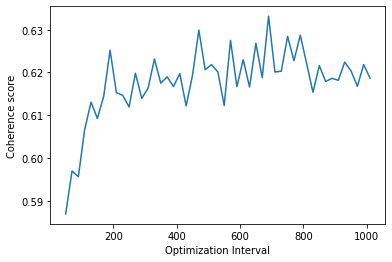

In [15]:
# Show graph
limit=1020; start=50; step=20;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Optimization Interval")
plt.ylabel("Coherence score")
#plt.savefig('20240221_PhD_MalletLDALtr-Coherence')
plt.show()

In [16]:
# Print the coherence and perplexity scores
for m, cv in zip(x, coherence_values):
    print("Interval =", m, 'Coherence: ', round(cv, 4))

Interval = 50 Coherence:  0.5869
Interval = 70 Coherence:  0.597
Interval = 90 Coherence:  0.5956
Interval = 110 Coherence:  0.6067
Interval = 130 Coherence:  0.6131
Interval = 150 Coherence:  0.6093
Interval = 170 Coherence:  0.6144
Interval = 190 Coherence:  0.6252
Interval = 210 Coherence:  0.6153
Interval = 230 Coherence:  0.6147
Interval = 250 Coherence:  0.6119
Interval = 270 Coherence:  0.6198
Interval = 290 Coherence:  0.614
Interval = 310 Coherence:  0.6163
Interval = 330 Coherence:  0.6231
Interval = 350 Coherence:  0.6175
Interval = 370 Coherence:  0.619
Interval = 390 Coherence:  0.6167
Interval = 410 Coherence:  0.6197
Interval = 430 Coherence:  0.6122
Interval = 450 Coherence:  0.6193
Interval = 470 Coherence:  0.6299
Interval = 490 Coherence:  0.6206
Interval = 510 Coherence:  0.6218
Interval = 530 Coherence:  0.6201
Interval = 550 Coherence:  0.6123
Interval = 570 Coherence:  0.6275
Interval = 590 Coherence:  0.6167
Interval = 610 Coherence:  0.623
Interval = 630 Cohere

In [17]:
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for optimize_interval in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=11, alpha=41, iterations=1000, id2word=id2word, random_seed=100, optimize_interval=optimize_interval)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, 
                                                        corpus=corpus, 
                                                        texts=data, 
                                                        start=10, 
                                                        limit=510, 
                                                        step=10)

Mallet LDA: 11 topics, 4 topic bits, 1111 topic mask
Data loaded.
max tokens: 93
total tokens: 56712
<10> LL/token: -8.4516
<20> LL/token: -7.80564
<30> LL/token: -7.55859
<40> LL/token: -7.43293

0	3.72727	cook bread wash today set tonight clean work clothe catch finish fish mesurier iron cup black job weather dress kitchen 
1	3.72727	dress child stay garden ride turn polly fall sit drive hour mama rain start boy dick poll deal buggy finish 
2	3.72727	read town home hear drive row hope miss talk expect spend play pay return papa party lunch river meet estrange 
3	3.72727	horse breakfast start mail boy bay tom arrive sand sleep bring rest scrub send pack wait buggy lead eat sister 
4	3.72727	call office agree question govt arrange bill carry lose cabinet write answer year report motion move wine club treasurer dine 
5	3.72727	port town train club pound bank dine sell remain wife connor write rise land business meeting pay sale ship vote 
6	3.72727	man bring put room bath change weather

[beta: 0.06174] 
<310> LL/token: -7.18051
[beta: 0.06343] 
<320> LL/token: -7.16895
[beta: 0.06687] 
<330> LL/token: -7.16138
[beta: 0.06941] 
<340> LL/token: -7.15781

0	0.31912	cook work bread wash afternoon breakfast today dress finish weather bring tonight catch mesurier clothe bath clean set fish iron 
1	0.11983	polly mama row town stay papa dress dick home poll child read ride turn garden thing buggy pick hour willie 
2	0.25872	drive miss call read friend arrive church home estrange spend town hear meet talk breakfast lady dress find rain port 
3	0.25982	tom breakfast today sleep boy bay thing start sand mail pack water bring eat arrive lie room wash put supper 
4	0.14396	question motion agree govt office vote send treasurer cabinet glyde call bill ministry member club move govr report carry answer 
5	0.22341	port town pound club train pay read call bank rise remain dine land buy oclock receive ship mill sleep wheat 
6	0.46709	man send place letter find work sleep home room hear 

[beta: 0.09819] 
<610> LL/token: -6.88232
[beta: 0.09875] 
<620> LL/token: -6.87983
[beta: 0.09994] 
<630> LL/token: -6.88172
[beta: 0.09825] 
<640> LL/token: -6.86989

0	0.10314	cook work today afternoon breakfast send bread bring wash weather wind thing dress tom tonight finish mail set clean rain 
1	0.04039	home town mama polly row dress read papa drive call stay dick child garden talk poll ride afternoon church thing 
2	0.01141	estrange drive polly home friend read call poll bill miss talk sit truck bride rock port beach rabbit bath boat 
3	0.03219	horse start boy thing mile camp water travel sand rest fire breakfast sleep scrub put buggy pack rain place wind 
4	0.046	question motion agree office govt call club vote cabinet send treasurer glyde member govr bill write ministry return speech move 
5	0.04872	port town pound train drive find pay land board call ship church breakfast bank rise oclock mill dine attend hear 
6	0.05016	breakfast call horse home tom man stay miss today peop

[beta: 0.10236] 
<910> LL/token: -6.83283
[beta: 0.10148] 
<920> LL/token: -6.82407
[beta: 0.1016] 
<930> LL/token: -6.8399
[beta: 0.10218] 
<940> LL/token: -6.83933

0	0.10367	cook work send breakfast today afternoon bread bring wash wind weather rain tom thing tonight finish dress mail set sleep 
1	0.03909	home town mama polly row dress drive read papa child dick stay call talk garden miss ride afternoon thing poll 
2	0.00934	estrange polly call read poll drive friend home talk truck boat bill sit rock rabbit door beach view miss bath 
3	0.02963	horse boy start mile water thing sand travel fire camp buggy arrive rest man sleep rain breakfast put tom head 
4	0.04045	question motion agree govt office call send vote treasurer club glyde cabinet member bill carry debate speech answer write pound 
5	0.03387	port town train pound land pay board find drive ship meeting man bank attend home oclock receive wife call cabinet 
6	0.03946	horse call breakfast home tom miss man afternoon stay thin

<210> LL/token: -7.13384
[beta: 0.02999] 
<220> LL/token: -7.10378
<230> LL/token: -7.18733
[beta: 0.04054] 
<240> LL/token: -7.19106

0	2.90585	cook bread wash work afternoon finish tonight set black today breakfast dress catch clothe lot clean fish mesurier tom iron 
1	2.45456	dress home child ride stay polly garden mama row fall papa hour dick life poll return sit willie show pick 
2	2.69664	read call drive miss hear home talk town find church friend arrive spend lunch expect people meet tomorrow return paper 
3	2.81248	mail boy arrive tom breakfast thing bay find head eat sand stay rest cup water supper bring scrub pack hour 
4	2.09691	agree question office motion govt cabinet vote member report answer bill treasurer move glyde ministry carry genl club govr propose 
5	2.58249	port town pound club train dine bank sell rise connor remain pay land party attend meeting meet receive read price 
6	2.99631	sleep man call room put breakfast thing weather bath beach send water change lie cu

<510> LL/token: -7.07888
[beta: 0.07697] 
<520> LL/token: -7.06481
<530> LL/token: -7.04459
[beta: 0.08126] 
<540> LL/token: -7.04015

0	0.20766	cook work breakfast bread afternoon send bring wash today finish weather dress tom tonight clean thing set clothe mesurier wind 
1	0.07786	polly mama town row home papa dress stay dick read child drive ride call garden poll afternoon talk willie return 
2	0.07883	estrange drive home miss friend read call hear church dress talk sit poll beach bring party start stand supper town 
3	0.10633	horse start boy camp mile water sand thing fire black wind scrub sleep travel tom sheep rain pack rest arrive 
4	0.09755	question motion agree office govt call send club vote treasurer cabinet glyde bill blyth move carry genl write govr report 
5	0.12224	port town train pound pay find drive church land mill call bank rise meeting letter receive read board club hear 
6	0.16656	today man tom home drink sleep find people breakfast place dress thing mail room wash

<810> LL/token: -6.86364
[beta: 0.09945] 
<820> LL/token: -6.86905
<830> LL/token: -6.85423
[beta: 0.10009] 
<840> LL/token: -6.86056

0	0.10781	cook today work breakfast send bread afternoon wash bring weather wind tonight finish tom rain dress thing sleep clean set 
1	0.04245	town home mama polly row dress papa drive dick stay child read call afternoon thing garden ride talk church miss 
2	0.01404	estrange read poll call polly friend home drive talk miss hear supper sit bill door truck rock flower bring spend 
3	0.0391	horse start mile boy rain water thing fire travel sand camp buggy ride put breakfast man rest hour wind scrub 
4	0.04232	question motion call office agree govt vote treasurer club glyde cabinet send bill member pound move carry answer bring debate 
5	0.04324	port town train pound drive pay letter church find land board call man mill receive write meeting dine wife bank 
6	0.0533	horse today man home tom thing miss stay mail dress drive drink breakfast bay call afternoo

<60> LL/token: -7.32383
<70> LL/token: -7.2799
<80> LL/token: -7.25399
<90> LL/token: -7.23437

0	3.72727	cook today bread wash work set finish lot clean clothe tonight breakfast catch mesurier thing fish iron cup washing job 
1	3.72727	home drive dress ride stay child garden sit fall polly part thing mama find hour turn papa dick lady poll 
2	3.72727	call read talk hear miss play town hope row friend expect spend game return wine lunch party aunt estrange news 
3	3.72727	breakfast boy tom mail horse bay rest sand eat supper buggy stay scrub water pack arrive trouble find bring hour 
4	3.72727	office agree question govt paper bill year cabinet carry club call vote answer report pass move matter treasurer join hold 
5	3.72727	port town pound train club bank dine remain sell connor rise motion church land read meeting meet business pay wife 
6	3.72727	man sleep room weather put bath hand work head thing afternoon lie drink stand light sea beach fear bring breakfast 
7	3.72727	work aftern

[beta: 0.05245] 
<360> LL/token: -7.2465
<370> LL/token: -7.24536
<380> LL/token: -7.24662
[beta: 0.05489] 
<390> LL/token: -7.23089

0	1.08054	cook bread breakfast wash work dress today finish tonight clothe clean afternoon set catch mesurier fish lot bath iron washing 
1	0.5296	polly town home row mama dress papa dick stay poll garden ride child willie pick buggy church read turn deal 
2	1.03465	call drive miss read meet talk friend home hear expect arrive spend lady find family lunch estrange dress tomorrow breakfast 
3	1.01709	breakfast tom mail thing today sleep bay home place eat bring stay clock trouble lose drink finish supper bottle lot 
4	0.48946	question motion agree office govt club vote call cabinet treasurer glyde report genl member carry bill answer move govr ministry 
5	0.78833	port town pound train pay dine receive bank call land mill church ship meeting rise board oclock attend return find 
6	1.29436	man send work letter weather write room sleep afternoon find hand wa

[beta: 0.08042] 
<660> LL/token: -7.04864
<670> LL/token: -7.02386
<680> LL/token: -7.03105
[beta: 0.08452] 
<690> LL/token: -7.02318

0	0.20216	cook bread breakfast afternoon today work send bring wash weather tonight finish dress tom wind bath set mail mesurier sleep 
1	0.07604	mama town polly row home dress papa read dick drive stay call garden ride child poll talk afternoon start thing 
2	0.04805	drive estrange miss home call friend start poll read talk sit church polly dress find bill bride beach arrive rest 
3	0.11392	horse breakfast man stay miss call home tom start people today sleep station dress wash drink wind drive girl beer 
4	0.08943	question motion govt office agree send call vote treasurer glyde club cabinet bill report member return ministry move carry write 
5	0.10036	port town train pound pay mill land drive church dine meeting board write bank call find letter wife receive attend 
6	0.15777	man letter hope sleep write arrive call find year people place room thing ch

[beta: 0.09979] 
<960> LL/token: -6.86821
<970> LL/token: -6.85257
<980> LL/token: -6.85357
[beta: 0.10067] 
<990> LL/token: -6.8545

0	0.12517	cook today afternoon send work breakfast wash bread weather bring wind tom tonight dress finish thing rain mail bath set 
1	0.04368	town home mama polly row dress read papa drive child dick stay call garden poll thing ride talk rain afternoon 
2	0.00789	estrange read friend home polly drive miss talk call truck poll rock dress rabbit sit bill stand bath find start 
3	0.0496	horse miss breakfast man call start drink station stay road sleep tom meet drive arrive people today girl thing find 
4	0.04542	motion question govt agree office call send club treasurer cabinet vote glyde member bill govr blyth report return speech move 
5	0.04237	port town train pound pay drive mill land board find call bank man dine meeting home receive settle letter mail 
6	0.02988	letter man year dust expect hope wife call master people black receive post state fellow d

<260> LL/token: -7.21253
<270> LL/token: -7.21926
[beta: 0.04078] 
<280> LL/token: -7.20467
<290> LL/token: -7.24022

0	2.91447	cook bread wash work finish set today breakfast tonight dress clean catch afternoon clothe tom fish mesurier iron washing black 
1	2.42655	ride child home dress polly stay row mama garden papa sit dick poll hope start deal turn willie buggy hour 
2	2.77205	call read drive home miss talk hear town church meet arrive find friend expect spend write party stand lady people 
3	2.8595	breakfast boy mail bay thing tom arrive stay rest sand head eat cup bring fire place clock scrub supper pack 
4	2.10214	agree question motion govt office club bill cabinet vote member report answer treasurer glyde carry ministry matter move govr genl 
5	2.51443	port town pound train club bank remain sell connor pay rise land speak dine receive sale attend price ship return 
6	2.89513	sleep man room find weather send bath put return thing beach call sea play change board lose fear sit w

[beta: 0.05987] 
<560> LL/token: -7.20076
<570> LL/token: -7.19138
<580> LL/token: -7.19629
<590> LL/token: -7.20626

0	0.73127	cook work wash bread afternoon breakfast dress today finish bath clothe clean wind bring lot tonight catch mesurier weather send 
1	0.28677	polly row mama town papa read poll home dick stay dress child ride buggy call garden talk sit pick turn 
2	0.60672	miss call drive hear friend home arrive breakfast lady dress read spend estrange find afternoon meet place book talk church 
3	0.6617	today bay tom breakfast bring thing mail room tonight child rest sleep boy fire black supper cook sheep wind hour 
4	0.29136	question motion agree govt office vote send member call bill treasurer glyde cabinet move club carry genl report matter govr 
5	0.44239	port pound town train pay mill land church receive call dine meeting ship oclock sell attend rise spence board pass 
6	0.84168	man sleep water people thing place breakfast find weather put room work fall arrive home drink 

<860> LL/token: -7.04122
<870> LL/token: -7.03615
[beta: 0.08381] 
<880> LL/token: -7.02993
<890> LL/token: -7.0166

0	0.18142	cook bread afternoon send work breakfast weather today wash wind finish set bring dress tonight tom clothe mesurier bath clean 
1	0.07014	home polly mama row town papa read dress dick stay drive call garden child ride talk church poll miss turn 
2	0.05368	estrange drive friend miss poll read town sit start dress home bring talk bill beach port shake call hear rest 
3	0.11589	child today breakfast bring thing room tom call bay sleep mail work tonight man turn find rest letter stay put 
4	0.08912	question motion agree office govt send vote call treasurer cabinet bill glyde member move club report carry answer govr write 
5	0.10384	port town pound train pay mill find drive land church call dine meeting bank wife letter board receive man attend 
6	0.13543	horse miss man breakfast call stay station home tom start drink today dress people drive arrive road meet place

<160> LL/token: -7.14533
<170> LL/token: -7.14772
<180> LL/token: -7.15379
<190> LL/token: -7.14943

0	3.72727	cook work bread finish set wash today black afternoon clothe clean catch dress breakfast fish mesurier bath iron washing tonight 
1	3.72727	dress garden ride child fall stay polly home turn sit mama return hope papa dick life poll glass hour willie 
2	3.72727	read call town drive talk home miss hear church find lunch friend row play spend meet arrive party expect wine 
3	3.72727	mail boy tom thing breakfast arrive bay stay water sand eat rest supper scrub pack lead head play find thunder 
4	3.72727	office agree question motion govt bill cabinet carry vote paper answer member report move treasurer call glyde business ministry genl 
5	3.72727	port pound town club train remain bank dine rise speak pay connor sell meeting land attend sale price ton ship 
6	3.72727	man sleep room send breakfast call put change cut bath tomorrow weather lie meat light fear sea water book thing 
7	3.

<460> LL/token: -7.23742
<470> LL/token: -7.25284
<480> LL/token: -7.25299
<490> LL/token: -7.25817

0	1.71434	cook bread wash afternoon dress work breakfast finish clothe today clean tonight catch lot set mesurier weather fish iron washing 
1	0.95858	polly row town mama dress stay home papa dick poll sit garden willie ride turn child pick talk read deal 
2	1.6325	call drive miss read hear home arrive meet talk find friend church lunch spend expect people place book write wine 
3	1.62834	thing tom fire water bay bring boy mail rest sheep room breakfast put sand eat sleep place today find supper 
4	0.85581	question motion agree govt office cabinet vote bill member treasurer call glyde carry club answer genl move govr ministry report 
5	1.24821	port town pound train pay dine oclock receive land meeting rise ship bank attend order lose mill find board meet 
6	1.66631	man sleep send letter weather people room bath change put breakfast fear call child arrive hope sea fall hear wife 
7	0.955

<760> LL/token: -7.15331
<770> LL/token: -7.14886
<780> LL/token: -7.15215
<790> LL/token: -7.16105

0	0.47892	cook breakfast work bread today afternoon wash bring weather tonight finish send clothe clean dress set wind lot bath mesurier 
1	0.16668	polly row mama home papa dress dick town stay read child call ride garden drive poll willie church return talk 
2	0.35963	friend drive miss read arrive estrange talk town call people find book home meet sit port end hear dress expect 
3	0.38532	horse start boy thing fire mile sand fear tom water camp scrub rest travel man arrive buggy put eat rain 
4	0.19028	question motion govt agree office vote cabinet treasurer call send glyde member report genl move club carry bill govr strangeway 
5	0.26166	port town train pound pay letter dine mill land call church find drive receive bank wife board meeting return sleep 
6	0.39783	mail today tom man letter send sleep room dress child bay bring home thing arrive place wash board breakfast afternoon 
7	0

<60> LL/token: -7.30743
<70> LL/token: -7.26547
<80> LL/token: -7.23041
<90> LL/token: -7.20613

0	3.72727	cook wash bread work set finish breakfast today clean clothe catch tonight begin lot mesurier fish dress cup iron black 
1	3.72727	home ride dress garden child stay fall polly thing turn mama part hour deal dick start poll lady school sit 
2	3.72727	read call drive hear town home miss find talk church friend hold row hope meet return expect spend party arrive 
3	3.72727	breakfast mail tom boy bay arrive thing rest bring horse stay sand eat supper scrub pack wait find lead water 
4	3.72727	office agree call question motion govt bill carry cabinet year club answer vote member report lose move treasurer return join 
5	3.72727	port town pound train club remain bank dine rise sell connor meeting speak land wife business pay sale ship price 
6	3.72727	man sleep room weather put bath head change water sit meat cut light send sea thing breakfast lose talk enjoy 
7	3.72727	work afternoon s

[beta: 0.04661] 
<360> LL/token: -7.23832
<370> LL/token: -7.2584
<380> LL/token: -7.25555
<390> LL/token: -7.25698

0	2.48249	cook bread finish work dress wash today afternoon breakfast set clothe tonight bath clean catch lot mesurier fish iron begin 
1	1.7895	polly home dress child row mama stay papa garden dick town poll ride willie sit pick hour hope return turn 
2	2.32531	call drive home miss read talk hear church people friend expect meet spend find lady stand visit arrive year place 
3	2.39386	thing tom boy breakfast mail bring bay fire rest arrive place sand eat water put supper scrub pack kill cup 
4	1.54476	question motion govt agree club office cabinet vote member carry report treasurer bill glyde move ministry genl call govr matter 
5	2.00149	port pound town train club sell bank pay rise dine meet land mill buy receive wheat return remain meeting sale 
6	2.53954	man sleep find room weather call breakfast send play letter hour arrive return afternoon water hope change lunch 

[beta: 0.05815] 
<660> LL/token: -7.22381
<670> LL/token: -7.20737
<680> LL/token: -7.2211
<690> LL/token: -7.22119

0	0.8965	cook work bread breakfast wash today afternoon bring dress tonight finish send clothe bath clean lot set tom weather mesurier 
1	0.36441	polly row mama town dress papa dick poll stay home read ride garden child turn call pick willie church buggy 
2	0.77468	drive call miss read hear home friend find afternoon lady meet spend expect talk estrange arrive tomorrow dress place breakfast 
3	0.77206	fire thing water boy rain black tom sand rest put scrub light camp supper head bring lie set tank sleep 
4	0.37215	question motion govt agree office call vote treasurer cabinet member send glyde report return club bill move answer carry ministry 
5	0.53141	port pound town train pay mill land dine meeting bank receive board club church oclock ship attend spence lose call 
6	1.0217	man sleep arrive people mail room weather breakfast home water find place thing change put toda

[beta: 0.07462] 
<960> LL/token: -7.10903
<970> LL/token: -7.08857
<980> LL/token: -7.08717
<990> LL/token: -7.08512

0	0.33619	cook work breakfast bread afternoon wash send bring today tonight weather finish tom dress clean thing wind clothe set mesurier 
1	0.11174	mama polly row town home papa stay dick read dress call child ride drive garden church talk return poll turn 
2	0.164	drive estrange miss home friend read talk dress poll town rain arrive call find sit place start willie hear bride 
3	0.19823	horse start boy mile fire sand thing camp water buggy travel rain black ride breakfast sheep hand scrub rest tank 
4	0.13807	question motion agree govt office call send treasurer glyde cabinet club member report bill vote move return carry matter pound 
5	0.17862	port town pound train pay dine mill call find church wife land drive meeting bank ship receive board letter oclock 
6	0.27993	today man tom horse home sleep put mail wash water dress room people thing breakfast drink send chil

<260> LL/token: -7.21711
<270> LL/token: -7.22447
[beta: 0.03999] 
<280> LL/token: -7.19592
<290> LL/token: -7.23465

0	2.92273	cook work bread wash finish set today dress afternoon breakfast clean tonight catch clothe mesurier lot fish iron washing bath 
1	2.42035	child dress ride polly garden stay row mama hope home turn sit papa dick poll buggy hour deal willie show 
2	2.6995	call read home drive miss talk hear church town arrive find friend spend expect lunch meet play stand visit lady 
3	2.85324	breakfast boy bay tom mail thing stay arrive rest head sand find eat cup supper bring scrub hour pack break 
4	2.12567	agree question motion govt office bill club cabinet vote member move answer treasurer report glyde ministry matter carry govr blyth 
5	2.5706	port town pound train club bank sell remain pay receive rise land return dine meet attend speak ship price account 
6	2.95656	man sleep room weather put thing call people place bath clock sea send change home breakfast fellow sit tom

[beta: 0.05313] 
<560> LL/token: -7.22524
<570> LL/token: -7.23031
<580> LL/token: -7.23684
<590> LL/token: -7.25591

0	1.38617	cook wash bread work breakfast finish dress afternoon bath clothe today set clean weather catch mesurier tonight lot iron fish 
1	0.69261	polly row mama town dress stay papa dick home poll read ride child garden pick hour willie turn sit buggy 
2	1.24122	call drive miss read meet arrive hear talk friend find breakfast spend lady home return dress place people hope church 
3	1.2904	tom bring fire boy thing bay today sand rest sheep room breakfast wind sleep black light mail supper water lie 
4	0.63448	question motion agree govt office call vote cabinet member club bill treasurer glyde move govr ministry answer carry report genl 
5	0.94363	port town pound train pay mill dine land oclock bank meeting attend ship receive church lose board spence ride club 
6	1.55471	man home sleep put find work thing letter send place room people breakfast write change trouble hea

<860> LL/token: -7.18053
<870> LL/token: -7.18558
<880> LL/token: -7.18521
<890> LL/token: -7.19199

0	0.58141	cook breakfast work bread today afternoon bring wash send tonight dress finish clothe clean set weather tom mesurier catch washing 
1	0.21078	polly mama row town home papa dick dress read stay ride call child garden drive poll church buggy willie return 
2	0.4436	miss drive call friend read home estrange find meet breakfast afternoon arrive town lady talk spend bring start dress book 
3	0.45882	thing fire call breakfast sleep find scrub boy rain bring water rest hand supper bay put talk stay light camp 
4	0.22331	question motion agree govt office vote treasurer glyde cabinet report call bill member club send move carry govr answer debate 
5	0.32738	town port train pound pay dine mill land church letter call oclock bank meeting ship find receive wife board spence 
6	0.63455	man home thing place people work mail sleep send find tom letter change room put today arrive child drink

<160> LL/token: -7.14533
<170> LL/token: -7.14772
<180> LL/token: -7.15379
<190> LL/token: -7.14943

0	3.72727	cook work bread finish set wash today black afternoon clothe clean catch dress breakfast fish mesurier bath iron washing tonight 
1	3.72727	dress garden ride child fall stay polly home turn sit mama return hope papa dick life poll glass hour willie 
2	3.72727	read call town drive talk home miss hear church find lunch friend row play spend meet arrive party expect wine 
3	3.72727	mail boy tom thing breakfast arrive bay stay water sand eat rest supper scrub pack lead head play find thunder 
4	3.72727	office agree question motion govt bill cabinet carry vote paper answer member report move treasurer call glyde business ministry genl 
5	3.72727	port pound town club train remain bank dine rise speak pay connor sell meeting land attend sale price ton ship 
6	3.72727	man sleep room send breakfast call put change cut bath tomorrow weather lie meat light fear sea water book thing 
7	3.

<460> LL/token: -7.26081
<470> LL/token: -7.26869
[beta: 0.04899] 
<480> LL/token: -7.24008
<490> LL/token: -7.2467

0	2.06119	cook bread wash dress work afternoon finish breakfast clothe today tonight catch clean set fish mesurier iron wind begin washing 
1	1.3046	home polly town dress row mama stay papa dick garden poll child ride sit willie pick turn return deal show 
2	1.93949	call drive miss read hear talk arrive meet home church friend people find place spend stand lady wine book write 
3	1.97223	tom thing water bring breakfast fire bay mail today boy rest eat sand put place scrub write sheep head people 
4	1.12698	question motion agree govt office cabinet vote member club bill treasurer report move glyde ministry genl govr carry call answer 
5	1.5888	port pound town train pay dine rise land bank receive oclock club meeting ship attend board price remain settle party 
6	2.1399	man sleep find room breakfast letter weather bath return send put fear play lunch thing lose change fall

<760> LL/token: -7.22492
<770> LL/token: -7.23582
<780> LL/token: -7.23899
<790> LL/token: -7.24688

0	1.12944	cook today wash breakfast bread work afternoon bring tonight dress finish weather clothe lot set clean bath send tom catch 
1	0.47593	polly row mama town stay home papa dick poll read child dress drive garden turn pick willie ride return start 
2	1.00353	miss call drive hear meet talk read friend home lady dress book estrange expect spend stand lunch find church breakfast 
3	0.98391	fire thing water tom sand rest boy black sheep scrub bring put light fear sleep camp supper eat hour breakfast 
4	0.4825	question motion govt agree office call vote cabinet treasurer glyde member club genl report move bill carry strangeway matter speech 
5	0.70396	port town train pound pay dine land mill receive bank church return ship meeting order drive club attend find board 
6	1.20714	man mail sleep room letter arrive people work breakfast find send home place fall wife change write child put y

<60> LL/token: -7.30743
<70> LL/token: -7.26547
<80> LL/token: -7.23041
<90> LL/token: -7.20613

0	3.72727	cook wash bread work set finish breakfast today clean clothe catch tonight begin lot mesurier fish dress cup iron black 
1	3.72727	home ride dress garden child stay fall polly thing turn mama part hour deal dick start poll lady school sit 
2	3.72727	read call drive hear town home miss find talk church friend hold row hope meet return expect spend party arrive 
3	3.72727	breakfast mail tom boy bay arrive thing rest bring horse stay sand eat supper scrub pack wait find lead water 
4	3.72727	office agree call question motion govt bill carry cabinet year club answer vote member report lose move treasurer return join 
5	3.72727	port town pound train club remain bank dine rise sell connor meeting speak land wife business pay sale ship price 
6	3.72727	man sleep room weather put bath head change water sit meat cut light send sea thing breakfast lose talk enjoy 
7	3.72727	work afternoon s

[beta: 0.04081] 
<360> LL/token: -7.19316
<370> LL/token: -7.24676
<380> LL/token: -7.2418
<390> LL/token: -7.26028

0	2.89393	cook bread finish wash work afternoon breakfast dress set clothe clean today bath lot catch mesurier fish tonight iron begin 
1	2.38479	dress home polly stay row mama ride child sit garden town papa dick poll turn willie flower hope show return 
2	2.73855	call drive read miss home hear talk church lunch arrive friend find expect meet spend people stand hand lady visit 
3	2.85205	thing tom bay mail boy breakfast black rest bring fire sand eat wash cup water supper scrub pack hour head 
4	2.06822	question office motion govt agree bill cabinet club carry vote member report treasurer glyde blyth move answer ministry matter genl 
5	2.49818	port pound town train club sell bank rise pay dine read meet land remain receive meeting attend ship price whist 
6	2.86152	sleep man find room place breakfast put call send child bath weather play afternoon fellow arrive lose boa

<660> LL/token: -7.25692
<670> LL/token: -7.25617
<680> LL/token: -7.26176
<690> LL/token: -7.26674

0	1.69456	cook bread today breakfast wash work tonight dress finish afternoon set clothe lot tom clean bath mesurier weather iron fish 
1	0.963	polly town row mama dress stay papa dick poll child garden ride home read pick turn show return willie buggy 
2	1.53504	drive call miss read hear meet talk home friend spend find lunch church lady expect stand book hour estrange arrive 
3	1.57836	thing fire water bay bring black boy rain sand rest turn tom wind breakfast scrub light sleep feed lie supper 
4	0.82011	question motion office govt agree vote cabinet treasurer member club report glyde answer call genl ministry move carry govr bill 
5	1.19083	port pound town train oclock land pay bank meeting call receive dine ship lose rise order mill attend spence church 
6	1.74589	man sleep mail find arrive room breakfast place weather home put people change send call break board year letter wash 
7

<960> LL/token: -7.2182
<970> LL/token: -7.22156
<980> LL/token: -7.22939
[beta: 0.0617] 
<990> LL/token: -7.21904

0	0.74467	cook work bread afternoon breakfast wash today tonight bring send finish tom dress clothe clean weather set wind mesurier catch 
1	0.26301	mama row polly town home papa dick dress stay child ride poll read call garden turn church hour buggy drive 
2	0.54515	miss drive call read arrive talk friend estrange lady lunch dress breakfast hear sit stand book home meet expect place 
3	0.58911	fire rain water thing sand wind black find light set head fall put breakfast boy bring scrub sleep fear tank 
4	0.2771	question motion govt office agree cabinet bill treasurer glyde member send club vote move report carry genl matter call ministry 
5	0.40567	port town train pound pay mill dine wife receive land meeting church call letter bank ship drive board oclock return 
6	0.69528	man today mail room sleep tom people thing wash place child arrive bay send board rest drink letter

<260> LL/token: -7.13187
<270> LL/token: -7.13454
<280> LL/token: -7.13008
<290> LL/token: -7.13104

0	3.72727	cook work bread finish wash today set tonight breakfast clean clothe dress afternoon catch fish mesurier iron washing job begin 
1	3.72727	ride child garden dress home stay polly hope row mama deal turn sit papa dick poll fall part buggy willie 
2	3.72727	call read drive miss home talk hear find church town lunch return meet friend expect spend arrive play hour party 
3	3.72727	breakfast mail boy tom bay arrive thing head rest stay sand eat find supper pack scrub cup lead lie hour 
4	3.72727	agree question motion govt bill office club cabinet carry vote member report answer move treasurer glyde matter ministry genl govr 
5	3.72727	port town pound train club remain bank dine sell rise pay land attend speak connor sale ship price receive account 
6	3.72727	sleep man room weather put thing send water bath beach change call sea cut clock fellow breakfast enjoy tomorrow heat 
7	3.7

<560> LL/token: -7.27921
<570> LL/token: -7.29114
<580> LL/token: -7.28742
<590> LL/token: -7.30015

0	2.48502	cook wash work bread breakfast afternoon finish today dress clothe clean catch tom bath tonight mesurier fish lot weather iron 
1	1.77429	dress home polly row mama town garden stay child papa dick poll ride sit pick show flower read willie turn 
2	2.33917	call drive hear miss read talk meet letter friend arrive spend find play write lady book lunch tomorrow hour place 
3	2.35672	thing water fire boy put bring sand rest black head find hour tom scrub breakfast sleep rain supper light pack 
4	1.54666	question motion agree govt office cabinet bill club vote member treasurer report glyde ministry move genl call govr carry answer 
5	2.00505	port town pound train rise pay land oclock receive dine bank meeting ship attend church mill lose return board party 
6	2.41105	man sleep room home place people put mail arrive breakfast find send weather change sit thing year drink board tomorr

<860> LL/token: -7.25547
<870> LL/token: -7.25068
<880> LL/token: -7.26132
<890> LL/token: -7.25384

0	1.40359	cook bread work breakfast today wash tonight finish afternoon bring tom clothe set dress clean send catch weather lot mesurier 
1	0.66708	polly row mama home town papa stay dress dick poll garden child read ride start pick call turn drive buggy 
2	1.26411	drive miss read call meet home hear friend afternoon arrive expect find talk spend year tomorrow people hour lady estrange 
3	1.22165	thing rain fire water put sand place side cut boy light bring rest black hour wind find sleep fall hand 
4	0.61352	question motion agree office govt vote call cabinet club member treasurer report glyde bill govr move send carry matter strangeway 
5	0.88641	port town pound train pay mill land call dine bank meeting oclock find receive church rise attend ship ride return 
6	1.28225	man sleep room mail breakfast people home arrive work place letter dress send rest change wash eat tom clock drink 


<160> LL/token: -7.14533
<170> LL/token: -7.14772
<180> LL/token: -7.15379
<190> LL/token: -7.14943

0	3.72727	cook work bread finish set wash today black afternoon clothe clean catch dress breakfast fish mesurier bath iron washing tonight 
1	3.72727	dress garden ride child fall stay polly home turn sit mama return hope papa dick life poll glass hour willie 
2	3.72727	read call town drive talk home miss hear church find lunch friend row play spend meet arrive party expect wine 
3	3.72727	mail boy tom thing breakfast arrive bay stay water sand eat rest supper scrub pack lead head play find thunder 
4	3.72727	office agree question motion govt bill cabinet carry vote paper answer member report move treasurer call glyde business ministry genl 
5	3.72727	port pound town club train remain bank dine rise speak pay connor sell meeting land attend sale price ton ship 
6	3.72727	man sleep room send breakfast call put change cut bath tomorrow weather lie meat light fear sea water book thing 
7	3.

<460> LL/token: -7.25675
<470> LL/token: -7.2708
<480> LL/token: -7.26233
<490> LL/token: -7.27713

0	2.45059	cook bread wash work dress tonight breakfast today clothe catch finish set clean lot afternoon fish mesurier weather iron washing 
1	1.76533	polly dress town row mama home sit papa garden dick ride child poll read stay talk show turn deal hour 
2	2.33546	call drive home miss arrive hear read meet talk tomorrow friend find expect spend year place write stand lady wine 
3	2.38562	thing water bring fire tom breakfast bay boy rest mail put eat sand place scrub arrive today sheep set supper 
4	1.54752	question agree motion govt office cabinet bill vote member report treasurer glyde club move carry answer genl govr ministry propose 
5	1.9716	port town train pound pay receive land oclock call rise meeting church ship bank remain board lose dine attend return 
6	2.53335	man sleep find room send breakfast letter bath play people afternoon finish weather fall put change home lunch fear h

<760> LL/token: -7.26705
[beta: 0.05394] 
<770> LL/token: -7.25766
<780> LL/token: -7.24407
<790> LL/token: -7.25349

0	1.36156	cook bread today breakfast wash work afternoon tonight dress bring clothe finish set clean bath bay lot mesurier tom fish 
1	0.65621	polly home row mama town stay dress papa dick garden poll child read ride turn church drive willie pick afternoon 
2	1.25958	drive call miss talk read hear meet friend expect arrive find lady spend estrange book dress stand home sit lunch 
3	1.2369	fire thing water tom boy sand put black breakfast rest bring rain scrub sleep head light eat hour supper tank 
4	0.63297	question motion govt agree office call cabinet vote treasurer glyde member bill report move club carry genl govr matter answer 
5	0.90406	port town train pound pay dine land receive bank meeting church return ship oclock mill rise attend club board spence 
6	1.46912	man send home mail room letter sleep find breakfast arrive people work write change play place finish 

<60> LL/token: -7.30743
<70> LL/token: -7.26547
<80> LL/token: -7.23041
<90> LL/token: -7.20613

0	3.72727	cook wash bread work set finish breakfast today clean clothe catch tonight begin lot mesurier fish dress cup iron black 
1	3.72727	home ride dress garden child stay fall polly thing turn mama part hour deal dick start poll lady school sit 
2	3.72727	read call drive hear town home miss find talk church friend hold row hope meet return expect spend party arrive 
3	3.72727	breakfast mail tom boy bay arrive thing rest bring horse stay sand eat supper scrub pack wait find lead water 
4	3.72727	office agree call question motion govt bill carry cabinet year club answer vote member report lose move treasurer return join 
5	3.72727	port town pound train club remain bank dine rise sell connor meeting speak land wife business pay sale ship price 
6	3.72727	man sleep room weather put bath head change water sit meat cut light send sea thing breakfast lose talk enjoy 
7	3.72727	work afternoon s

[beta: 0.04082] 
<360> LL/token: -7.19547
<370> LL/token: -7.24266
<380> LL/token: -7.24606
<390> LL/token: -7.25808

0	2.9039	cook bread work finish breakfast afternoon dress wash tonight set clothe bath clean today catch mesurier fish lot iron cake 
1	2.36861	dress home child polly ride stay row mama garden sit turn papa dick poll willie hope return show flower pick 
2	2.75558	call drive read home miss talk hear arrive church meet town friend people spend lunch place lady expect visit stand 
3	2.83403	thing tom mail bring breakfast boy rest place bay fire water arrive sand eat cup put head supper scrub lie 
4	2.08614	question motion govt agree office club cabinet vote member carry report treasurer glyde move answer ministry bill genl govr matter 
5	2.49986	port pound town train club bank remain rise pay land receive meeting attend oclock sell return ship party account price 
6	2.90402	sleep find man room call breakfast send weather put tomorrow afternoon hour play return change bath 

<660> LL/token: -7.26545
<670> LL/token: -7.26745
<680> LL/token: -7.27046
<690> LL/token: -7.27017

0	2.02368	cook breakfast work bread wash finish afternoon dress tonight clothe clean set weather mesurier lot fish iron catch washing cake 
1	1.28932	town polly row dress mama stay read papa sit dick child poll home ride garden estrange pick talk willie hope 
2	1.91823	call drive miss home arrive meet friend talk hear breakfast tomorrow year read place book lady find spend letter people 
3	1.98096	thing tom today bay mail fire water bring black rest boy head eat sand put supper arrive wash sheep room 
4	1.12581	question motion office govt agree vote member report cabinet club treasurer call glyde move carry ministry answer genl govr bill 
5	1.53479	port pound town train pay oclock land receive dine bank meeting ship lose call party order mill attend church spence 
6	2.1292	man sleep find send room put play weather change bath return fear lunch place people cut hear fall enjoy break 
7	1

[beta: 0.05662] 
<960> LL/token: -7.25091
<970> LL/token: -7.2424
<980> LL/token: -7.25171
<990> LL/token: -7.25371

0	1.07166	cook bread afternoon work breakfast wash tonight dress finish clothe today bring clean weather set wind send catch bath mesurier 
1	0.4882	polly row mama town read dress papa dick poll home estrange stay child sit garden ride talk church pick turn 
2	0.9596	call miss drive arrive meet hear friend breakfast lady expect home return tomorrow lunch sleep letter stand people bath room 
3	1.01971	fire tom today thing room bring mail bay sleep water rest head lie begin cook wash arrive eat tonight place 
4	0.46344	question motion govt office agree cabinet treasurer member glyde bill vote genl report move send club answer carry call matter 
5	0.69347	port town pound train pay mill church dine land call bank meeting receive ship oclock rise wife year board doctor 
6	1.14205	man work find play send home breakfast people sleep fall start thing set place drink board statio

[beta: 0.02941] 
<260> LL/token: -7.09385
<270> LL/token: -7.18803
<280> LL/token: -7.20016
<290> LL/token: -7.2077

0	3.34825	cook work wash bread finish breakfast set today tonight clean clothe dress catch afternoon mesurier fish iron washing begin job 
1	3.05899	ride home dress stay child polly garden row mama hope return turn sit papa dick deal poll buggy tomorrow willie 
2	3.20801	call read drive miss talk hear home find town church meet arrive lunch friend expect spend play stand wine visit 
3	3.30208	mail breakfast bay tom thing boy water head rest arrive find stay sand eat supper cup fire scrub lead break 
4	2.79267	agree question motion govt office club bill cabinet carry vote member report move answer treasurer glyde ministry matter govr genl 
5	3.08278	port pound town train club bank dine remain sell pay rise land meeting return attend receive speak price ship party 
6	3.30717	man sleep room put weather send call bath change beach breakfast sea sit drink side lie heat lend c

<560> LL/token: -7.24729
<570> LL/token: -7.27396
<580> LL/token: -7.26309
<590> LL/token: -7.26889

0	2.4606	cook wash work bread finish dress breakfast afternoon clothe today catch clean set tonight mesurier weather fish wind iron lot 
1	1.77647	dress polly row mama home garden town papa dick poll stay child ride pick show willie estrange sit life flower 
2	2.33644	call drive talk miss read hear home meet arrive friend lunch find expect stand lady year book hour wine spend 
3	2.35106	bring fire water thing tom boy mail breakfast black bay rest sand eat supper hour scrub light head arrive tonight 
4	1.51496	question agree motion office govt cabinet club bill vote member report treasurer glyde move ministry call genl govr carry answer 
5	1.95552	port pound town train rise pay receive oclock land dine bank ship church attend meeting board lose spence charge settle 
6	2.4952	man sleep place find send room letter breakfast work write people bath put change play weather fear tomorrow sit h

<860> LL/token: -7.25329
<870> LL/token: -7.25934
<880> LL/token: -7.24508
<890> LL/token: -7.24273

0	1.6861	cook breakfast wash today bread work dress afternoon finish tom tonight set clothe clean bath mesurier catch iron fish washing 
1	0.91812	polly row town mama home read papa dick poll stay garden dress ride drive estrange sit child talk pick willie 
2	1.62	drive miss call meet hear return arrive find friend breakfast read home lunch expect bath tomorrow people lady play spend 
3	1.55203	thing fire water bring boy rest black sand rain bay put scrub light turn eat supper lie room lot tonight 
4	0.80899	question motion agree office govt vote cabinet club member bill treasurer call glyde report move genl carry govr return answer 
5	1.12374	port town train pound pay dine land oclock meeting call receive bank church ship attend mill board spence settle ride 
6	1.83872	man send sleep work find home write room letter mail weather change people arrive put place hope trouble child fall 
7

<160> LL/token: -7.14533
<170> LL/token: -7.14772
<180> LL/token: -7.15379
<190> LL/token: -7.14943

0	3.72727	cook work bread finish set wash today black afternoon clothe clean catch dress breakfast fish mesurier bath iron washing tonight 
1	3.72727	dress garden ride child fall stay polly home turn sit mama return hope papa dick life poll glass hour willie 
2	3.72727	read call town drive talk home miss hear church find lunch friend row play spend meet arrive party expect wine 
3	3.72727	mail boy tom thing breakfast arrive bay stay water sand eat rest supper scrub pack lead head play find thunder 
4	3.72727	office agree question motion govt bill cabinet carry vote paper answer member report move treasurer call glyde business ministry genl 
5	3.72727	port pound town club train remain bank dine rise speak pay connor sell meeting land attend sale price ton ship 
6	3.72727	man sleep room send breakfast call put change cut bath tomorrow weather lie meat light fear sea water book thing 
7	3.

<460> LL/token: -7.23832
<470> LL/token: -7.25292
<480> LL/token: -7.24426
<490> LL/token: -7.26332

0	2.91899	cook work bread wash finish afternoon dress breakfast clean catch clothe tonight set fish mesurier begin iron lot washing bath 
1	2.38115	home dress polly town row mama child stay garden ride sit papa dick turn poll return hope willie pick show 
2	2.75696	call drive home read miss hear talk arrive meet church find lunch friend expect spend pass stand lady wine visit 
3	2.81576	tom mail thing bay today breakfast water bring boy eat sand wash supper rest scrub arrive sleep head hour cup 
4	2.08501	agree question motion govt office cabinet club bill vote carry member report treasurer move glyde answer ministry genl matter propose 
5	2.48445	port pound town train rise pay meeting receive dine land oclock party ship bank attend board lose spence settle year 
6	2.86324	man sleep find room place send put breakfast people bath call change thing weather fall tomorrow drink year lay rep

<760> LL/token: -7.25681
<770> LL/token: -7.26119
<780> LL/token: -7.26381
<790> LL/token: -7.27438

0	2.06324	cook wash bread work finish breakfast dress today afternoon tonight clothe bath set clean lot mesurier weather fish iron catch 
1	1.28209	polly row mama dress town home garden papa stay dick child poll sit ride estrange willie read drive pick hour 
2	1.94989	call drive miss read hear meet home talk friend lunch expect arrive church place spend stand breakfast lady find visit 
3	1.94992	tom breakfast bay thing fire bring today rest boy mail black room arrive sleep sand sheep water scrub light supper 
4	1.11315	question motion govt agree office vote cabinet treasurer member glyde bill report club govr move propose call genl carry answer 
5	1.50232	port town pound train pay dine land receive oclock mill bank ship meeting return attend board party rise order club 
6	2.09329	man find sleep put home place thing work people change send fall room sea trouble year half arrive wife tele

<60> LL/token: -7.30743
<70> LL/token: -7.26547
<80> LL/token: -7.23041
<90> LL/token: -7.20613

0	3.72727	cook wash bread work set finish breakfast today clean clothe catch tonight begin lot mesurier fish dress cup iron black 
1	3.72727	home ride dress garden child stay fall polly thing turn mama part hour deal dick start poll lady school sit 
2	3.72727	read call drive hear town home miss find talk church friend hold row hope meet return expect spend party arrive 
3	3.72727	breakfast mail tom boy bay arrive thing rest bring horse stay sand eat supper scrub pack wait find lead water 
4	3.72727	office agree call question motion govt bill carry cabinet year club answer vote member report lose move treasurer return join 
5	3.72727	port town pound train club remain bank dine rise sell connor meeting speak land wife business pay sale ship price 
6	3.72727	man sleep room weather put bath head change water sit meat cut light send sea thing breakfast lose talk enjoy 
7	3.72727	work afternoon s

<360> LL/token: -7.21481
<370> LL/token: -7.2242
<380> LL/token: -7.21906
<390> LL/token: -7.22676

0	3.35206	cook bread finish afternoon work wash breakfast tonight today dress clothe set clean lot catch begin mesurier fish iron cake 
1	3.05755	home dress child polly stay row ride mama hope garden papa town turn dick sit poll return part willie tomorrow 
2	3.23353	call drive read miss talk hear find church lunch arrive play friend meet expect home spend return stand lady hand 
3	3.29714	thing breakfast boy find tom mail arrive bring bay rest water head sand eat fire hour supper scrub pack light 
4	2.78335	agree office question motion govt bill club cabinet carry vote answer member report move return treasurer glyde ministry genl govr 
5	3.07518	port pound town train club bank rise pay receive read sell attend buy land party meeting sale ship price whist 
6	3.29381	sleep man room place put weather bath send call breakfast thing home change cut sea sit clock enjoy board open 
7	2.90925	

<660> LL/token: -7.26792
<670> LL/token: -7.26377
<680> LL/token: -7.27299
<690> LL/token: -7.27452

0	2.46356	cook breakfast work bread wash finish mail today dress clothe lot tonight afternoon clean mesurier fish iron catch washing set 
1	1.75902	polly dress town row mama garden stay papa dick home poll ride child return willie pick turn flower show run 
2	2.342	call drive read miss home talk find hear arrive church meet expect write friend tomorrow year spend place stand lady 
3	2.34092	thing water fire tom black boy put rest rain sand wind fear bay scrub bring light supper head lie cut 
4	1.53086	question motion govt office agree call cabinet vote club member report treasurer glyde answer ministry genl move govr carry blyth 
5	1.97899	pound port train town rise pay oclock land bank meeting receive dine party return ship lose attend board order pass 
6	2.41487	man sleep room send bath find weather play breakfast letter people change put home arrive place beach thing enjoy telegraph 

<960> LL/token: -7.26348
<970> LL/token: -7.26301
<980> LL/token: -7.26963
<990> LL/token: -7.25724

0	1.68512	cook bread wash breakfast work afternoon tonight finish today clothe dress tom bring clean catch weather mesurier fish set iron 
1	0.897	polly town row dress mama home papa dick poll stay garden ride child read pick turn show talk sit start 
2	1.57282	call drive miss hear read meet home find talk arrive friend expect place lady estrange people church book spend visit 
3	1.54159	thing water rain fire put sleep sand black boy hour cut bring fear head light rest hand fall scrub find 
4	0.82572	question motion govt agree office cabinet vote club member treasurer bill glyde ministry genl report move call carry govr answer 
5	1.15503	port town pound train pay mill land bank meeting dine return receive church ship oclock spence rise employ call board 
6	1.67942	man room sleep mail work arrive letter breakfast people send place thing put home eat tom today child rest drink 
7	0.90698	

<260> LL/token: -7.13187
<270> LL/token: -7.13454
<280> LL/token: -7.13008
<290> LL/token: -7.13104

0	3.72727	cook work bread finish wash today set tonight breakfast clean clothe dress afternoon catch fish mesurier iron washing job begin 
1	3.72727	ride child garden dress home stay polly hope row mama deal turn sit papa dick poll fall part buggy willie 
2	3.72727	call read drive miss home talk hear find church town lunch return meet friend expect spend arrive play hour party 
3	3.72727	breakfast mail boy tom bay arrive thing head rest stay sand eat find supper pack scrub cup lead lie hour 
4	3.72727	agree question motion govt bill office club cabinet carry vote member report answer move treasurer glyde matter ministry genl govr 
5	3.72727	port town pound train club remain bank dine sell rise pay land attend speak connor sale ship price receive account 
6	3.72727	sleep man room weather put thing send water bath beach change call sea cut clock fellow breakfast enjoy tomorrow heat 
7	3.7

<560> LL/token: -7.25247
<570> LL/token: -7.27069
<580> LL/token: -7.26715
<590> LL/token: -7.28026

0	2.88242	cook work wash bread finish dress breakfast today afternoon clothe clean set catch lot mesurier fish tonight iron weather washing 
1	2.3683	dress polly home row mama stay child garden town sit papa read dick poll hour ride turn flower hope life 
2	2.77104	call drive miss hear read arrive meet talk people find friend lunch home spend year breakfast stand lady play book 
3	2.78934	thing tom water bring mail fire breakfast boy bay rest arrive sand eat head light pack supper scrub hand lie 
4	2.06393	question agree motion office govt cabinet bill vote member club call report treasurer move glyde carry ministry send genl govr 
5	2.47509	port town pound train pay meeting land rise dine oclock bank ship attend church receive lose party meet board sell 
6	2.8639	man sleep find home room put place bath return tomorrow write weather letter change sea board send beach thing heat 
7	2.255

<860> LL/token: -7.26074
<870> LL/token: -7.24966
<880> LL/token: -7.2466
<890> LL/token: -7.25877

0	2.03113	cook breakfast bread today wash work finish dress set tonight clothe clean afternoon lot catch mesurier fish iron bath weather 
1	1.29234	polly town row mama home dress stay read papa ride child dick poll garden church willie talk drive turn pick 
2	1.89777	call drive miss arrive meet read friend find breakfast lunch sleep expect place hear talk year home lady stand wine 
3	1.88872	thing fire bring water boy tom rest bay eat sleep sand scrub turn light feed lie breakfast hour supper cut 
4	1.11078	question motion govt agree office vote report member club cabinet treasurer glyde bill move carry genl govr return propose ministry 
5	1.49574	port town pound train pay dine land mill oclock church attend receive bank meeting call ship rise board order affair 
6	2.15451	man find home send write room letter sleep mail put return people place change tomorrow trouble weather call hear wi

<160> LL/token: -7.14533
<170> LL/token: -7.14772
<180> LL/token: -7.15379
<190> LL/token: -7.14943

0	3.72727	cook work bread finish set wash today black afternoon clothe clean catch dress breakfast fish mesurier bath iron washing tonight 
1	3.72727	dress garden ride child fall stay polly home turn sit mama return hope papa dick life poll glass hour willie 
2	3.72727	read call town drive talk home miss hear church find lunch friend row play spend meet arrive party expect wine 
3	3.72727	mail boy tom thing breakfast arrive bay stay water sand eat rest supper scrub pack lead head play find thunder 
4	3.72727	office agree question motion govt bill cabinet carry vote paper answer member report move treasurer call glyde business ministry genl 
5	3.72727	port pound town club train remain bank dine rise speak pay connor sell meeting land attend sale price ton ship 
6	3.72727	man sleep room send breakfast call put change cut bath tomorrow weather lie meat light fear sea water book thing 
7	3.

<460> LL/token: -7.21948
<470> LL/token: -7.21962
<480> LL/token: -7.21494
<490> LL/token: -7.22495

0	3.35203	cook bread wash work dress breakfast finish tonight clothe catch clean today set afternoon fish bath mesurier lot iron washing 
1	3.04633	dress polly child sit garden stay home row mama ride papa turn dick hope poll willie hour show town deal 
2	3.23024	call read drive hear miss talk home arrive church meet lunch friend expect spend stand find pass lady play wine 
3	3.28136	tom thing boy bay mail water bring breakfast fire place rest today eat sheep sand supper scrub pack arrive hour 
4	2.78358	office agree question motion govt cabinet bill carry vote answer member report club move treasurer glyde genl govr ministry propose 
5	3.05992	port pound town train club bank pay rise land remain sell attend receive meeting speak oclock ship settle dine meet 
6	3.28544	sleep man find room weather home breakfast send put change tomorrow thing return bath people finish call lose enjoy fea

<760> LL/token: -7.26639
<770> LL/token: -7.2786
<780> LL/token: -7.28161
<790> LL/token: -7.28801

0	2.43957	cook wash breakfast bread today finish work tonight dress afternoon clothe set lot clean fish mesurier iron catch weather begin 
1	1.72437	home dress polly row mama town garden child stay papa dick poll ride pick read hour willie show hope store 
2	2.31369	call drive miss read hear talk church meet friend expect find arrive book stand spend lady lunch play visit place 
3	2.29189	thing fire water boy bring bay rest head tom sand sheep fear black scrub light turn supper hand camp eat 
4	1.51748	question motion govt agree office cabinet report member bill treasurer club glyde vote move genl govr carry answer ministry strangeway 
5	1.95561	port pound town train pay rise meeting oclock land receive dine bank attend call ship club return spence board doctor 
6	2.53134	man sleep find room home mail letter weather write send arrive change bath breakfast return vessel work people put pl

<60> LL/token: -7.30743
<70> LL/token: -7.26547
<80> LL/token: -7.23041
<90> LL/token: -7.20613

0	3.72727	cook wash bread work set finish breakfast today clean clothe catch tonight begin lot mesurier fish dress cup iron black 
1	3.72727	home ride dress garden child stay fall polly thing turn mama part hour deal dick start poll lady school sit 
2	3.72727	read call drive hear town home miss find talk church friend hold row hope meet return expect spend party arrive 
3	3.72727	breakfast mail tom boy bay arrive thing rest bring horse stay sand eat supper scrub pack wait find lead water 
4	3.72727	office agree call question motion govt bill carry cabinet year club answer vote member report lose move treasurer return join 
5	3.72727	port town pound train club remain bank dine rise sell connor meeting speak land wife business pay sale ship price 
6	3.72727	man sleep room weather put bath head change water sit meat cut light send sea thing breakfast lose talk enjoy 
7	3.72727	work afternoon s

[beta: 0.02975] 
<360> LL/token: -7.07668
<370> LL/token: -7.17211
<380> LL/token: -7.19082
<390> LL/token: -7.20538

0	3.34765	cook bread finish work afternoon set wash dress breakfast today tonight clothe clean catch lot begin mesurier fish iron washing 
1	3.03997	home ride dress child stay polly row mama garden turn sit papa dick poll hope part flower willie show pick 
2	3.23595	call drive read miss talk hear church home find town arrive friend play lunch meet expect spend stand hour return 
3	3.27762	tom breakfast boy thing mail bay arrive rest head sand eat cup stay bring water supper scrub fire pack feed 
4	2.7839	office question agree motion govt bill club cabinet vote answer carry member move treasurer report glyde ministry genl govr matter 
5	3.0551	port town pound train club dine bank remain sell rise pay receive land read speak settle attend sale ship price 
6	3.28405	man sleep room find weather put bath change call send water breakfast sea fellow cut thing fear drink enjoy 

<660> LL/token: -7.23662
<670> LL/token: -7.24525
<680> LL/token: -7.24542
<690> LL/token: -7.24987

0	2.88415	cook work bread wash breakfast finish tonight dress today lot clothe clean catch set afternoon fish mesurier iron washing cake 
1	2.359	dress polly row town mama ride child stay papa dick home poll return garden turn read willie hope hour show 
2	2.75301	call drive miss talk read home hear meet arrive church friend spend find lunch tomorrow stand people lady place expect 
3	2.80107	thing tom fire bay water bring black boy rest breakfast mail sand eat turn sheep supper scrub light arrive place 
4	2.06756	question motion office agree govt call club vote cabinet member report carry move treasurer glyde answer ministry genl govr propose 
5	2.47188	pound port train town rise pay oclock meeting land bank receive return year lose meet ship party dine attend buy 
6	2.85538	man sleep find room weather put send home breakfast change letter bath people place beach board lend enjoy hope h

<960> LL/token: -7.25848
<970> LL/token: -7.27445
<980> LL/token: -7.28569
<990> LL/token: -7.26789

0	2.04872	cook work bread wash breakfast finish afternoon dress tonight today clothe catch clean mail set bath mesurier fish iron lot 
1	1.25464	polly row town mama garden dress papa ride dick stay poll child read home turn pick hour sit show start 
2	1.89221	call drive miss home read talk meet friend expect hear arrive place tomorrow find lady lunch family stand estrange church 
3	1.93141	thing fire tom boy water bring breakfast rest sand rain black sheep head eat scrub sleep camp bay pack light 
4	1.11165	question motion govt agree office cabinet bill vote member treasurer glyde move ministry report genl answer club matter carry govr 
5	1.50162	port town pound train pay mill receive land meeting bank dine ship oclock church board rise attend call party spence 
6	2.12564	man find sleep room home letter send arrive breakfast people place weather put change hear bath return child lunch w

<260> LL/token: -7.13187
<270> LL/token: -7.13454
<280> LL/token: -7.13008
<290> LL/token: -7.13104

0	3.72727	cook work bread finish wash today set tonight breakfast clean clothe dress afternoon catch fish mesurier iron washing job begin 
1	3.72727	ride child garden dress home stay polly hope row mama deal turn sit papa dick poll fall part buggy willie 
2	3.72727	call read drive miss home talk hear find church town lunch return meet friend expect spend arrive play hour party 
3	3.72727	breakfast mail boy tom bay arrive thing head rest stay sand eat find supper pack scrub cup lead lie hour 
4	3.72727	agree question motion govt bill office club cabinet carry vote member report answer move treasurer glyde matter ministry genl govr 
5	3.72727	port town pound train club remain bank dine sell rise pay land attend speak connor sale ship price receive account 
6	3.72727	sleep man room weather put thing send water bath beach change call sea cut clock fellow breakfast enjoy tomorrow heat 
7	3.7

<560> LL/token: -7.21415
[beta: 0.04109] 
<570> LL/token: -7.20226
<580> LL/token: -7.23323
<590> LL/token: -7.25524

0	2.88194	cook work wash bread finish breakfast today dress afternoon clothe set catch tonight clean lot mesurier weather fish iron washing 
1	2.31563	dress polly stay row mama garden child home sit papa dick poll flower turn ride pick hope show door boy 
2	2.79365	call drive read home hear miss talk meet church arrive town friend people find play spend place stand lunch lady 
3	2.7836	thing bring water fire bay tom boy breakfast black head sand sheep put eat rest mail hour scrub wind supper 
4	2.07563	question agree motion office govt bill cabinet club vote member report treasurer move glyde ministry send genl govr answer carry 
5	2.47075	port pound town train bank rise pay land oclock receive speak return party ship dine meeting attend lose sell charge 
6	2.83187	man sleep find room breakfast bath change weather put dust board drink lose heat thing enjoy beach bottle 

<860> LL/token: -7.27193
<870> LL/token: -7.26617
<880> LL/token: -7.26327
<890> LL/token: -7.26624

0	2.44401	cook wash bread breakfast today finish work dress tonight clothe afternoon set lot clean catch mesurier fish iron bath washing 
1	1.71356	polly dress town row mama home ride garden child papa stay dick poll willie read turn pick hour drive show 
2	2.34182	call drive talk home miss read meet hear arrive letter friend play find spend expect book lady wine place estrange 
3	2.34116	thing bay fire tom water boy bring head black sand sheep rest mail eat scrub cut sleep rain light supper 
4	1.50959	question motion govt agree office cabinet vote member report treasurer club glyde bill move carry genl govr matter answer strangeway 
5	1.92841	port pound town train pay oclock receive land bank attend meeting call rise ship board church pass party lose dine 
6	2.429	man sleep room find weather place return work people change put breakfast arrive lunch home fall year heat drink bath 
7	1.

<160> LL/token: -7.14533
<170> LL/token: -7.14772
<180> LL/token: -7.15379
<190> LL/token: -7.14943

0	3.72727	cook work bread finish set wash today black afternoon clothe clean catch dress breakfast fish mesurier bath iron washing tonight 
1	3.72727	dress garden ride child fall stay polly home turn sit mama return hope papa dick life poll glass hour willie 
2	3.72727	read call town drive talk home miss hear church find lunch friend row play spend meet arrive party expect wine 
3	3.72727	mail boy tom thing breakfast arrive bay stay water sand eat rest supper scrub pack lead head play find thunder 
4	3.72727	office agree question motion govt bill cabinet carry vote paper answer member report move treasurer call glyde business ministry genl 
5	3.72727	port pound town club train remain bank dine rise speak pay connor sell meeting land attend sale price ton ship 
6	3.72727	man sleep room send breakfast call put change cut bath tomorrow weather lie meat light fear sea water book thing 
7	3.

<460> LL/token: -7.20601
<470> LL/token: -7.20785
<480> LL/token: -7.20811
<490> LL/token: -7.22776

0	3.33704	cook bread wash breakfast finish work afternoon dress clean clothe catch tonight set begin fish mesurier iron washing lot today 
1	3.0299	home dress child polly stay sit row mama garden ride hope turn papa dick poll willie return hour show door 
2	3.23793	call drive read miss hear talk home arrive church town meet lunch friend spend find play stand expect pass wine 
3	3.27151	tom water thing fire bay rest bring place mail boy sand eat breakfast cup head black scrub sheep hour set 
4	2.78781	agree office question motion govt bill cabinet carry vote answer member report move treasurer call glyde matter club genl govr 
5	3.0584	port pound town train club bank remain sell pay rise dine land receive meeting speak attend meet return party ship 
6	3.28086	sleep man find room breakfast weather change call put bath people dust board fellow thing heat fear repair drink enjoy 
7	2.9292	w

<760> LL/token: -7.24891
<770> LL/token: -7.26042
<780> LL/token: -7.26849
<790> LL/token: -7.27932

0	2.86065	cook wash breakfast bread work dress finish today tonight clothe afternoon set clean lot tom bath fish mesurier begin catch 
1	2.356	dress polly town row mama garden stay home child papa dick poll ride willie turn sit pick drive hour fall 
2	2.7952	call drive read miss home talk hear meet arrive friend church expect find lunch play spend stand book lady write 
3	2.78939	bay fire water bring thing black boy rest sand sheep tom mail turn eat head cut scrub hour light supper 
4	2.05364	question agree motion govt office cabinet vote report bill treasurer member glyde carry ministry club move genl propose govr matter 
5	2.45635	port pound train town pay rise land bank oclock call meeting receive return ship attend club dine year board lose 
6	2.8422	sleep man find room place put work people thing home fear letter change send child drink enjoy telegraph trouble lend 
7	2.25406	stop 

<60> LL/token: -7.30743
<70> LL/token: -7.26547
<80> LL/token: -7.23041
<90> LL/token: -7.20613

0	3.72727	cook wash bread work set finish breakfast today clean clothe catch tonight begin lot mesurier fish dress cup iron black 
1	3.72727	home ride dress garden child stay fall polly thing turn mama part hour deal dick start poll lady school sit 
2	3.72727	read call drive hear town home miss find talk church friend hold row hope meet return expect spend party arrive 
3	3.72727	breakfast mail tom boy bay arrive thing rest bring horse stay sand eat supper scrub pack wait find lead water 
4	3.72727	office agree call question motion govt bill carry cabinet year club answer vote member report lose move treasurer return join 
5	3.72727	port town pound train club remain bank dine rise sell connor meeting speak land wife business pay sale ship price 
6	3.72727	man sleep room weather put bath head change water sit meat cut light send sea thing breakfast lose talk enjoy 
7	3.72727	work afternoon s

<360> LL/token: -7.21029
<370> LL/token: -7.21985
<380> LL/token: -7.21951
<390> LL/token: -7.22251

0	3.36253	cook work bread finish afternoon wash breakfast dress set tonight clothe bath clean today begin catch mesurier fish lot iron 
1	3.03431	home dress child stay polly row mama garden ride sit hope papa dick part hour poll turn flower willie show 
2	3.16923	call drive read miss hear talk church arrive friend lunch spend meet expect stand town play lady remain return wine 
3	3.29748	breakfast bring tom mail bay rest black today sand water boy eat head thing arrive supper stay cup scrub sheep 
4	2.82542	agree question office motion govt club cabinet carry vote answer bill member move treasurer report glyde matter ministry genl govr 
5	3.15005	port pound town train club bank sell rise pay remain dine attend meeting receive land speak ship price party board 
6	3.39611	man find sleep room thing place put home send people call fall weather fellow cut change telegraph enjoy board bath 
7

<660> LL/token: -7.24349
<670> LL/token: -7.24258
<680> LL/token: -7.26183
<690> LL/token: -7.25811

0	2.48109	cook bread work wash breakfast finish afternoon dress tonight clothe weather bath clean set catch today mesurier fish lot iron 
1	1.74226	polly town row dress mama stay ride child sit papa dick poll garden read home pick return willie turn flower 
2	2.30861	call drive miss read home hear talk meet lunch friend spend arrive find tomorrow expect lady bath stand visit letter 
3	2.36881	tom today bring bay fire black water mail breakfast rest thing boy turn eat sheep child head scrub sand kill 
4	1.53272	question motion govt office agree vote call club cabinet member report treasurer glyde move answer ministry genl carry govr bill 
5	1.94763	port pound town train rise pay land meeting dine oclock bank receive return lose party attend ship order church remain 
6	2.55023	man sleep thing find put home place room work people change breakfast year fall board wash trouble heat sit drink

<960> LL/token: -7.27596
<970> LL/token: -7.28202
<980> LL/token: -7.28493
<990> LL/token: -7.28298

0	2.06399	cook work bread breakfast wash dress afternoon finish today clothe tonight catch clean bath set fish mesurier iron washing weather 
1	1.2667	polly dress row mama town garden ride stay papa dick poll read home child turn show pick willie party flower 
2	1.89208	call drive miss read talk find arrive hear home meet expect friend bath lunch return lady breakfast church spend visit 
3	1.95697	bring thing tom bay fire today room child boy black mail rest sheep sleep wind tonight wash begin put kill 
4	1.12071	question motion govt agree office cabinet bill vote member treasurer glyde report move club genl answer carry matter strangeway approve 
5	1.49748	port town pound train pay land mill dine meeting receive bank ship call year attend church board oclock rise doctor 
6	2.13461	man thing place put sleep home work people drink fall water breakfast find trouble room board change eat s

<260> LL/token: -7.21954
<270> LL/token: -7.21916
<280> LL/token: -7.2216
<290> LL/token: -7.21768

0	3.33976	cook bread work wash tonight today finish breakfast set clean dress afternoon catch clothe tom mesurier fish iron washing job 
1	3.02504	dress child stay home ride polly garden row turn mama hope deal papa fall dick sit return hour poll willie 
2	3.18559	call read drive miss hear talk home find church town expect friend lunch arrive spend people meet lady party stand 
3	3.30131	breakfast thing boy mail bay arrive tom water bring head stay sand eat fire rest put supper scrub sheep find 
4	2.80451	agree question motion govt office club bill cabinet vote member report answer treasurer carry glyde ministry matter move return dine 
5	3.11996	port town pound train club bank dine sell remain rise pay land meet attend return price ship receive meeting oclock 
6	3.36445	sleep man room weather put call bath send play beach thing breakfast change sea lie sit lose find tomorrow enjoy 
7	2.

<560> LL/token: -7.25102
<570> LL/token: -7.26539
<580> LL/token: -7.26455
<590> LL/token: -7.27692

0	2.89207	cook work wash bread finish breakfast dress clothe clean set catch afternoon today tonight lot mesurier fish iron washing job 
1	2.33983	dress polly stay row mama garden town home child sit papa ride dick poll read part life turn show pick 
2	2.73473	call drive miss home hear talk read arrive meet church friend hour find lunch stand expect book lady place spend 
3	2.81891	thing tom fire water bring boy mail bay rest breakfast sand arrive today eat black head light wind put scrub 
4	2.07882	question agree motion govt office cabinet bill vote member treasurer move report glyde club ministry genl carry call govr propose 
5	2.49923	port town pound train pay rise meeting dine land oclock receive party bank ship attend return sell doctor lose board 
6	2.93706	man sleep room find people send play bath breakfast write weather letter place home fall put vessel change tomorrow year 
7	2

<860> LL/token: -7.27919
<870> LL/token: -7.26806
[beta: 0.04868] 
<880> LL/token: -7.23913
<890> LL/token: -7.23881

0	2.0551	cook breakfast wash today bread work dress set finish tonight afternoon clothe clean bath catch lot mesurier fish iron washing 
1	1.24677	polly town row mama home read dress papa dick poll stay ride garden drive church show willie turn child pick 
2	1.85376	call drive miss talk meet room find arrive friend lunch breakfast hear home read lady sleep bath tomorrow spend hour 
3	1.94703	thing fire tom boy water rest sleep bring room sheep eat bay sand scrub head supper light today hour put 
4	1.11822	question motion govt agree office cabinet vote club treasurer glyde member bill report move carry genl answer business matter govr 
5	1.50362	port town pound train pay call oclock land dine meeting church mill receive ship bank attend return pass spence ride 
6	2.16477	man send home write work letter weather mail find place people sleep change play put hope vessel arri

<160> LL/token: -7.14533
<170> LL/token: -7.14772
<180> LL/token: -7.15379
<190> LL/token: -7.14943

0	3.72727	cook work bread finish set wash today black afternoon clothe clean catch dress breakfast fish mesurier bath iron washing tonight 
1	3.72727	dress garden ride child fall stay polly home turn sit mama return hope papa dick life poll glass hour willie 
2	3.72727	read call town drive talk home miss hear church find lunch friend row play spend meet arrive party expect wine 
3	3.72727	mail boy tom thing breakfast arrive bay stay water sand eat rest supper scrub pack lead head play find thunder 
4	3.72727	office agree question motion govt bill cabinet carry vote paper answer member report move treasurer call glyde business ministry genl 
5	3.72727	port pound town club train remain bank dine rise speak pay connor sell meeting land attend sale price ton ship 
6	3.72727	man sleep room send breakfast call put change cut bath tomorrow weather lie meat light fear sea water book thing 
7	3.

[beta: 0.04029] 
<460> LL/token: -7.19034
<470> LL/token: -7.22471
<480> LL/token: -7.22545
<490> LL/token: -7.23942

0	2.89159	cook bread wash work finish dress breakfast tonight clothe afternoon today catch clean set fish mesurier iron washing lot begin 
1	2.33668	home dress polly row mama town sit garden stay child papa ride dick poll turn return hope willie show hour 
2	2.72409	call drive miss read hear talk home arrive church find meet friend place spend tomorrow stand lady lunch expect wine 
3	2.82532	thing mail bring tom bay fire water breakfast rest black boy sand sheep put eat arrive scrub today hour set 
4	2.08058	agree question office motion govt cabinet carry vote member bill report club treasurer move glyde call ministry answer genl matter 
5	2.52205	port pound town train bank pay club rise receive meeting oclock land party remain sell meet attend ship lose dine 
6	2.88561	sleep man room find breakfast people bath weather change send fear fall play home put lunch cut drink

<760> LL/token: -7.26274
<770> LL/token: -7.26625
<780> LL/token: -7.277
<790> LL/token: -7.28486

0	2.44732	cook wash breakfast bread work finish today tonight afternoon clothe set dress lot clean mesurier iron washing fish catch weather 
1	1.72626	home polly dress row mama garden papa town dick child poll stay sit ride read pick willie show turn hope 
2	2.2907	call drive miss home talk hear find read friend arrive expect meet lunch tomorrow place lady stand spend book church 
3	2.37427	thing fire water black put bring boy rest find bay sand fear tom cut turn scrub hour head light supper 
4	1.50768	question office motion govt agree cabinet club vote report treasurer member bill glyde ministry move govr genl carry answer strangeway 
5	1.98842	port pound train town pay receive land bank rise oclock meeting attend return ship dine meet church year party spence 
6	2.43938	man sleep room thing people breakfast arrive send tom change play fall bath find dress telegraph sea sit enjoy board 


<60> LL/token: -7.30743
<70> LL/token: -7.26547
<80> LL/token: -7.23041
<90> LL/token: -7.20613

0	3.72727	cook wash bread work set finish breakfast today clean clothe catch tonight begin lot mesurier fish dress cup iron black 
1	3.72727	home ride dress garden child stay fall polly thing turn mama part hour deal dick start poll lady school sit 
2	3.72727	read call drive hear town home miss find talk church friend hold row hope meet return expect spend party arrive 
3	3.72727	breakfast mail tom boy bay arrive thing rest bring horse stay sand eat supper scrub pack wait find lead water 
4	3.72727	office agree call question motion govt bill carry cabinet year club answer vote member report lose move treasurer return join 
5	3.72727	port town pound train club remain bank dine rise sell connor meeting speak land wife business pay sale ship price 
6	3.72727	man sleep room weather put bath head change water sit meat cut light send sea thing breakfast lose talk enjoy 
7	3.72727	work afternoon s

<360> LL/token: -7.21846
<370> LL/token: -7.21957
<380> LL/token: -7.21152
<390> LL/token: -7.22313

0	3.34651	cook bread work finish wash afternoon dress tonight set breakfast clothe clean today bath catch mesurier fish iron cake lot 
1	3.05374	home dress child polly stay ride row mama garden sit turn papa dick poll part willie tomorrow flower hope fall 
2	3.20931	call drive read miss talk hear home church meet people arrive friend expect spend place lady stand town lunch visit 
3	3.29739	thing tom mail bay breakfast arrive boy fire rest bring water place sand head eat supper cup scrub today pack 
4	2.79921	agree question office motion govt bill club cabinet carry return vote answer member treasurer report move glyde matter ministry genl 
5	3.10325	port town pound train club bank remain rise pay meeting dine oclock receive land party attend sell sale ship price 
6	3.3226	sleep find man room call breakfast send put hour weather play bath return change fear lunch board enjoy heat lay 
7

<660> LL/token: -7.25756
<670> LL/token: -7.25881
<680> LL/token: -7.25136
<690> LL/token: -7.25834

0	2.8882	cook work bread wash breakfast finish today dress tonight clothe clean afternoon black bath mesurier fish iron catch lot washing 
1	2.35839	home town dress read polly row mama garden stay papa dick child sit poll ride turn hour pick willie church 
2	2.73557	call drive miss home arrive meet find friend hear spend year talk people tomorrow place lady stand return family read 
3	2.83014	thing tom bring bay fire water mail rest breakfast sand boy wash eat set put scrub turn sheep light head 
4	2.08186	question motion govt office agree cabinet vote call member answer report carry treasurer move glyde ministry blyth genl govr club 
5	2.48739	pound port town train rise pay oclock meeting land bank dine party receive ship order lose church attend board pass 
6	2.8967	sleep man room find send play weather change put call letter breakfast lunch bath return place sit hand people noon 
7	2

[beta: 0.04872] 
<960> LL/token: -7.24526
<970> LL/token: -7.25638
<980> LL/token: -7.26457
<990> LL/token: -7.25679

0	2.04875	cook wash breakfast bread work today dress finish afternoon tonight clothe catch clean mesurier fish mail iron wind washing set 
1	1.27634	dress polly row town mama home garden read papa dick ride poll stay child show church pick drive turn willie 
2	1.87326	call drive miss talk arrive home meet read friend hear find expect spend breakfast lady visit lunch place estrange stand 
3	1.94394	thing tom fire water bay boy bring put rest head sand eat today sheep black wash scrub arrive lie light 
4	1.11248	question motion govt agree office cabinet bill member treasurer glyde vote club report ministry matter move genl call carry answer 
5	1.49441	port town pound train pay land meeting dine call oclock bank ship receive church party order mill attend meet spence 
6	2.11469	sleep man room find send change people place home weather bath play letter put work fall fear bo

<260> LL/token: -7.18293
<270> LL/token: -7.20407
<280> LL/token: -7.2009
<290> LL/token: -7.21932

0	3.35493	cook bread wash work finish today set tonight breakfast clean dress clothe afternoon catch mesurier fish iron washing begin lot 
1	3.05545	dress home ride child garden polly stay row mama hope sit papa return buggy dick poll deal turn willie fall 
2	3.20665	call read drive home miss talk hear find church meet town arrive expect lunch friend spend play stand wine visit 
3	3.30352	breakfast boy mail bay thing tom stay arrive rest find sand eat place supper scrub clock pack break head feed 
4	2.80276	agree question motion govt office bill club cabinet vote member report carry move answer treasurer glyde ministry genl govr governor 
5	3.08857	port town pound train club bank remain sell rise pay receive speak return land dine meeting attend ton ship price 
6	3.31356	man sleep room put weather send call bath change thing beach breakfast lie sea board tomorrow drink vessel water sit 


<560> LL/token: -7.23606
<570> LL/token: -7.25076
<580> LL/token: -7.25087
<590> LL/token: -7.26083

0	2.90841	cook wash work bread finish breakfast dress afternoon today clothe set catch clean lot tonight fish mesurier weather iron washing 
1	2.35037	dress polly row mama garden child town sit stay home papa dick poll ride read turn flower talk pick estrange 
2	2.79043	call drive home hear miss talk meet read tomorrow find friend play return arrive expect place spend lunch lady year 
3	2.81067	tom thing bay fire boy bring mail black rest sheep sand breakfast eat place supper buggy head light pack stay 
4	2.08247	question agree motion govt office cabinet bill vote member report treasurer glyde move ministry club carry call genl govr matter 
5	2.48574	port pound town train rise pay bank receive land oclock meeting party dine order ship attend church lose board spence 
6	2.86479	sleep man room find bath weather put people change water arrive send breakfast fear fall beach home letter drin

<860> LL/token: -7.27529
<870> LL/token: -7.27276
<880> LL/token: -7.25955
<890> LL/token: -7.269

0	2.44644	cook wash breakfast bread today finish dress afternoon work tonight clothe lot clean set weather catch mesurier fish iron washing 
1	1.72941	polly dress row mama town read garden papa stay home dick child poll ride hour estrange willie pick sit show 
2	2.40148	call drive home miss meet talk hear return find arrive breakfast friend lunch read expect tomorrow part spend lady write 
3	2.34127	thing fire tom bay boy water bring rest black sand sheep eat sleep rain light pack turn scrub lie tonight 
4	1.52126	question motion govt agree office cabinet vote club report treasurer glyde member move bill carry genl govr matter answer propose 
5	1.9464	pound port town train pay receive land oclock call bank attend meeting rise ship dine church pass board settle spence 
6	2.45019	man sleep find room change people play weather put send hope arrive bath home fall place letter board lend ride 

<160> LL/token: -7.14533
<170> LL/token: -7.14772
<180> LL/token: -7.15379
<190> LL/token: -7.14943

0	3.72727	cook work bread finish set wash today black afternoon clothe clean catch dress breakfast fish mesurier bath iron washing tonight 
1	3.72727	dress garden ride child fall stay polly home turn sit mama return hope papa dick life poll glass hour willie 
2	3.72727	read call town drive talk home miss hear church find lunch friend row play spend meet arrive party expect wine 
3	3.72727	mail boy tom thing breakfast arrive bay stay water sand eat rest supper scrub pack lead head play find thunder 
4	3.72727	office agree question motion govt bill cabinet carry vote paper answer member report move treasurer call glyde business ministry genl 
5	3.72727	port pound town club train remain bank dine rise speak pay connor sell meeting land attend sale price ton ship 
6	3.72727	man sleep room send breakfast call put change cut bath tomorrow weather lie meat light fear sea water book thing 
7	3.

<460> LL/token: -7.21021
<470> LL/token: -7.21645
<480> LL/token: -7.20322
<490> LL/token: -7.21525

0	3.34825	cook work bread wash finish breakfast dress afternoon clean tonight clothe catch today set fish mesurier begin iron washing bath 
1	3.05899	home dress polly garden sit stay row mama child ride town hour papa dick turn poll willie hope return show 
2	3.20801	call read drive miss hear talk arrive church meet find lunch friend home spend expect stand lady visit pass wine 
3	3.30208	bring thing tom mail fire breakfast bay water boy rest black eat sand wash supper scrub head light pack arrive 
4	2.79267	agree office question motion govt call carry cabinet bill vote member report answer treasurer move glyde club genl govr propose 
5	3.08278	port pound town train rise pay dine meeting land receive oclock attend lose ship bank return price meet board remain 
6	3.30717	sleep man find room place put send thing people change bath letter weather home beach drink board repair heat trouble 

<760> LL/token: -7.2492
<770> LL/token: -7.25949
[beta: 0.04538] 
<780> LL/token: -7.23264
<790> LL/token: -7.25458

0	2.48623	cook wash breakfast bread work finish dress afternoon tonight today clothe lot bath set tom clean mesurier fish catch begin 
1	1.75017	dress polly town row mama stay child papa dick poll garden home ride drive pick turn willie sit read return 
2	2.28899	call drive miss read hear home talk lunch meet friend arrive church expect spend play find lady stand letter book 
3	2.35188	thing bring fire tom water bay black mail today boy rest breakfast sheep sand arrive hour head scrub room light 
4	1.49129	question agree motion govt office cabinet club vote report member treasurer bill glyde move genl matter propose govr call ministry 
5	1.89883	port pound town train pay dine land return receive meeting oclock bank ship attend lose rise board order mail spence 
6	2.48079	sleep find man place put thing home send room people change year tomorrow drink telegraph half troubl

<60> LL/token: -7.30743
<70> LL/token: -7.26547
<80> LL/token: -7.23041
<90> LL/token: -7.20613

0	3.72727	cook wash bread work set finish breakfast today clean clothe catch tonight begin lot mesurier fish dress cup iron black 
1	3.72727	home ride dress garden child stay fall polly thing turn mama part hour deal dick start poll lady school sit 
2	3.72727	read call drive hear town home miss find talk church friend hold row hope meet return expect spend party arrive 
3	3.72727	breakfast mail tom boy bay arrive thing rest bring horse stay sand eat supper scrub pack wait find lead water 
4	3.72727	office agree call question motion govt bill carry cabinet year club answer vote member report lose move treasurer return join 
5	3.72727	port town pound train club remain bank dine rise sell connor meeting speak land wife business pay sale ship price 
6	3.72727	man sleep room weather put bath head change water sit meat cut light send sea thing breakfast lose talk enjoy 
7	3.72727	work afternoon s

<360> LL/token: -7.21593
<370> LL/token: -7.22932
<380> LL/token: -7.21806
<390> LL/token: -7.21579

0	3.34888	cook bread finish work wash breakfast dress today lot clothe clean afternoon set bath catch tonight mesurier fish iron begin 
1	3.05394	home dress polly stay garden ride row mama child papa sit hope dick poll part town turn flower willie show 
2	3.21138	call drive read miss talk hear church meet home lunch friend people arrive hour spend expect stand pass wine hand 
3	3.30037	thing tom breakfast bay mail boy head bring black fire sand rest eat arrive cup water supper sheep scrub stay 
4	2.79305	agree office question motion govt bill cabinet club vote answer member report carry move treasurer blyth glyde ministry genl govr 
5	3.08122	port pound town train club bank rise sell pay remain land receive read meeting dine return sale attend ship price 
6	3.29602	sleep man find room place put weather send call breakfast play fellow change bath arrive water thing enjoy child board 
7	2

<660> LL/token: -7.23754
<670> LL/token: -7.24312
<680> LL/token: -7.2477
<690> LL/token: -7.25011

0	2.87106	cook work breakfast bread wash finish tonight dress today clothe lot clean set catch mesurier fish iron afternoon washing cake 
1	2.33795	dress polly town row mama stay garden papa dick ride child poll sit turn willie flower home pick life show 
2	2.76197	call drive read talk miss home hear meet lunch arrive friend church find expect spend year tomorrow stand lady people 
3	2.82277	thing bay fire tom bring water black rest put sand boy sheep scrub head light today feed arrive wind kill 
4	2.06231	question office motion govt agree cabinet club vote bill member answer report carry treasurer glyde ministry move blyth genl propose 
5	2.46443	pound port train town rise pay meeting oclock land receive bank party lose dine return ship order attend meet charge 
6	2.86992	man sleep room mail weather find bath place breakfast letter change people arrive put play home beach send board cal

<960> LL/token: -7.27151
<970> LL/token: -7.26757
<980> LL/token: -7.2758
<990> LL/token: -7.27374

0	2.42992	cook wash bread breakfast finish work tonight afternoon today dress clean clothe catch lot mesurier fish set iron washing job 
1	1.7189	polly town row garden home mama dress papa ride dick stay poll read child show pick willie turn flower sit 
2	2.30982	call drive miss talk find hear read meet home friend expect lunch stand arrive lady spend people estrange church year 
3	2.35347	thing water fire put bring tom boy sand black rest head scrub cut sleep lie light begin hour set supper 
4	1.51286	question motion govt agree office cabinet bill club member report treasurer move glyde ministry vote genl carry matter govr answer 
5	1.93008	port town pound train pay land receive call meeting dine ship wife oclock board attend rise bank church return doctor 
6	2.47499	man sleep room mail arrive place home letter breakfast send people bath find bay beach play fall change drink write 
7	1.

<260> LL/token: -7.13187
<270> LL/token: -7.13454
[beta: 0.02957] 
<280> LL/token: -7.09183
<290> LL/token: -7.18588

0	3.34482	cook bread wash finish work today set breakfast clean tonight clothe dress catch afternoon mesurier fish iron washing lot job 
1	3.05151	ride garden dress child home stay polly row mama deal hope papa sit dick poll turn life willie buggy part 
2	3.22148	call read drive miss home talk hear find church town return expect friend lunch spend play arrive meet hand party 
3	3.3045	breakfast mail boy bay arrive tom stay thing head rest find sand eat water supper scrub cup lie lead break 
4	2.78637	agree question motion govt office bill club cabinet carry vote member report answer treasurer glyde move ministry meeting govr genl 
5	3.08112	port pound town train club bank remain sell rise pay land dine speak receive meet attend sale ton ship connor 
6	3.29735	man sleep room weather thing bath put water call send beach change sea sit fellow clock tomorrow lose cut board 

[beta: 0.04091] 
<560> LL/token: -7.18492
<570> LL/token: -7.22043
<580> LL/token: -7.23002
<590> LL/token: -7.24594

0	2.91056	cook wash work bread finish breakfast dress clothe set lot clean catch tonight afternoon today wind mesurier fish iron washing 
1	2.34657	dress polly stay town mama row garden home sit ride papa dick poll turn child fall buggy show pick willie 
2	2.76099	call drive home read hear miss talk return arrive tomorrow find meet friend church spend expect lady book lunch wine 
3	2.81438	tom bring mail bay water thing boy arrive today black breakfast rest sand eat fire supper tonight trouble head light 
4	2.07285	question agree motion govt office bill cabinet club vote member treasurer report move glyde ministry genl govr matter carry call 
5	2.47279	port pound town train rise pay bank land dine receive oclock meeting lose meet ship attend party board year sell 
6	2.87222	man sleep room find place people play bath breakfast change put weather year sea drink hour send 

<860> LL/token: -7.26224
<870> LL/token: -7.26149
<880> LL/token: -7.25161
<890> LL/token: -7.26371

0	2.46483	cook wash bread breakfast finish work dress today afternoon clean clothe tonight set lot catch weather mesurier fish bath iron 
1	1.71897	polly row town mama stay dress read home papa garden dick ride poll turn willie child pick show run start 
2	2.32619	call drive miss talk home meet hear read friend arrive find expect spend lunch tomorrow return lady part book hour 
3	2.36365	tom mail bay today bring fire thing boy water black sand eat wind rest breakfast light head tonight feed lie 
4	1.51381	question motion govt agree office club cabinet vote member report treasurer glyde carry genl bill govr propose move blyth answer 
5	1.93184	port town pound train pay receive oclock land meeting bank call attend rise church ship dine order board spence settle 
6	2.47225	man sleep room place find play work thing people put home arrive fall weather cut year change set sit side 
7	1.65922	

<160> LL/token: -7.14533
<170> LL/token: -7.14772
<180> LL/token: -7.15379
<190> LL/token: -7.14943

0	3.72727	cook work bread finish set wash today black afternoon clothe clean catch dress breakfast fish mesurier bath iron washing tonight 
1	3.72727	dress garden ride child fall stay polly home turn sit mama return hope papa dick life poll glass hour willie 
2	3.72727	read call town drive talk home miss hear church find lunch friend row play spend meet arrive party expect wine 
3	3.72727	mail boy tom thing breakfast arrive bay stay water sand eat rest supper scrub pack lead head play find thunder 
4	3.72727	office agree question motion govt bill cabinet carry vote paper answer member report move treasurer call glyde business ministry genl 
5	3.72727	port pound town club train remain bank dine rise speak pay connor sell meeting land attend sale price ton ship 
6	3.72727	man sleep room send breakfast call put change cut bath tomorrow weather lie meat light fear sea water book thing 
7	3.

<460> LL/token: -7.21245
<470> LL/token: -7.21406
<480> LL/token: -7.21093
<490> LL/token: -7.22398

0	3.34626	cook bread wash finish dress breakfast work today afternoon clean tonight clothe catch lot fish mesurier begin iron washing set 
1	3.05352	home dress polly garden sit stay row mama town ride child papa turn dick poll fall willie show door deal 
2	3.2242	call drive read miss hear talk home find church lunch meet friend spend pass expect stand lady wine visit book 
3	3.30113	tom thing bay fire bring breakfast water rest black mail boy sheep eat sand cup today wash supper scrub place 
4	2.7853	agree question motion govt office cabinet carry bill club vote call member report answer treasurer glyde move genl govr ministry 
5	3.07969	port pound town train dine pay receive remain rise meeting land bank attend oclock ship lose price meet return club 
6	3.29745	sleep man room find weather put arrive breakfast people bath send fear change beach play water tomorrow sea heat drink 
7	2.90

<760> LL/token: -7.25066
<770> LL/token: -7.25903
<780> LL/token: -7.26539
<790> LL/token: -7.27754

0	2.90624	cook wash breakfast bread finish today work afternoon dress tonight lot clothe set clean bath fish iron mesurier catch washing 
1	2.3546	dress home polly garden row town child mama stay papa dick ride poll turn sit read pick drive hour show 
2	2.75102	call drive miss hear home read talk arrive meet lunch friend find expect church place spend book stand lady year 
3	2.8113	thing fire bay bring black tom water rest boy mail rain sand sheep head scrub light hour camp turn supper 
4	2.06527	question motion govt agree office cabinet report bill vote member treasurer club glyde ministry move carry govr propose genl answer 
5	2.4526	pound port town train pay receive land oclock rise mill meeting return bank dine ship order attend meet year board 
6	2.86133	man sleep room put find people breakfast work place play send change arrive enjoy cut telegraph fall sit bath repair 
7	2.24628	s

<60> LL/token: -7.3139
<70> LL/token: -7.26332
<80> LL/token: -7.23533
<90> LL/token: -7.21068

0	3.72727	cook today bread wash set work finish clean clothe breakfast tonight lot catch afternoon mesurier fish dress cup washing iron 
1	3.72727	dress home garden ride stay child fall polly thing mama turn hour deal sit return dick poll lady school start 
2	3.72727	read hear call drive miss town find talk church home expect friend row hope play spend hold party papa arrive 
3	3.72727	horse breakfast tom boy thing mail bay rest stay water sand find eat buggy supper scrub start wait pack arrive 
4	3.72727	office agree question motion govt paper bill call return cabinet year carry vote answer lose report move treasurer join club 
5	3.72727	port town pound train club remain bank dine sell connor rise meeting meet land speak business sale ship price ton 
6	3.72727	man sleep room weather bath bring arrive change send child breakfast meat sea head hour lose beach talk sit enjoy 
7	3.72727	work af

<360> LL/token: -7.22497
<370> LL/token: -7.2225
<380> LL/token: -7.21771
<390> LL/token: -7.22586

0	3.32502	cook work finish bread breakfast wash afternoon tonight today dress clothe clean bath lot catch set mesurier fish black iron 
1	3.00433	dress stay child polly row mama garden sit papa dick part poll return flower turn willie show pick ride hour 
2	3.24039	call drive home read hear talk find miss church tomorrow town friend spend ride expect stand arrive visit estrange wine 
3	3.22994	thing breakfast bay tom find bring rest boy sand eat water supper scrub put hour pack change bird trouble head 
4	2.75118	agree question motion govt office club bill cabinet carry vote member treasurer report move glyde ministry answer genl govr propose 
5	3.08377	port town pound train club dine bank pay rise meet meeting attend land receive remain price ship sell party return 
6	3.36401	man sleep room mail place arrive weather people send call afternoon yesterday bath return beach sea fellow write

<660> LL/token: -7.23641
<670> LL/token: -7.23735
<680> LL/token: -7.24566
<690> LL/token: -7.25049

0	2.89413	cook bread wash work breakfast finish today dress tonight clothe afternoon clean set bath lot fish mesurier weather iron washing 
1	2.27516	dress polly town row mama stay child ride garden sit papa turn dick poll willie pick return hope home show 
2	2.77674	call drive home read talk miss hear find lunch meet tomorrow play friend church spend arrive lady expect book stand 
3	2.74293	thing tom bay fire water bring today boy rest black sand eat sheep supper scrub head light camp lie kill 
4	2.01194	question motion govt agree office call vote report answer cabinet club member treasurer glyde move carry ministry genl govr blyth 
5	2.46931	port pound town train pay rise meeting land oclock dine receive bank ship club lose order attend doctor party mill 
6	2.94501	man sleep mail room arrive send write work letter place people return find weather breakfast change fear beach year bath 

<960> LL/token: -7.25959
<970> LL/token: -7.26773
<980> LL/token: -7.26786
<990> LL/token: -7.26939

0	2.46225	cook wash bread work breakfast finish dress today afternoon tonight clean clothe catch set fish iron mesurier washing lot bath 
1	1.66897	polly dress row garden mama town stay papa dick ride poll read home turn child willie pick church life show 
2	2.31665	call drive miss home talk hear read lunch meet friend expect arrive find lady spend tomorrow stand visit estrange place 
3	2.27955	water thing fire tom bay boy today rest black bring sheep sand head hour scrub put camp set light lie 
4	1.46894	question motion govt agree office cabinet bill member treasurer move glyde answer ministry vote report genl govr club call matter 
5	1.92178	port town train pound pay mill receive land meeting dine rise ship oclock bank church board lose attend doctor return 
6	2.56255	man room mail sleep find send breakfast letter bring work arrive write weather bath people change place child return h

<260> LL/token: -7.13187
<270> LL/token: -7.13454
<280> LL/token: -7.13008
<290> LL/token: -7.13104

0	3.72727	cook work bread finish wash today set tonight breakfast clean clothe dress afternoon catch fish mesurier iron washing job begin 
1	3.72727	ride child garden dress home stay polly hope row mama deal turn sit papa dick poll fall part buggy willie 
2	3.72727	call read drive miss home talk hear find church town lunch return meet friend expect spend arrive play hour party 
3	3.72727	breakfast mail boy tom bay arrive thing head rest stay sand eat find supper pack scrub cup lead lie hour 
4	3.72727	agree question motion govt bill office club cabinet carry vote member report answer move treasurer glyde matter ministry genl govr 
5	3.72727	port town pound train club remain bank dine sell rise pay land attend speak connor sale ship price receive account 
6	3.72727	sleep man room weather put thing send water bath beach change call sea cut clock fellow breakfast enjoy tomorrow heat 
7	3.7

<560> LL/token: -7.20967
<570> LL/token: -7.21901
<580> LL/token: -7.21815
<590> LL/token: -7.21742

0	3.3526	cook work wash bread finish breakfast afternoon dress catch clean bath set tonight clothe weather lot today fish mesurier iron 
1	3.05629	dress polly stay home garden sit row child mama town ride papa dick talk poll read turn fall buggy life 
2	3.23419	call drive hear miss home read talk arrive meet friend people church find year tomorrow spend stand expect lady hour 
3	3.29171	tom mail thing bay water fire bring breakfast black boy arrive rest today sheep sand eat head supper light turn 
4	2.78163	agree question office motion govt club bill cabinet vote member report treasurer move carry glyde ministry genl govr call propose 
5	3.07119	port town pound train club rise pay bank dine land meeting receive attend party ship lose board remain account sell 
6	3.28776	sleep man find room place put breakfast play return send weather fear lunch change hand bath thing call board repair 


<860> LL/token: -7.25519
<870> LL/token: -7.24801
<880> LL/token: -7.24938
<890> LL/token: -7.25742

0	2.90495	cook wash breakfast work bread finish today set dress afternoon clothe tonight clean catch mesurier fish iron washing lot begin 
1	2.33453	polly dress row stay mama garden town home read papa dick ride turn poll talk drive child sit willie estrange 
2	2.76848	call home drive miss hear find arrive meet lunch friend read expect talk breakfast year tomorrow people letter spend lady 
3	2.79329	tom bring mail bay thing fire black rest water sand arrive sheep breakfast boy eat scrub light tonight lie feed 
4	2.0593	question motion office govt agree cabinet club vote member report bill treasurer glyde carry move genl answer govr propose matter 
5	2.45939	port town pound train pay receive oclock bank land mill return meeting dine rise attend ship church call board lose 
6	2.8717	sleep man room place put find play change weather work people send fall bath thing fear bring return drink 

<160> LL/token: -7.14533
<170> LL/token: -7.14772
<180> LL/token: -7.15379
<190> LL/token: -7.14943

0	3.72727	cook work bread finish set wash today black afternoon clothe clean catch dress breakfast fish mesurier bath iron washing tonight 
1	3.72727	dress garden ride child fall stay polly home turn sit mama return hope papa dick life poll glass hour willie 
2	3.72727	read call town drive talk home miss hear church find lunch friend row play spend meet arrive party expect wine 
3	3.72727	mail boy tom thing breakfast arrive bay stay water sand eat rest supper scrub pack lead head play find thunder 
4	3.72727	office agree question motion govt bill cabinet carry vote paper answer member report move treasurer call glyde business ministry genl 
5	3.72727	port pound town club train remain bank dine rise speak pay connor sell meeting land attend sale price ton ship 
6	3.72727	man sleep room send breakfast call put change cut bath tomorrow weather lie meat light fear sea water book thing 
7	3.

<460> LL/token: -7.23042
<470> LL/token: -7.2312
<480> LL/token: -7.23144
<490> LL/token: -7.23692

0	3.35304	cook bread work wash finish today afternoon breakfast dress clean clothe catch tonight set bath fish mesurier lot iron washing 
1	3.05457	home dress polly sit stay row mama town garden child ride papa dick poll turn willie hope talk life show 
2	3.23197	call drive read miss hear meet talk arrive people lunch church friend find spend expect stand lady pass wine book 
3	3.28504	thing tom water mail fire bay breakfast rest boy bring head arrive eat sand supper scrub wash lie cup chop 
4	2.78236	agree question motion govt office bill cabinet vote carry answer member report move treasurer dine glyde ministry club genl matter 
5	3.06507	port pound town train remain pay club rise sell dine land read receive bank meeting attend ship board price settle 
6	3.28624	sleep man find room breakfast put place call home send weather return bath fear beach afternoon write thing heat lose 
7	2.92

<760> LL/token: -7.2436
<770> LL/token: -7.25317
<780> LL/token: -7.25667
<790> LL/token: -7.26924

0	2.89276	cook wash breakfast bread finish work dress tonight afternoon clothe set clean catch begin fish mesurier iron lot washing bath 
1	2.34853	dress home polly child row mama garden town stay turn papa dick poll ride willie pick drive show fall sit 
2	2.76866	call drive miss home read hear talk meet church friend lunch arrive expect find play book stand lady year visit 
3	2.77892	tom bring thing fire water bay boy breakfast today rest sand sheep black eat head supper scrub turn light hour 
4	2.04703	question motion govt office agree cabinet bill vote report member treasurer glyde carry move genl govr club matter answer strangeway 
5	2.45298	port pound train town pay rise meeting oclock receive land dine bank call ship attend return year club lose board 
6	2.87621	sleep man find place room mail letter arrive fear change bath people return send write put weather breakfast enjoy telegr

<60> LL/token: -7.30743
<70> LL/token: -7.26547
<80> LL/token: -7.23041
<90> LL/token: -7.20613

0	3.72727	cook wash bread work set finish breakfast today clean clothe catch tonight begin lot mesurier fish dress cup iron black 
1	3.72727	home ride dress garden child stay fall polly thing turn mama part hour deal dick start poll lady school sit 
2	3.72727	read call drive hear town home miss find talk church friend hold row hope meet return expect spend party arrive 
3	3.72727	breakfast mail tom boy bay arrive thing rest bring horse stay sand eat supper scrub pack wait find lead water 
4	3.72727	office agree call question motion govt bill carry cabinet year club answer vote member report lose move treasurer return join 
5	3.72727	port town pound train club remain bank dine rise sell connor meeting speak land wife business pay sale ship price 
6	3.72727	man sleep room weather put bath head change water sit meat cut light send sea thing breakfast lose talk enjoy 
7	3.72727	work afternoon s

<360> LL/token: -7.20431
<370> LL/token: -7.2189
<380> LL/token: -7.21633
<390> LL/token: -7.23292

0	3.35372	cook bread work finish afternoon wash set dress breakfast today clothe clean tonight bath catch lot mesurier fish iron washing 
1	3.04899	home dress stay child polly row mama garden sit turn ride hope papa dick poll town willie flower show pick 
2	3.23116	call drive read hear miss home talk meet lunch friend arrive church expect spend find people return play lady stand 
3	3.2812	thing tom breakfast mail boy rest bring bay fire head sand eat cup water supper scrub arrive hour pack lie 
4	2.78196	agree office question motion govt bill club cabinet carry vote answer member report treasurer move glyde ministry pass genl dine 
5	3.06237	port town pound train club bank dine remain sell rise pay return read attend land speak receive party meeting ship 
6	3.28704	man sleep find room put breakfast weather send water call change bath people yesterday fear sea half enjoy dust lay 
7	2.924

[beta: 0.04] 
<660> LL/token: -7.18528
<670> LL/token: -7.21896
<680> LL/token: -7.23574
<690> LL/token: -7.23752

0	2.90075	cook work bread breakfast wash finish today tonight dress afternoon clothe clean set catch fish mesurier iron lot washing job 
1	2.33294	dress polly row town mama child ride garden papa home dick poll stay turn sit hope talk estrange willie pick 
2	2.78927	call home drive read miss meet hear talk play return tomorrow find friend church letter place spend expect stand lady 
3	2.79245	thing tom bay fire bring water black mail boy rest breakfast sand place eat scrub light supper sit room set 
4	2.0397	question motion office govt agree vote cabinet member report club move treasurer call carry glyde answer ministry genl govr return 
5	2.46876	port pound town train rise pay bank land oclock receive meeting dine party mill order ship attend lose doctor club 
6	2.84979	man sleep find room bath weather put change arrive people fear send beach lunch fall board pass breakfa

<960> LL/token: -7.26094
<970> LL/token: -7.27521
<980> LL/token: -7.27065
[beta: 0.04563] 
<990> LL/token: -7.23821

0	2.46836	cook wash breakfast bread work dress finish afternoon today tonight clean clothe catch tom lot set mesurier fish iron garden 
1	1.72243	read polly dress row mama town talk sit papa home dick ride poll garden stay child willie estrange church show 
2	2.3904	call home drive miss find letter meet hear arrive write place return expect year friend remain talk lady tomorrow read 
3	2.30893	thing water fire bay boy bring head sand rest sheep black tom put rain hour light place scrub lie feed 
4	1.48454	question motion govt agree office cabinet bill vote report member treasurer move glyde club ministry answer genl govr carry call 
5	1.92636	port town pound train pay receive dine land mill meeting church bank rise ship oclock attend order party doctor wife 
6	2.40857	man sleep room weather mail arrive send change people bath find breakfast return fall board sea play lo

<260> LL/token: -7.13187
<270> LL/token: -7.13454
<280> LL/token: -7.13008
<290> LL/token: -7.13104

0	3.72727	cook work bread finish wash today set tonight breakfast clean clothe dress afternoon catch fish mesurier iron washing job begin 
1	3.72727	ride child garden dress home stay polly hope row mama deal turn sit papa dick poll fall part buggy willie 
2	3.72727	call read drive miss home talk hear find church town lunch return meet friend expect spend arrive play hour party 
3	3.72727	breakfast mail boy tom bay arrive thing head rest stay sand eat find supper pack scrub cup lead lie hour 
4	3.72727	agree question motion govt bill office club cabinet carry vote member report answer move treasurer glyde matter ministry genl govr 
5	3.72727	port town pound train club remain bank dine sell rise pay land attend speak connor sale ship price receive account 
6	3.72727	sleep man room weather put thing send water bath beach change call sea cut clock fellow breakfast enjoy tomorrow heat 
7	3.7

<560> LL/token: -7.21904
<570> LL/token: -7.22511
<580> LL/token: -7.2144
<590> LL/token: -7.22444

0	3.35203	cook wash bread work finish breakfast today dress clothe lot afternoon catch clean bath set fish mesurier tonight iron washing 
1	3.04633	dress polly stay child garden home row mama sit town ride papa dick hour poll turn flower fall hope willie 
2	3.23024	call read drive miss hear home talk church meet play arrive friend spend lunch stand tomorrow expect lady book place 
3	3.28136	thing tom boy bay fire bring water mail black rest arrive sand place sheep head eat supper breakfast scrub light 
4	2.78358	office question agree motion govt cabinet bill vote blyth member move report treasurer call glyde carry ministry matter genl answer 
5	3.05992	port pound town train bank club rise pay receive land meeting oclock party year dine ship attend remain account board 
6	3.28544	sleep man find room put send people weather change return home breakfast vessel beach thing board lend tomorro

<860> LL/token: -7.26368
<870> LL/token: -7.25695
<880> LL/token: -7.24915
<890> LL/token: -7.248

0	2.88976	cook wash breakfast bread work today dress finish set tonight clothe afternoon clean catch lot mesurier fish iron washing weather 
1	2.33241	polly dress town row garden mama home stay read child ride papa turn dick poll church willie pick talk sit 
2	2.7445	call drive miss meet arrive home talk find lunch play friend hear read expect place stand tomorrow hour wine lady 
3	2.77502	thing tom fire bay water boy rest bring black sand sheep eat sleep head scrub put light lie cut supper 
4	2.04584	question motion govt agree office cabinet vote member report club treasurer glyde move matter bill carry call answer genl govr 
5	2.45693	port town pound train pay receive oclock bank land meeting church ship return rise attend call year order meet mill 
6	2.89594	man sleep mail find room home write letter return put send weather change people place board bath lose trouble hope 
7	2.24448	wo

<160> LL/token: -7.14533
<170> LL/token: -7.14772
<180> LL/token: -7.15379
<190> LL/token: -7.14943

0	3.72727	cook work bread finish set wash today black afternoon clothe clean catch dress breakfast fish mesurier bath iron washing tonight 
1	3.72727	dress garden ride child fall stay polly home turn sit mama return hope papa dick life poll glass hour willie 
2	3.72727	read call town drive talk home miss hear church find lunch friend row play spend meet arrive party expect wine 
3	3.72727	mail boy tom thing breakfast arrive bay stay water sand eat rest supper scrub pack lead head play find thunder 
4	3.72727	office agree question motion govt bill cabinet carry vote paper answer member report move treasurer call glyde business ministry genl 
5	3.72727	port pound town club train remain bank dine rise speak pay connor sell meeting land attend sale price ton ship 
6	3.72727	man sleep room send breakfast call put change cut bath tomorrow weather lie meat light fear sea water book thing 
7	3.

<460> LL/token: -7.20638
<470> LL/token: -7.2097
<480> LL/token: -7.20046
<490> LL/token: -7.21854

0	3.35092	cook bread wash finish work dress breakfast afternoon clean clothe today catch begin set fish mesurier lot iron washing bath 
1	3.04147	home dress polly sit row ride mama garden stay child town papa hope turn dick poll willie estrange show door 
2	3.23208	call read drive miss hear talk arrive church meet friend lunch find spend expect pass stand hour wine play visit 
3	3.27979	tom thing boy water mail fire breakfast bring black bay rest eat sand arrive scrub supper light hour feed head 
4	2.78436	agree office question motion govt carry bill cabinet vote member answer report treasurer move return glyde matter club genl govr 
5	3.05853	port pound town train club bank sell rise pay dine meeting land receive attend speak oclock remain meet ship price 
6	3.2834	man sleep find room weather breakfast people home put change place bath thing send call dust enjoy fellow heat beach 
7	2.9

<760> LL/token: -7.23494
<770> LL/token: -7.23493
<780> LL/token: -7.23176
<790> LL/token: -7.25218

0	2.89158	cook wash breakfast bread work finish afternoon dress tonight clothe bath today catch clean mesurier iron fish set washing cake 
1	2.32682	dress home polly row child mama garden town stay sit papa dick poll ride drive willie turn estrange read pick 
2	2.75482	call drive miss read hear talk church meet lunch friend home expect spend arrive book lady stand tomorrow visit play 
3	2.7876	bay thing fire water bring black tom rest boy sand head mail cut breakfast eat arrive scrub hour light supper 
4	2.0489	question agree office motion govt cabinet bill vote report member treasurer glyde carry move genl matter govr answer club call 
5	2.45947	pound port train town pay land rise receive meeting oclock bank return dine ship attend order club year board spence 
6	2.8991	sleep man find room place put home people thing fall change letter breakfast arrive weather lend sea send trouble enj

<60> LL/token: -7.30743
<70> LL/token: -7.26547
<80> LL/token: -7.23041
<90> LL/token: -7.20613

0	3.72727	cook wash bread work set finish breakfast today clean clothe catch tonight begin lot mesurier fish dress cup iron black 
1	3.72727	home ride dress garden child stay fall polly thing turn mama part hour deal dick start poll lady school sit 
2	3.72727	read call drive hear town home miss find talk church friend hold row hope meet return expect spend party arrive 
3	3.72727	breakfast mail tom boy bay arrive thing rest bring horse stay sand eat supper scrub pack wait find lead water 
4	3.72727	office agree call question motion govt bill carry cabinet year club answer vote member report lose move treasurer return join 
5	3.72727	port town pound train club remain bank dine rise sell connor meeting speak land wife business pay sale ship price 
6	3.72727	man sleep room weather put bath head change water sit meat cut light send sea thing breakfast lose talk enjoy 
7	3.72727	work afternoon s

[beta: 0.02975] 
<360> LL/token: -7.07668
<370> LL/token: -7.17211
<380> LL/token: -7.19082
<390> LL/token: -7.20538

0	3.34765	cook bread finish work afternoon set wash dress breakfast today tonight clothe clean catch lot begin mesurier fish iron washing 
1	3.03997	home ride dress child stay polly row mama garden turn sit papa dick poll hope part flower willie show pick 
2	3.23595	call drive read miss talk hear church home find town arrive friend play lunch meet expect spend stand hour return 
3	3.27762	tom breakfast boy thing mail bay arrive rest head sand eat cup stay bring water supper scrub fire pack feed 
4	2.7839	office question agree motion govt bill club cabinet vote answer carry member move treasurer report glyde ministry genl govr matter 
5	3.0551	port town pound train club dine bank remain sell rise pay receive land read speak settle attend sale ship price 
6	3.28405	man sleep room find weather put bath change call send water breakfast sea fellow cut thing fear drink enjoy 

<660> LL/token: -7.20421
<670> LL/token: -7.20342
<680> LL/token: -7.2
<690> LL/token: -7.19437

0	3.34765	cook bread wash work finish tonight dress breakfast clothe clean today catch set afternoon black lot bath fish mesurier iron 
1	3.03997	home dress child town polly turn stay row return mama ride garden papa dick sit poll flower hour willie pick 
2	3.23595	call drive read miss talk church hear meet friend find place home spend play arrive stand tomorrow year people lady 
3	3.27762	thing tom bay fire bring water breakfast boy rest sand today eat scrub sheep light supper kill lie feed mail 
4	2.7839	question agree motion govt office club bill cabinet vote answer carry member report move call treasurer glyde blyth matter ministry 
5	3.0551	port pound town train rise club bank pay land lose meeting receive party return dine attend ship pass doctor share 
6	3.28405	sleep man room find breakfast mail weather put arrive place change bath people fear lunch board enjoy heat break sit 
7	2.9

<960> LL/token: -7.2464
<970> LL/token: -7.2586
<980> LL/token: -7.26735
<990> LL/token: -7.26562

0	2.87566	cook wash bread work finish tonight dress breakfast today clean clothe catch afternoon set mesurier fish weather iron washing lot 
1	2.33424	dress polly garden row mama ride town read stay papa dick child poll home turn pick show flower sit drive 
2	2.76175	call drive miss talk home read meet find hear church friend expect spend lunch lady place arrive stand wine tomorrow 
3	2.79131	thing bring fire tom water bay put boy breakfast rest sand black sheep hour head scrub turn begin light lie 
4	2.05108	question agree motion govt office cabinet bill vote report member carry treasurer move glyde answer ministry genl govr club call 
5	2.45087	pound port town train pay receive rise land oclock meeting bank board ship dine return call attend order lose year 
6	2.869	man sleep find room breakfast arrive mail weather people home bath place change letter put fear break sea heat lunch 
7	2.

<260> LL/token: -7.13187
<270> LL/token: -7.13454
<280> LL/token: -7.13008
<290> LL/token: -7.13104

0	3.72727	cook work bread finish wash today set tonight breakfast clean clothe dress afternoon catch fish mesurier iron washing job begin 
1	3.72727	ride child garden dress home stay polly hope row mama deal turn sit papa dick poll fall part buggy willie 
2	3.72727	call read drive miss home talk hear find church town lunch return meet friend expect spend arrive play hour party 
3	3.72727	breakfast mail boy tom bay arrive thing head rest stay sand eat find supper pack scrub cup lead lie hour 
4	3.72727	agree question motion govt bill office club cabinet carry vote member report answer move treasurer glyde matter ministry genl govr 
5	3.72727	port town pound train club remain bank dine sell rise pay land attend speak connor sale ship price receive account 
6	3.72727	sleep man room weather put thing send water bath beach change call sea cut clock fellow breakfast enjoy tomorrow heat 
7	3.7

<560> LL/token: -7.20512
<570> LL/token: -7.20217
<580> LL/token: -7.20423
<590> LL/token: -7.20917

0	3.34484	cook work wash bread finish breakfast dress today clothe set lot catch tonight clean afternoon fish mesurier iron washing job 
1	3.03676	dress polly child sit stay row mama garden home ride town turn papa dick poll fall return flower willie part 
2	3.23616	call drive read home hear talk miss place church friend lunch tomorrow spend arrive year meet find lady expect book 
3	3.27625	thing bring tom water bay fire black boy rest put head sand eat breakfast place hour supper light scrub feed 
4	2.78694	agree question office motion govt bill cabinet club vote member report move treasurer glyde carry ministry genl govr paper call 
5	3.05625	port pound town train bank rise pay receive land oclock meeting party attend dine sell ship price read lose meet 
6	3.2857	man sleep room mail find people arrive weather breakfast bath change return put clock drink trouble board fear sea bottle 


<860> LL/token: -7.27234
<870> LL/token: -7.26602
<880> LL/token: -7.26011
<890> LL/token: -7.25086

0	2.89253	cook wash bread work today finish tonight set tom dress breakfast clothe afternoon clean lot catch mesurier fish bay iron 
1	2.31986	polly stay row dress mama town turn garden ride child papa dick poll read sit home willie show pick hope 
2	2.76998	call home drive talk miss meet find hear read arrive friend church expect lunch tomorrow spend year hour place wine 
3	2.7831	thing water fire rain boy rest put black sand bring eat find place scrub lie light hand hour cut head 
4	2.04357	question office motion govt agree cabinet club vote member report bill treasurer glyde return move carry genl answer govr matter 
5	2.44671	port pound town train pay receive bank land oclock attend dine meeting ship rise call board party lose meet spence 
6	2.85635	man sleep breakfast room mail weather arrive people letter return change write find bath place enjoy sister drink lose bottle 
7	2.2648

<160> LL/token: -7.14533
<170> LL/token: -7.14772
<180> LL/token: -7.15379
<190> LL/token: -7.14943

0	3.72727	cook work bread finish set wash today black afternoon clothe clean catch dress breakfast fish mesurier bath iron washing tonight 
1	3.72727	dress garden ride child fall stay polly home turn sit mama return hope papa dick life poll glass hour willie 
2	3.72727	read call town drive talk home miss hear church find lunch friend row play spend meet arrive party expect wine 
3	3.72727	mail boy tom thing breakfast arrive bay stay water sand eat rest supper scrub pack lead head play find thunder 
4	3.72727	office agree question motion govt bill cabinet carry vote paper answer member report move treasurer call glyde business ministry genl 
5	3.72727	port pound town club train remain bank dine rise speak pay connor sell meeting land attend sale price ton ship 
6	3.72727	man sleep room send breakfast call put change cut bath tomorrow weather lie meat light fear sea water book thing 
7	3.

<460> LL/token: -7.20132
<470> LL/token: -7.20536
<480> LL/token: -7.20868
<490> LL/token: -7.21072

0	3.34052	cook work bread wash set breakfast finish dress afternoon tonight clothe catch clean fish mesurier weather begin lot today washing 
1	3.03625	home dress polly sit child row stay mama garden ride papa dick turn poll willie hope deal show pick fall 
2	3.2376	call drive read miss talk hear home arrive church friend lunch town meet expect find hour stand spend play lady 
3	3.27719	thing tom water fire bay bring rest mail boy head black breakfast sheep eat place sand supper scrub pack hour 
4	2.78652	agree office question motion govt bill carry cabinet vote member answer report treasurer move glyde ministry matter return genl dine 
5	3.05691	port pound town train bank dine club pay sell rise land remain receive attend speak ship price settle whist meet 
6	3.28208	sleep man find room breakfast weather change put bath thing call fear finish dust lose enjoy telegraph repair heat hope 

[beta: 0.03978] 
<760> LL/token: -7.17368
<770> LL/token: -7.20865
<780> LL/token: -7.22818
<790> LL/token: -7.2462

0	2.87958	cook wash work bread tonight finish breakfast afternoon dress today clothe set clean mesurier fish iron catch bath washing lot 
1	2.31969	dress polly town row mama garden stay child papa dick home poll turn ride fall pick show willie door sit 
2	2.77802	call drive miss home hear read arrive church talk place find friend expect year spend stand lunch book meet lady 
3	2.78744	bring bay fire thing tom black water mail boy rest arrive sand sheep hour cut scrub rain light eat head 
4	2.05232	question agree motion govt office cabinet club bill vote report member treasurer carry glyde ministry govr genl move matter answer 
5	2.44858	port pound town train pay rise land oclock receive meeting party meet return bank attend ship dine spence mail employ 
6	2.83948	sleep man find breakfast room put home thing place people play change bath sea send drink child enjoy heat op

<60> LL/token: -7.30743
<70> LL/token: -7.26547
<80> LL/token: -7.23041
<90> LL/token: -7.20613

0	3.72727	cook wash bread work set finish breakfast today clean clothe catch tonight begin lot mesurier fish dress cup iron black 
1	3.72727	home ride dress garden child stay fall polly thing turn mama part hour deal dick start poll lady school sit 
2	3.72727	read call drive hear town home miss find talk church friend hold row hope meet return expect spend party arrive 
3	3.72727	breakfast mail tom boy bay arrive thing rest bring horse stay sand eat supper scrub pack wait find lead water 
4	3.72727	office agree call question motion govt bill carry cabinet year club answer vote member report lose move treasurer return join 
5	3.72727	port town pound train club remain bank dine rise sell connor meeting speak land wife business pay sale ship price 
6	3.72727	man sleep room weather put bath head change water sit meat cut light send sea thing breakfast lose talk enjoy 
7	3.72727	work afternoon s

<360> LL/token: -7.11569
<370> LL/token: -7.12384
<380> LL/token: -7.11709
[beta: 0.02947] 
<390> LL/token: -7.08885

0	3.34132	cook bread finish afternoon work wash set dress breakfast today clean clothe tonight bath lot catch mesurier fish iron cake 
1	3.03393	dress home child stay polly ride garden row mama sit hope papa turn dick poll return fall flower willie deal 
2	3.23837	call drive read miss hear talk home church find town lunch friend arrive expect spend play hour return stand visit 
3	3.27355	tom thing boy breakfast bay mail rest head arrive sand eat cup supper water stay scrub bring pack fire feed 
4	2.78565	office agree question motion govt bill business club cabinet carry vote answer member report move treasurer glyde ministry genl govr 
5	3.05791	port town pound train club dine bank remain sell pay rise receive meet attend land meeting speak return settle connor 
6	3.28046	man sleep room find weather put call breakfast change water wash thing cut fellow bath sea dust bea

<660> LL/token: -7.18697
<670> LL/token: -7.17921
<680> LL/token: -7.18004
<690> LL/token: -7.18766

0	3.34132	cook work wash bread finish breakfast dress tonight clothe clean afternoon set catch lot fish mesurier cake iron washing today 
1	3.03393	home dress polly child town ride row stay mama turn garden papa sit dick return poll flower willie estrange show 
2	3.23837	call drive read miss talk find home church hear meet lunch friend expect spend remain stand hour lady arrive visit 
3	3.27355	thing bring tom bay fire water black boy rest head sand eat sheep supper scrub light cut kill lie feed 
4	2.78565	question office agree motion govt call cabinet carry vote member report move treasurer club glyde answer ministry blyth genl matter 
5	3.05791	port pound train town rise club pay oclock bank meeting land party receive return dine attend ship account year board 
6	3.28046	man sleep mail room people weather put find arrive breakfast bath place play beach change letter fall lose board he

<960> LL/token: -7.25327
<970> LL/token: -7.26134
<980> LL/token: -7.26944
<990> LL/token: -7.25718

0	2.88236	cook wash work bread breakfast finish tonight today dress afternoon clothe catch lot clean set fish mesurier iron weather washing 
1	2.31439	dress polly garden row mama town read ride child papa stay dick poll turn sit willie estrange church pick show 
2	2.7673	call drive talk home miss find hear meet lunch read arrive expect friend spend place lady family wine play visit 
3	2.78392	thing water fire bring bay rain put boy tom black rest sand head sheep scrub light begin cut eat feed 
4	2.04805	question motion govt agree office cabinet bill vote report member treasurer move glyde answer call club ministry carry genl govr 
5	2.43917	port town pound train pay land receive meeting church bank dine attend rise ship board party lose return oclock order 
6	2.85877	man sleep room mail find breakfast letter arrive people bath send place weather tom drink home trouble heat fall write 
7

<260> LL/token: -7.13187
<270> LL/token: -7.13454
<280> LL/token: -7.13008
<290> LL/token: -7.13104

0	3.72727	cook work bread finish wash today set tonight breakfast clean clothe dress afternoon catch fish mesurier iron washing job begin 
1	3.72727	ride child garden dress home stay polly hope row mama deal turn sit papa dick poll fall part buggy willie 
2	3.72727	call read drive miss home talk hear find church town lunch return meet friend expect spend arrive play hour party 
3	3.72727	breakfast mail boy tom bay arrive thing head rest stay sand eat find supper pack scrub cup lead lie hour 
4	3.72727	agree question motion govt bill office club cabinet carry vote member report answer move treasurer glyde matter ministry genl govr 
5	3.72727	port town pound train club remain bank dine sell rise pay land attend speak connor sale ship price receive account 
6	3.72727	sleep man room weather put thing send water bath beach change call sea cut clock fellow breakfast enjoy tomorrow heat 
7	3.7

<560> LL/token: -7.21307
<570> LL/token: -7.22089
<580> LL/token: -7.21714
<590> LL/token: -7.21647

0	3.33704	cook wash work bread finish breakfast dress today clothe set catch clean afternoon lot fish mesurier tonight iron begin washing 
1	3.0299	dress home polly child stay garden sit mama row ride papa dick poll hour fall flower turn willie deal tomorrow 
2	3.23793	call read drive hear miss talk home town church play arrive friend lunch return spend find expect stand year lady 
3	3.27151	tom thing fire water bay bring mail boy black rest arrive sand sheep breakfast eat wind head hour scrub supper 
4	2.78781	office question agree motion govt bill cabinet vote answer member report move treasurer glyde club matter carry call ministry genl 
5	3.0584	port pound town train club bank remain rise dine receive pay land attend meeting ship meet whist account lose board 
6	3.28086	man sleep find room people weather put bath breakfast change place thing drink call fellow board bottle wash tomor

<860> LL/token: -7.23622
<870> LL/token: -7.24166
<880> LL/token: -7.23878
<890> LL/token: -7.2423

0	2.87874	cook wash breakfast bread work finish dress today afternoon lot set tonight clothe catch clean bath mesurier fish iron washing 
1	2.32286	home polly dress row garden stay mama town papa child dick ride poll turn willie hour pick run door show 
2	2.78862	call read drive miss talk hear home meet find lunch play friend spend expect arrive tomorrow lady wine stand glass 
3	2.77683	bring thing bay fire tom water rest black boy sand sheep eat today turn scrub light feed tonight arrive return 
4	2.04328	question motion agree govt office cabinet bill vote member report treasurer glyde move carry club answer genl govr propose matter 
5	2.4277	port town pound train pay receive oclock rise land meeting bank dine return attend ship call church board lose spence 
6	2.84305	sleep man room find place put thing people change fall mail child trouble drink breakfast heat board year home half 
7	

<160> LL/token: -7.14533
<170> LL/token: -7.14772
<180> LL/token: -7.15379
<190> LL/token: -7.14943

0	3.72727	cook work bread finish set wash today black afternoon clothe clean catch dress breakfast fish mesurier bath iron washing tonight 
1	3.72727	dress garden ride child fall stay polly home turn sit mama return hope papa dick life poll glass hour willie 
2	3.72727	read call town drive talk home miss hear church find lunch friend row play spend meet arrive party expect wine 
3	3.72727	mail boy tom thing breakfast arrive bay stay water sand eat rest supper scrub pack lead head play find thunder 
4	3.72727	office agree question motion govt bill cabinet carry vote paper answer member report move treasurer call glyde business ministry genl 
5	3.72727	port pound town club train remain bank dine rise speak pay connor sell meeting land attend sale price ton ship 
6	3.72727	man sleep room send breakfast call put change cut bath tomorrow weather lie meat light fear sea water book thing 
7	3.

<460> LL/token: -7.20714
<470> LL/token: -7.21089
<480> LL/token: -7.20547
<490> LL/token: -7.21754

0	3.3345	cook wash bread work dress finish breakfast set tonight clean clothe afternoon catch begin fish mesurier iron today lot washing 
1	3.02781	home dress polly child stay row sit mama garden town ride papa dick poll turn willie hope show pick tomorrow 
2	3.2395	call read drive home hear miss talk find arrive church friend lunch meet spend expect stand play wine hour visit 
3	3.26726	tom thing water bay bring breakfast fire rest mail place sand eat boy supper head scrub arrive hour cup sister 
4	2.78658	office agree question motion govt bill cabinet vote carry answer member report treasurer move club glyde ministry genl call govr 
5	3.05902	port town pound train club remain bank pay rise sell land meeting dine receive attend speak return ship board account 
6	3.2831	sleep man room find weather breakfast people change put bath fear call sea thing wash drink lose hand heat today 
7	2.

<760> LL/token: -7.20079
<770> LL/token: -7.21025
<780> LL/token: -7.21676
<790> LL/token: -7.22441

0	3.3345	cook wash work bread finish dress afternoon tonight breakfast today clothe set catch clean fish mesurier iron lot washing stay 
1	3.02781	home dress polly child garden row mama town stay sit papa turn dick ride poll drive hour willie deal pick 
2	3.2395	call read drive home miss hear talk lunch find friend play church expect meet arrive place stand spend lady book 
3	3.26726	thing fire bring put tom water bay rest black boy sand sheep cut turn scrub head hour breakfast light rain 
4	2.78658	question agree motion govt office cabinet bill club vote carry report member treasurer glyde answer ministry blyth move propose genl 
5	3.05902	port pound train town pay rise dine receive land oclock return meeting party attend bank lose ship meet board club 
6	3.2831	sleep man breakfast room mail find arrive people tom bath fear letter place board write drink lose open repair tomorrow 
7	2.

<60> LL/token: -7.30743
<70> LL/token: -7.26547
<80> LL/token: -7.23041
<90> LL/token: -7.20613

0	3.72727	cook wash bread work set finish breakfast today clean clothe catch tonight begin lot mesurier fish dress cup iron black 
1	3.72727	home ride dress garden child stay fall polly thing turn mama part hour deal dick start poll lady school sit 
2	3.72727	read call drive hear town home miss find talk church friend hold row hope meet return expect spend party arrive 
3	3.72727	breakfast mail tom boy bay arrive thing rest bring horse stay sand eat supper scrub pack wait find lead water 
4	3.72727	office agree call question motion govt bill carry cabinet year club answer vote member report lose move treasurer return join 
5	3.72727	port town pound train club remain bank dine rise sell connor meeting speak land wife business pay sale ship price 
6	3.72727	man sleep room weather put bath head change water sit meat cut light send sea thing breakfast lose talk enjoy 
7	3.72727	work afternoon s

<360> LL/token: -7.11569
<370> LL/token: -7.12384
<380> LL/token: -7.11709
<390> LL/token: -7.12726

0	3.72727	cook bread finish wash afternoon set work dress breakfast clean clothe tonight bath catch today lot mesurier fish iron washing 
1	3.72727	home dress child stay polly garden ride row turn mama sit papa hope dick poll return flower family willie deal 
2	3.72727	call drive read talk miss hear home church town lunch find arrive friend play spend expect hour return stand visit 
3	3.72727	tom thing boy breakfast bay mail rest head arrive water sand fire eat cup bring supper stay scrub pack feed 
4	3.72727	office agree question motion govt bill carry club business cabinet vote answer member report move treasurer pass glyde blyth paper 
5	3.72727	port town pound train club bank remain dine sell rise pay meet receive land attend speak read return meeting sale 
6	3.72727	man sleep find room weather put call breakfast change wash cut thing water fellow sea dust bath half fear beach 
7	3.

<660> LL/token: -7.19422
<670> LL/token: -7.20988
<680> LL/token: -7.21189
<690> LL/token: -7.20028

0	3.33234	cook work bread wash breakfast finish dress clothe tonight catch today clean afternoon set lot fish mesurier iron washing cake 
1	3.02792	dress child polly turn stay row mama town sit garden papa dick poll ride hope flower home willie place estrange 
2	3.24043	call drive read miss home hear talk church lunch find friend meet expect spend year stand arrive tomorrow lady family 
3	3.26311	thing tom bay fire water bring breakfast black boy rest sand eat sheep supper scrub light set hour feed lie 
4	2.78642	question motion govt agree office club call cabinet carry vote answer member report move treasurer glyde ministry bill blyth genl 
5	3.05736	port pound town train rise pay bank meeting land oclock receive attend meet lose return order ship dine party board 
6	3.28584	man sleep put mail find room weather people place home arrive breakfast change bath letter board enjoy heat fear

<960> LL/token: -7.25311
<970> LL/token: -7.26062
<980> LL/token: -7.26995
<990> LL/token: -7.2634

0	2.87354	cook wash bread finish breakfast work today afternoon tonight dress clean clothe catch set lot fish bath iron mesurier washing 
1	2.31615	dress polly garden row mama ride town home read papa dick sit stay poll willie estrange pick life child show 
2	2.75285	call drive miss hear home find talk read meet lunch friend expect write play year spend lady return arrive stand 
3	2.77548	thing fire bring water tom boy black put sand sheep head bay cut light begin scrub set find lie rest 
4	2.03333	question motion govt agree office bill cabinet vote member report treasurer move glyde answer ministry club genl govr matter carry 
5	2.42958	port town pound train pay land receive rise meeting board ship dine bank oclock church lose attend call meet pass 
6	2.86383	man sleep room mail place arrive breakfast home people work find letter change put bath tom drink weather rest child 
7	2.25522	w

<260> LL/token: -7.13187
<270> LL/token: -7.13454
<280> LL/token: -7.13008
<290> LL/token: -7.13104

0	3.72727	cook work bread finish wash today set tonight breakfast clean clothe dress afternoon catch fish mesurier iron washing job begin 
1	3.72727	ride child garden dress home stay polly hope row mama deal turn sit papa dick poll fall part buggy willie 
2	3.72727	call read drive miss home talk hear find church town lunch return meet friend expect spend arrive play hour party 
3	3.72727	breakfast mail boy tom bay arrive thing head rest stay sand eat find supper pack scrub cup lead lie hour 
4	3.72727	agree question motion govt bill office club cabinet carry vote member report answer move treasurer glyde matter ministry genl govr 
5	3.72727	port town pound train club remain bank dine sell rise pay land attend speak connor sale ship price receive account 
6	3.72727	sleep man room weather put thing send water bath beach change call sea cut clock fellow breakfast enjoy tomorrow heat 
7	3.7

<560> LL/token: -7.2035
<570> LL/token: -7.2122
<580> LL/token: -7.20514
<590> LL/token: -7.21066

0	3.32952	cook work wash bread finish breakfast dress today clean set catch tonight clothe afternoon mesurier lot fish iron washing job 
1	3.02796	home dress stay polly sit row garden mama child ride papa turn dick town poll flower hope willie pick show 
2	3.24002	call drive read hear miss talk church arrive find friend lunch return spend stand expect book meet lady hour wine 
3	3.26242	tom thing water fire bay bring mail breakfast black boy head put sand sheep eat rest supper hour light trouble 
4	2.78511	agree office question motion govt club bill cabinet vote member report move treasurer glyde matter ministry carry call genl govr 
5	3.05901	port pound town train club bank rise pay receive meeting dine land oclock speak party ship attend meet lose board 
6	3.28809	man sleep room find weather people breakfast bath change play home year put drink thing fear board place heat tomorrow 
7	2.

[beta: 0.04122] 
<860> LL/token: -7.19607
<870> LL/token: -7.2299
<880> LL/token: -7.22846
<890> LL/token: -7.23439

0	2.8725	cook wash work breakfast bread finish dress afternoon lot tonight today clothe clean set catch mesurier fish iron cake bath 
1	2.30854	home polly dress row garden mama read town stay talk child papa ride dick poll sit willie estrange turn pick 
2	2.76224	call drive meet miss return hear arrive find pass lunch friend read year tomorrow spend expect talk write lady people 
3	2.78029	tom thing bay fire boy black water bring rest sand sheep eat arrive breakfast mail turn cut head scrub light 
4	2.04379	question office motion govt agree cabinet club bill vote report member treasurer move glyde matter carry genl govr answer propose 
5	2.42924	pound port town train pay bank receive oclock land meeting order call attend rise ship board dine church charge lose 
6	2.86947	man sleep room find place home put thing people play fall bath change letter weather mail sea trouble

<160> LL/token: -7.14533
<170> LL/token: -7.14772
<180> LL/token: -7.15379
<190> LL/token: -7.14943

0	3.72727	cook work bread finish set wash today black afternoon clothe clean catch dress breakfast fish mesurier bath iron washing tonight 
1	3.72727	dress garden ride child fall stay polly home turn sit mama return hope papa dick life poll glass hour willie 
2	3.72727	read call town drive talk home miss hear church find lunch friend row play spend meet arrive party expect wine 
3	3.72727	mail boy tom thing breakfast arrive bay stay water sand eat rest supper scrub pack lead head play find thunder 
4	3.72727	office agree question motion govt bill cabinet carry vote paper answer member report move treasurer call glyde business ministry genl 
5	3.72727	port pound town club train remain bank dine rise speak pay connor sell meeting land attend sale price ton ship 
6	3.72727	man sleep room send breakfast call put change cut bath tomorrow weather lie meat light fear sea water book thing 
7	3.

<460> LL/token: -7.18372
<470> LL/token: -7.19228
<480> LL/token: -7.19264
<490> LL/token: -7.20049

0	3.32657	cook bread wash finish work set today breakfast dress afternoon clean catch clothe fish mesurier begin lot hand iron washing 
1	3.02627	home dress child polly sit row mama garden stay papa turn dick ride poll hope return willie show deal pick 
2	3.2388	call read drive home hear miss talk arrive church meet friend lunch spend expect stand pass hour town visit play 
3	3.26012	tom water thing bay mail fire breakfast rest place boy bring head eat sand cup supper sheep arrive scrub hour 
4	2.78477	office agree question motion govt bill cabinet carry vote member report answer treasurer move glyde dine matter club genl govr 
5	3.05925	port town pound train club bank remain sell dine pay rise meeting land receive speak attend return ship party settle 
6	3.29216	sleep man find room weather breakfast put change thing call bath lose wash enjoy fellow fear board heat repair sea 
7	2.92931

<760> LL/token: -7.20202
<770> LL/token: -7.21113
<780> LL/token: -7.21404
<790> LL/token: -7.22525

0	3.32657	cook bread breakfast finish wash work today dress clothe tonight afternoon set clean catch bath lot mesurier fish iron washing 
1	3.02627	home dress child polly garden row mama town stay papa turn dick sit poll ride drive willie hour pick deal 
2	3.2388	call read drive miss home hear arrive talk lunch meet find church friend expect spend play stand book lady pass 
3	3.26012	tom bay fire bring black thing water rest boy head sand sheep breakfast arrive eat cut turn scrub hour room 
4	2.78477	agree question motion office govt bill cabinet vote report member carry treasurer glyde move answer ministry matter govr propose genl 
5	3.05925	port pound train town pay rise land meeting oclock receive lose attend bank party return meet ship dine club spence 
6	3.29216	sleep man find put mail place breakfast room thing people change letter fear wash board weather enjoy bath beach trouble 

<60> LL/token: -7.30743
<70> LL/token: -7.26547
<80> LL/token: -7.23041
<90> LL/token: -7.20613

0	3.72727	cook wash bread work set finish breakfast today clean clothe catch tonight begin lot mesurier fish dress cup iron black 
1	3.72727	home ride dress garden child stay fall polly thing turn mama part hour deal dick start poll lady school sit 
2	3.72727	read call drive hear town home miss find talk church friend hold row hope meet return expect spend party arrive 
3	3.72727	breakfast mail tom boy bay arrive thing rest bring horse stay sand eat supper scrub pack wait find lead water 
4	3.72727	office agree call question motion govt bill carry cabinet year club answer vote member report lose move treasurer return join 
5	3.72727	port town pound train club remain bank dine rise sell connor meeting speak land wife business pay sale ship price 
6	3.72727	man sleep room weather put bath head change water sit meat cut light send sea thing breakfast lose talk enjoy 
7	3.72727	work afternoon s

<360> LL/token: -7.11569
<370> LL/token: -7.12384
<380> LL/token: -7.11709
<390> LL/token: -7.12726

0	3.72727	cook bread finish wash afternoon set work dress breakfast clean clothe tonight bath catch today lot mesurier fish iron washing 
1	3.72727	home dress child stay polly garden ride row turn mama sit papa hope dick poll return flower family willie deal 
2	3.72727	call drive read talk miss hear home church town lunch find arrive friend play spend expect hour return stand visit 
3	3.72727	tom thing boy breakfast bay mail rest head arrive water sand fire eat cup bring supper stay scrub pack feed 
4	3.72727	office agree question motion govt bill carry club business cabinet vote answer member report move treasurer pass glyde blyth paper 
5	3.72727	port town pound train club bank remain dine sell rise pay meet receive land attend speak read return meeting sale 
6	3.72727	man sleep find room weather put call breakfast change wash cut thing water fellow sea dust bath half fear beach 
7	3.

<660> LL/token: -7.2058
<670> LL/token: -7.21021
<680> LL/token: -7.21112
<690> LL/token: -7.19772

0	3.32666	cook bread wash breakfast today work finish dress tonight clothe catch set clean lot fish mesurier iron washing cake afternoon 
1	3.02231	home dress polly child town row mama ride stay sit garden turn papa dick poll flower willie estrange return pick 
2	3.24136	call read miss talk drive meet hear church play home find friend arrive lunch spend stand place lady book order 
3	3.2588	thing tom bay fire water black put bring rest breakfast boy sand place sheep eat scrub head supper light feed 
4	2.78514	question agree office motion govt club bill cabinet vote answer carry member report treasurer move glyde ministry blyth genl govr 
5	3.05943	port pound town train club rise bank pay meeting land oclock receive party return lose ship dine attend remain board 
6	3.2916	sleep man find room mail weather bath change breakfast fear child people return board telegraph drink enjoy heat sit 

<960> LL/token: -7.23414
<970> LL/token: -7.24171
<980> LL/token: -7.25092
<990> LL/token: -7.24291

0	2.85959	cook wash work bread finish dress tonight breakfast today afternoon clean clothe catch set lot fish iron mesurier washing job 
1	2.29759	dress polly garden row mama town read ride papa home dick sit poll stay hour child willie estrange turn show 
2	2.80514	call drive miss home talk find hear meet read expect friend place lunch church spend arrive year lady part wine 
3	2.77913	thing tom water fire put boy bay rest bring head black eat sand sheep sleep scrub light set lie begin 
4	2.02943	question motion agree govt office cabinet bill vote report member treasurer club move glyde call ministry answer genl carry govr 
5	2.4156	port pound town train pay meeting land oclock receive rise party board attend ship bank dine mill settle meet spence 
6	2.8361	man sleep room mail breakfast arrive letter home find people bath child weather return write beach change lose fellow heat 
7	2.24

<260> LL/token: -7.13187
<270> LL/token: -7.13454
<280> LL/token: -7.13008
<290> LL/token: -7.13104

0	3.72727	cook work bread finish wash today set tonight breakfast clean clothe dress afternoon catch fish mesurier iron washing job begin 
1	3.72727	ride child garden dress home stay polly hope row mama deal turn sit papa dick poll fall part buggy willie 
2	3.72727	call read drive miss home talk hear find church town lunch return meet friend expect spend arrive play hour party 
3	3.72727	breakfast mail boy tom bay arrive thing head rest stay sand eat find supper pack scrub cup lead lie hour 
4	3.72727	agree question motion govt bill office club cabinet carry vote member report answer move treasurer glyde matter ministry genl govr 
5	3.72727	port town pound train club remain bank dine sell rise pay land attend speak connor sale ship price receive account 
6	3.72727	sleep man room weather put thing send water bath beach change call sea cut clock fellow breakfast enjoy tomorrow heat 
7	3.7

<560> LL/token: -7.19922
<570> LL/token: -7.20889
<580> LL/token: -7.21092
<590> LL/token: -7.22125

0	3.32235	cook wash bread work finish breakfast dress clothe catch set clean afternoon tonight today lot mesurier fish iron weather washing 
1	3.01999	dress home stay polly child garden turn mama row sit ride papa dick poll return fall buggy flower deal willie 
2	3.24481	call read drive hear talk miss home church meet friend arrive spend town play lunch lady hour book find wine 
3	3.25797	tom water boy fire thing bay mail bring breakfast rest black head sheep sand eat supper hour scrub light pack 
4	2.78659	agree office question motion govt bill cabinet vote member club report move treasurer return glyde call ministry answer genl paper 
5	3.05803	port pound town train club bank rise receive pay land dine meeting attend speak sell party ship whist board remain 
6	3.29072	sleep man find room put breakfast place bath change thing weather call drink board enjoy repair bottle open people lun

<860> LL/token: -7.22399
<870> LL/token: -7.21359
<880> LL/token: -7.21068
<890> LL/token: -7.20823

0	3.32235	cook wash bread work dress finish set breakfast lot tonight afternoon clean clothe catch mesurier fish iron begin today washing 
1	3.01999	home dress polly town child stay row garden mama ride turn papa drive dick poll willie show sit hour pick 
2	3.24481	call meet miss talk drive read home arrive hear find friend return play spend place tomorrow expect lunch year stand 
3	3.25797	tom breakfast bring bay mail fire today black water thing rest boy sand sheep eat arrive scrub light feed head 
4	2.78659	question office agree motion govt bill club cabinet vote member report matter carry treasurer move glyde answer genl paper govr 
5	3.05803	port town pound train bank pay oclock receive call land rise attend meeting dine ship party board church spence lose 
6	3.29072	sleep man room find place put people change weather bath thing return child finish letter fear enjoy fall heat board

<160> LL/token: -7.14533
<170> LL/token: -7.14772
<180> LL/token: -7.15379
<190> LL/token: -7.14943

0	3.72727	cook work bread finish set wash today black afternoon clothe clean catch dress breakfast fish mesurier bath iron washing tonight 
1	3.72727	dress garden ride child fall stay polly home turn sit mama return hope papa dick life poll glass hour willie 
2	3.72727	read call town drive talk home miss hear church find lunch friend row play spend meet arrive party expect wine 
3	3.72727	mail boy tom thing breakfast arrive bay stay water sand eat rest supper scrub pack lead head play find thunder 
4	3.72727	office agree question motion govt bill cabinet carry vote paper answer member report move treasurer call glyde business ministry genl 
5	3.72727	port pound town club train remain bank dine rise speak pay connor sell meeting land attend sale price ton ship 
6	3.72727	man sleep room send breakfast call put change cut bath tomorrow weather lie meat light fear sea water book thing 
7	3.

<460> LL/token: -7.10836
[beta: 0.02935] 
<470> LL/token: -7.07255
<480> LL/token: -7.1595
<490> LL/token: -7.18289

0	3.31958	cook bread wash finish work today breakfast set dress afternoon clean clothe catch begin fish mesurier iron lot washing job 
1	3.01942	home dress child polly sit garden row mama stay ride papa turn dick hope poll willie tomorrow show pick fall 
2	3.24533	call read drive hear talk miss home church town arrive friend meet find lunch expect spend stand return hour play 
3	3.25566	tom thing boy water mail bay fire breakfast rest place arrive head bring eat sand cup supper sheep scrub hour 
4	2.78568	office agree question motion govt bill cabinet vote carry member answer report move treasurer club glyde dine ministry genl matter 
5	3.05696	port pound town train club bank dine remain sell pay rise land receive speak meet meeting ship settle attend sale 
6	3.29032	sleep man find room breakfast weather put change bath call thing fellow child dust wash enjoy board cut r

<760> LL/token: -7.20248
<770> LL/token: -7.22023
<780> LL/token: -7.21914
<790> LL/token: -7.22584

0	3.31958	cook wash breakfast bread work finish tonight dress afternoon set today clothe clean bath catch mesurier fish lot iron washing 
1	3.01942	dress home child polly garden row mama town sit stay drive papa dick poll turn ride willie deal estrange pick 
2	3.24533	call drive read miss home hear talk church meet hour friend arrive place expect lunch spend find stand play book 
3	3.25566	tom thing bay fire water put bring rest boy head sand sheep hand eat rain supper scrub place light turn 
4	2.78568	question agree office motion govt cabinet vote bill report member matter treasurer club carry glyde answer ministry move propose govr 
5	3.05696	pound port train town pay receive rise land bank oclock meeting return year attend ship dine board meet order party 
6	3.29032	sleep man find mail room arrive people letter breakfast fear change weather fall put return lay enjoy drink repair open

<60> LL/token: -7.30743
<70> LL/token: -7.26547
<80> LL/token: -7.23041
<90> LL/token: -7.20613

0	3.72727	cook wash bread work set finish breakfast today clean clothe catch tonight begin lot mesurier fish dress cup iron black 
1	3.72727	home ride dress garden child stay fall polly thing turn mama part hour deal dick start poll lady school sit 
2	3.72727	read call drive hear town home miss find talk church friend hold row hope meet return expect spend party arrive 
3	3.72727	breakfast mail tom boy bay arrive thing rest bring horse stay sand eat supper scrub pack wait find lead water 
4	3.72727	office agree call question motion govt bill carry cabinet year club answer vote member report lose move treasurer return join 
5	3.72727	port town pound train club remain bank dine rise sell connor meeting speak land wife business pay sale ship price 
6	3.72727	man sleep room weather put bath head change water sit meat cut light send sea thing breakfast lose talk enjoy 
7	3.72727	work afternoon s

<360> LL/token: -7.11569
<370> LL/token: -7.12384
<380> LL/token: -7.11709
<390> LL/token: -7.12726

0	3.72727	cook bread finish wash afternoon set work dress breakfast clean clothe tonight bath catch today lot mesurier fish iron washing 
1	3.72727	home dress child stay polly garden ride row turn mama sit papa hope dick poll return flower family willie deal 
2	3.72727	call drive read talk miss hear home church town lunch find arrive friend play spend expect hour return stand visit 
3	3.72727	tom thing boy breakfast bay mail rest head arrive water sand fire eat cup bring supper stay scrub pack feed 
4	3.72727	office agree question motion govt bill carry club business cabinet vote answer member report move treasurer pass glyde blyth paper 
5	3.72727	port town pound train club bank remain dine sell rise pay meet receive land attend speak read return meeting sale 
6	3.72727	man sleep find room weather put call breakfast change wash cut thing water fellow sea dust bath half fear beach 
7	3.

<660> LL/token: -7.20342
<670> LL/token: -7.20737
<680> LL/token: -7.20664
<690> LL/token: -7.20433

0	3.3187	cook bread wash finish breakfast work today dress tonight clothe catch clean set lot black fish mesurier afternoon iron bath 
1	3.01742	dress stay home polly turn child row mama garden ride sit papa dick poll flower town hope show pick willie 
2	3.24603	call drive read miss talk hear meet church arrive lunch friend find spend hour stand lady home family visit pass 
3	3.25354	thing tom bay fire mail water bring rest boy breakfast sand eat head sheep cup hour scrub arrive place supper 
4	2.78377	question motion agree govt office club cabinet bill carry vote answer member report call treasurer move glyde ministry genl matter 
5	3.05632	port pound train town club rise bank pay meeting land oclock receive speak dine lose party attend return ship share 
6	3.28972	man sleep find room put home weather call play place change thing return bath breakfast board enjoy heat people deal 
7	2.

[beta: 0.04054] 
<960> LL/token: -7.18155
<970> LL/token: -7.22128
<980> LL/token: -7.23947
<990> LL/token: -7.23008

0	2.8806	cook wash work bread breakfast finish dress today tonight clothe catch clean afternoon set fish iron mesurier bath lot weather 
1	2.29237	dress polly garden row mama ride home town child papa turn dick poll stay read hour willie pick sit show 
2	2.73646	call drive home miss talk arrive read hear lunch meet find expect friend church lady wine tomorrow visit estrange hour 
3	2.7741	thing tom bring fire water boy bay rest head sand eat sheep arrive mail breakfast supper scrub light pack lie 
4	2.03496	question motion govt agree office bill cabinet vote member report treasurer move glyde club ministry genl govr matter carry propose 
5	2.41084	pound port town train pay receive land bank meeting oclock call rise ship board dine meet attend party settle return 
6	2.88737	sleep man find room put place people thing play breakfast bath drink fall change trouble year fear

<260> LL/token: -7.13187
<270> LL/token: -7.13454
<280> LL/token: -7.13008
<290> LL/token: -7.13104

0	3.72727	cook work bread finish wash today set tonight breakfast clean clothe dress afternoon catch fish mesurier iron washing job begin 
1	3.72727	ride child garden dress home stay polly hope row mama deal turn sit papa dick poll fall part buggy willie 
2	3.72727	call read drive miss home talk hear find church town lunch return meet friend expect spend arrive play hour party 
3	3.72727	breakfast mail boy tom bay arrive thing head rest stay sand eat find supper pack scrub cup lead lie hour 
4	3.72727	agree question motion govt bill office club cabinet carry vote member report answer move treasurer glyde matter ministry genl govr 
5	3.72727	port town pound train club remain bank dine sell rise pay land attend speak connor sale ship price receive account 
6	3.72727	sleep man room weather put thing send water bath beach change call sea cut clock fellow breakfast enjoy tomorrow heat 
7	3.7

<560> LL/token: -7.199
<570> LL/token: -7.20034
<580> LL/token: -7.18975
<590> LL/token: -7.20488

0	3.31698	cook work wash bread finish dress breakfast clean today set catch tonight clothe lot bath mesurier afternoon fish iron washing 
1	3.01531	home dress stay polly child garden sit row mama papa dick poll ride turn return flower part life fall willie 
2	3.24725	call read drive talk hear miss church meet play friend arrive spend lunch stand town lady tomorrow wine home hour 
3	3.25346	tom thing boy bay fire water mail bring breakfast head rest sand arrive sheep place eat supper hour light scrub 
4	2.78281	agree question motion govt office bill cabinet vote member club report treasurer move glyde answer matter ministry carry genl govr 
5	3.05566	port pound town train club bank rise receive pay dine land meeting remain speak ship party attend year board account 
6	3.28812	man sleep find room put breakfast weather people change thing fellow drink dust child home bath tomorrow board lose

<860> LL/token: -7.22532
<870> LL/token: -7.21283
<880> LL/token: -7.20282
<890> LL/token: -7.20103

0	3.31698	cook wash work bread dress finish set breakfast tonight clothe clean catch afternoon mesurier begin fish lot iron washing bath 
1	3.01531	dress polly garden stay child row mama town ride turn sit papa dick drive poll willie run home show pick 
2	3.24725	call home drive talk miss read meet hear find friend lunch play arrive church expect hour spend tomorrow book place 
3	3.25346	tom bring thing breakfast bay fire today boy rest water head black sand eat sheep scrub supper light feed mail 
4	2.78281	question agree motion govt office club cabinet vote matter carry member report bill treasurer glyde move blyth call answer genl 
5	3.05566	port town pound train pay receive bank oclock meeting land attend rise party dine ship return lose pass board meet 
6	3.28812	sleep man room find put place people change weather thing arrive bath mail year fall sea breakfast fear board drink 
7	2.

<160> LL/token: -7.14533
<170> LL/token: -7.14772
<180> LL/token: -7.15379
<190> LL/token: -7.14943

0	3.72727	cook work bread finish set wash today black afternoon clothe clean catch dress breakfast fish mesurier bath iron washing tonight 
1	3.72727	dress garden ride child fall stay polly home turn sit mama return hope papa dick life poll glass hour willie 
2	3.72727	read call town drive talk home miss hear church find lunch friend row play spend meet arrive party expect wine 
3	3.72727	mail boy tom thing breakfast arrive bay stay water sand eat rest supper scrub pack lead head play find thunder 
4	3.72727	office agree question motion govt bill cabinet carry vote paper answer member report move treasurer call glyde business ministry genl 
5	3.72727	port pound town club train remain bank dine rise speak pay connor sell meeting land attend sale price ton ship 
6	3.72727	man sleep room send breakfast call put change cut bath tomorrow weather lie meat light fear sea water book thing 
7	3.

<460> LL/token: -7.10836
<470> LL/token: -7.11115
<480> LL/token: -7.11157
<490> LL/token: -7.11787

0	3.72727	cook bread wash finish work set breakfast afternoon clean dress clothe catch today begin fish mesurier iron hand washing lot 
1	3.72727	home dress sit child garden polly stay row mama turn ride papa dick tomorrow poll willie hope store deal door 
2	3.72727	call read drive talk miss hear arrive church meet town home friend find lunch spend expect hour stand play wine 
3	3.72727	tom water boy thing bay mail fire rest bring head breakfast place sand eat cup supper scrub hour sheep feed 
4	3.72727	office agree question motion govt bill carry cabinet vote member report answer move treasurer club matter glyde dine call ministry 
5	3.72727	port pound town train club remain bank dine sell pay receive rise land speak attend meeting meet return sale ship 
6	3.72727	sleep man find room breakfast weather put change call bath thing wash fellow dust lose enjoy board heat bottle repair 
7	3.

<760> LL/token: -7.20449
<770> LL/token: -7.21151
<780> LL/token: -7.20566
<790> LL/token: -7.21511

0	3.31477	cook wash bread breakfast finish work today dress tonight clothe clean set afternoon bath cake fish mesurier catch iron washing 
1	3.01245	home dress polly child garden row mama town stay sit papa turn dick drive ride poll read willie hour estrange 
2	3.24576	call miss drive hear read arrive church lunch talk return meet find friend remain expect tomorrow spend play stand lady 
3	3.25399	thing bay breakfast tom bring fire black rest boy water sand sheep head arrive mail eat turn scrub sleep light 
4	2.78203	agree question office motion govt cabinet carry bill vote report answer member club treasurer glyde ministry matter move govr propose 
5	3.05404	port pound town train pay rise dine land receive oclock meeting bank ship club attend order lose board party settle 
6	3.28872	man find sleep put room thing home place mail people change fear tom weather letter bath drink enjoy tel

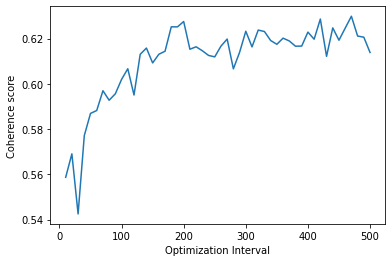

In [19]:
# Show graph
limit=510; start=10; step=10;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Optimization Interval")
plt.ylabel("Coherence score")
#plt.savefig('20240221_PhD_MalletLDALtr-Coherence')
plt.show()

In [20]:
# Print the coherence and perplexity scores
for m, cv in zip(x, coherence_values):
    print("Interval =", m, 'Coherence: ', round(cv, 4))

Interval = 10 Coherence:  0.5587
Interval = 20 Coherence:  0.569
Interval = 30 Coherence:  0.5425
Interval = 40 Coherence:  0.5771
Interval = 50 Coherence:  0.5869
Interval = 60 Coherence:  0.5882
Interval = 70 Coherence:  0.597
Interval = 80 Coherence:  0.5928
Interval = 90 Coherence:  0.5956
Interval = 100 Coherence:  0.602
Interval = 110 Coherence:  0.6067
Interval = 120 Coherence:  0.5951
Interval = 130 Coherence:  0.6131
Interval = 140 Coherence:  0.6158
Interval = 150 Coherence:  0.6093
Interval = 160 Coherence:  0.6131
Interval = 170 Coherence:  0.6144
Interval = 180 Coherence:  0.6252
Interval = 190 Coherence:  0.6252
Interval = 200 Coherence:  0.6276
Interval = 210 Coherence:  0.6153
Interval = 220 Coherence:  0.6164
Interval = 230 Coherence:  0.6147
Interval = 240 Coherence:  0.6126
Interval = 250 Coherence:  0.6119
Interval = 260 Coherence:  0.6167
Interval = 270 Coherence:  0.6198
Interval = 280 Coherence:  0.6066
Interval = 290 Coherence:  0.614
Interval = 300 Coherence:  

In [21]:
# Coherence for 11-topic, 41-alpha, 1k-iteration model, 470-optimization
print(coherence_values[46])

# Topics
malletModel = model_list[46]
model_topics = malletModel.show_topics(formatted=False)
pprint(sorted(malletModel.print_topics(num_words=20)))

# Convert results to lda model format for visualization.
MalletLDA = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(malletModel)

# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(MalletLDA, corpus, id2word, sort_topics=False)
vis

0.6298989805257336
[(0,
  '0.049*"cook" + 0.037*"wash" + 0.032*"work" + 0.031*"bread" + '
  '0.029*"breakfast" + 0.026*"dress" + 0.025*"tonight" + 0.023*"today" + '
  '0.022*"finish" + 0.021*"clean" + 0.020*"clothe" + 0.019*"set" + '
  '0.017*"catch" + 0.017*"afternoon" + 0.016*"lot" + 0.015*"mesurier" + '
  '0.014*"fish" + 0.014*"iron" + 0.014*"weather" + 0.013*"washing"'),
 (1,
  '0.024*"dress" + 0.024*"polly" + 0.022*"garden" + 0.021*"row" + 0.021*"town" '
  '+ 0.020*"mama" + 0.019*"ride" + 0.019*"stay" + 0.016*"papa" + 0.016*"read" '
  '+ 0.015*"dick" + 0.015*"turn" + 0.015*"sit" + 0.015*"poll" + 0.014*"home" + '
  '0.014*"child" + 0.013*"willie" + 0.012*"life" + 0.012*"estrange" + '
  '0.012*"show"'),
 (2,
  '0.082*"call" + 0.051*"drive" + 0.041*"miss" + 0.041*"talk" + 0.036*"home" + '
  '0.030*"find" + 0.029*"read" + 0.026*"hear" + 0.025*"meet" + 0.024*"lunch" + '
  '0.021*"expect" + 0.019*"friend" + 0.018*"church" + 0.017*"spend" + '
  '0.015*"tomorrow" + 0.015*"stand" + 0.014*"

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.232773 -0.097529       1        1  11.041000
1      0.018865  0.115267       2        1   7.682445
2     -0.093696  0.254780       3        1   8.772509
3      0.207417 -0.061769       4        1   9.405924
4     -0.253995 -0.154388       5        1   8.874265
5     -0.267786 -0.056913       6        1   9.376553
6      0.006885  0.152118       7        1   8.960484
7      0.107817 -0.087553       8        1   7.938689
8      0.122186  0.212685       9        1   8.697181
9      0.187642 -0.195331      10        1   9.290091
10    -0.268107 -0.081365      11        1   9.960858, topic_info=       Term        Freq       Total Category  logprob  loglift
58    horse  553.000000  553.000000  Default  30.0000  30.0000
123    send  539.000000  539.000000  Default  29.0000  29.0000
325    call  552.000000  552.000000  Default  28.0000  28.0000
289     man  384.000000  384.000000  Default  27.0000  27.0000
108   sleep  388.000000  388.000000  Default  26.0000  26.0000
...     ...         ...         ...      ...      ...      ...
1540   bank   76.129714  146.632983  Topic11  -4.3732   1.6510
447    read  112.671976  337.420346  Topic11  -3.9811   1.2097
661    town  119.777416  433.071796  Topic11  -3.9200   1.0212
491    port  105.566537  370.650402  Topic11  -4.0463   1.0506
394    mill   72.069462  214.463508  Topic11  -4.4280   1.2160

[824 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
454       7  0.989469        ace
0         4  0.963217       ache
0        10  0.026033       ache
1958      5  0.997570     action
2442      2  1.016447        acy
...     ...       ...        ...
134       4  0.016985  yesterday
134       5  0.025478  yesterday
134       8  0.322718  yesterday
134      10  0.628451  yesterday
134      11  0.008493  yesterday

[1213 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])

In [22]:
print('Alpha values for symmetric model:\n ', MalletLDA.alpha)

Alpha values for symmetric model:
  [2.88145788 2.2791788  2.77940932 2.78684609 2.01932412 2.42042861
 2.87052641 2.24269977 2.52521229 2.9074974  2.35575603]


In [28]:
sum(MalletLDA.alpha)

28.06833672330662

In [23]:
MalletLDA.save('20240924_PhD_TopDiaChk_ATM11t41a1000i470o')
pyLDAvis.save_html(vis, '20240924_PhD_TopDiaChk_ATM11t41a1000i470o.html')